## PROJECT BASED

### • DOMAIN: Smartphone, Electronics 


### • CONTEXT: India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice. 

In [1]:
# importing all the necessary libraries

import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts_sklearn

from surprise import KNNWithMeans
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import GridSearchCV, cross_validate, KFold,RandomizedSearchCV
from surprise.model_selection import train_test_split as tts_surprise
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing all the data to different dataframes

df1 = pd.read_csv('phone_user_review_file_1.csv')
df2 = pd.read_csv('phone_user_review_file_2.csv')
df3 = pd.read_csv('phone_user_review_file_3.csv')
df4 = pd.read_csv('phone_user_review_file_4.csv')
df5 = pd.read_csv('phone_user_review_file_5.csv')
df6 = pd.read_csv('phone_user_review_file_6.csv')

In [3]:
# printing the shape of each dataframe

print('The shape of review file 1 is: ',df1.shape)
print('The shape of review file 2 is: ',df2.shape)
print('The shape of review file 3 is: ',df3.shape)
print('The shape of review file 4 is: ',df4.shape)
print('The shape of review file 5 is: ',df5.shape)
print('The shape of review file 6 is: ',df6.shape)

The shape of review file 1 is:  (374910, 11)
The shape of review file 2 is:  (114925, 11)
The shape of review file 3 is:  (312961, 11)
The shape of review file 4 is:  (98284, 11)
The shape of review file 5 is:  (350216, 11)
The shape of review file 6 is:  (163837, 11)


In [4]:
# combining all the dataframe to a single list

dfs = []
dfs.append(df1)
dfs.append(df2)
dfs.append(df3)
dfs.append(df4)
dfs.append(df5)
dfs.append(df6)

In [5]:
# converting the list to a dataframe

df = pd.concat(dfs,ignore_index=True)

In [6]:
# printing the shape of the final dataframe

print('The shape of the final Dataframe is: ',df.shape)

The shape of the final Dataframe is:  (1415133, 11)


In [7]:
# checking the first 5 records in the combined dataframe

df.head(5)

phone_url       date lang country            source  \
0  /cellphones/samsung-galaxy-s8/   5/2/2017   en      us  Verizon Wireless   
1  /cellphones/samsung-galaxy-s8/  4/28/2017   en      us       Phone Arena   
2  /cellphones/samsung-galaxy-s8/   5/4/2017   en      us            Amazon   
3  /cellphones/samsung-galaxy-s8/   5/2/2017   en      us           Samsung   
4  /cellphones/samsung-galaxy-s8/  5/11/2017   en      us  Verizon Wireless   

                domain  score  score_max  \
0  verizonwireless.com   10.0       10.0   
1       phonearena.com   10.0       10.0   
2           amazon.com    6.0       10.0   
3          samsung.com    9.2       10.0   
4  verizonwireless.com    4.0       10.0   

                                             extract       author  \
0  As a diehard Samsung fan who has had every Sam...   CarolAnn35   
1  Love the phone. the phone is sleek and smooth ...    james0923   
2  Adequate feel. Nice heft. Processor's still sl...     R. Craig   
3  Never disappointed. One of the reasons I've be...  Buster2020    
4  I've now found that i'm in a group of people t...   S Ate Mine   

                                             product  
0                                  Samsung Galaxy S8  
1                                  Samsung Galaxy S8  
2  Samsung Galaxy S8 (64GB) G950U 5.8" 4G LTE Unl...  
3                      Samsung Galaxy S8 64GB (AT&T)  
4                                  Samsung Galaxy S8

In [8]:
# checikng the last 5 records in the combined dataframe

df.tail(5)

phone_url       date lang country source  \
1415128  /cellphones/alcatel-ot-club_1187/  5/12/2000   de      de   Ciao   
1415129  /cellphones/alcatel-ot-club_1187/  5/11/2000   de      de   Ciao   
1415130  /cellphones/alcatel-ot-club_1187/   5/4/2000   de      de   Ciao   
1415131  /cellphones/alcatel-ot-club_1187/   5/1/2000   de      de   Ciao   
1415132  /cellphones/alcatel-ot-club_1187/  4/25/2000   de      de   Ciao   

          domain  score  score_max  \
1415128  ciao.de    2.0       10.0   
1415129  ciao.de   10.0       10.0   
1415130  ciao.de    2.0       10.0   
1415131  ciao.de    8.0       10.0   
1415132  ciao.de    2.0       10.0   

                                                   extract        author  \
1415128  Weil mein Onkel bei ALcatel arbeitet habe ich ...    david.paul   
1415129  Hy Liebe Leserinnen und Leser!! Ich habe seit ...  Christiane14   
1415130  Jetzt hat wohl Alcatell gedacht ,sie machen wa...    michaelawr   
1415131  Ich bin seit 2 Jahren (stolzer) Besitzer eines...   claudia0815   
1415132  Was sich Alkatel hier wieder ausgedacht hat,sc...    michaelawr   

                         product  
1415128  Alcatel Club Plus Handy  
1415129  Alcatel Club Plus Handy  
1415130  Alcatel Club Plus Handy  
1415131  Alcatel Club Plus Handy  
1415132  Alcatel Club Plus Handy

In [9]:
# checking the unique values of score column

df['score'].unique()

array([10. ,  6. ,  9.2,  4. ,  8. ,  2. ,  9.6,  7.2,  6.8,  9. ,  8.3,
        8.8,  8.4,  5.3,  7. ,  6.4,  7.6,  nan,  5.2,  3.2,  4.4,  2.8,
        5.6,  3.6,  4.8,  1. ,  5. ,  3. ,  2.4,  9.3,  8.5,  9.5,  6.5,
        5.5,  9.8,  8.2,  8.6,  7.8,  9.4,  6.6,  6.2,  7.5,  9.9,  2.7,
        8.7,  6.7,  3.3,  7.7,  7.3,  9.7,  6.3,  7.4,  5.7,  4.7,  4.3,
        5.8,  4.2,  4.5,  2.2,  5.4,  7.9,  3.5,  4.6,  3.7,  2.5,  3.4,
        7.1,  8.1,  1.2,  1.4,  3.8,  9.1,  2.6,  1.6,  1.7,  1.5,  1.8,
        2.3,  6.1,  5.9,  1.3,  0.2,  0.4,  8.9,  6.9,  0.6,  4.9])

In [10]:
# rounding off score to its nearest integer

df['score'] = df['score'].round()

In [11]:
# checking the datatypes of all the columns

df.dtypes

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

In [12]:
# checking for nulls 

df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [13]:
# filling the nulls in the score and score_max columns with their medians

df['score'].fillna(value = df['score'].median(),inplace=True)
df['score_max'].fillna(value = df['score_max'].median(),inplace = True)

In [14]:
# converting score to datatype int

df['score'] = df['score'].astype('int32')

In [15]:
# creating a new columns from the date column 

df['new_date'] = pd.to_datetime(df['date']).astype('string')
df['Year'] = df['new_date'].str[0:4]

In [16]:
# creating a dataframe grouped by Year with count of authors, number of unique products and the score mean

year = df.groupby('Year').agg({'author':'count'}).reset_index()
year_product = df.groupby('Year')['product'].nunique().reset_index()
year_rating = df.groupby('Year')['score'].mean().reset_index()

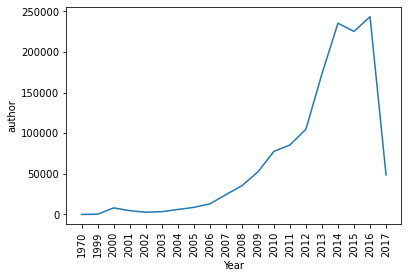

In [17]:
# plotting year with number of authors

sns.lineplot(data =year,x= 'Year',y='author');
plt.xticks(rotation = 90)
plt.show()

## The number of authors have steadily increased from year to year. The year from 2016 and 2017 has seen a sharp decline in the number of authors

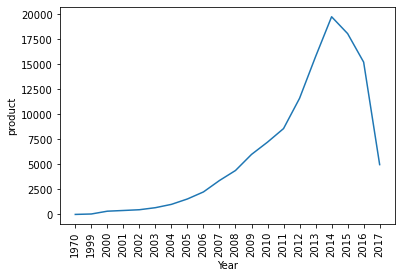

In [18]:
# plotting year with number of unique products

sns.lineplot(data =year_product,x= 'Year',y='product');
plt.xticks(rotation = 90)
plt.show()

## The number of unique products have steadily increased from year to year. The year from 2016 and 2017 has seen a sharp decline in the number of unique products. This might me due to lot of companies going bankrupt.

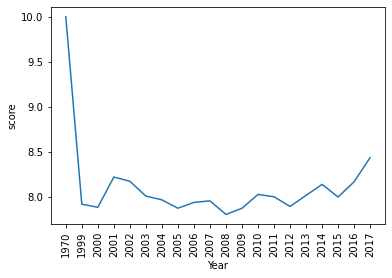

In [19]:
sns.lineplot(data =year_rating,x= 'Year',y='score');
plt.xticks(rotation = 90)
plt.show()

## The mean score for different years has been never been less than 7.5 , It has been fluctuating from time to time. There is a increase in the score from year 2016 to 2017

### Although there is a sharp decline in the number of authors and the number of products being released. There is a slight increase in the mean rating which is above the mean rating of past 17 years. This suggest that the general quality of the products have improved although there is a decline in the quantity

In [20]:
# dropping date and year column

df.drop(['date','Year'],axis = 1,inplace=True)

## The date column is dropped before considering the duplicates because the date column is of type object so when we are dropping duplicated 25/07/2016 and 07/25/2016 means the same date but this will not be considered as duplicates as they are different strings. The new column new_date all the dates in a uniform format which can be considered for duplicates.

In [21]:
# dropping the duplicate rows

df.drop_duplicates(subset=None, keep='first', inplace=True)

In [22]:
print("The shape of the dataframe without any duplicates: ", df.shape)

The shape of the dataframe without any duplicates:  (1405182, 11)


In [23]:
# keeping only 1000000 data samples with random state 612

df_new = df.sample(n=1000000,random_state=612)

In [24]:
# dropping all the irrelevant features and keeping only score,author and product columns

df_new.drop(['phone_url','new_date','lang','country','source','domain','score_max','extract'],axis = 1,inplace=True)

In [25]:
df_new.head()

score             author  \
981626       9            VALOU29   
175438       1           De vries   
209133       6            S_marts   
547362       8      LSNPathfinder   
1046501     10  Ralf Menzel-Queck   

                                                   product  
981626                   SONY Xperia Go Noir Reconditionne  
175438                         Huawei P8lite zwart / 16 GB  
209133                                        LG Leon H320  
547362   OnePlus 2 Factory Unlocked A2005 4G Smartphone...  
1046501  LG Electronics E900 Optimus 7 Smartphone (Voda...

In [26]:
# checking the unique number of authors

df_new['author'].nunique()

597129

In [27]:
# checking the unique number of products

df_new['product'].nunique()

56511

In [28]:
# checking the unique number of scores

df_new['score'].unique()

array([ 9,  1,  6,  8, 10,  2,  4,  5,  7,  3,  0])

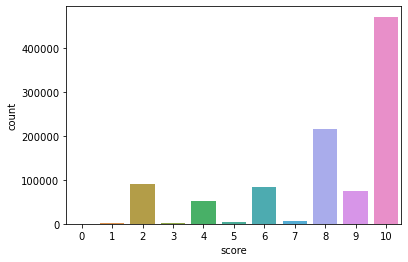

In [29]:
# count of all the ratings

sns.countplot(x = 'score',data = df_new);

In [30]:
# creating a dataframe grouped by product and the count of the scores

counts = df_new.groupby('product').agg({'score':'count'}).sort_values('score',ascending=False).reset_index()

In [31]:
# printing the most rated feature

print("The Phone with the highest number of reviews is",counts.iloc[0,0])

The Phone with the highest number of reviews is Lenovo Vibe K4 Note (White,16GB)


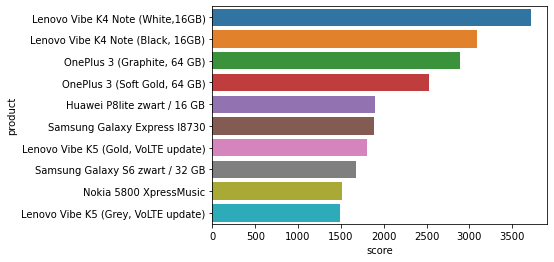

In [32]:
# barplot of the top 10 most rated feature

sns.barplot(x = 'score',y='product',data = counts.head(10),orient='h');

In [33]:
# creating a dataframe grouped by author and the count of score

users = df_new.groupby('author').agg({'score':'count'}).sort_values('score',ascending=False).reset_index()

In [34]:
# printing the user with the most number of reviews

print("The Phone with the highest number of reviews is",users.iloc[0,0],'with',users.iloc[0,1],'reviews')

The Phone with the highest number of reviews is Amazon Customer with 54544 reviews


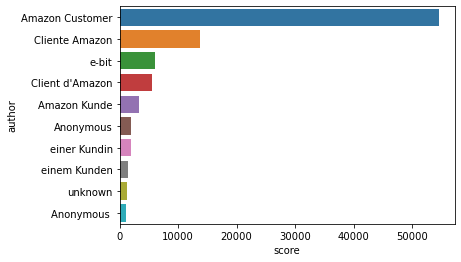

In [35]:
# barplot of the top 10 users with the most reviews

sns.barplot(x = 'score',y='author',data = users.head(10),orient='h');

In [36]:
# saving the index value of products having more than 50 reviews

prodRatings = df_new["product"].value_counts()
prodsAbove50Ratings = prodRatings[prodRatings > 50].index.values

In [37]:
# checking the number of products with more than 50 reviews

len(prodsAbove50Ratings)

4253

In [38]:
# creating a new dataframe with products having more than 50 reviews

df_all = df_new[(df_new["product"].isin(prodsAbove50Ratings))]

In [40]:
df_all['product'].value_counts()

Lenovo Vibe K4 Note (White,16GB)                                                                                                            3723
Lenovo Vibe K4 Note (Black, 16GB)                                                                                                           3084
OnePlus 3 (Graphite, 64 GB)                                                                                                                 2893
OnePlus 3 (Soft Gold, 64 GB)                                                                                                                2527
Huawei P8lite zwart / 16 GB                                                                                                                 1902
                                                                                                                                            ... 
LG KF755                                                                                                                          

In [41]:
# saving the index value of authors having more than 50 reviews

userRatings = df_all["author"].value_counts()
usersAbove50Ratings = userRatings[userRatings > 50].index.values

In [42]:
# checking the number of authors

len(usersAbove50Ratings)

266

In [43]:
# filtering the dataframe with authors having more than 50 reviews

df_all = df_all[(df_all["author"].isin(usersAbove50Ratings))]

In [44]:
df_all['author'].value_counts()

Amazon Customer      40457
Cliente Amazon        6882
e-bit                 4841
Client d'Amazon       2541
Amazon Kunde          2078
                     ...  
Salvatore               51
Jason                   51
Дима                    51
Cliente de Amazon       51
Filippo                 51
Name: author, Length: 266, dtype: int64

In [45]:
# grouping the data by product and getting the mean of their score

df_all.groupby('product')['score'].mean().sort_values(ascending = False).head()

product
Siemens C45                                                                                                                                                      10.0
Samsung E1150i Klapphandy 3,6 cm (1,43 Zoll) Display ruby-red                                                                                                    10.0
Nokia C5-00                                                                                                                                                      10.0
Samsung Smartphone Samsung Galaxy S III Mini Desbloqueado Vivo MetallicBlue Android Processador Dual Core 1Ghz Tela 4 Câmera 5MP 3G Wi-Fi Memória Interna 8GB    10.0
Nokia C5-03 Smartphone (8.1cm (3.2 Zoll) Touchscreen, 3.5mm Klinkenbuchse, Ovi Karten, GPS) aluminium grey                                                       10.0
Name: score, dtype: float64

## Popularity Based

In [46]:
# creating a function to print top 5 popularity based recommendations

def topK_popularity(K=5):
    topK = df_all.groupby("product")["score"].mean().sort_values(ascending=False).head(K)
    print("==================TOP {}  RECOMMENDATIONS============================".format(K))
    for i in range(K):
        product = topK.index[i]
        prodRating = topK.iloc[i]
        print("{}.\tProduct: {}\tMean Rating: {}".format(i+1,product,prodRating))
    return topK

In [47]:
# using the function to print the top 5 recommendations

top5_popularity = topK_popularity(5)

==================TOP 5  RECOMMENDATIONS============================
1.	Product: Siemens C45	Mean Rating: 10.0
2.	Product: Samsung E1150i Klapphandy 3,6 cm (1,43 Zoll) Display ruby-red	Mean Rating: 10.0
3.	Product: Nokia C5-00	Mean Rating: 10.0
4.	Product: Samsung Smartphone Samsung Galaxy S III Mini Desbloqueado Vivo MetallicBlue Android Processador Dual Core 1Ghz Tela 4 Câmera 5MP 3G Wi-Fi Memória Interna 8GB	Mean Rating: 10.0
5.	Product: Nokia C5-03 Smartphone (8.1cm (3.2 Zoll) Touchscreen, 3.5mm Klinkenbuchse, Ovi Karten, GPS) aluminium grey	Mean Rating: 10.0


### The popularity based recommendation systems is purely based on the ratings that the users have given, however it does not consider how many users have bought the phone and have rated it.

# Popularity Based Recommendation on rating and count

In [48]:
# creating a new dataframe with the mean rating and their counts

ratings_mean_count = pd.DataFrame(df_all.groupby('product')['score'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(df_all.groupby('product')['score'].count())  

In [49]:
# sorting the values by the ratings and the count

rating_new = ratings_mean_count.sort_values(by=['rating_counts','score'],ascending = False).reset_index()

In [50]:
rating_new

product     score  rating_counts
0        Lenovo Vibe K4 Note (White,16GB)  6.972553           2186
1       Lenovo Vibe K4 Note (Black, 16GB)  7.043725           1761
2             OnePlus 3 (Graphite, 64 GB)  8.543210           1296
3            OnePlus 3 (Soft Gold, 64 GB)  8.325658           1216
4     Lenovo Vibe K5 (Gold, VoLTE update)  6.545784           1103
...                                   ...       ...            ...
3666                   Sony Xperia E dual  2.000000              1
3667                       Sony Xperia E1  2.000000              1
3668                           Nokia 6086  1.000000              1
3669                       Samsung Galaxy  1.000000              1
3670                         Samsung J700  1.000000              1

[3671 rows x 3 columns]

In [51]:
# creating a function to print top 5 popularity based recommendations on rating and count

def topK_popularity_hybrid(K=5):
    topK_hybrid = rating_new.head(K)
    print("==================TOP {}  RECOMMENDATIONS============================".format(K))
    for i in range(K):
        product_hybrid = topK_hybrid.iloc[i,0]
        prodRating_hybrid = topK_hybrid.iloc[i,1]
        prodcount = topK_hybrid.iloc[i,2]
        print("{}.\tProduct: {}\tMean Rating: {} \t Count of Reviews: {} \n".format(i+1,product_hybrid,prodRating_hybrid,
                                                                                  prodcount))
    return topK_hybrid

In [52]:
# using the function to print the top 5 recommendations

top5_popularity_hybrid = topK_popularity_hybrid(5)

==================TOP 5  RECOMMENDATIONS============================
1.	Product: Lenovo Vibe K4 Note (White,16GB)	Mean Rating: 6.972552607502287 	 Count of Reviews: 2186 

2.	Product: Lenovo Vibe K4 Note (Black, 16GB)	Mean Rating: 7.043725156161272 	 Count of Reviews: 1761 

3.	Product: OnePlus 3 (Graphite, 64 GB)	Mean Rating: 8.54320987654321 	 Count of Reviews: 1296 

4.	Product: OnePlus 3 (Soft Gold, 64 GB)	Mean Rating: 8.325657894736842 	 Count of Reviews: 1216 

5.	Product: Lenovo Vibe K5 (Gold, VoLTE update)	Mean Rating: 6.545784224841341 	 Count of Reviews: 1103 



# SVD Collaborative filtering

In [53]:
# checking the datatypes of all the columns

df_all.dtypes

score       int32
author     object
product    object
dtype: object

In [54]:
# creating a new dataframe with the original dataframe

df_model = df_all[['author','product','score']]

In [55]:
df_model['score'].unique()

array([10,  9,  2,  8,  6,  4,  7,  5,  1,  3])

In [56]:
# Reader which will be used for loading Dataset from dataframe
# The rating scale is 1 to 10

reader = Reader(line_format='user item rating ',rating_scale=(1,10))

# Surprise dataset

df_sur = Dataset.load_from_df(df_model,reader)

In [57]:
# using train test split of surprise library

train_sur, test_sur = tts_surprise(df_sur, test_size=0.20, random_state=42)

In [58]:
# creating object for SVD algorithm

svd = SVD(random_state=2,n_factors = 100,n_epochs = 20)

In [59]:
# fitting SVD on the train set

svd.fit(train_sur)

In [62]:
# saving the predictions of the test set

predictions_svd = svd.test(test_sur)

In [66]:
# printing the rmse value of the svd mode
print("The RMSE of SVD is",accuracy.rmse(predictions_svd,verbose = False))

The RMSE of SVD is 2.708015414775829


In [67]:
for username, productname, truerating, predictedrating, _ in predictions_svd:
    print("The predicted rating for user",username,"for product",productname,'is',predictedrating,'\n')

The predicted rating for user einem Kunden for product ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 5.1 Lollipop, 13,0 Megapixel is 8.436115244240854 

The predicted rating for user Cliente Amazon for product Alcatel One Touch Pop 3 (5) Smartphone, Dual SIM, Display 5' Pollici, 8 GB Memoria interna, 1Gb RAM, Fotocamera da 5 Megapixel con autofocus e flash LED, Android 5.1 Lollipop, Nero/Pelle [Italia] is 7.3650046441658406 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.647153159597026 

The predicted rating for user Владимир for product Samsung S5570 Galaxy Mini is 8.719062587885903 

The predicted rating for user Amazon Customer for product Vodafone Smart First 6 Pay As You Go Handset Smartphone - Black is 7.045448020555548 

The predicted rating for user Amazon Customer for product Samsung Galaxy Note 4 Smartphone (5,7 Zoll (14,5 cm) Touch-Display, 32 GB Speicher, Android 4.4) schwarz is 6.578469151154113

The predicted rating for user Erkek for product Sony Xperia SP is 6.504341638325268 

The predicted rating for user Алексей for product Samsung Galaxy A3 is 9.834842209920618 

The predicted rating for user Cliente Amazon for product Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco is 8.24775786412458 

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 7.0217367098773185 

The predicted rating for user Amazon Customer for product Lenovo A7000 (Black) is 6.577478938937087 

The predicted rating for user Amazon Customer for product BLU Vivo XL Smartphone - 5.5" 4G LTE - GSM Unlocked - Solid Gold is 6.601780683334248 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max Prime (Gold, 128GB) is 8.455388911995652 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.966644689619984 

The predicted rating

The predicted rating for user Amazon Customer for product Tracfone LG TracFone 306G No Contract, 2.0 megapixel Camera, 3.2-Inch screen, Black, Retail Packaging is 9.067094454192986 

The predicted rating for user Kindle-Kunde for product Samsung Galaxy S III i9300 Smartphone 16 GB (12,2 cm (4,8 Zoll) HD Super-AMOLED-Touchscreen, 8 Megapixel Kamera, Micro-SIM, Android 4.0) schwarz is 5.7877813458443335 

The predicted rating for user Роман for product Xiaomi Mi4i 16GB (белый) is 8.68481721599895 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 5.245011708515401 

The predicted rating for user Анастасия for product Sony Xperia J (черный) is 8.615289201603069 

The predicted rating for user Cliente Amazon for product Samsung G900 Galaxy S5 Smartphone, 16 GB, Nero [Italia] is 7.059598872699172 

The predicted rating for user Giovanni for product Asus ZE551ML-2A760WW Smartphone ZenFone 2 Deluxe, 5.5", 4 GB RAM, 64 GB, Intel Quad-Cor

The predicted rating for user Кирилл for product Samsung GT-S5230 La Fleur is 5.408851342889392 

The predicted rating for user Amazon Customer for product Lenovo Zuk Z1 (White, Cyanogen OS) is 3.5382097637102183 

The predicted rating for user ???????? for product Apple iPhone 5 (16Gb) is 7.601550535089734 

The predicted rating for user Amazon Customer for product Mi 4i (White, 16GB) is 7.391715528520037 

The predicted rating for user Amazon Customer for product LG G4 Unlocked Smartphone with 32GB Internal Memory, 16 MP Camera and 5.5-Inch IPS Quantum Display for GSM and CDMA, US Warranty (Black Leather) is 6.63263130189106 

The predicted rating for user Amazon Customer for product Microsoft Lumia 540 (White, 8 GB) is 7.435654354040169 

The predicted rating for user Cliente Amazon for product Asus ZenFone Go 5" Smartphone, 8 GB, Dual SIM, Bianco [Italia] is 7.565539380643057 

The predicted rating for user Roberto for product Asus ZenFone 2 Smartphone 5.5 pollici HD, RAM 2 GB, 16 

The predicted rating for user Cliente Amazon for product Doogee X5 - Smartphone Libre 3G Android 5.1 (Quad Core, 5.0" IPS 1280*720 HD, 1GB RAM, 8GB ROM, 5.0MP Cámara, Dual SIM, GPS, OTG) Celular, color Negro is 7.286362168939646 

The predicted rating for user Paolo for product Samsung I9505 Galaxy S4 Smartphone, 16 GB [Italia] is 8.20525628527858 

The predicted rating for user Amazon Kunde for product Samsung ​Samsung Galaxy A3 Smartphone (12 cm (4,71 Zoll) HD Super AMOLED Touch-Display, 16 GB, Android 5.1) pink-gold is 8.643586739346201 

The predicted rating for user Вадим for product Samsung Galaxy J1 (2016) is 8.499652665286632 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.647153159597026 

The predicted rating for user Amazon Customer for product Apple iPhone 5 16GB (White) - Sprint (does not include sim card) is 7.404161296377794 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Gr

The predicted rating for user Cliente Amazon for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Nero [Italia] is 8.94203375315802 

The predicted rating for user Amazon-Kunde for product Microsoft Nokia N97 Smartphone (QWERTZ-Tastatur, GPS, W-Lan, Ovi Karten, Kamera mit 5 MP) black is 6.842747187321848 

The predicted rating for user Amazon Customer for product Apple iPhone 5 - 16GB Black - Sim Free Smartphone is 7.349541441675223 

The predicted rating for user Сергей for product Sony Xperia L (черный) is 7.411725844350546 

The predicted rating for user Никита for product Samsung Galaxy S4 GT-I9500 16GB (черный) is 9.37631862870508 

The predicted rating for user Amazon Customer for product Mi 4i (White, 16GB) is 7.391715528520037 

The predicted rating for user Client d'Amazon for product Honor 8 Smartphone débloqué 4G (Ecran: 5,2 pouces - 32 Go - Double

The predicted rating for user Владислав for product Apple iPhone 5s 16GB (серебристый) is 9.810306290340652 

The predicted rating for user francesco for product Asus ZenFone 2 Smartphone, 64 GB, Blu Fusion [Italia] is 9.282565664660146 

The predicted rating for user Amazon Customer for product OnePlus X (Onyx, 16GB) is 7.823035568883456 

The predicted rating for user Amazon Customer for product Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia] is 8.468542541989521 

The predicted rating for user Amazon Customer for product Huawei Honor 5X (Grey, 16GB) is 6.265356992684657 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 16GB) - Android 7.0 Nougat Update Available Now is 6.71410068182299 

The predicted rating for user Luca for product Nokia Lumia 530 Smartphone, 4 GB, Arancione [Italia] is 8.683426122744192 

The predicted rating for user Fabio for

The predicted rating for user Jeff for product Huawei P8lite zwart / 16 GB is 8.869439879009146 

The predicted rating for user Amazon Customer for product Samsung Note 4 Standard Li-ion Battery 3220mAh for Galaxy Note 4 - Non-Retail Packaging is 6.19165360481892 

The predicted rating for user Cliente Amazon for product Lenovo Motorola Moto G (3a Generación) - Smartphone libre Android (4G, 5", 13 MP, 16 GB, 2 GB RAM), color negro is 9.207576188775667 

The predicted rating for user Amazon Customer for product Lenovo Zuk Z1 (White, Cyanogen OS) is 3.5382097637102183 

The predicted rating for user Amazon Customer for product OnePlus X (Onyx, 16GB) is 7.823035568883456 

The predicted rating for user Amazon Customer for product Apple iPhone SE Unlocked Phone - 64 GB Retail Packaging - Space Gray is 9.093936893625381 

The predicted rating for user lahr2006 for product Samsung Galaxy Express I8730 is 9.186221802948015 

The predicted rating for user Anonymous for product Nokia E75 is 7.5

The predicted rating for user einer Kundin for product Sony Xperia E5 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.015644660109528 

The predicted rating for user Гость for product Nokia 5130 XpressMusic is 9.499844430553722 

The predicted rating for user Amazon Customer for product Nokia N8 Unlocked GSM Touchscreen Phone Featuring GPS with Voice Navigation and 12 MP Camera (Gray) is 7.120244869044932 

The predicted rating for user ?????????????? ?????????? for product Sony Xperia P is 7.7350004751901364 

The predicted rating for user Juan for product Samsung Galaxy Note 3 Smartphone (14,5 cm (5,7 Zoll) AMOLED-Touchscreen, 2,3GHz, Quad-Core, 3GB RAM, 13 Megapixel Kamera, Android 4.3) weiß/gold is 6.477831437685106 

The predicted rating for user Andreas for product ASUS Computer ZenFone5 A501CG-1G358GER Smartphone (Intel Atom Multi-Core Z2520, 1,6GHz, 12,7 cm (5 Zoll) Touchscreen, 2GB RAM, 16GB eMMC, 8 Megapixel Kamera, Android 4.3) gold is 8.182962

The predicted rating for user Michele for product Alcatel One Touch 20-04G Telefono Cellulare, Nero is 8.810613719600605 

The predicted rating for user Amazon Customer for product LG Google Nexus 5 D821 Factory Unlocked Phone, 32GB, Black - No 4G in USA - International Version No Warranty is 8.252778412863174 

The predicted rating for user Юлия for product Samsung Galaxy S5 SM-G900F 16GB (белый) is 10 

The predicted rating for user Federico for product elephone P9000 5.5 "Smartphone 2.0GHz 4G FDD-LTE TDD-LTE Android 6.0 Octa Nucleo MTK6755 1,6 millimetri Ultra Narrow schermo OGS con KKmoon basamento del telefono is 7.880369907260488 

The predicted rating for user Cliente Amazon for product Samsung Galaxy S7 Smartphone, 32 GB, Nero is 8.049591071372074 

The predicted rating for user Amazon Customer for product LG Optimus L70 (MS323) Metro PCS Smartphone is 7.528650708068581 

The predicted rating for user Kindle Customer for product Samsung J1 (Verizon LTE Prepaid) is 7.57102115054

The predicted rating for user Cliente Amazon for product Huawei Y6 Smartphone, Display 5.0" HD, IPS, 2 GB RAM, 8 GB Memoria Interna, Dual SIM, Fotocamera 8 MP, Android 5.1, Nero is 7.84143308156365 

The predicted rating for user Client d'Amazon for product Ringke ASUS ZenFone 2 (5.5 Inch) Coque - Ringke FUSION ***Capuchon Anti-Poussière & Chute Protection*** [FREE HD Film][CRYSTAL VIEW] Crystal Clair Panneau de Dos Absorption des Chocs Pare-Chocs dur étui pour ASUS ZenFone 2 [ZE550ML / ZE551ML 5.5" - Non pour ZE500 is 8.379583955953583 

The predicted rating for user e-bit for product Smartphone LG Leon H326TV is 9.065229054476083 

The predicted rating for user Alberto for product Huawei Ascend Y550 Smartphone, 4 GB, Nero is 8.920924937619942 

The predicted rating for user Денис for product ASUS ZenFone 3 Max ZC520TL 16GB (серебристый) is 9.076664419952177 

The predicted rating for user Amazon Customer for product Motorola Moto G (2nd generation) Unlocked Cellphone, 8GB, White is 5

The predicted rating for user Linda for product LG G4 Smartphone Display IPS 5.5" QHD, Fotocamera 16 MP, Memoria Interna 32 GB, 3 GB RAM, Colore Nero is 9.023901303187557 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Никита for product Samsung I8190 Galaxy S III mini 8GB (синий) is 9.282727220103382 

The predicted rating for user Cliente Amazon for product LG Optimus L5 II E460 Smartphone, Nero [Italia] is 8.956065518787806 

The predicted rating for user Amazon Customer for product Apple iPhone 6 64GB GOLD UNLOCKED is 8.860907030492834 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime TV SM-G530 is 8.79891714765257 

The predicted rating for user Amazon Customer for product Apple iPhone 6s (Rose Gold, 16GB) is 6.131958526367125 

The pred

The predicted rating for user e-bit for product Smartphone Motorola Moto G XT1078 16 GB is 8.214191032675389 

The predicted rating for user Amazon Kunde for product Samsung Galaxy S3 mini (GT-I8200) Smartphone (4 Zoll (10,2 cm) Touch-Display, 8 GB Speicher, Android 4.2) blau is 7.824163029571438 

The predicted rating for user einem Kunden for product Apple iPhone 7 4,7" 32 GB is 9.494674357138635 

The predicted rating for user Thomas for product Samsung GT-I8750ALADBT ATIV S Smartphone (12,2 cm (4,8 Zoll) Super AMOLED Display, 8 Megapixel Kamera, Full-HD, Win 8) Aluminium silber is 7.749329642570029 

The predicted rating for user Linda for product MICROSOFT Lumia 650 - 16 GB, Black is 7.786922459017186 

The predicted rating for user Amazon Customer for product Samsung Galaxy S6 64 GB UK SIM-Free Smartphone - Gold is 7.805061699838024 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 8GB) is 7.247076711922399 

The predicted rating f

The predicted rating for user Client d'Amazon for product Honor 7 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Double Nano SIM - Android 5.0 Lollipop) Gris/Noir is 8.470389964071968 

The predicted rating for user Amazon Customer for product Apple 16GB Sim Free iPhone 5 - White is 5.981981233732087 

The predicted rating for user Amazon Kunde for product Huawei Mate S is 9.706963278590692 

The predicted rating for user Amazon Customer for product Samsung Galaxy S4, Black Mist 16GB (Verizon Wireless) is 6.656963880839853 

The predicted rating for user einem Kunden for product Sony Xperia E5 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 8.92886758581052 

The predicted rating for user Виктор for product Sony Xperia SP (белый) is 8.852646763878669 

The predicted rating for user Amazon Customer for product Samsung Galaxy S7 Edge Duos SM-G935FD 32GB Dual SIM Factory Unlocked GSM Smartphone - International Version, No Warranty (Titanium Silver) is 7.4

The predicted rating for user Amazon Customer for product Sony Xperia Z1 Compact Smartphone (4,3 Zoll (10,9 cm) Touch-Display, 16 GB Speicher, Android 4.3) pink is 7.9402179651667115 

The predicted rating for user e-bit for product Smartphone LG G3 D855 is 8.979126239564462 

The predicted rating for user Amazon Customer for product Vodafone Smart Ultra 6 Pay As You Go Android Smartphone -Silver is 9.262316999079143 

The predicted rating for user Robert for product Huawei Ascend Y530 Smartphone (4,5 Zoll (11,4 cm) Touch-Display, 4 GB Speicher, Android 4.3) weiß is 7.376090727253717 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 6.5391084265864565 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 No Contract Phone, 16GB ROM / 2GB RAM, 5.5 Inch - White - (Boost Mobile) is 9.558539450361057 

The predict

The predicted rating for user Client d'Amazon for product Microsoft Lumia 640 XL LTE Smartphone débloqué 4G (Ecran : 5,7 pouces - 8 Go - Double SIM - Windows Phone 8.1) Noir is 7.564062076248972 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 7.650439443344224 

The predicted rating for user Amazon Customer for product LG G4 Unlocked Smartphone with 32GB Internal Memory, 16 MP Camera and 5.5-Inch IPS Quantum Display for GSM and CDMA, US Warranty (Black Leather) is 6.63263130189106 

The predicted rating for user Amazon Customer for product Samsung Galaxy S7 G930F 32GB Factory Unlocked GSM Smartphone International Version (Gold) is 5.818283809885079 

The predicted rating for user Amazon Customer for product Apple iPhone 3GS 8GB (Black) - AT&T is 8.655738479817296 

The predicted rating for user Marco for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocam

The predicted rating for user ?????????? for product HTC Sensation XL is 9.323247417364378 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.647153159597026 

The predicted rating for user e-bit for product Smartphone LG K10 K430TV is 8.77173218248813 

The predicted rating for user einer Kundin for product Huawei P9 Lite Dual-SIM Smartphone, 13,2 cm (5,2 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.720319433208788 

The predicted rating for user Amazon Customer for product HTC Desire 826 (Dual SIM, White Birch, 2GB RAM) is 3.234353901113506 

The predicted rating for user Un anonyme for product Nokia 6230i is 9.513192225338742 

The predicted rating for user # for product Samsung GT-S5230 Star is 8.437814549963825 

The predicted rating for user Amazon Customer for product Microsoft Lumia 640 (Black, 8GB) is 7.7405466334737705 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (White,

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J2 SM-J200M is 8.298548685074186 

The predicted rating for user Cliente Amazon for product Microsoft Lumia 640 LTE RM 1072 Smartphone, Marchio TIM, Nero [Italia] is 9.02471915654912 

The predicted rating for user Robert for product Sony Xperia P LT22i-BK Unlocked Phone with 8 MP Camera, Android 2.3 OS, Dual-Core Processor, and 4-Inch Touchscreen--U.S.Warranty (Black) is 8.06144535770902 

The predicted rating for user Amazon Customer for product Motorola RAZR V3 Unlocked Phone with Camera, and Video Player - U.S. Version with Warranty (Black) is 6.458435834439653 

The predicted rating for user Cliente Amazon for product Samsung Galaxy A5 (2016) - Smartphone libre Android (5.2'', 13 MP, 2 GB RAM, 16 GB, 4G), color dorado is 9.052870745926082 

The predicted rating for user Anonymous for product Apple iPhone 6s Plus is 8.923127415492418 

The predicted rating for user Anonymous for product Apple iPhone 3GS is 6.

The predicted rating for user Paolo for product Samsung GT-I9195 Galaxy S4 Mini Smartphone, LTE, Display 4.27" SAMOLED, Memoria Interna 8 GB, Processore Dual-Core 1.7 GHz, Bianco [Germania] is 9.06020462391441 

The predicted rating for user Michael for product HUAWEI P9 Lite - 16 GB, Black is 8.214983773017982 

The predicted rating for user Client d'Amazon for product Motorola Moto G 3ème génération Smartphone débloqué 4G (Ecran: 5 pouces - 16 Go - 2 Go RAM - Simple Micro-SIM - Android 6.0 Marshmallow) Noir is 8.086561433976055 

The predicted rating for user Christian for product HTC One Smartphone (4,7 Zoll (11,9 cm) Touch-Display, 32 GB Speicher, Android OS) silber is 7.894486508323214 

The predicted rating for user Amazon Kunde for product Doogee X5 5.0 Zoll HD Smartphone Android 5.1 3G WCDMA MTK6580 Quad Core ROM 1G RAM 8G 5MP 8MP Doppelkameras is 7.332053010801289 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore O

The predicted rating for user Anonymous for product Samsung Instinct is 7.0722595149006855 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.966644689619984 

The predicted rating for user Amazon Customer for product Apple iPhone 6s (Gold, 64GB) is 9.019532131492157 

The predicted rating for user einem Kunden for product Apple iPhone 7 4,7" 256 GB is 9.52306386743013 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 128GB memory) is 6.8820973151939455 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.966644689619984 

The predicted rating for user Amazon Customer for product Sony Xperia Z3 Compact D5803 16GB 4G LTE 4.6" Unlocked GSM Android Smartphone - Black - International Version No Warranty is 4.00051111600096 

The predicted rating for user Andrea for product Samsung Star S5230 Smartphone (Touchscreen, 3MP Kamera, Video, MP3-Player, Bluetooth) black go

The predicted rating for user David for product Samsung Galaxy S4 (I9505) - Smartphone libre Android (pantalla táctil de 4.99", cámara 13 Mp, 16 GB, Quad-Core 1.9 GHz, 2 GB RAM, LTE), Blanco (Versión Europea) is 8.702868306950363 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.051935884114232 

The predicted rating for user mario for product LG D802 G2 Smartphone, 32 GB, Black Exclusive [Italia] is 8.865926971035979 

The predicted rating for user Cliente Amazon for product Meizu M3S Smartphone, Dual-SIM, 16 GB, Grigio is 7.4372622523864935 

The predicted rating for user Amazon Customer for product Honor 6X (Silver, 32GB) is 7.669055735778946 

The predicted rating for user Sarah for product Samsung Galaxy Core Prime Smartphone débloqué 4G (Ecran: 4,5 pouces - 8 Go - Simple SIM - Android 4.4 KitKat) Argent is 8.433892567665744 

The predicted rating for user einem Kunden for product Huawei P9 Lite Dual-SIM Smartphone, 13,2

The predicted rating for user Client d'Amazon for product Doogee X5 MAX 3G Smartphone MTK6580 Quad Core Android 6,0 1G + 8G 5.0" IPS HD 1280 * 720 Pixels d'écran 8MP + 8MP Double Caméras Empreintes Digitalesle Geste Intelligent is 7.158964488937622 

The predicted rating for user Amazon Customer for product Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Space Gray is 5.9637146410406485 

The predicted rating for user Amazon Customer for product Apple iPhone 5 16GB Verizon Wireless CDMA 4G LTE Cell Phone - White is 5.7103509704836055 

The predicted rating for user Cliente Amazon for product HOMTOM HT7 3G WCDMA 5.5 "IPS smartphone Android 5.1 OS Quad Core MTK6580A is 7.763261511739394 

The predicted rating for user Amazon Customer for product Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Space Gray is 5.9637146410406485 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 7.506505123364806 

The 

The predicted rating for user Cliente Amazon for product LG Nexus 5X - Smartphone de 5.2" (WiFi, DLNA, procesador Qualcomm Snapdragon 808 de 64 bits y 6 núcleos, memoria interna de 32 GB, memoria RAM 2 GB, Android Marshmallow), color negro is 9.082394813801717 

The predicted rating for user Руслан for product Sony Xperia ZR (черный) is 9.243508692158597 

The predicted rating for user Riccardo for product Huawei Ascend P7 Smartphone, 16 GB, Bianco is 9.070276526126557 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.029130414351348 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Amazon Customer for product Asus Zenfone 2 ZE551ML (Silver, 32GB) is 7.689040398203334 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max Prime (Gold, 128GB) is 8.455388911995652 

The predicted rating for user Amazon Customer for product Samsu

The predicted rating for user Sandra for product LG G4 US991 32GB Smartphone (Unlocked, Black Leather) is 8.887922939075356 

The predicted rating for user Linda for product Sony Xperia Z1 Compact Smartphone (4,3 Zoll (10,9 cm) Touch-Display, 16 GB Speicher, Android 4.3) pink is 6.721521624045948 

The predicted rating for user e-bit for product Smartphone Asus ZenFone 3 ZE552KL is 9.586006386818969 

The predicted rating for user stefano for product Motorola Defy + is 8.102023017673057 

The predicted rating for user Cliente Amazon for product Lenovo Motorola Moto G 4G 3 Generazione Smartphone, Display 5", Fotocamera 13 MP, Memoria 16 GB, Android 6 Lollipop, Nero [Italia] is 8.476369124155019 

The predicted rating for user Amazon Customer for product Sony Xperia XA Ultra unlocked smartphone,16GB Black (US Warranty) is 7.229212823480941 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user Amaz

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.966644689619984 

The predicted rating for user Cliente Amazon for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia] is 9.216018254246737 

The predicted rating for user Amazon Customer for product Micromax YU YU Yureka Plus,(Moondust Grey) is 5.543565939353585 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 7.506505123364806 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user Amazon Customer for product Motorola Moto E (Verizon LTE Prepaid) is 8.644726694292325 

The predicted rating for user Amazon Customer for product Samsung Galaxy Note 4 N910A 32GB Unlocked GSM 4G LTE Smartphone Black is 6.625698342101644 

T

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.49550815121617 

The predicted rating for user Amazon Customer for product Samsung Galaxy Grand Prime 4G SM-G531F (Gold) is 4.301504569713671 

The predicted rating for user e-bit for product Celular Nokia C2-01 is 7.572834556458374 

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 7.0217367098773185 

The predicted rating for user Анастасия for product Apple iPhone 5s 16GB (серебристый) is 9.654512378778568 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user Client d'Amazon for product ebestStar pour Samsung Galaxy S7 edge SM-G935F G935 - Film protection écran en VERRE Trempé INCURVE anti casse anti-rayures, Couleur Transparent is 3.6034684827487573 

The predicted rating for user Amazon Customer for product Micromax Sliver 5 Q450 (Black) is 6.88249902939

The predicted rating for user Amazon Customer for product Lenovo K3 Note (Black) is 5.722836073366444 

The predicted rating for user Amazon Customer for product Motorola Moto Z Play with Style Mod (Black, 32GB) is 7.950816967914049 

The predicted rating for user Kindle Customer for product BlackBerry Passport 4.5-Inch SIM-Free Smartphone - Black is 9.892770059684961 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 7.650439443344224 

The predicted rating for user einer Kundin for product Apple iPhone 7 Plus 5,5" 32 GB is 9.308813354267238 

The predicted rating for user Simon for product Samsung G800 Galaxy S5 Mini Smartphone, 16 GB, Bianco [Italia] is 7.5918690891769005 

The predicted rating for user Дарья for product Sony Xperia Z1 (белый) is 8.747785551801591 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 6.581917656809121 

The predicted rating for user Amazon Customer 

The predicted rating for user Amazon Customer for product Lenovo PHAB Plus Tablet (6.8 inch, 32GB, Wi-Fi+ LTE+ Voice Calling), Gunmetal Platinum is 6.5692900075667655 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.966644689619984 

The predicted rating for user Cliente Amazon for product Apple iPhone 5S 16GB Grigio [Italia] is 8.076106105770885 

The predicted rating for user Luca for product Asus ZenFone 2 Laser 5.5" Smartphone, 16 GB, Dual SIM, Nero [Italia] is 5.460405332729951 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 7.00202359229022 

The predicted rating for user Андрей for product Sony Xperia SP (белый) is 6.817986519866276 

The predicted rating for user Amazon Customer for product LG Lucid 4G VS840 Verizon CDMA Cellphone, 8GB, Black is 5.5674548253997544 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predict

The predicted rating for user Amazon Customer for product HTC Desire 626G+ (8GB,Blue Lagoon) is 5.5947713413073785 

The predicted rating for user david for product Huawei Ascend G510 - Smartphone libre Android (pantalla 4.5", cámara 5 Mp, 4 GB, Dual-Core 1.2 GHz, 512 MB RAM), blanco (importado) is 7.29972438478325 

The predicted rating for user Amazon Customer for product HTC One M8 - Factory Unlocked 32GB - US Warranty (Glacial Silver) is 6.786149980632638 

The predicted rating for user Amazon Customer for product OnePlus 2 Unlocked Smartphone, 64GB Sandstone Black (US Warranty – Model A2005) is 6.5649277998416595 

The predicted rating for user Amazon Customer for product Asus ZenFone 3 Laser 5.5-inch Glacier Silver [ZC551KL] Laser auto-focus, 13MP Rear / 8MP Front camera, IPS FHD display, 2GB RAM, 32GB storage is 7.69962489920403 

The predicted rating for user Amazon Customer for product VIVO V3 Max (Gold) is 9.579822971897162 

The predicted rating for user Client d'Amazon for 

The predicted rating for user Stefano for product Samsung N9005 Galaxy Note 3 Smartphone, 32 GB, Bianco [Italia] is 9.182625548846909 

The predicted rating for user Amazon Customer for product Micromax Unite 3 Q372 (Blue, 8GB) is 6.105176456423744 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J1 SM-J120H is 8.975449110396092 

The predicted rating for user Amazon Kunde for product Huawei P9 Smartphone [Deutsche Version] (DT-Branding) grau is 8.232311639856404 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Space Grey, 16GB) is 7.3589799549232655 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Amazon Customer for product Sony Xperia Z1 Smartphone (5 Zoll (12,7 cm) Touch-Display, 16 GB Speicher, Android 4.2) schwarz is 5.048904341711735 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is

The predicted rating for user anonimo for product Meizu M3S 16GB Oro libre is 7.484920291155724 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.966644689619984 

The predicted rating for user Amazon Customer for product Samsung S5230 Tocco Lite Sim Free Mobile Phone - Black is 7.339087876025596 

The predicted rating for user Dave for product blu VIVO 5R 4G LTE SIM-Free Smartphone (32 GB and 3 GB RAM) - Gold is 7.475008122343536 

The predicted rating for user Cliente Amazon for product LG Google Nexus 5X H791 ( 32GB, Carbonio ) Versione Europea 5,2'' , Android 6.0 Marshmallow is 7.494070575089088 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 SM-J700F (White) - Scheduled/4 Hour Delivery (Brand Fulfilled) is 8.398445522570821 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime SM-G531 is 8.656935588094667 

The predicted rating for user Client d'Amazon for product AICEK Coque

The predicted rating for user einer Kundin for product Apple iPhone 7 4,7" 32 GB is 9.857785943788102 

The predicted rating for user Cliente Amazon for product Microsoft Lumia 650 Smartphone da 16GB, Bianco [Italia] is 7.994851130527243 

The predicted rating for user Anonymous  for product Samsung Galaxy S5 16GB (Verizon) is 9.135181322484915 

The predicted rating for user Client d'Amazon for product EasyAcc Coque Samsung Galaxy A3 2016, EasyAcc Etui Slim Transparent Antidérapant de Protection Dorsale Cover Case en TPU Souple avec Cristaux Limpides Pour Galaxy A3 ( SM-A310F, 2016 Version 4.7 Pouces ) is 8.293028514906354 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.647153159597026 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.474770459916556 

The predicted rating for user Danny for product Samsung Galaxy Reverb (Virgin Mobile) is 7.474881826754082 

The predicted 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user Client d'Amazon for product Samsung GT N7000 Batterie pour Samsung Galaxy Note is 3.648534640680262 

The predicted rating for user Amazon Customer for product Motorola Moto E 2nd Generation (4G, Black) is 5.734708363985079 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 5.734659802419786 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.687812564344892 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user Amazon Customer for product Sony Ericsson XPERIA X10 Unlocked GSM Smartphone with 8 MP Camera, Android OS, Touch Screen, Wi-Fi and gps navigation--International Version with No Warranty (Black) is 3.4883090262260836 

T

The predicted rating for user Pedro for product Sim Free Motorola Moto G 4th Generation Mobile Phone - Black is 9.435146178234078 

The predicted rating for user Amazon Customer for product Motorola Moto G - Verizon Prepaid Phone (Verizon Prepaid Only) is 9.307381572768206 

The predicted rating for user Дарья for product Samsung I8190 Galaxy S III mini 8GB (черный) is 8.970825451755958 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.966644689619984 

The predicted rating for user Amazon Customer for product Sony Ericsson C902 Swift Black (UMTS 5MP Cybershot Videotelefonie) Handy is 6.4729246425573574 

The predicted rating for user e-bit for product Smartphone Apple iPhone 6 16GB is 9.234694461609065 

The predicted rating for user e-bit for product Smartphone LG K4 K130 is 8.207277254952407 

The predicted rating for user Amaz

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 7.650439443344224 

The predicted rating for user Татьяна for product Sony Xperia Z1 (фиолетовый) is 9.477976390969284 

The predicted rating for user e-bit for product Smartphone Asus ZenFone 2 Laser ZE550KL 16GB is 8.918657044843089 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 7.506505123364806 

The predicted rating for user Amazon Customer for product BLU Studio 5.0 II Unlocked Cellphone, White is 4.43881085907298 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.647153159597026 

The predicted rating for user Amazon Customer for product Nokia 130 Dual SIM (Red) is 6.856516707375497 

The predicted rating for user Michael for product Huawei Y6 Smartphone (5 Zoll (12,7 cm) Touch-Display, 8 GB interner Speicher, Android 5.1) weiß is 9.19129556703565 

The predicted rating for us

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime TV SM-G530 is 8.79891714765257 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 6.5391084265864565 

The predicted rating for user einem Kunden for product Apple iPhone 7 4,7" 32 GB is 9.494674357138635 

The predicted rating for user Amazon Customer for product BlackBerry Q10 Unlocked Cellphone, 16GB, White is 3.400850728103865 

The predicted rating for user unknown for product Смартфон Asus Zenfone 2 ZE551ML-6J151RU 32Gb, 4Ram, Silver Серебристый is 7.208541639109655 

The predicted rating for user Amazon Customer for product Samsung Galaxy E5 (White,16GB) is 6.436971526138945 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.49550815121617 

The predicted rating for user e-bit for product Celular LG A27

The predicted rating for user Tim for product HTC Verizon HTC Rezound 4G Android Smarphone - 8MP Camera is 8.966967213236787 

The predicted rating for user Patrick for product Samsung Galaxy Note 4 Smartphone (5,7 Zoll (14,5 cm) Touch-Display, 32 GB Speicher, Android 4.4) weiß is 8.107671070157703 

The predicted rating for user Anonymous for product Nokia N900 Black Unlocked 3G GSM Smart Phone/ Mobile Computer With Maemo Operating System is 9.271961992943092 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime TV SM-G530 is 8.79891714765257 

The predicted rating for user Amazon Customer for product HTC Desire 626S No Contract Phone White (Virgin Mobile) is 5.000082614303066 

The predicted rating for user dilemma21 for product Sony Ericsson K850i Cep Telefonu is 8.988521942226654 

The predicted rating for user Amazon Customer for product Lenovo A1000 (White) is 6.914109665671696 

The predicted rating for user Jay for product BLU Studio 5.0 HD LTE 

The predicted rating for user Amazon Customer for product Kazam Wileyfox Swift UK SIM-Free Smartphone with Swift Hard Case and Screen Protection Card - Sandstone Black is 7.19948858887606 

The predicted rating for user e-bit for product Smartphone Asus ZenFone 2 ZE551ML 16GB Z3580 is 8.929102888875589 

The predicted rating for user Amazon Kunde for product Samsung Galaxy S6 Edge Smartphone (5,1 Zoll (12,9 cm) Touch-Display, 64 GB Speicher, Android 5.0) gold is 7.656067059957444 

The predicted rating for user David for product Samsung Galaxy S4 Active Smartphone (12,7 cm (5 Zoll) FHD TFT-Touchscreen, 1,9GHz, Quad-Core, 2GB RAM, 16GB interner Speicher, 8 Megapixel Kamera, LTE, Android 4.2) grau is 7.050238635707531 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Amazon Customer for product Samsung Galaxy Grand Prime G531H/DS International Version Unlocked Cellphone, Retail Packaging, Gray 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user Amazon Customer for product Samsung Galaxy Light Smartphone SGH-T399 - Brown (T-Mobile) is 7.575446621881364 

The predicted rating for user unknown for product Смартфон Asus Zenfone 2 ZE551ML-6J151RU 32Gb, 4Ram, Silver Серебристый is 7.208541639109655 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user Client d'Amazon for product Archos Diamond S Smartphone débloqué 4G (Ecran: 5 pouces - 16 Go - Double SIM - Android 5.1 Lollipop) Noir is 7.479883754346918 

The predicted rating for user Robert for product MICROSOFT Lumia 650 - 16 GB, Black is 8.054226408261243 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 6.4429474342347985 

The predicted rating for user Amazon Customer for product 

The predicted rating for user Amazon Customer for product Samsung Galaxy S7 Smartphone (12,92 cm (5,1 Zoll) Touch-Display, 32GB interner Speicher, Android OS) pink is 4.864877203005374 

The predicted rating for user Andrea for product Huawei Ascend G700 Smartphone Dual SIM, Nero is 9.292277359518065 

The predicted rating for user Manuel for product Sony Xperia L - Smartphone libre Android (pantalla 4.3", cámara 8 Mp, 8 GB, Dual-Core 1 GHz, 1 GB RAM), blanco (importado) is 5.753305286603759 

The predicted rating for user Cliente Amazon for product Huawei Ascend Mate 7 Smartphone, Display IPS 6", Octa-Core da 1.8 GHz, 16 GB, RAM 2 GB, Fotocamera da 13 MP, Android 4.4 KitKat, Argento is 8.758664212580355 

The predicted rating for user Amazon Customer for product Sony Xperia Z3 D6653 GSM Cellphone Unlocked, International Version No Warranty, Black is 7.4066596203069714 

The predicted rating for user Николай for product Samsung U600 is 8.302110057561462 

The predicted rating for user 

The predicted rating for user Amazon Kunde for product Samsung Galaxy A5 (2016) Smartphone (5,2 Zoll (13,22 cm) Touch-Display, 16 GB Speicher, Android 5.1) pink-gold is 7.726734804156344 

The predicted rating for user Manu for product Samsung Galaxy S5 mini Smartphone débloqué 4.5 pouces 16 Go Android Blanc (import Allemagne) is 7.608330973552774 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.051935884114232 

The predicted rating for user Amazon Customer for product Apple iPhone 6s (Silver, 64GB) is 8.108870850066479 

The predicted rating for user Amazon Customer for product Lenovo Vibe S1 (4G, Dark Blue) is 7.666055153534929 

The predicted rating for user Наталья for product Sony Xperia L (белый) is 9.157108302332064 

The predicted rating for user Cliente Amazon for product Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia] is 8.952625102646042 

The predicted rating for user e-bit for product Smartphon

The predicted rating for user einer Kundin for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.687812564344892 

The predicted rating for user Amazon Customer for product Samsung Guru GT-E1200 (Indigo Blue) is 7.1738917655895795 

The predicted rating for user Amazon Customer for product Samsung Galaxy J5 SM-J500M/DS Factory Unlocked Dual Sim Smartphone - International Version (White) is 9.757875576980346 

The predicted rating for user Amazon Customer for product Motorola Droid RAZR 4G LTE Android Smartphone Verizon (black) is 4.126294213816982 

The predicted rating for user Amazon Customer for product LG Optimus F7 (Boost Mobile) is 8.284193291915864 

The predicted rating for user Chris for product Microsoft Nokia N97 Smartphone (QWERTZ-Tastatur, GPS, W-Lan, Ovi Karten, Kamera mit 5 MP) black is 7.536925212872225 

The predicted rating for user Светлана for product Sony Xperia Z1 Compact (черный) is 9.698763156552323 

The predicted rating for u

The predicted rating for user Amazon Kunde for product Apple iPhone 5C Smartphone (4 Zoll (10,2 cm) Touch-Display, 16 GB Speicher, iOS) Pink is 5.181557977233657 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.739402227551078 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Cliente Amazon for product Blackview BV5000 Lte 4G- Smartphone Libre Android Impermeable Ip67 (5.0" Hd, 5000mAh, 64 Bits quad Core, 16Gb, 2Gb Ram, 13Mp, Dual Sim, Antipolvo Antigolpes), Naranja is 6.536086506339711 

The predicted rating for user Amazon Customer for product Lumia Microsoft Nokia Lumia 640 RM-1073 Unlocked Phone (Black) is 7.58756083994307 

The predicted rating for user einem Kunden for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.36911911244744 

The predicted rating for user Amazon Customer for product OnePlus 3 


The predicted rating for user e-bit for product Celular Nokia C2-01 is 7.572834556458374 

The predicted rating for user e-bit for product Smartphone LG G2 D805 is 9.323633412518584 

The predicted rating for user Flipkart Customer for product Lenovo Vibe K5 Plus (Dark Grey, 16 GB) is 5.747472177766134 

The predicted rating for user M for product Honor 7 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Double Nano SIM - Android 5.0 Lollipop) Argent/Blanc is 8.500627728570743 

The predicted rating for user Amazon Customer for product OnePlus X (Limited Edition Ceramic) is 6.353173592183999 

The predicted rating for user alex for product Samsung Galaxy Core Prime Value Edition Smartphone débloqué 4G (Ecran : 4,5 pouces - 8 Go - Simple MicroSIM - Android 5.1 Lollipop) Blanc is 8.70069923817717 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S5 SM-G900 is 9.153849613760725 

The predicted rating for user Amazon Customer for product Lenovo Zuk Z1 (White, C

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation LTE UK SIM-Free Smartphone - White is 8.991645208836328 

The predicted rating for user Александр for product Sony Xperia J (черный) is 8.916994848400803 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 6.5391084265864565 

The predicted rating for user Christian for product Samsung Galaxy S7 Smartphone, 32 GB, Nero is 9.40115615631718 

The predicted rating for user Amazon Customer for product LG Nexus 5X Unlocked Smart Phone, 5.2" Ice Blue, 32GB Storage, US Warranty is 4.303026924244214 

The predicted rating for user Александр for product Nokia Lumia 920 White is 9.934492676708048 

The predicted rating for user Юрий for product HTC Titan is 8.834254305555483 

The predicted rating for user Manuel for product Apple iPhone 6 16GB (Argento) is 8.164587043767904 

The predicted rating for user einem Kunden for product Apple iPhone 6s 4,7" 128 GB is 9.70363

The predicted rating for user e-bit for product Smartphone Motorola Moto G 3ª Geração XT1543 8GB is 8.134859853181974 

The predicted rating for user Amazon Customer for product Nokia 230 Dual Sim (Dark Silver) is 6.126133687263301 

The predicted rating for user Amazon Customer for product Microsoft Lumia 640 (Black, 8GB) is 7.7405466334737705 

The predicted rating for user einer Kundin for product Apple iPhone 6s 4,7" 128 GB is 9.717450865044885 

The predicted rating for user Amazon Kunde for product Apple iPhone 6 Gold 128GB SIM-Free Smartphone (Zertifiziert und Generalüberholt) is 7.618508936550727 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia] is 7.707285992091573 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.474770459916556 

The predicted r

The predicted rating for user Amazon-Kunde for product LG Electronics KP100 Handy schwarz is 8.80741912416929 

The predicted rating for user Анна for product Xiaomi Mi4i 16GB (серый) is 9.24358236464702 

The predicted rating for user Amazon Customer for product Apple iPhone 5 A1428 Factory Unlocked Cellphone, 16GB, Black is 5.612166543229544 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 5.734659802419786 

The predicted rating for user Manuel for product LG G2 - Smartphone libre Android (pantalla 5.2", cámara 13 Mp, 16 GB, Quad-Core 2.3 GHz, 2 GB RAM), blanco is 8.156291275118368 

The predicted rating for user Алина for product Sony Ericsson Vivaz is 8.35287892233306 

The predicted rating for user ozlemce108 for product Nokia 5800 XpressMusic Cep Telefonu is 9.020133402307247 

The predicted rating for user Cliente Amazon for product OUKITEL K6000 Pro - Smartphone 4G LTE (Android 6.0, Pantalla 5.5", Cámara 8MP+16MP, Octa Core, 3G

The predicted rating for user Client d'Amazon for product Motorola Moto E Smartphone Débloqué 4G (Ecran : 4,5 Pouces - 8 Go - Simple SIM - Android 6.0 Marshmallow) - Noir is 6.9039124141754264 

The predicted rating for user Cliente Amazon for product Alcatel One Touch 20-04G Telefono Cellulare, Nero is 8.703925532554681 

The predicted rating for user Anonymous for product HTC Windows Phone 8X by HTC is 8.858755421958154 

The predicted rating for user Ben for product T-Mobile Sparq Prepaid Phone (T-Mobile) is 7.470072951411362 

The predicted rating for user Amazon Customer for product Lenovo PHAB Plus Tablet (6.8 inch, 32GB, Wi-Fi+ LTE+ Voice Calling), Gunmetal Platinum is 6.5692900075667655 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey) is 6.207215571651482 

The predicted rating for user Sarah for product Kyocera Hydro Edge (Boost Mobile) is 6.20636008791124 

The predicted rating for user Amazon Customer for product Apple iPhone SE (Gold, 16GB) 

The predicted rating for user Anonymous for product HTC One X+ is 9.23804109194743 

The predicted rating for user ?????????????? ?????????? for product Nokia Lumia 820 is 6.604842206323494 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia] is 7.707285992091573 

The predicted rating for user Amazon Customer for product Samsung Galaxy E5 (White,16GB) is 6.436971526138945 

The predicted rating for user Сергей for product Sony Xperia Z1 Compact (черный) is 9.649566263623393 

The predicted rating for user Christian for product LG Electronics KP100 Handy schwarz is 8.407282938805022 

The predicted rating for user Amazon Customer for product Nokia Lumia 620 Black Factory Unlocked Smartphone is 7.519058069210752 

The predicted rating for user Client d'Amazon for product BLU Vivo XL Smartphone-5.5-Inch 4G LTE-GSM Unloc

The predicted rating for user Amazon Customer for product Samsung Factory Unlocked Samsung Galaxy Mega 6.3 I9205 LTE White Phone is 8.870741482570399 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.49550815121617 

The predicted rating for user Cliente Amazon for product Lenovo Moto G4 - Smartphone libre Android (5.5'', Full HD, 4G, 13 MP, 2 GB de RAM, 16 GB), color blanco is 8.314600889242403 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 7.119493630150027 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.029130414351348 

The predicted rating for user xceday for product Samsung M150 Cep Telefonu is 8.91195265764 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey) is 6.207215571651482 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.966644689619984 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 16GB) - Android 7.0 Nougat Update Available Now is 6.71410068182299 

The predicted rating for user Amazon Customer for product Motorola Moto Z Play with Style Mod (Black, 32GB) is 7.950816967914049 

The predicted rating for user Anonyme for product Samsung S8000 Jet is 2.048031362025572 

The predicted rating for user Amazon Customer for product Apple iPhone SE (Gold, 16GB) is 6.68997172514065 

The predicted rating for user Francisco for product Samsung Galaxy Y Duos S6102 - Smartphone libre (pantalla táctil de 3,14" 240 x 320, cámara 3.15 Mp, 160.0 MB, procesador de 832 MHz, 290 MB de RAM, dual SIM, S.O. Android 2.3), negro (importado) is 8.076144733203298 

The predicted rating for 

The predicted rating for user e-bit for product Smartphone LG L90 D410 is 9.199600979481012 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.071479829005127 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 6.4429474342347985 

The predicted rating for user Cliente Amazon for product Lenovo Moto Moto G 5ª Generación - Smartphone libre Android 7 (pantalla de 5'' Full HD, 4G, cámara de 13 MP, 2 GB de RAM, 16 GB, Qualcomm Snapdragon 1.4 GHz), color dorado is 8.586816677334092 

The predicted rating for user Marco for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia] is 8.393472082203287 

The predicted rating for user Client d'Amazon for product Samsung Galaxy S5 mini Smartphone débloqué 4.5 pouces 16 Go Android Noir (import Allemagne) is 6.64

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.474770459916556 

The predicted rating for user Андрей for product Apple iPhone 5s 16GB (серый космос) is 9.585668079949464 

The predicted rating for user e-bit for product Smartphone Motorola Moto E 2ª Geração XT1514 16GB is 8.966238050269867 

The predicted rating for user Сергей for product Samsung Galaxy S4 GT-I9500 16GB (черный) is 9.453776676868216 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S5 SM-G900 is 9.153849613760725 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user Andrea for product Samsung G800 Galaxy S5 Mini Smartphone, 16 GB, Bianco [Italia] is 8.738280250421136 

The predicted rating for user ???????? for product Sony Xperia

The predicted rating for user anneme for product Nokia N96 Cep telefonu is 8.951739519853714 

The predicted rating for user Олег for product Samsung Galaxy S4 mini Duos GT-I9192 (черный) is 8.989807017977803 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime SM-G531 is 8.656935588094667 

The predicted rating for user Алексей for product Apple iPhone 5s 16GB (серебристый) is 9.722965101262258 

The predicted rating for user john for product LG G2 D800 GSM 4G LTE Unlocked Smartphone with 13MP Camera, 32GB, Black is 7.723120678639239 

The predicted rating for user Amazon Customer for product Tech Armor Galaxy S6 Screen Protector, Tech Armor High Definition HD-Clear Samsung Galaxy S6 Film Screen Protector [3-Pack] is 8.681780223019363 

The predicted rating for user Client d'Amazon for product Buyus Coque Gel 360 Protection INTEGRAL Transparent INVISIBLE Samsung Galaxy A3 (2016) SM-A310F + Stylet + 3 Films OFFERTS is 7.64375181207317 

The predicted r

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J3 SM-J320M is 8.950974301666287 

The predicted rating for user Марина for product Sony Xperia C (белый) is 8.558928461788062 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 16GB) - Android 7.0 Nougat Update Available Now is 6.71410068182299 

The predicted rating for user Amazon Kunde for product Samsung Galaxy S7 EDGE Smartphone (5,5 Zoll (13,9 cm) Touch-Display, 32GB interner Speicher, Android OS) pink is 7.561206006151433 

The predicted rating for user ???????????? for product Sony Xperia E (?????�??????) is 8.019965956018327 

The predicted rating for user Amazon Customer for product Lenovo Vibe X2-AP (Gold) is 6.468472798475908 

The predicted rating for user Гость for product Nokia 1616 is 7.735200798918596 

The predicted rating for user Anonymous  for product Samsung Galaxy S6 edge+ 32GB (T-Mobile) is 9.463835466619322 

The predicted rating for user Amazon 

The predicted rating for user Алина for product Sony Xperia C (фиолетовый) is 8.853107516579186 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.071479829005127 

The predicted rating for user Анна for product Sony Xperia Z (черный) is 8.717028844943625 

The predicted rating for user Алексей for product LG A290 is 9.4237573844258 

The predicted rating for user john for product Samsung Note 4 Standard Li-ion Battery 3220mAh for Galaxy Note 4 - Non-Retail Packaging is 6.905255721782631 

The predicted rating for user Amazon Kunde for product Samsung Galaxy S7 Smartphone (12,92 cm (5,1 Zoll) Touch-Display, 32GB interner Speicher, Android OS) pink is 7.752875298235468 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.647153159597026 

The predicted rating for user Cliente Amazon for product Alcatel One Touch Pop C9 Smartphone, Dual SIM, 4 GB, Bianco [Italia] is 8.2543471003900

The predicted rating for user Ольга for product Sony Xperia M (фиолетовый) is 9.161971452051496 

The predicted rating for user Amazon Customer for product Motorola Moto Z Play with Style Mod (White, 32GB) is 6.689826510764679 

The predicted rating for user Amazon Customer for product Huawei Honor 5X (Grey, 16GB) is 6.265356992684657 

The predicted rating for user Amazon Customer for product OnePlus X (Onyx, 16GB) is 7.823035568883456 

The predicted rating for user Amazon Kunde for product Microsoft Nokia 2760 velvet red (VGA-Digitalkamera, 2 Displays, UKW-Radio, Spiele) Handy is 7.44631213866336 

The predicted rating for user Cristina for product Microsoft Lumia 950 Smartphone, 32 GB, Bianco [Italia] is 8.344750969962192 

The predicted rating for user e-bit for product Smartphone LG K10 K430TV is 8.77173218248813 

The predicted rating for user Татьяна for product Sony Xperia C (белый) is 8.40026689615035 

The predicted rating for user Flipkart Customer for product SAMSUNG Galax

The predicted rating for user Client d'Amazon for product Motorola Moto G 3ème génération Smartphone débloqué 4G (Ecran: 5 pouces - 16 Go - 2 Go RAM - Simple Micro-SIM - Android 6.0 Marshmallow) Noir is 8.086561433976055 

The predicted rating for user Александр for product Samsung I9082 Galaxy Grand Duos (синий) is 8.974479556913854 

The predicted rating for user Luca for product Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio is 9.84442586347021 

The predicted rating for user Cliente Amazon for product LG Nexus 5X - Smartphone libre Android (pantalla 5.2", cámara 12.3 MP, 2 GB de RAM, 16 GB), color negro is 8.799773516737128 

The predicted rating for user Fabio for product Asus ZenFone 2 Smartphone 5.5 pollici HD, RAM 2 GB, 16 GB, 4G/LTE, Bianco is 8.933627739753707 

The predicted rating for user antonio for product DOOGEE 5.0''DOOGEE X5 MAX PRO IPS 4G Smartphone Android 6.0 Marshmal

The predicted rating for user Amazon Customer for product Sony Xperia Z3+ (Black, 32GB) is 5.880344363031755 

The predicted rating for user Amazon Customer for product Verizon LG VN150 Revere No Contract Grey CDMA Camera Cell Phone EXCELLENT is 6.839782228654613 

The predicted rating for user alessandro for product Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio is 8.875869521028005 

The predicted rating for user Misafir for product Vodafone (69) 945 is 9.01054900175564 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 7.506505123364806 

The predicted rating for user einer Kundin for product Sony Xperia E5 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.015644660109528 

The predicted rating for user Андрей for product Sony Xperia L (черный) is 8.361275529291518 

The predicted rating for user Nicole for prod

The predicted rating for user Laura for product Sony Xperia X zwart / 32 GB is 8.120755017750591 

The predicted rating for user Amazon Customer for product OPPO Digital F1 Plus (Gold, 4GB) is 7.824054250298285 

The predicted rating for user Александр for product Samsung S5830 Galaxy Ace is 9.722127655160113 

The predicted rating for user Amazon Kunde for product Samsung Galaxy A3 Smartphone (4,5 Zoll (11,4 cm) Touch-Display, 16 GB Speicher, Android 4.4) champagne-gold is 9.138517973878644 

The predicted rating for user Сергей for product Sony Xperia Z1 Compact (черный) is 9.649566263623393 

The predicted rating for user Cliente Amazon for product Huawei Nexus 6P Smartphone, Display 5.7 Pollici, Memoria interna 32 GB, 3 GB da RAM, Fotocamera 12.3 MP, Android 6.0, Grigio is 9.369744242358308 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 No Contract Phone, 16GB ROM / 2GB RAM, 5.5 Inch - White - (Boost Mobile) is 9.558539450361057 

The predicted rating

The predicted rating for user Giorgio for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia] is 7.601315656098139 

The predicted rating for user Client d'Amazon for product Lenovo Motorola Moto X Play Smartphone, 5.5", Fotocamera 21 MP, 16 GB, RAM 2 GB, Android 5.1.1 Lollipop, BIANCO [Italia] is 7.882710466598856 

The predicted rating for user Дмитрий for product Samsung Galaxy S5 SM-G900F 16GB (золотистый) is 6.576033122894658 

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 7.0217367098773185 

The predicted rating for user Amazon Customer for product Samsung Galaxy S6, Black Sapphire 32GB (Verizon Wireless) is 7.25598662502279 

The predicted rating for user Amazon Customer for product Microsoft Nokia 6300 black (EDGE, GPRS, Kamera mit 2 MP, Musik-Player, Bluetooth, Organizer) Handy is 5.416385534936724 

The pr

The predicted rating for user Amazon Customer for product Apple iPhone 7 Unlocked Phone 128 GB - US Version (Black) is 8.807718059142871 

The predicted rating for user Amazon Customer for product ZTE Nubia Z9 Mini (Black, 16GB) is 7.973822090277915 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user Amazon Customer for product Apple iPhone 6 (Space Grey, 16GB) is 7.571483606036085 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (White, 16GB) is 6.61616824954916 

The predicted rating for user Amazon Customer for product Lenovo PHAB Plus Tablet (6.8 inch, 32GB, Wi-Fi+ LTE+ Voice Calling), Gunmetal Platinum is 6.5692900075667655 

The predicted rating for user Antonio for product BlackBerry Z10 4G LTE - Móvil libre Blackberry (pantalla 4.2", cámara 8 Mp, 16 GB, 1.5 GHz, 2 GB RAM), blanco [importado] is 8.84304850661973 

The predicted rating for user A

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.49550815121617 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J7 SM-J700M is 9.13640581245682 

The predicted rating for user Cliente Amazon for product Doogee 4G 64bit VALENCIA2 Y100 Pro MTK6735P 1.3GHz Quad core 5.0 Pulgada 1280 x 720 pixels IPS pantalla 2GB+16GB Android 5.1 13MP Cámara Doble SIM tarjeta Smartphone libre desbloqueado Plateado is 7.244374670739132 

The predicted rating for user Elena for product Sony Xperia SP (белый) is 9.17349924779309 

The predicted rating for user Client d'Amazon for product AICEK Coque Samsung Galaxy J3 2016, AICEK Etui Silicone Gel Samsung Galaxy J3 2016 (J320F) Housse Antichoc Samsung J3 Transparente Souple Coque De Protection Pour Samsung Galaxy J3 2016 (5,0 Pouces) is 8.713617422068122 

The predicted rating for user Salvatore for product Huawei Y6 Smartphone, Display 5.0" HD, IPS, 2 GB RAM, 8 GB Memoria Interna, Dual SIM,

The predicted rating for user Amazon Customer for product Motorola Moto E 2nd Generation (3G, White) is 6.843908389400742 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.071479829005127 

The predicted rating for user John for product Samsung GT-B2710KRADBT B2710 Smartphone (5,1 cm (2 Zoll) TFT-Farbdisplay, V2.1 Bluetooth, 36MB interne Speicher) schwarz/rot is 8.414071209786176 

The predicted rating for user Amazon Customer for product Nokia 105 (Black) is 5.241825880324205 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.647153159597026 

The predicted rating for user Amazon Customer for product Mi 4i (Grey, 16GB) is 7.162086798950236 

The predicted rating for user Cliente Amazon for product Samsung Galaxy S7 SM-G930F 32GB 4G - Smartphone (SIM única, Android, NanoSIM, GSM, HSPA+, LTE), Rosa is 8.268927335664241 

The predicted rating for user Amazon Customer for product

The predicted rating for user Amazon Customer for product Samsung Galaxy E5 (White,16GB) is 6.436971526138945 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.647153159597026 

The predicted rating for user Amazon Customer for product BlackBerry Z3 (Black, 8GB) is 4.631780966677141 

The predicted rating for user Владимир for product Sony Xperia SP (черный) is 9.600998639364194 

The predicted rating for user Светлана for product Samsung N7100 Galaxy Note II 16GB (белый) is 9.269314270101685 

The predicted rating for user Amazon Kunde for product Microsoft Lumia 640 Dual-SIM Smartphone (5 Zoll (12,7 cm) Touch-Display, 8 GB Speicher, Windows 8.1) blau is 6.232373253548108 

The predicted rating for user Amazon Customer for product HTC One M8 16GB 4G LTE Unlocked GSM Android Cell Phone EMEA Version - Silver is 4.85872450524578 

The predicted rating for user Cliente Amazon for product Samsung Galaxy SII Plus, Smartphone, NFC, Blu [Ital

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 7.119493630150027 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max (Gold, 32GB) is 7.68704370240697 

The predicted rating for user Davide for product Nokia Lumia 830 Smartphone, 16 GB, Fotocamera da 10 MP, Display da 5'', LTE, Nero is 8.618105171789187 

The predicted rating for user Amazon Customer for product Apple iPhone 7 Unlocked Phone 32 GB - US Version (Gold) is 5.395907667970166 

The predicted rating for user Виталий for product Sony Xperia L (черный) is 8.969443823684138 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 7.00202359229022 

The predicted rating for user Amazon Customer for product Huawei Ascend Y5 Smartphone, 8 GB, Marchio TIM, Nero is 7.395398608146068 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 7.00202359229022 

The predicted rating

The predicted rating for user Cliente Amazon for product Honor 6X Smartphone 4G LTE, Diplay 5.5 pollici FHD, 32 GB ROM, 3 GB RAM, Dual Camera 12 Megapixel, Sensore Fingerprint, Android, Grigio is 9.645820542526529 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S5 New Edition SM-G903M is 8.864256062853807 

The predicted rating for user e-bit for product Smartphone LG G3 D855 is 8.979126239564462 

The predicted rating for user Anthony for product Nokia Lumia 810 T-Mobile Phone, 4.3-Inch. 8GB with Windows 8 OS, 8MP Camera, Seconday 1.2MP Camera, Dual-Core Processor, Amoled Touchscreen, GPS, Wi-Fi, Bluetooth, Micro SD Slot Upto 64GB - Black is 7.116013746072358 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.966644689619984 

The predicted rating for user Amazon Customer for product Lenovo Motorola Moto X Play Smartphone, 5.5", Fotocamera 21 MP, 16 GB, RAM 2 GB, Android 5.1.1 Lollipop, Nero [Italia] is 8.554385955

The predicted rating for user einer Kundin for product Samsung Galaxy A5 (2017) Smartphone, 13,22 cm (5,2 Zoll) Display, LTE (4G) is 9.120608422667162 

The predicted rating for user e-bit for product Smartphone LG G4 H818P is 8.721297541760983 

The predicted rating for user Elena for product Huawei P8 Lite-AM08 - Pack Smartphone Huawei P8 Lite negro con Altavoz portátil AM08 Gold (2 GB de RAM, 16 GB de memoria interna, cámara 13 Mpxs/8Mpx), color negro is 8.863647141481893 

The predicted rating for user Ольга for product LG X power (индиго) is 9.111158990024375 

The predicted rating for user Client d'Amazon for product Wiko Lenny3 Smartphone débloqué H+ (Ecran: 5 pouces - 16 Go - Double SIM-Micro - Android) Rouge is 7.152820566608502 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 6.581917656809121 

The predicted rating for user e-bit for product Smartphone Motorola Moto E 2ª Geração XT1514 16GB is 8.966238050269867 

The predicte

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A076IN (Black, 3GB, 32GB) is 6.952656657955196 

The predicted rating for user Cliente Amazon for product Asus ZE551ML-2A760WW Smartphone ZenFone 2 Deluxe, 5.5", 4 GB RAM, 64 GB, Intel Quad-Core Z3580, Dual SIM, Illusion Purple is 9.305986423324141 

The predicted rating for user iboibo for product Samsung Omnia (i900) Cep Telefonu is 9.056951396490339 

The predicted rating for user Amazon Customer for product Lenovo S850 (White, 16GB) is 5.946058597837567 

The predicted rating for user Игорь for product Apple iPhone 5s 16GB (серебристый) is 9.538964406433164 

The predicted rating for user e-bit for product Smartphone LG L90 D410 is 9.199600979481012 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J1 Mini SM-J105 is 8.131295515177962 

The predicted rating for user Елена for product Sony Xperia L (черный) is 8.611913116530998 

The predicted rating for user Игорь for produ

The predicted rating for user unknown for product Apple Apple iPhone 5s - 32GB - Zilver is 9.279934519245375 

The predicted rating for user Client d'Amazon for product Samsung Galaxy S5 mini Smartphone débloqué 4.5 pouces 16 Go Android Blanc (import Allemagne) is 6.4746005880627004 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.966644689619984 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J3 SM-J320M is 8.950974301666287 

The predicted rating for user Sam for product Lenovo Vibe K4 Note (Black, 16GB) is 7.9357881319741175 

The predicted rating for user Amazon Customer for product Honor 6X (Grey, 32GB) is 8.189002563581843 

The predicted rating for user Amazon Customer for product Samsung Galaxy J2 4G DUOS (Gold, 8GB) is 8.120802175931253 

The predicted rating for user Дима for product Samsung Galaxy S4 GT-I9500 16GB (черный) is 8.862098275630975 

The predicted rating for user einem Kunden for product Sam

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 8GB) is 7.247076711922399 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.739402227551078 

The predicted rating for user Jose for product Motorola Moto G (3ª Generación) + Carcasa Oficial color turquesa - Smartphone libre Android 6 (4G, pantalla 5", cámara 13 Mp, 16 GB, Quad Core 1.4 GHz, 2 GB de RAM), negro is 8.377507195151201 

The predicted rating for user Amazon Customer for product Microsoft Lumia 640 5 inch SIM-Free Smartphone - Black is 7.140795774584531 

The predicted rating for user Amazon Customer for product Honor 6X (Silver, 32GB) is 7.669055735778946 

The predicted rating for user Amazon Customer for product Samsung Galaxy J2 6 4G DUOS SM-J210FZDDINS (Gold, 8GB) is 5.6897122186627636 

The predicted rating for user Client d'Amazon for product Honor 7 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Double Nano SIM - And

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 7.0217367098773185 

The predicted rating for user Дмитрий for product Sony Xperia Z1 Compact (лайм) is 9.884330078101485 

The predicted rating for user Tony for product Nokia C1-01 Sim Free Mobile Phone - Dark Grey is 7.741042473100605 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.687812564344892 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Client d'Amazon for product iVoler Samsung Galaxy A3 (2016) Protection écran, iVoler Film Protection d'écran en Verre Trempé Glass Screen Protector Vitre Tempered pour Samsung Galaxy A3 (2016) SM-A310F- Dureté 9H, Ultra-mince 0.20 mm, 2.5D Bords Arrondis- Anti-rayure, Anti-traces de doigts, is 5.690802743761502 

The predicted rating for user Amazon Customer for produ

The predicted rating for user Angel for product LG G2 D800 GSM 4G LTE Unlocked Smartphone with 13MP Camera, 32GB, Black is 8.924060165536298 

The predicted rating for user Martin for product Samsung Galaxy S4 Active Smartphone (12,7 cm (5 Zoll) FHD TFT-Touchscreen, 1,9GHz, Quad-Core, 2GB RAM, 16GB interner Speicher, 8 Megapixel Kamera, LTE, Android 4.2) grau is 4.834034793835516 

The predicted rating for user Amazon Customer for product Apple iPhone 5C 8GB Factory Unlocked GSM Cell Phone - Blue is 7.342286415719429 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.573027086760773 

The predicted rating for user Amazon Customer for product Samsung Guru GT-E1200 (Indigo Blue) is 7.1738917655895795 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.029130414351348 

The predicted rating for user Алексей for product Samsung S5830 Galaxy Ace is 7.179956609575234 

The

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.071479829005127 

The predicted rating for user Amazon Customer for product BLU Advance 4.0 Unlocked Dual SIM Cellphone, 4GB, White is 8.073407389302673 

The predicted rating for user Amazon Customer for product Vodafone Smart Ultra 6 Pay As You Go Android Smartphone - Black is 5.922318741610758 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 (New 2016 Edition) (White, 16 GB) is 8.032503850138331 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.573027086760773 

The predicted rating for user Amazon Customer for product Oppo Neo 7 (Black, 16GB) is 5.548593819894261 

The predicted rating for user einer Kundin for product ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 5.1 Lollipop, 13,0 Megapixel is 8.59468928880465 

The predicted rating for user 

The predicted rating for user Елена for product Samsung N7100 Galaxy Note II 16GB (серый) is 9.855089348694975 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 5.734659802419786 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max (Gold, 32GB) is 7.68704370240697 

The predicted rating for user Davide for product Alcatel One Touch Pop C5 Smartphone, Dual SIM, 4 GB, Bianco [Italia] is 9.484881253181138 

The predicted rating for user Max for product Samsung Galaxy YOUNG 2 Smartphone (8,89 cm (3,5 Zoll) Touchscreen, 3,2 Megapixel-Kamera, 1-GHz-Single-Core-Prozessor, Android 4.4) grau is 7.907589161138548 

The predicted rating for user Amazon Customer for product Apple iPhone 6 Plus, Gold, 16GB (Unlocked) is 6.068763094732244 

The predicted rating for user Amazon Customer for product Nokia Unlocked Microsoft Nokia Lumia 635 RM-975, Black is 6.4455676032517415 

The predicted rating for user Amazon Customer for pro

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Amazon Customer for product Apple iPhone 5 A1428 Factory Unlocked Cellphone, 16GB, Black is 5.612166543229544 

The predicted rating for user e-bit for product Celular Motorola EX115 is 7.391261108975652 

The predicted rating for user davide for product Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio is 8.58634625199572 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S6 Edge SM-G925 32GB is 9.531734433234185 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S6 Edge SM-G925 32GB is 9.531734433234185 

The predicted rating for user Алексей for product Sony Xperia Z (белый) is 7.8251820903577975 

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory

The predicted rating for user Chris for product Samsung GT-E1182L E1182 DUOS Unlocked Quad-Band Dual SIM GSM Phone with Dual SIM Standby Support, FM Radio and Organizer - US Warranty - Silver is 8.755716411240112 

The predicted rating for user Дима for product Samsung I8190 Galaxy S III mini 8GB (синий) is 9.225465191746535 

The predicted rating for user Ryan for product Samsung Galaxy S4 Smartphone débloqué 4G (Ecran: 4.99 pouces - 16 Go - Android 4.2 Jelly Bean) Blanc is 6.78646739727315 

The predicted rating for user Alberto for product Apple iPhone 6 16GB (Argento) is 8.775259761917063 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Amazon Customer for product Nokia Lumia 635 (AT&T Go Phone) No Annual Contract is 6.438836520579114 

The predicted rating for user e-bit for product Smartphone LG G2 D805 is 9.323633412518584 

The predicted rating for user Amazon Customer for product Ap

The predicted rating for user Гость for product Nokia 5230 XpressMusic is 8.083115441989777 

The predicted rating for user Rahul for product Samsung Guru GT-E1200 (Indigo Blue) is 8.591344346942535 

The predicted rating for user Anonymous  for product Samsung Galaxy S7 32GB (AT&T) is 9.520718085397958 

The predicted rating for user Luca for product Asus ZenFone 3 Smartphone, Display da 5.2", Memoria Interna da 64 GB, 4 GB RAM, Dual-SIM, Nero [Italia] is 9.340524563521363 

The predicted rating for user Amazon Customer for product Motorola Moto E 4G 2nd Generation SIM-Free Smartphone - Black is 9.951727885999155 

The predicted rating for user Amazon Customer for product Samsung Galaxy Rugby Pro 4G LTE I547 Unlocked Android Ruggedized Smart Phone is 5.134736053256181 

The predicted rating for user Gabriele for product Honor 4X Smartphone 4G, Display 5.5 Pollici, Processore 64-bit Octa-Core Kirin 620, Fotocamera 13 MP, Memoria 8 GB, Android 4.4, Nero is 9.32221706446007 

The predict

The predicted rating for user Amazon Customer for product Micromax YU YU Yureka Plus,(Moondust Grey) is 5.543565939353585 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.647153159597026 

The predicted rating for user Flipkart Customer for product Lenovo Vibe K5 Plus (Dark Grey, 16 GB) is 5.747472177766134 

The predicted rating for user Cliente Amazon for product Samsung A300 Galaxy A3 Smartphone, 16 GB, Bianco [Italia] is 8.785114081203394 

The predicted rating for user Amazon Customer for product Samsung Galaxy S5 SM-G900H 16GB Factory Unlocked, No Warranty - International Version (Black) is 5.729707029111532 

The predicted rating for user Andrew for product MICROSOFT Lumia 650 - 16 GB, Black is 9.52595620027104 

The predicted rating for user Amazon Kunde for product Sony Xperia Z Smartphone (12,7 cm (5 Zoll) Touchscreen, Quad-Core, 1,5GHz, 2GB RAM, 16GB HDD, 13 Megapixel Kamera, Android 4.1) violett is 3.552638687768444 

The 

The predicted rating for user Stefano for product Lenovo Motorola Moto E Smartphone, Display 4.3 pollici qHD, Processore Qualcomm Dual-Core 1.2GHz, Memoria 4GB, 1GB RAM, Fotocamera 5MP, Android 4.4.2 KitKat, Bluetooth, WiFi, Bianco [Spagna] is 8.81912710594485 

The predicted rating for user Amazon Customer for product YU Yutopia YU5050 (Graphite Grey) is 3.8247050918647725 

The predicted rating for user Anonymous  for product Samsung Galaxy S7 edge 32GB (T-Mobile) is 9.5483567619155 

The predicted rating for user Amazon Customer for product Samsung Guru GT-E1200 (Indigo Blue) is 7.1738917655895795 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Мария for product Samsung N7100 Galaxy Note II 16GB (серый) is 9.480395028332154 

The predicted rating for user e-bit for product Smartphone Lenovo Vibe K5 is 8.678514907894181 

The predicted rating for user Amazon Customer for product Lenovo Vi

The predicted rating for user Павел for product Apple iPhone 5s 16GB (серебристый) is 9.21886015708677 

The predicted rating for user Daniel for product Samsung Galaxy Note II N7100 16GB Gray-Unlocked International Phone is 8.826482883579745 

The predicted rating for user Luis for product Samsung Galaxy S4 Mini - Smartphone libre Android (pantalla 4.3", cámara 8 Mp, 8 GB, 1.7 GHz, 1.5 GB RAM), negro is 7.052628374286794 

The predicted rating for user giuseppe for product Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco is 9.086040484268425 

The predicted rating for user Luigi for product Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia] is 8.721679921285068 

The predicted rating for user Anonymous  for product Samsung Galaxy S III 16GB (Straight Talk) is 9.188296385803179 

The predicted rating for user Client

The predicted rating for user Peter for product Samsung Galaxy A5 (2017) zwart / 32 GB is 9.424368250397427 

The predicted rating for user Amazon Customer for product Apple iPhone 5 A1428 Factory Unlocked Cellphone, 16GB, Black is 5.612166543229544 

The predicted rating for user Виктория for product Samsung Galaxy J7 (2016) is 8.782408848866089 

The predicted rating for user Cliente Amazon for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Nero [Italia] is 8.94203375315802 

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 7.119493630150027 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.49550815121617 

The predicted rating for user Amazon Customer for product Lenovo A6000 (White, 8GB) is 5.250460098447202 

The predicted rating for user Amazon Custome

The predicted rating for user Francesco for product Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania] is 7.905542220242051 

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 7.0217367098773185 

The predicted rating for user Anonyme for product SAMSUNG Galaxy Teos is 8.454076755524369 

The predicted rating for user Cliente Amazon for product Doogee X5 Pro - Smartphone Libre 4G Android 5.1 (Quad Core, 5.0" IPS 1280*720 HD, 2GB RAM, 16GB ROM, 5.0MP Cámara, Dual SIM, GPS, OTG) Celular (Negro) is 8.140109274969205 

The predicted rating for user e-bit for product Celular LG A275 is 8.519574365618691 

The predicted rating for user Cliente Amazon for product Apple iPhone 5S 16GB Argento [Italia] is 8.4427924905527 

The predicted rating for user anneme for product Nokia N81 Cep Telefonu is 8.925946753723716 

The predicted rating for user Amazon

The predicted rating for user Cliente Amazon for product Doogee X5 Pro - Smartphone móvil libre 4G Lte Android (Pantalla 5.0", Quad-Core, 64 bit, 16GB ROM, 2GB RAM, 5 Mp, WiFi, Dual SIM), Negro is 6.917089419916026 

The predicted rating for user Client d'Amazon for product Spigen Protection écran ASUS ZenFone 2, 5.5" (ZE550ML/ZE551ML) en Verre Trempé, Spigen **Easy-Install Kit** [Extreme Résistant aux rayures] **Ultra Clair** protection verre trempé ASUS ZenFone 2, Protection ASUS ZenFone 2 O01GL20595 is 7.940814589333561 

The predicted rating for user Maria for product Samsung E1200 Sim Free Mobile Phone - Discontinued by manufacturer is 7.862379303425852 

The predicted rating for user Lorenzo for product Nokia 108 Telefono Cellulare, Dual SIM, Bianco [Italia] is 8.055004908870172 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 5.734659802419786 

The predicted rating for user Александр for product Sony Xperia ZR (черный) is 9.5269


The predicted rating for user Pablo for product Huawei P8 Lite-AM08 - Pack Smartphone Huawei P8 Lite negro con Altavoz portátil AM08 Gold (2 GB de RAM, 16 GB de memoria interna, cámara 13 Mpxs/8Mpx), color negro is 8.108195903610609 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 5.245011708515401 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.029130414351348 

The predicted rating for user Carlos for product BLU Advance 4.0 Unlocked Dual SIM Cellphone, 4GB, White is 8.143741913229363 

The predicted rating for user Гость for product Nokia 6300 is 9.10845892865246 

The predicted rating for user Peter for product Huawei Mate S is 7.551439785228287 

The predicted rating for user e-bit for product Celular LG Messenger GT360 is 7.9197682004437455 

The predicted rating for user Amazon Customer for product Motorola Nexus 6 Unlocked Smartphone, 32 GB, U. S. Warranty - Midnight Blue 

The predicted rating for user Amazon Customer for product Honor 6X (Silver, 32GB) is 7.669055735778946 

The predicted rating for user Rob for product Apple iPhone 4S 16GB SIM-Free - Black is 7.467647211527683 

The predicted rating for user Jose for product Sony Xperia L - Smartphone libre Android (pantalla 4.3", cámara 8 Mp, 8 GB, Dual-Core 1 GHz, 1 GB RAM), blanco (importado) is 8.254677060789627 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S5 SM-G900 is 9.153849613760725 

The predicted rating for user unknown for product Samsung Samsung Galaxy A5 2016 - Wit is 9.709774796215498 

The predicted rating for user andrea for product LG D802 G2 Smartphone, 16 GB, Nero [Italia] is 9.017322195448108 

The predicted rating for user Client d'Amazon for product Samsung Galaxy A5 2016 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Simple Nano-SIM - Android 5.1 Lollipop) Or (Import Allemagne) is 7.522317317295274 

The predicted rating for user Евгений for p

The predicted rating for user e-bit for product Smartphone LG K10 K430TV is 8.77173218248813 

The predicted rating for user Александр for product Sony Xperia L (белый) is 8.744061750368164 

The predicted rating for user Cliente Amazon for product Lenovo Motorola Moto E 2a Generazione Smartphone, LTE, 8 GB, RAM 1 GB, Bianco [Italia] is 8.660746152575975 

The predicted rating for user Amazon Customer for product Mi 4i (White, 16GB) is 7.391715528520037 

The predicted rating for user Cliente Amazon for product Lenovo Motorola Moto G (3a Generación) - Smartphone libre Android (4G, 5", 13 MP, 16 GB, 2 GB RAM), color negro is 9.207576188775667 

The predicted rating for user ?????�?????? for product Sony Xperia V (?????�??????) is 9.150770082285794 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.051935884114232 

The predicted rating for user Christian for product Huawei Ascend Y300 Smartphone, 4 GB, Nero is 8.394278678322667

The predicted rating for user Ivan for product ZTE Axon 7 64GB Smartphone (Unlocked, Quartz Gray) is 9.06534081682668 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 5.245011708515401 

The predicted rating for user Amazon Customer for product BLU Tank II T193 Unlocked GSM Dual-SIM Cell Phone w/ Camera and 1900 mAh Big Battery, Unlocked Cell Phones - Black Blue is 6.29304465350955 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.474770459916556 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S6 Edge SM-G925 32GB is 9.531734433234185 

The predicted rating for user Anônimo for product Samsung Galaxy S III Mini Desbloqueado Vivo Metallic Blue Android Tela 4 Câmera 5MP 3G Wi-Fi Memória Interna 8GB is 9.406716036923424 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.647153159597026 

The pre

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 6.4429474342347985 

The predicted rating for user e-bit for product Celular Nokia C2-01 is 7.572834556458374 

The predicted rating for user Amazon Customer for product ASUS ZenFone 2 Unlocked Smartphone, 16GB, Silver (U.S. Warranty) is 7.45906197799051 

The predicted rating for user Amazon Customer for product Sony Xperia XA Ultra Dual (Graphite Black) is 5.574365407160734 

The predicted rating for user Antonio for product Lenovo Motorola Moto G (3a Generación) - Smartphone libre Android (4G, 5", 13 MP, 8 GB, 1 GB de RAM), color negro is 9.081768648603715 

The predicted rating for user Amazon Customer for product BlackBerry Q10 SIM-Free Smartphone - White is 8.277697387119659 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.49550815121617 

The predicted rating for user Stefan for product Sony Xperia XZ zwart / 32 GB is 8.7260

The predicted rating for user Егор for product Sony Xperia C (черный) is 9.12600299785141 

The predicted rating for user Rahul for product Apple iPhone 6s (Space Grey, 64GB) is 8.169482529247917 

The predicted rating for user Amazon Customer for product HTC Virgin Mobile - HTC Desire 510 4g No-contract Cell Phone - Black is 6.704122062689125 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.739402227551078 

The predicted rating for user Client d'Amazon for product Huawei - P8 - Smartphone Débloqué - 4G (Ecran : 5,2 pouces - 16 Go - Simple SIM - Android 5.0 Lollipop) - Mystic Champagne is 9.447417435273032 

The predicted rating for user einer Kundin for product Apple iPhone 6s Plus 5,5" 128 GB is 9.624432580018576 

The predicted rating for user Amazon Customer for product Nokia 301 Sim Free Mobile Phone - White is 8.393157585615498 

The predicted rating for user Miguel for product Alcatel One Touch Idol 3 - Terminal libre (Android 


The predicted rating for user Chris for product Nokia 8800 Arte is 8.04877558575331 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.647153159597026 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 6.4429474342347985 

The predicted rating for user e-bit for product Celular Nokia C2-01 is 7.572834556458374 

The predicted rating for user anonimo for product Meizu M3S 16GB Oro libre is 7.484920291155724 

The predicted rating for user Amazon Customer for product Lenovo Vibe S1 (4G, Dark Blue) is 7.666055153534929 

The predicted rating for user Amazon Customer for product LG Electronics Nexus 5X 32 GB UK SIM-Free Android Smartphone - Black is 7.943939701944944 

The predicted rating for user Amazon Customer for product HTC One M7 Unlocked Cellphone, 32GB, Silver is 7.058375893991679 

The predicted rating for user Amazon Customer for product LG G4 Unlocked Smartphone wi

The predicted rating for user Anonymous for product LG enV Touch is 6.715148324379265 

The predicted rating for user Cliente Amazon for product Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio is 8.68141145244054 

The predicted rating for user Amazon Customer for product Lenovo Phab 2 Plus Smartphone (Grey, JBL earphones) is 6.554502316784872 

The predicted rating for user Amazon Customer for product Apple iPhone 4S 16GB Unlocked GSM World Smartphone w/ Siri and iCloud - White is 7.311050150265812 

The predicted rating for user Amazon Customer for product LG G3, Silk White 32GB (AT&T) is 4.010104035492109 

The predicted rating for user Amazon Customer for product HTC One M8 Windows 32GB Verizon 4G LTE Smartphone w/ Cortana - Gunmetal Grey is 6.694405955039005 

The predicted rating for user Дмитрий for product Samsung Galaxy J1 is 6.671198558487856 

The predicted rating for user Витал

The predicted rating for user Sarah for product Sony Ericsson Xperia pro Smartphone (9.4 cm (3.7 Zoll) Tochscreen, 8.1 Megapixel Kamera, Android 2.3) silber is 8.056490489976916 

The predicted rating for user Cliente Amazon for product Huawei Ascend P7 - L10 - Smartphone libre Android (pantalla 5", cámara 13 MP, 16 GB, Quad-Core 1.8 GHz, 2.0 GB RAM) negro is 8.674984809719886 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 7.119493630150027 

The predicted rating for user Anthony for product Huawei Ascend Mate 7 Smartphone Débloqué 4G Noir is 7.342884703642696 

The predicted rating for user einem Kunden for product Apple iPhone 7 4,7" 32 GB is 9.494674357138635 

The predicted rating for user e-bit for product Smartphone LG K10 K430TV is 8.77173218248813 

The predicted rating for user Alexander for product Asus

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 16GB) - Android 7.0 Nougat Update Available Now is 6.71410068182299 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.071479829005127 

The predicted rating for user Cliente Amazon for product Samsung J320 Galaxy J3 (2016) Dual SIM 5", Quad Core, 8GB LTE, Nero [Italia] is 8.718727728355063 

The predicted rating for user Barbara for product Alcatel OT 991D Smartphone, Bianco [Italia] is 7.943467473526682 

The predicted rating for user Tom for product Microsoft Nokia 6303i Handy (Kamera mit 3,2 MP, MP3, Bluetooth) classic steel is 9.206194664055715 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max Prime (Gold, 128GB) is 8.455388911995652 

The predicted rating for user Lisa for product Samsung Galaxy Ace is 7.814013086033647 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLT

The predicted rating for user Amazon Customer for product Apple iPhone 6 Plus GSM Unlocked Cellphone, 64GB, Space Gray is 7.388612128531664 

The predicted rating for user chris for product Samsung U380 Brightside 3G Verizon CDMA Smartphone - Black is 6.926268288342786 

The predicted rating for user Евгений for product Xiaomi Mi4i 16GB (серый) is 8.932920959911044 

The predicted rating for user Никита for product Apple iPhone 5s 16GB (серебристый) is 9.81217179903211 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.739402227551078 

The predicted rating for user einer Kundin for product Apple iPhone 7 Plus 5,5" 32 GB is 9.308813354267238 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 7.650439443344224 

The predicted rating for user Amazon Customer for product Motorola Moto Z Play with Style Mod (Black, 32GB) is 7.950816967914049 

The predicted rating for user Amazon Custo

The predicted rating for user Alex for product HTC Desire Z is 7.846523559231612 

The predicted rating for user Amazon Customer for product YU Yureka (Moondust Grey,16 GB) is 4.615959206695232 

The predicted rating for user Кристина for product Sony Xperia M (белый) is 9.36298651991411 

The predicted rating for user einer Kundin for product Sony Xperia E5 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.015644660109528 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey) is 6.207215571651482 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S4 Mini GT-I9192 is 9.216358404916079 

The predicted rating for user Paolo for product Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco is 8.716987245767756 

The predic

The predicted rating for user Евгения for product Sony Xperia Z1 (фиолетовый) is 9.434085546495183 

The predicted rating for user Екатерина for product Sony Xperia SP (черный) is 8.87627936238677 

The predicted rating for user Cliente Amazon for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia] is 9.216018254246737 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.647153159597026 

The predicted rating for user Cliente Amazon for product Alcatel Onetouch 2004G - Móvil libre (pantalla 2.4", 512 MB RAM, teclas grandes), blanco is 7.964375682375582 

The predicted rating for user Amazon Customer for product Motorola Moto E 2nd Generation (4G, Black) is 5.734708363985079 

The predicted rating for user Amazon Customer for product Samsung Galaxy S7 Edge Factory Unlocked Phone 32 GB International V


The predicted rating for user Amazon Customer for product Honor 6X (Silver, 32GB) is 7.669055735778946 

The predicted rating for user Client d'Amazon for product Samsung Galaxy J5 Smartphone débloqué 4G (Ecran: 5 pouces - 8 Go - Simple Micro-SIM - Android 5.1 Lollipop) Blanc is 7.757643418096167 

The predicted rating for user Simone for product Samsung C3050 Handy (VGA-Kamera, MP3-Player, WAP, Quad Band) [EU-Version] midnight-black is 8.114184072949572 

The predicted rating for user Дмитрий for product Samsung Galaxy S4 mini Duos GT-I9192 (белый) is 7.824985041833282 

The predicted rating for user Anonymous  for product Samsung Galaxy S5 16GB (Sprint) is 8.09774041252996 

The predicted rating for user massimo for product LG G2 Smartphone (13,2 cm (5,2 pollici), Touchscreen, Quad-Core, 2,3 GHz, Fotocamera da 13 Megapixel, microUSB... is 8.532367588314875 

The predicted rating for user Amazon Customer for product Samsung Galaxy S5 Mini G800F 16GB 4G LTE Unlocked GSM Android Quad-C

The predicted rating for user Amazon Customer for product Huawei Ascend P6 Smartphone (11,9 cm (4,7 Zoll) Touchscreen, 8 Megapixel, 8GB Speicher, Android 4.2) schwarz is 8.537103505470702 

The predicted rating for user Дмитрий for product Apple iPhone 5s 16GB (серебристый) is 9.117874723996623 

The predicted rating for user Amazon Customer for product Nokia T-Mobile Nokia Lumia 635 - No Contract Phone - White is 7.9083413074484445 

The predicted rating for user Алексей for product Apple iPhone 5s 16GB (серый космос) is 9.512430889632935 

The predicted rating for user Cliente Amazon for product WIKO Fever 4G Smartphone, 16 GB, Dual SIM, Bianco is 8.62894423422379 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 5.245011708515401 

The predicted rating for user unknown for product Смартфон Apple iPhone 5S 16Gb Space Gray ME432RU/A is 6.490273283498706 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Ma

The predicted rating for user Amazon Customer for product Samsung Galaxy Mini S5570 Smartphone (8,1 cm (3,2 Zoll) Display, Touchscreen, 3 Megapixel kamera, Android OS) weiß is 7.539684219299076 

The predicted rating for user David for product Nokia Lumia 800 Cyan Blue is 9.98285915604127 

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 7.0217367098773185 

The predicted rating for user Jose for product Doogee X5 Max Pro - 4G Smartphone Libre Android 6.0 (Pantalla 5.0'' IPS, MT6737M Quad Core 1.3GHz, 2G Ram, 16G Rom, Dual Sim, Dual ID, Smart Wake, Huella Dactilar) is 7.882032309265857 

The predicted rating for user Cliente Amazon for product Motorola Moto G (3ª Generación) + Carcasa Oficial color turquesa - Smartphone libre Android 6 (4G, pantalla 5", cámara 13 Mp, 16 GB, Quad Core 1.4 GHz, 2 GB de RAM), negro is 7.97849104921083 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.029130414351

The predicted rating for user einem Kunden for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.39151392221448 

The predicted rating for user Amazon Customer for product Huawei Nexus 6P (Aluminium Silver, 32GB) is 9.365092526520662 

The predicted rating for user Javier for product Huawei Ascend Y330 - Smartphone libre Android (pantalla 4", cámara 3.15 Mp, 4 GB, Dual-Core 1.3 GHz, 512 MB de RAM), color blanco is 6.721206915414167 

The predicted rating for user Amazon Customer for product Samsung Galaxy S4 SGH-I337 Unlocked GSM Smartphone with 13 MP Camera, Touchscreen and 16 GB Storage, Black is 5.246288116754535 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 7.00202359229022 

The predicted rating for user Amazon Customer for product Samsung G890A Unlocked Galaxy S6 Active 32GB GSM 4G LTE Octa-Core 16MP Quad HD (Black) is 5.1858471360940825 

The predicted rating for user Amazon Customer for product Motoro

The predicted rating for user unknown for product Samsung Samsung Galaxy A5 2016 - Wit is 9.709774796215498 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.49550815121617 

The predicted rating for user Amazon Customer for product Micromax Canvas Fire 4 A107 (Cosmic Grey, 8GB) is 4.666157677616986 

The predicted rating for user kyef for product Nokia N82 Cep Telefonu is 8.940457782543769 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 6.4429474342347985 

The predicted rating for user Amazon Customer for product Motorola Droid RAZR 4G LTE Android Smartphone Verizon (black) is 4.126294213816982 

The predicted rating for user Николай for product Samsung Galaxy S7 edge is 9.800892988266723 

The predicted rating for user Cliente Amazon for product Sony Xperia Z1 - Smartphone libre Android (pantalla 5", cámara 20.7 Mp, 16 GB, Quad-Core 2.2 GHz, 2 GB RAM), negro (versión europea

The predicted rating for user Gabriele for product Samsung Galaxy S3 mini I8190 Smartphone, Display AMOLED da 10.2 cm (4 Pollici), Dual Core, 1 GHz, 1 GB RAM, Fotocamera 5 Megapixel, Android 4.1, Bianco marmo [Germania] is 9.132453511923533 

The predicted rating for user Amazon Customer for product VIVO Y55L (Gold) is 9.26663492876832 

The predicted rating for user Amazon Customer for product Casio G'zOne Commando 4G LTE C811 Verizon Android Rugged Android Smart Phone (Latest Model) is 7.57483889830155 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.687812564344892 

The predicted rating for user Amazon Customer for product Lenovo PHAB Plus Tablet (6.8 inch, 32GB, Wi-Fi+ LTE+ Voice Calling), Gunmetal Platinum is 6.5692900075667655 

The predicted rating for user Amazon Customer for product BlackBerry 8520 Unlocked Phone with 2 MP Camera, Bluetooth, Wi-Fi--International Version with No Warranty (Blac

The predicted rating for user Anonymous for product HTC One X is 6.440107269344596 

The predicted rating for user Anonymous  for product Samsung Galaxy S6 edge 32GB (AT&T) is 9.098601930722308 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.647153159597026 

The predicted rating for user Amazon Customer for product Honor 6X (Silver, 32GB) is 7.669055735778946 

The predicted rating for user Дарья for product Samsung I8190 Galaxy S III mini 8GB (белый) is 8.957257961863359 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (Black, 16GB) is 7.087574555534022 

The predicted rating for user Mike for product Microsoft Nokia Lumia 1020 Smartphone (11,8 cm (4.5 Zoll) PureMotion HD+ OLED Touchscreen mit ClearBlack Technologie, 41 Megapixel, 32 GB, Windows 8) gelb is 8.015496002014252 

The predicted rating for user Alessandro for product Samsung Galaxy Ace II Smartphone, Bianco [Italia] is 8.110331840598551 


The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Cliente Amazon for product Apple iPhone 5S 16GB Argento [Italia] is 8.4427924905527 

The predicted rating for user Antonio for product Motorola Defy + is 8.248693033200679 

The predicted rating for user Amazon Customer for product Lumia Microsoft Nokia Lumia 640 RM-1073 Unlocked Phone (Black) is 7.58756083994307 

The predicted rating for user einer Kundin for product Sony Xperia XA Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.314012507854983 

The predicted rating for user Amazon Customer for product ASUS ZenFone 3 MAX ZC520TL Smartphone, 5.2-inch, 16GB (Glacier Silver) is 7.54974615531445 

The predicted rating for user Client d'Amazon for product Samsung Galaxy S5 Mini Smartphone débloqué 4G (Ecran: 4.5 pouces - 16 Go - Android Kitkat 4.4) Noir is 5.089112236330143 

The predicted rating for user Amazon Cus


The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 7.119493630150027 

The predicted rating for user Amazon Customer for product ZTE ZMax2 No Contract Phone - Carrier Packaging (AT&T) is 9.13065688088266 

The predicted rating for user Francesco for product Honor 4X Smartphone 4G, Display 5.5 Pollici, Processore 64-bit Octa-Core Kirin 620, Fotocamera 13 MP, Memoria 8 GB, Android 4.4, Nero is 4.954882846067859 

The predicted rating for user Client d'Amazon for product Honor 8 Smartphone débloqué 4G (Ecran: 5,2 pouces - 32 Go - Double Nano-SIM - Android 6.0) Blanc Nacré is 9.160347063324465 

The predicted rating for user Chris for product Motorola Moto Z Play - Black - 32GB (U.S. Warranty) is 9.455213350131126 

The predicted rating for user Anonymous for product HTC One V is 7.362389973179128 

The predicted rating for user Frank for product Alcatel One Touch 20-04G Telefono Cellulare, Nero is 7.761211412207366 

The predicted r


The predicted rating for user Client d'Amazon for product Apple iPhone 5s Smartphone débloqué 4G (Ecran : 4 pouces - 16 Go - iOS 7) Gris Sidéral is 5.416068994359061 

The predicted rating for user Client d'Amazon for product SPIGEN Neo Hybrid Galaxy S6 Edge Case with Flexible Inner TPU and Reinforced Hard Bumper Frame for Samsung Galaxy S6 Edge 2015 - Gunmetal is 7.460133143403107 

The predicted rating for user Amazon Kunde for product Honor 7 Smartphone (13,2 cm (5,2 Zoll) Touchscreen, 16GB interner Speicher, Android OS) grau is 9.41781404958265 

The predicted rating for user Client d'Amazon for product Huawei - P8 Lite - Smartphone Débloqué - 4G (Ecran : 5 pouces - 16 Go - Double SIM - Android 5.0 Lollipop) - Or is 6.913934861509204 

The predicted rating for user Cliente Amazon for product Desconocido Xiaomi MI 4 - Smartphone libre Android (pantalla 5", cámara 13 Mp, 16 GB, 3 GB RAM), blanco is 6.757013144447955 

The predicted rating for user Cliente Amazon for product LG Leon 

The predicted rating for user Amazon Customer for product Nokia Microsoft Lumia 640 Windows 8.1 Phone, 4G LTE 5 Inch Display 1GB RAM 8GB ROM (AT&T Go Phone No Annual Contract) is 8.784805385074984 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 7.506505123364806 

The predicted rating for user e-bit for product Celular Motorola EX115 is 7.391261108975652 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.071479829005127 

The predicted rating for user e-bit for product Apple iPhone 6 16GB is 9.541283999319463 

The predicted rating for user Amazon Customer for product Apple iPhone 6s (Rose Gold, 16GB) is 6.131958526367125 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J7 SM-J700M is 9.13640581245682 

The predicted rating for user Cliente Amazon for product ZUK Z1 Smartphone 4G 5.5 pollici IPS Schermo Cyanogen OS 12.1 USB3.0 Connettore di Tipo-C Qual

The predicted rating for user Amazon Customer for product LG 900G Prepaid Phone (Net10) is 7.457822415640341 

The predicted rating for user Amazon Customer for product Alcatel OneTouch Idol 3 Global Unlocked 4G LTE Smartphone, 5.5 HD IPS Display, 16GB (GSM - US Warranty) is 7.417954153617865 

The predicted rating for user Amazon Customer for product Nokia Lumia 530, UK SIM-Free Smartphone - Orange is 3.098775175226268 

The predicted rating for user Cliente Amazon for product LG Google Nexus 5X H791 ( 32GB, Carbonio ) Versione Europea 5,2'' , Android 6.0 Marshmallow is 7.494070575089088 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 5.734659802419786 

The predicted rating for user Amazon Kunde for product Honor 7 Smartphone (13,2 cm (5,2 Zoll) Touchscreen, 16GB interner Speicher, Android OS) grau is 9.41781404958265 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 5.734659802419786 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.739402227551078 

The predicted rating for user Cliente Amazon for product Huawei 771657 P8 Lite Smart Smartphone 16GB, Marchio Tim, Grigio Titanio is 8.457245326488174 

The predicted rating for user James for product HTC One is 8.546138087510103 

The predicted rating for user ?????????????? for product HTC Desire SV T326e Black 4710937389005 UACRF is 8.95456726082047 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 5.245011708515401 

The predicted rating for user Nicole for product Samsung SGH T401G is 7.719933570531215 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime TV SM-G530 is 8.79891714765257 

The predicted rating for user Николай for product Sony Xperia Z1 Compact (черный) is 9.37059143504164 

The predicted rating for user Amazon Customer for product Apple iPhone 6 Plus GSM Unlocke

The predicted rating for user Lisa for product Samsung S390G Prepaid Phone With Triple Minutes (Tracfone) is 7.408307073516171 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia] is 7.707285992091573 

The predicted rating for user Client d'Amazon for product Alcatel mobile Idol 3 smartphone débloqué 4G (Ecran : 5,5 pouces - 16 Go - 2 Go RAM - Android Lollipop 5.0.2) Gris is 3.0590243778170523 

The predicted rating for user Алексей for product Sony Xperia Z1 Compact (белый) is 9.010445144328994 

The predicted rating for user Amazon Customer for product HTC Desire 620G (Santroni White) is 5.7792730313816465 

The predicted rating for user Amazon Customer for product Lenovo PHAB Plus Tablet (6.8 inch, 32GB, Wi-Fi+ LTE+ Voice Calling), Gunmetal Platinum is 6.5692900075667655 

The predicted rating for user antonio for

The predicted rating for user Richard for product Sim Free Samsung Galaxy S7 Edge Mobile Phone - Black. is 8.477017894902435 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 7.506505123364806 

The predicted rating for user Nicole for product Apple iPhone 5s 16 Go Gris Sidéral is 7.623256232582028 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.573027086760773 

The predicted rating for user Александр for product LG Optimus L7 P705 Black is 8.830957132392236 

The predicted rating for user Amazon Customer for product BLU Advance 4.0 Unlocked Dual SIM Cellphone, 4GB, White is 8.073407389302673 

The predicted rating for user Client d'Amazon for product Samsung Galaxy A5 2016 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Simple Nano-SIM - Android 5.1 Lollipop) Or (Import Allemagne) is 7.522317317295274 

The predicted rating for user Amazon Customer for p

The predicted rating for user Юлия for product Samsung Galaxy S5 SM-G900F 16GB (синий) is 9.943391092537624 

The predicted rating for user Виктор for product Sony Xperia L (красный) is 8.967476620475061 

The predicted rating for user Amazon Kunde for product Microsoft Nokia 3310 Handy is 9.343262690341732 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite - Smartphone de 5" (cámara 13 MP, 16 GB, HiSilicon Kirin 620 Octa Core 1.2 GHz, 2 GB RAM, Android L), color blanco is 7.605969679420304 

The predicted rating for user Brian for product Motorola Nexus 6 Unlocked Smartphone, 32 GB, U. S. Warranty - Midnight Blue is 8.987559871940865 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime SM-G531 is 8.656935588094667 

The predicted rating for user Екатерина for product Sony Ericsson W200i is 8.418737312440516 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The pred

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Amazon Customer for product LG Cosmos VN250 Verizon Phone (POST PAID) is 6.721288813411957 

The predicted rating for user Client d'Amazon for product Honor 8 Smartphone débloqué 4G (Ecran: 5,2 pouces - 32 Go - Double Nano-SIM - Android 6.0) Blanc Nacré is 9.160347063324465 

The predicted rating for user Dave for product BLU Studio 5.0Ce Unlocked Cellphone, 4GB, Blue is 7.981790787709075 

The predicted rating for user Client d'Amazon for product LG H815 G4 32GB NFC LTE Smartphone Compact Or is 5.770700221196199 

The predicted rating for user Amazon Customer for product Honor 6X (Gold, 32GB) is 6.370566345398489 

The predicted rating for user Giovanni for product Motorola A1200 is 8.978301658756378 

The predicted rating for user Anonymous for product LG Dare is 8.354432085477281 

The predicted rating for user unknown for product Смартфон As

The predicted rating for user Amazon Customer for product Nokia 130 (Dual SIM, Black) is 5.22804132660526 

The predicted rating for user Cliente Amazon for product Huawei Nexus 6P Smartphone, Display 5.7 Pollici, Memoria interna 32 GB, 3 GB da RAM, Fotocamera 12.3 MP, Android 6.0, Grigio is 9.369744242358308 

The predicted rating for user Amazon Customer for product Samsung Guru GT-E1200 (Indigo Blue) is 7.1738917655895795 

The predicted rating for user Amazon Customer for product Samsung Galaxy S5 SM-G900T 4G LTE 16GB Smartphone, Black (T-Mobile) is 5.602595396927689 

The predicted rating for user Amazon Customer for product Motorola Droid RAZR HD XT926 Verizon Wireless, 16GB, Black is 5.314557052852683 

The predicted rating for user Chris for product Apple iPhone 4 Verizon Cellphone, 16GB, White is 8.262155248588282 

The predicted rating for user Amazon Customer for product Motorola Moto X Pure Edition Unlocked Smartphone, 64 GB Black XT1575, 5.7" Quad HD display, 21 MP Camera,


The predicted rating for user Stefano for product Motorola Moto X (2nd Generation) - Black Leather - 16 GB (U.S. Warranty) Unlocked Phone is 9.095820709411742 

The predicted rating for user Client d'Amazon for product Huawei Ascend Mate 7 Smartphone Débloqué 4G Or is 8.779580169039738 

The predicted rating for user Amazon Customer for product Honor 7 Smartphone (13,2 cm (5,2 Zoll) Touchscreen, 16GB interner Speicher, Android OS) grau is 8.434999552822259 

The predicted rating for user einer Kundin for product Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G) is 9.468871031167618 

The predicted rating for user Amazon Customer for product Samsung Galaxy S4, Black Mist 16GB (Verizon Wireless) is 6.656963880839853 

The predicted rating for user einer Kundin for product Apple iPhone 7 4,7" 32 GB is 9.857785943788102 

The predicted rating for user Amazon Customer for product Oppo F1 (Gold, 3GB) is 8.644830372979898 

The predicted rating for user Мария fo

The predicted rating for user Roberto for product Samsung Galaxy J7 J700M, 16GB, Dual SIM LTE, Factory Unlocked - Gold (International Version) is 8.44293354932801 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia] is 7.707285992091573 

The predicted rating for user Amazon Customer for product Lenovo Phab 2 Plus Smartphone (Grey, JBL earphones) is 6.554502316784872 

The predicted rating for user Amazon Customer for product HTC One M7 Unlocked Cellphone, 32GB, Silver is 7.058375893991679 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 5.734659802419786 

The predicted rating for user Сергей for product Acer Liquid E is 8.284514029342953 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S4 Mini GT-I9192 is 9.216358404916079 

The predicted r

The predicted rating for user Amazon Customer for product Apple iPhone 5, White 16GB (GSM Unlocked) is 5.653796858257281 

The predicted rating for user Qantas for product Huawei Ascend G510 is 7.770875126998639 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S5 SM-G900 is 9.153849613760725 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 5.734659802419786 

The predicted rating for user Amazon Customer for product VIVO V5 (Crown gold, 32 GB) (4 GB RAM) is 6.86086358766614 

The predicted rating for user Cliente Amazon for product Meizu M2 Note - Smartphone libre Flyme (pantalla de 5.5", cámara de 13 Mp, 16 GB, Octa-Core de 1.3 GHz, 2 GB RAM), blanco is 7.586422183960128 

The predicted rating for user Amazon Customer for product Lenovo A1000 (Black) is 4.71986903849998 

The predicted rating for user Amazon Customer for product BlackBerry Q10 Unlocked Cellphone, 16GB, Black is 6.26562841676766 

The predicte

The predicted rating for user Tina for product LG Electronics G4 Smartphone (5,5 Zoll (14 cm) Touch-Display, 32 GB Speicher, Android 5.1) gold is 9.832313429874066 

The predicted rating for user Maurizio for product Samsung G920 Galaxy S6 Smartphone, 32 GB, Nero [Italia] is 8.908659307489012 

The predicted rating for user Cliente Amazon for product Apple iPhone 5S 16GB Grigio [Italia] is 8.076106105770885 

The predicted rating for user einem Kunden for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.39151392221448 

The predicted rating for user ozlemce108 for product Apple iPhone 3GS 16GB is 8.919054615352149 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 7.650439443344224 

The predicted rating for user Amazon Customer for product HTC Desire 826 (Dual SIM, White Birch, 2GB RAM) is 3.234353901113506 

The predicted rating for user Дмитрий for product Samsung Galaxy J1 is 6.671198558487856 


The predicted rating for user Amazon Customer for product Lenovo Vibe P1 Turbo (Grey) is 6.7178652366567695 

The predicted rating for user Ольга for product Sony Xperia C (белый) is 9.504026812436868 

The predicted rating for user davide for product Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania] is 9.449678368259319 

The predicted rating for user Amazon Customer for product Lenovo A536 (White, 8GB) is 7.634866099381944 

The predicted rating for user Amazon Customer for product HTC One M8 - Factory Unlocked 32GB - US Warranty (Glacial Silver) is 6.786149980632638 

The predicted rating for user Cliente Amazon for product Lenovo Motorola Moto G4 - Smartphone libre Android 6 (pantalla de 5.5'' Full HD, 4G, cámara de 13 MP, 2 GB de RAM, 16 GB, Qualcomm Snapdragon 1.5 GHz), color negro is 8.520145677319041 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4

The predicted rating for user Евгения for product Samsung Galaxy S5 SM-G900F 16GB (черный) is 8.20458070818045 

The predicted rating for user Amazon Customer for product Microsoft Nokia Lumia 635 4G UK SIM-Free Smartphone - Black (Windows, 4.5-inch, 512MB RAM and 8GB storage) is 7.9377949330243975 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 SM-J700F (White) is 9.219970704724194 

The predicted rating for user ???????? for product Sony Xperia V (?�????????????) is 9.155046901208939 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia] is 7.707285992091573 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.071479829005127 

The predicted rating for user Client d'Amazon for product Honor 7 Smartphone débloqué 4G (Ecran: 5,2 pouc

The predicted rating for user e-bit for product Smartphone LG G3 D855 is 8.979126239564462 

The predicted rating for user Amazon Customer for product Apple iPhone 6s 16 GB US Warranty Unlocked Cellphone - Retail Packaging (Rose Gold) is 8.646777525602708 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 16GB) - Android 7.0 Nougat Update Available Now is 6.71410068182299 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user carlos for product Smartphone Moto E DTV Colors Preto com TV Digital, Dual Chip, Tela de 4.3”, Android 4.4, 3G, Wi-Fi, Câmera 5MP e Duas Capas Coloridas is 7.474722789733525 

The predicted rating for user Dave for product Samsung SGH-D500 is 8.260311074984019 

The predicted rating for user Amazon Customer for product Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray is 6.187888746833751 

The predicted rating for user Anony

The predicted rating for user Amazon Customer for product Binatone The Brick Mobile Phone is 7.2615505203046675 

The predicted rating for user George for product Mi Xiaomi Mi Max Prime (Gold, 128GB) is 9.13129415968517 

The predicted rating for user Client d'Amazon for product Doogee X5 Smartphone Débloqué 5.0 Pouce 1920*720 HD Écran 1.5GHz Quad Core Android 5.1 Double SIM Double Caméra 5.0MP & 2.0MP GPS OTG pour plupart Opérateur Europe is 6.512177204950399 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 7.506505123364806 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Виктория for product Samsung Galaxy J1 is 4.223404766033247 

The predicted rating for user e-bit for product Celular LG A275 is 8.519574365618691 

The predicted rating for user Дмитрий for product Apple iPhone 5s 16GB (серебристый) is 9.117874723996623 

The predicted rati

The predicted rating for user Cliente Amazon for product Microsoft Lumia 650 Smartphone da 16GB, Bianco [Italia] is 7.994851130527243 

The predicted rating for user Client d'Amazon for product Motorola Moto E Smartphone Débloqué 4G (Ecran : 4,5 Pouces - 8 Go - Simple SIM - Android 6.0 Marshmallow) - Noir is 6.9039124141754264 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.474770459916556 

The predicted rating for user Amazon Customer for product Apple iPhone 4 8GB Unlocked- Black is 9.082487287400658 

The predicted rating for user Amazon Customer for product Nokia Lumia 822 GSM Unlocked GSM Windows Phone - White is 5.384549145776582 

The predicted rating for user Amazon Kunde for product Huawei Ascend G 615 Smartphone (11,4 cm (4,5 Zoll) Touchscreen, 8 Megapixel Kamera, 8 GB Interner Speicher, Android 4.0) schwarz is 6.937952921765343 

The predicted rating for user e-bit for product Apple iPhone 5S 16GB is 8.3213661416

The predicted rating for user Amazon Customer for product LG Octane VN530 Verizon CDMA Slider Cell Phone - No Contract Required - Brown is 7.881302946878648 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max Prime (Gold, 128GB) is 8.455388911995652 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S5 SM-G900 is 9.153849613760725 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Amazon Customer for product Microsoft Lumia 640 XL (Dual SIM, Cyan) is 7.344488266007406 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.49550815121617 

The predicted rating for user Cliente Amazon for product BQ Aquaris X5 - Smartphone de 5" (WiFi, 2 GB de RAM, memoria interna de 16 GB, cámara 13 MP, Android 5.1) negro y gris antracito - Reacondicionado oficial is 8.2715633927232 

The predicted rating for user Amazon Kun

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Amazon Kunde for product Huawei P9 lite Smartphone VNS-L31 (5,2 Zoll) Touch-Display, 16 GB interner Speicher, 3GB RAM, Android 6) schwarz is 8.499560413195 

The predicted rating for user Amazon Customer for product Apple iPhone 5s T-Mobile Cellphone, 16GB, Space Gray is 6.323904974531595 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max Prime (Gold, 128GB) is 8.455388911995652 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 6.4429474342347985 

The predicted rating for user Amazon Customer for product Samsung Galaxy S4 SGH-I337 GSM Smartphone, 16GB, Frost White - AT&T - No Warranty is 5.920493770866456 

The predicted rating for user marco for product Samsung E1190 Telefono Cellulare [Germania] is 8.488596872006239 

The predicted rating for user Amazo

The predicted rating for user Amazon Customer for product Motorola Moto G (3rd Generation) - Black - 16 GB - Global GSM Unlocked Phone is 6.778915336661651 

The predicted rating for user Amazon Customer for product Asus Zenfone 2 Laser 5.5 ZE550KL-1B122IN (White) is 6.778131812218647 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.49550815121617 

The predicted rating for user Cristina for product LG Nexus 5 - Smartphone libre Android (pantalla 4.95", cámara 8 Mp, 16 GB, Quad-Core 2.3 GHz, 2 GB RAM), blanco is 7.907433069928452 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.966644689619984 

The predicted rating for user Cliente Amazon for product Asus ZE551ML-2A760WW Smartphone ZenFone 2 Deluxe, 5.5", 4 GB RAM, 64 GB, Intel Quad-Core Z3580, Dual SIM, Illusion Purple is 9.305986423324141 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.6471531

The predicted rating for user einem Kunden for product Sony Xperia XA Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 8.75698198927405 

The predicted rating for user einem Kunden for product Samsung Galaxy A3 (2017) Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.362667146378547 

The predicted rating for user Amazon Customer for product Samsung GALAXY S7 EDGE G935FD DUAL SIM INTERNATIONAL VERSION NO WARRANTY (GOLD) is 7.0258394194254405 

The predicted rating for user Cliente Amazon for product Samsung Galaxy S7 edge SM-G935F 32GB 4G Pink gold - Smartphone (SIM única, Android, NanoSIM, GSM, UMTS, WCDMA, LTE) is 7.575766488981363 

The predicted rating for user Fabrizio for product Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania] is 8.496491525193184 

The predicted rating for user Simone for product Samsung Galaxy A3 (2

The predicted rating for user John for product Alcatel One Touch Idol 3 Smartphone, 4.7", Dual SIM, Grigio Scuro [Italia] is 9.482503622018536 

The predicted rating for user Nicola for product Samsung J100 Galaxy J1 Smartphone, 4GB, Bianco [Italia] is 7.173648903447314 

The predicted rating for user Javier for product Sony Xperia P - Smartphone libre (pantalla t??ctil de 4" 540 x 960, c??mara 8 Mp, 16 GB, 2 procesadores de 1 GHz, 1 GB de RAM, S.O. Android 2.3), negro is 5.049720664722285 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.966644689619984 

The predicted rating for user Anônimo for product Samsung Smartphone Samsung Galaxy Gran Duos Desbloqueado Vivo - Dual Chip... is 8.129507691214355 

The predicted rating for user Client d'Amazon for product Samsung Galaxy A5 2016 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Simple Nano-SIM - Android 5.1 Lollipop) Or (Import Allemagne) is 7.522317317295274 

The predicted rating for 

The predicted rating for user einem Kunden for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.39151392221448 

The predicted rating for user Виктор for product Sony Xperia Z (белый) is 9.211140830642401 

The predicted rating for user einem Kunden for product Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G) is 9.325835155677872 

The predicted rating for user Cliente Amazon for product LG G2 Smartphone (13,2 cm (5,2 pollici), Touchscreen, Quad-Core, 2,3 GHz, Fotocamera da 13 Megapixel, microUSB... is 8.14399357521349 

The predicted rating for user Anonymous for product Motorola Rival is 4.5537564671708175 

The predicted rating for user Amazon Kunde for product Sony Xperia E Dual-SIM Smartphone (8,9 cm (3,5 Zoll) Touchscreen, Qualcomm, 1GHz, 512MB RAM, 4GB HDD, 3,2 Megapixel Kamera, Android 4.0) gold is 5.128745943976545 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.96664468

The predicted rating for user Amazon Customer for product Lenovo Zuk Z1 (White, Cyanogen OS) is 3.5382097637102183 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 6.4429474342347985 

The predicted rating for user Lisa for product Samsung Galaxy S4 GT-I9500 Factory Unlocked Cellphone, 16GB, White is 8.026275256877774 

The predicted rating for user Cliente Amazon for product Doogee X5 - Smartphone libre Android (pantalla 5", cámara 8 Mp, 8 GB, Quad-Core 1.3 GHZ, 1 GB RAM), color blanco is 8.00452350497274 

The predicted rating for user Amazon Customer for product Microsoft Lumia 640 XL (Dual SIM, White) is 5.40316433711729 

The predicted rating for user Amazon Customer for product OnePlus X (Limited Edition Ceramic) is 6.353173592183999 

The predicted rating for user Amazon Customer for product Oppo Neo 7 (Black, 16GB) is 5.548593819894261 

The predicted rating for user Miguel for product Samsung Galaxy S III mini i

The predicted rating for user Александр for product Samsung Galaxy S8 is 8.898517834066643 

The predicted rating for user Amazon Customer for product Sony Mobile Xperia M4 Aqua Smartphone débloqué 4G (Ecran: 5 pouces - 16 Go - Double Nano-SIM - Android 5.0 Lollipop) Corail is 6.098398904620577 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.49550815121617 

The predicted rating for user Amazon Customer for product Lenovo K6 Note (Gold) is 5.554074547514774 

The predicted rating for user e-bit for product Smartphone Nokia Lumia 530 is 8.641034797099623 

The predicted rating for user unknown for product Смартфон Apple iPhone 5S 16Gb Space Gray ME432RU/A is 6.490273283498706 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 5.245011708515401 

The predicted rating for user Amazon Customer for product LG Optimus Exceed 2 (Verizon Prepaid) (Discontinued by Manufacturer) is 8.76642731075

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.647153159597026 

The predicted rating for user e-bit for product Smartphone Lenovo Vibe K5 is 8.678514907894181 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user Amazon Customer for product BLU Studio 6.0 HD - Factory Unlocked ("Black") is 5.1846816606013215 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.474770459916556 

The predicted rating for user Amazon Customer for product Nokia 130 (Dual SIM, Black) is 5.22804132660526 

The predicted rating for user Amazon Kunde for product Samsung Galaxy S7 EDGE Smartphone (5,5 Zoll (13,9 cm) Touch-Display, 32GB interner Speicher, Android OS) pink is 7.561206006151433 

The predicted rating for user Алексей for product Sony Xperia SP (черный) is 9.587450260282818 

The predicted rating for

The predicted rating for user Amazon Customer for product HTC Desire Eye E1 16GB White/Red. GSM Unlocked. US Version (13MP Front & Rear Camera) is 5.224770068223407 

The predicted rating for user Qantas for product Samsung Galaxy Express I8730 is 8.607694554366752 

The predicted rating for user Amazon Customer for product OnePlus X (Onyx, 16GB) is 7.823035568883456 

The predicted rating for user Сергей for product Samsung Galaxy A3 (2016) is 9.30323051698408 

The predicted rating for user Amazon Kunde for product LG Electronics G4 Smartphone 14 cm (5,5 Zoll) (Touch-Display, 32 GB Speicher, Android 6) braune Lederversion is 6.949797174989729 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user Amazon Customer for product Microsoft Nokia C2-00 Handy (Dual-Sim Handy, 4,6 cm (1,8 Zoll) Display, Bluetooth, MP3, E-Mail, VGA Kamera) schwarz is 6.3341726819911806 

The predicted rating for user unk


The predicted rating for user Jay for product Sony Xperia Z3 UK SIM-Free Smartphone - Copper is 6.795080282506917 

The predicted rating for user Amazon Customer for product Samsung Galaxy Core Prime SM-G360/G361 (Charcoal Grey, 8GB) is 7.802600236014619 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime SM-G531 is 8.656935588094667 

The predicted rating for user Anonymous  for product Samsung Galaxy S4 16GB (T-Mobile) is 8.624044293742136 

The predicted rating for user Amazon Customer for product Samsung Galaxy S7 G930F 32GB Factory Unlocked GSM Smartphone International Version (Gold) is 5.818283809885079 

The predicted rating for user Amazon Customer for product Samsung Galaxy S6 64 GB UK SIM-Free Smartphone - Gold is 7.805061699838024 

The predicted rating for user Cliente Amazon for product Asus ZenFone 2 Laser Smartphone, Display da 5", 16 GB, Dual SIM, Nero [Italia] is 8.458820312763864 

The predicted rating for user Client d'Amazon for p

The predicted rating for user Kindle Customer for product Nokia 105 (Black) is 7.181118031499392 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.687812564344892 

The predicted rating for user Kindle Customer for product Samsung Galaxy S3 I535 16GB Verizon Wireless 4G LTE Smartphone - Blue is 8.058350132264449 

The predicted rating for user Anonymous  for product Samsung Galaxy S6 32GB (Sprint) is 9.706476077963943 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 7.00202359229022 

The predicted rating for user Anonymous  for product Samsung Galaxy S7 32GB (Cricket) is 9.14306811639043 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.49550815121617 

The predicted rating for user Amazon Customer for product Alcatel OneTouch Idol 3 Global Unlocked 4G LTE Smartphone, 5.5 HD IPS Display, 16GB (GSM - US Warranty) is 

The predicted rating for user Amazon Customer for product OnePlus X (Onyx, 16GB) is 7.823035568883456 

The predicted rating for user Amazon Customer for product Apple iPhone SE (Gold, 16GB) is 6.68997172514065 

The predicted rating for user Cliente Amazon for product Apple iPhone 5s 16GB 4G Oro is 6.623143310909745 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.051935884114232 

The predicted rating for user Amazon Customer for product Samsung Galaxy S4 5 inch UK SIM-free Smartphone - Black Mist is 7.019148059645256 

The predicted rating for user Amazon Customer for product Samsung Galaxy Core Prime SM-G360/G361 (Charcoal Grey, 8GB) is 7.802600236014619 

The predicted rating for user Amazon Customer for product Nokia 108 UK Sim Free Mobile Phone - Black is 7.270914590749725 

The predicted rating for user Anonymous  for product Samsung Galaxy S6 edge+ 32GB (AT&T) is 9.827946204346443 

The predicted rating for user Ama

The predicted rating for user Никита for product Sony Xperia M (фиолетовый) is 8.9353109638417 

The predicted rating for user Cliente Amazon for product Cubot Note S - Smartphone libre Android (Pantalla 5.5" Cámara 5Mp, 16GB, Quad Core 1.3GHz), Negro is 8.498461448959343 

The predicted rating for user Amazon Customer for product HP Slate 6 Voice Tab (6inch,16GB,Wi-Fi+3G+Voice Calling), Graphite is 6.214682975310435 

The predicted rating for user ?????????????? for product Sony Xperia E (?????�??????) is 8.758736778380557 

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 7.119493630150027 

The predicted rating for user Michele for product Asus ZenFone 2 Smartphone 5 pollici, RAM 2 GB, 16 GB, 4G/LTE, Nero is 7.7414871542139885 

The predicted rating for user Amazon Customer for product Samsung Galaxy Prevail LTE White (Boost Mobile) is 7.555156368977623 

The predicted rating for user Amazon Customer for product Nokia 215 (Du

The predicted rating for user Cliente Amazon for product Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania] is 9.04264326631323 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 16GB) - Android 7.0 Nougat Update Available Now is 6.71410068182299 

The predicted rating for user marco for product Samsung Galaxy S7 Edge goud / 32 GB is 8.253427283132837 

The predicted rating for user Amazon Customer for product Huawei Ascend P1 Smartphone (10,9 cm (4,3 Zoll) Touchscreen, 8 Megapixel Kamera, 4 GB Interner Speicher, Android 4.0) schwarz is 6.438319973022807 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime TV SM-G530 is 8.79891714765257 

The predicted rating for user Thomas for product Samsung GT-B2710KRADBT B2710 Smartphone (5,1 cm (2 Zoll) TFT-Farbdisplay, V2.1 Bluetooth, 36MB interne Speicher) schwarz/ro

The predicted rating for user Mike for product Vodafone Smart First 6 Pay As You Go Handset Smartphone - Black is 6.728328411691647 

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 7.0217367098773185 

The predicted rating for user Сергей for product Sony Xperia Z (черный) is 8.754591033684704 

The predicted rating for user Amazon Customer for product Honor 6X (Silver, 32GB) is 7.669055735778946 

The predicted rating for user Jason for product DOOGEE X5 Max Pro 5.0'' IPS 4G Smartphone Android 6.0 Marshmallow Quad Core 1.3GHz Mobile Phone 2GB RAM 16GB ROM Smart Wake Air Gestures Fingerprint with 4000mAh battery Dual ID GPS Wifi (White) is 7.0099896721104535 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.739402227551078 

The predicted rating for user Amazon Kunde for product Samsung Galaxy A5 (2016) Smartphone (5,2 Zoll (13,22 cm) Touch-Display, 16 GB Speicher, Android 5.1) gold is 8

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.966644689619984 

The predicted rating for user David for product Motorola Moto G 4G Smartphone débloqué 4G (Ecran: 4.5 pouces - 8 Go - Android 4.4 KitKat - Micro SD) Blanc is 8.186896690414137 

The predicted rating for user Cliente Amazon for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia] is 9.216018254246737 

The predicted rating for user Tim for product Nokia Lumia 920 32GB Unlocked GSM 4G LTE Windows 8 OS Smartphone - Yellow - AT&T - No Warranty is 8.199941767336044 

The predicted rating for user Anonymous for product HTC One S is 9.586109996718623 

The predicted rating for user Jeff for product Alcatel One Touch Idol 3 - Terminal libre (Android L, pantalla de 4.7" HD, cámara de 13 MP, 8 GB, Quad Core 1.2 GHz, 1.5 GB de RAM), Gris oscuro is 7.

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey) is 6.207215571651482 

The predicted rating for user Amazon Customer for product Apple iPhone 5c GSM Unlocked Cellphone, 16GB, Pink is 6.528921214738648 

The predicted rating for user einem Kunden for product ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 5.1 Lollipop, 13,0 Megapixel is 8.436115244240854 

The predicted rating for user e-bit for product Smartphone LG X Power K220 is 8.72285798551422 

The predicted rating for user Andrea for product Asus ZenFone 2 Smartphone, Schermo da 5.5" Full HD, Processore Quad Core 2,3 GHz, RAM 4 GB, 32 GB, 4G/LTE, Argento is 7.290489178017148 

The predicted rating for user Amazon Kunde for product LG Electronics G Flex 2 Smartphone (13,97 cm (5,5 Zoll) Full-HD-POLED-Display, Qualcomm Snapdragon 810 2-GHz-Octa-Core-Prozessor, 13-Megapixelkamera, 16 GB interner Speicher, Android 5.0) Platinum Silver is 9.130257686865383 

The predicted rating 

The predicted rating for user Amazon Customer for product Lenovo K6 Note (Gold) is 5.554074547514774 

The predicted rating for user Amazon Customer for product VIVO V3 (Gold) is 6.711854404729763 

The predicted rating for user Mario for product LG Electronics Google Nexus 5X Smartphone (5,2 Zoll (13,2 cm) Touch-Display, 16 GB interner Speicher, Android 6.0) quarz is 8.480944224868905 

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 7.119493630150027 

The predicted rating for user Paul for product Samsung Galaxy Ace 2 GT-I8160 Smartphone (9,7 cm (3,8 Zoll) Touchscreen, 5 Megapixel Kamera, Android Betriebssystem) onyx-black ohne NFC is 6.820059767361177 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.966644689619984 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.687812564344892 

The predicted r

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 7.506505123364806 

The predicted rating for user Andrea for product APPLE iPhone 7 - Silver, 32 GB is 7.6100091917296 

The predicted rating for user Amazon Customer for product Samsung Galaxy S6 64 GB UK SIM-Free Smartphone - Gold is 7.805061699838024 

The predicted rating for user Amazon Customer for product Apple iPhone 4 8GB Unlocked- Black is 9.082487287400658 

The predicted rating for user Marco for product Huawei Y6 Smartphone, Display 5.0" HD, IPS, 2 GB RAM, 8 GB Memoria Interna, Dual SIM, Fotocamera 8 MP, Android 5.1, Nero is 9.347357775086337 

The predicted rating for user Laura for product Samsung Galaxy S III (S3) (Virgin Mobile) is 7.447281444000622 

The predicted rating for user einer Kundin for product Huawei P9 Lite Dual-SIM Smartphone, 13,2 cm (5,2 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.720319433208788 

The predicted rating for user Giuseppe for product

The predicted rating for user e-bit for product Celular Motorola EX115 is 7.391261108975652 

The predicted rating for user Cliente Amazon for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia] is 9.216018254246737 

The predicted rating for user Ирина for product Apple iPhone 5s 16GB (серебристый) is 9.614678505290541 

The predicted rating for user Cliente Amazon for product Asus ZenFone 2 Smartphone, Schermo da 5.5" Full HD, Processore Quad Core 2,3 GHz, RAM 4 GB, 32 GB, 4G/LTE, Rosso is 8.381777487338363 

The predicted rating for user e-bit for product Apple iPhone 6 16GB is 9.541283999319463 

The predicted rating for user Sandra for product Smartphone Samsung Galaxy S III Neo Duos Branco com Tela 4.8", Dual Chip, Câmera 8MP, Android 4.3, 3G e Processador Quad-Core de 1.4 Ghz is 8.217566484044006 

The predicted rating for user Илья for pr

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Amazon Kunde for product Microsoft Lumia 950 Dual-SIM Smartphone (5,2 Zoll (13,2 cm) Touch-Display, 32 GB Speicher, Windows 10) schwarz is 6.816028287285506 

The predicted rating for user Amazon Customer for product Samsung Galaxy E5 (White,16GB) is 6.436971526138945 

The predicted rating for user Amazon Customer for product Honor 6X (Gold, 32GB) is 6.370566345398489 

The predicted rating for user Ирина for product Sony Xperia Z1 Compact (лайм) is 8.28488804025035 

The predicted rating for user Наталья for product Sony Xperia Z1 Compact (белый) is 9.045743283947445 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.029130414351348 

The predicted rating for user Amazon Customer for product Samsung Galaxy Note 4 N910V 32GB Unlocked GSM 4G LTE Smartphone - Charcoal Black is 4.998358250589467 

The pr

The predicted rating for user Amazon Customer for product Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray is 6.187888746833751 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 5.734659802419786 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Dan for product Sony Xperia Z5 Compact E5823 2GB/32GB 23MP 4.6-inch 4G LTE Factory Unlocked (WHITE) - International Stock No Warranty is 7.102681949385733 

The predicted rating for user Peter for product BlackBerry Z30 Sim Free Smartphone - Black is 7.802553622484089 

The predicted rating for user Amazon Customer for product HTC One M8 Windows 32GB Verizon 4G LTE Smartphone w/ Cortana - Gunmetal Grey is 6.694405955039005 

The predicted rating for user Laura for product Tech Armor Galaxy S6 Screen Protector, Tech Armor High Definition HD-Clear Samsung Galaxy S6 Film Screen Protector [3-Pack] 

The predicted rating for user Gianluca for product Nokia Lumia 630 Smartphone, 8 GB, Nero [Italia] is 9.118440729958369 

The predicted rating for user Amazon Customer for product Lenovo Phab 2 Plus Smartphone (Grey, JBL earphones) is 6.554502316784872 

The predicted rating for user Amazon Customer for product Micromax Unite 2 A106 (White, 8GB) is 7.415729078536283 

The predicted rating for user Денис for product LG Optimus L7 P705 Black is 8.8657656144936 

The predicted rating for user Daniel for product Alcatel One Touch Idol 3 - Terminal libre (Android L, pantalla de 4.7" HD, cámara de 13 MP, 8 GB, Quad Core 1.2 GHz, 1.5 GB de RAM), Gris oscuro is 3.474606702194821 

The predicted rating for user Mario for product Samsung C3780 Handy (6,1 cm (2,4 Zoll) Display, 3 Megapixel Kamera) onyx-black is 5.709699963291509 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Amazon Kunde for product 

The predicted rating for user Amazon Customer for product Nokia Microsoft Lumia 640 Windows 8.1 Phone, 4G LTE 5 Inch Display 1GB RAM 8GB ROM (AT&T Go Phone No Annual Contract) is 8.784805385074984 

The predicted rating for user Дмитрий for product LG K7 (черный) is 8.608540702940596 

The predicted rating for user Евгений for product Apple iPhone 5s 16GB (серый космос) is 9.3835626253962 

The predicted rating for user Виталий for product Sony Xperia SP (белый) is 8.649850189585692 

The predicted rating for user Amazon Customer for product Lenovo A6000 (White, 8GB) is 5.250460098447202 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 6.5391084265864565 

The predicted rating for user Nick for product Apple iPhone 5 Sprint Cellphone, 16GB, Black is 7.876576219605886 

The predicted rating for user e-bit for product Smartphone LG Optimus L3 Dual E405 is 8.211375552608876 

The predicted rating for user Chris for product Nokia Lumia 635 8GB Unl

The predicted rating for user Amazon Customer for product Sony Xperia Z3 UK SIM-Free Smartphone - Copper is 6.909693992662165 

The predicted rating for user Anonymous for product LG Banter is 5.665014870958999 

The predicted rating for user Amazon Customer for product OnePlus X (Onyx, 16GB) is 7.823035568883456 

The predicted rating for user Cliente Amazon for product Samsung Galaxy J5 Smartphone, Oro [Italia] is 8.81757751689538 

The predicted rating for user Олег for product Nokia 101 Premium Black is 7.66311432205612 

The predicted rating for user unknown for product Samsung Samsung Galaxy A5 2016 - Wit is 9.709774796215498 

The predicted rating for user Amazon Customer for product Motorola Moto G LTE- Factory Unlocked US Warranty (Black) is 8.070093889698976 

The predicted rating for user Amazon Customer for product Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Space Gray is 5.9637146410406485 

The predicted rating for user Евгений for product Nokia 

The predicted rating for user David for product Nokia 105 UK Sim-Free Mobile Phone - Black is 7.939351550493109 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.647153159597026 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.49550815121617 

The predicted rating for user Сергей for product Samsung GT-S5230 La Fleur is 8.19785685310445 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 7.00202359229022 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 7.00202359229022 

The predicted rating for user Cliente Amazon for product Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco is 8.24775786412458 

The predicted rating for user e-bit for product Smartphone Lenovo Vibe K5 is 8.678514907894181 

The predicted rating for user Anonym

The predicted rating for user Angelo for product Nokia Microsoft Lumia 550 Smartphone LTE, Display 4.7' Pollici HD LCD (1280x720), 8 GB Memoria interna, Processore Quad Core Snapdragon 210, Nero [Italia] is 8.068896003172151 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 16GB) - Android 7.0 Nougat Update Available Now is 6.71410068182299 

The predicted rating for user Amazon Customer for product Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania] is 8.869434495385159 

The predicted rating for user e-bit for product Smartphone LG K10 K430TV is 8.77173218248813 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.966644689619984 

The predicted rating for user Andreas for product Apple iPhone 5C Smartphone (4 Zoll (10,2 cm) Touch-Display, 16 GB Speicher, iOS) Pink is 9.359825023288439 

The predict

The predicted rating for user Client d'Amazon for product Honor 7 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Double Nano SIM - Android 5.0 Lollipop) Argent/Blanc is 8.774153663341334 

The predicted rating for user Amazon Customer for product BLU Dash JR D141W Dual Sim Factory Unlocked Android Smartphone is 3.5310483589725172 

The predicted rating for user Fernando for product Sony Xperia T - Smartphone libre Android (pantalla de 4,55", cámara 13 Mp, 16 GB, Procesador de doble núcleo Qualcomm , 1 GB de RAM), negro is 8.477983684214548 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.573027086760773 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 8GB) is 7.247076711922399 

The predicted rating for user Amazon Customer for product Samsung Galaxy Note 4, Charcoal Black 32GB (Verizon Wireless) is 6.473530891941277 

The predicted rating for user unkn

The predicted rating for user Amazon Customer for product HTC Desire 826 (Dual SIM, Blue Lagoon) is 4.532845609727055 

The predicted rating for user Amazon Customer for product Asus Zenfone 2 Laser ZE500KL (Black, 16GB) is 5.811880337372194 

The predicted rating for user Amazon Customer for product Lenovo Vibe S1 (4G, Dark Blue) is 7.666055153534929 

The predicted rating for user Amazon Customer for product Samsung Galaxy S5 G900V Verizon 4G LTE Smartphone w/ 16MP Camera - Black - Verizon is 6.6970803688845315 

The predicted rating for user Kevin for product Lenovo Moto G4 Play - Smartphone de 5 (4G, RAM de 2 GB, memoria interna de 16 GB, cámara de 8 MP, Android 6), blanco is 7.424530128885988 

The predicted rating for user Cliente Amazon for product LG Nexus 5X Smartphone da 16 GB, Android 6.0, Display Full HD IPS da 5.2", 4G, Bianco [Italia] is 8.928209558829987 

The predicted rating for user Amazon Customer for product Micromax Canvas Juice 3 Q392 (Cosmic Grey) is 6.6912133242


The predicted rating for user e-bit for product Smartphone Motorola Moto G 3ª Geração XT1543 8GB is 8.134859853181974 

The predicted rating for user Anonymous for product LG None None is 8.913953481717524 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.49550815121617 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.573027086760773 

The predicted rating for user Amazon Customer for product Mi 4i (Grey, 16GB) is 7.162086798950236 

The predicted rating for user Amazon Customer for product Huawei Honor 5X (Grey, 16GB) is 6.265356992684657 

The predicted rating for user Сергей for product Nokia 1100 is 9.317563811863955 

The predicted rating for user Lisa for product Apple iPhone 4S AT&T Cellphone, 16GB, Black is 7.489516510481114 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.071479829005127 

The 

The predicted rating for user Laura for product Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray is 6.181209815156026 

The predicted rating for user Amazon Customer for product Linke Power Bank , Linke Smartcharger Portable Charger External Battery Power Bank for Mobile Device, Cell Phone, iPhone, iPad, Samsung Galaxy, Blackberry, iPod, MP3, PSP, PDA, GPS and Most USB Devices (20000 mAh) is 7.700087958364827 

The predicted rating for user Amazon Customer for product Motorola Moto G5 (3 GB, Lunar Grey) is 6.22048439439406 

The predicted rating for user Илья for product Lenovo A1000 (белый) is 8.240574983355467 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 5.245011708515401 

The predicted rating for user Manuel for product Desconocido Xiaomi Redmi Note 2 - Smartphone libre (Android, pantalla 5.5'' FHD, cámara 13MP, 16GB, 4G LTE, Dual Sim, MIUI 6 Octa Core 2.0GHz, 2GB RAM), blanco is 8.120289241679252 

The predict

The predicted rating for user Cliente Amazon for product Doogee X5 - Smartphone libre Android (pantalla 5", cámara 8 Mp, 8 GB, Quad-Core 1.3 GHZ, 1 GB RAM), color blanco is 8.00452350497274 

The predicted rating for user Client d'Amazon for product Sony Mobile Xperia M4 Aqua Smartphone débloqué 4G (Ecran: 5 pouces - 16 Go - Double Nano-SIM - Android 5.0 Lollipop) Corail is 6.608740107853254 

The predicted rating for user einem Kunden for product ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 5.1 Lollipop, 13,0 Megapixel is 8.436115244240854 

The predicted rating for user e-bit for product Smartphone Motorola Moto G 4 Play XT1603 is 8.73561610082088 

The predicted rating for user David for product Sony Ericsson C905 Handy (8MP, GPS, WLAN) Night Black is 9.135493564034821 

The predicted rating for user Алексей for product Nokia N95 is 8.198282447162754 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 5.7346598

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 7.0217367098773185 

The predicted rating for user Amazon Customer for product Micromax Canvas Knight A350 (Black) is 6.1113217760720975 

The predicted rating for user Fernando for product Honor 3C - Smartphone libre Android Dual SIM , pantalla 5.0", cámara 8 Mp, 8 GB, Quad-Core 1.3 GHz, 2 GB RAM, gris/ negro is 9.350908423890601 

The predicted rating for user alessandro for product Microsoft Lumia 640 Smartphone, 8 GB, Marchio TIM, Bianco [Italia] is 8.682673099391147 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.071479829005127 

The predicted rating for user Client d'Amazon for product Samsung B500BE Batterie d'origine pour Samsung Galaxy S4 Mini Noir is 4.9293508065837015 

The predicted rating for user Alex for product Samsung i9100 Galaxy S II (16Gb) is 8.125567243526683 

The predicted rating for user Davide for produ

The predicted rating for user Amazon Customer for product OnePlus X (Limited Edition Ceramic) is 6.353173592183999 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 5.734659802419786 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.49550815121617 

The predicted rating for user Amazon Customer for product Apple iPhone 4S 16GB (Black) - Locked to Sprint is 6.980524326915892 

The predicted rating for user Amazon Customer for product Sprint Samsung Galaxy S5 White 16GB (Sprint Prepaid) is 9.234840533687462 

The predicted rating for user Mario for product HTC 7 Mozart is 8.888666553106363 

The predicted rating for user Виктор for product Motorola RAZR MAXX is 8.972922076937751 

The predicted rating for user Markus for product Samsung Galaxy Nexus i9250 Smartphone (11,8 cm (4,65 Zoll) Touchscreen, 16GB interner Speicher, 5 Megapixel Kamera, Android 4.0) chic-white is 8.589959562292316 

The pred


The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.647153159597026 

The predicted rating for user e-bit for product Smartphone Motorola Moto G 4 Play XT1603 is 8.73561610082088 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 7.00202359229022 

The predicted rating for user Client d'Amazon for product Honor 6X Smartphone portable débloqué 4G (Ecran: 5,5 pouces - 32 Go - emplacement de carte 2-en-1 - Android 6.0 Marshmallow) Gris is 8.689361446803753 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.474770459916556 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey) is 6.207215571651482 

The predicted rating for user Amazon Customer for product Apple iPhone 6s (Rose Gold, 16GB) is 6.131958526367125 

The predicted rating for user Елена for product Sony Xperia C (фиолетовый) is 9.281990930899692 

The pre

The predicted rating for user Андрей for product Samsung N7100 Galaxy Note II 16GB (серый) is 8.624980138631436 

The predicted rating for user Amazon Customer for product Samsung Galaxy J5 SM-J500H/DS GSM Factory Unlocked Smartphone, International Version (Gold) is 9.705066700340275 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Capyto for product Samsung Omnia (i900) Cep Telefonu is 9.008596570953843 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite Dual-SIM Smartphone (12,7 cm (5 pollici) Display Touch, memoria 16 GB, dual sim, Android 5.0) Nero is 8.939263632207624 

The predicted rating for user Cliente Amazon for product Samsung Galaxy A5 2016 Smartphone LTE, 16GB, Nero is 8.952592176938891 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Amazon Customer for product

The predicted rating for user Lisa for product Huawei Ascend G525 Dual-SIM Smartphone (11,4 cm (4,5 Zoll) Display, 5 Megapixelkamera, 4 GB Interner Speicher, Android 4.1) weiß is 7.882283722225085 

The predicted rating for user Amazon Kunde for product Microsoft Lumia 640 Dual-SIM Smartphone (5 Zoll (12,7 cm) Touch-Display, 8 GB Speicher, Windows 8.1) schwarz is 8.329921791461611 

The predicted rating for user Amazon Customer for product Nokia Microsoft Lumia 640 Windows 8.1 Phone, 4G LTE 5 Inch Display 1GB RAM 8GB ROM (AT&T Go Phone No Annual Contract) is 8.784805385074984 

The predicted rating for user Anonymous for product BlackBerry Storm 9530 is 8.908919628510288 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey) is 6.207215571651482 

The predicted rating for user Andreas for product Blackberry Z30 Smartphone ( 12,7 cm (5 Zoll) AMOLED Touchscreen, 8 Megapixel Kamera, 2GB RAM, 16GB Speicher) schwarz is 8.647226531611791 

The predicted rating for 

The predicted rating for user Алексей for product Samsung S5660 Galaxy Gio is 8.656073092089295 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user Amazon Customer for product Asus ZenFone 3 Max ZC520TL-4G860IN (Gold) is 3.866158347304843 

The predicted rating for user Cliente Amazon for product DOOGEE X5 MAX Pro Smartphone 4G FDD-LTE Android 6.0 MTK6737 64-bit 5.0" IPS HD 1280 * 720 Pixels 2G+16G 8MP+8MP Dual Cameras Fingerprint Unlock Smart Gesture OTG is 6.337120376692847 

The predicted rating for user Cliente Amazon for product Asus ZenFone 2 Smartphone, Schermo da 5.5" Full HD, Processore Quad Core 2,3 GHz, RAM 4 GB, 32 GB, 4G/LTE, Argento is 8.466978000572801 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 5.734659802419786 


The predicted rating for user Client d'Amazon for product Doogee X5 MAX 3G Smartphone MTK6580 Quad Core Android 6,0 1G + 8G 5.0" IPS HD 1280 * 720 Pixels d'écran 8MP + 8MP Double Caméras Empreintes Digitalesle Geste Intelligent is 7.158964488937622 

The predicted rating for user e-bit for product Smartphone Lenovo Vibe K5 is 8.678514907894181 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 7.12772640532287 

The predicted rating for user Kevin for product SAMSUNG Galaxy A3 (2017) - 16 GB, Black is 9.49522160887176 

The predicted rating for user Marie for product Sony-Ericsson W580i is 7.748570518836033 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max (Gold, 32GB) is 7.68704370240697 

The predicted rating for user Amazon Customer for product HTC Desire 626S No Contract Phone White (Virgin Mobile) is 5.000082614303066 

The predicted rating for user carlos for product Samsung GT-E1190 - Móvil libre, pantalla

The predicted rating for user xceday for product Samsung U900 1GB Cep Telefonu is 8.9700620344039 

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 7.119493630150027 

The predicted rating for user Amazon Customer for product Lenovo Zuk Z1 (White, Cyanogen OS) is 3.5382097637102183 

The predicted rating for user Mario for product Sony Xperia P is 8.299330100384477 

The predicted rating for user Amazon Customer for product Honor 6X (Silver, 32GB) is 7.669055735778946 

The predicted rating for user Giuseppe for product DOOGEE 5.0''DOOGEE X5 MAX PRO IPS 4G Smartphone Android 6.0 Marshmallow MT6737 Quad Core 1.3GHz Cellulare 2GB di RAM 16GB ROM Aria Gestione Impronte Digitali 4000mAh Dual ID GPS WIFI Bianco is 8.371716450846343 

The predicted rating for user Amazon Customer for product Lenovo A1000 (Black) is 4.71986903849998 

The predicted rating for user Max for product Samsung Galaxy S4 Smartphone (12,7 cm (4,9 Zoll) AMOLED

The predicted rating for user Cliente Amazon for product elephone P8000 4G Smartphone MTK6753 64bit Octa Core Touch ID 5,5 Pollici FHD 3GB RAM 16GB ROM 13MP Fotocamera 4165mAh Battery Oro is 8.906689579877789 

The predicted rating for user Amazon Customer for product Samsung Wave 723 S7230 Smartphone (8,1 cm (3,2 Zoll) Display, Touchscreen, 5 Megapixel Kamera) titan-gray is 7.3504107532136915 

The predicted rating for user Amazon Customer for product Motorola Moto E 2nd Generation (4G, Black) is 5.734708363985079 

The predicted rating for user Amazon Customer for product Asus Zenfone 2 Laser 5.5 ZE550KL-1B122IN (White) is 6.778131812218647 

The predicted rating for user Amazon Customer for product Nokia 230 Dual Sim (Dark Silver) is 6.126133687263301 

The predicted rating for user Amazon Kunde for product Samsung Galaxy S3 mini (GT-I8200) Smartphone (4 Zoll (10,2 cm) Touch-Display, 8 GB Speicher, Android 4.2) blau is 7.824163029571438 

The predicted rating for user Amazon Custome

The predicted rating for user Aksisey for product Nokia 6500 Slide Cep Telefonu is 9.026689386788597 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 6.4429474342347985 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.966644689619984 

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 7.119493630150027 

The predicted rating for user Cliente Amazon for product LG H410 Wine Smartphone, 4 GB, Marchio TIM, Rosso/Nero [Italia] is 9.393242895183539 

The predicted rating for user Amazon Customer for product Motorola Moto G5 (3 GB, Lunar Grey) is 6.22048439439406 

The predicted rating for user Amazon Customer for product Lenovo Phab 2 Plus Smartphone (Grey, JBL earphones) is 6.554502316784872 

The predicted rating for user Наталья for product Sony Xperia Z1 (фиолетовый) is 9.09866296133303 

The predicted rating for user Cli

The predicted rating for user Client d'Amazon for product Asus Zenfone 2 ZE551ML smartphone débloqué 4G (Ecran : 5,5 pouces - 64 Go - 4 Go RAM - Double SIM - Android Lollipop 5.0) Noir is 7.825497359291949 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.36951123108663 

The predicted rating for user Michael for product Huawei Ascend G620s Smartphone, 8 GB, Nero is 8.214454310243136 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.49550815121617 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 7.966644689619984 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.647153159597026 

The predicted rating for user Fabio for product Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia] is 10 

The predicted rating for user Amazon Customer for product Samsung Galaxy S6 G920I Factory Unlocked Cellphon

The predicted rating for user giuseppe for product Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco is 9.086040484268425 

The predicted rating for user iboibo for product Samsung U900 1GB Cep Telefonu is 9.090659664564964 

The predicted rating for user Amazon Customer for product Lenovo A1000 (Black) is 4.71986903849998 

The predicted rating for user e-bit for product Smartphone Motorola Moto X 2ª Geração XT1097 32 GB is 9.025860176060148 

The predicted rating for user Tim for product Asus ZenFone 3 Laser 5.5-inch Glacier Silver [ZC551KL] Laser auto-focus, 13MP Rear / 8MP Front camera, IPS FHD display, 2GB RAM, 32GB storage is 8.762338554844593 

The predicted rating for user Cliente Amazon for product DOOGEE X5 MAX Pro Smartphone 4G FDD-LTE Android 6.0 MTK6737 64-bit 5.0" IPS HD 1280 * 720 Pixels 2G+16G 8MP+8MP Dual Cameras Fingerprint Unlock Smart Gesture OTG is 6.337120376692847 

The predicted rati

The predicted rating for user Giovanni for product LG - G3 - Smartphone Débloqué 4G (Ecran 5,5 Pouces - 32 Go - Android 4.4.2 KitKat) - Gris is 8.482593652825992 

The predicted rating for user Cliente Amazon for product LG Nexus 5 Smartphone, memoria 16GB, Android 4.4, Nero [Italia] is 8.20938415091248 

The predicted rating for user e-bit for product Smartphone Motorola Moto X 2ª Geração XT1097 32 GB is 9.025860176060148 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 SM-J700H/DS GSM Factory Unlocked Smartphone-Android 5.1, 5.5-Inch - Gold is 8.29262522334579 

The predicted rating for user Cliente Amazon for product Lenovo Moto G4 - Smartphone libre Android (5.5'', Full HD, 4G, 13 MP, 2 GB de RAM, 16 GB), color blanco is 8.314600889242403 

The predicted rating for user ???????? for product Sony Xperia V (?????�??????) is 9.722551516891242 

The predicted rating for user e-bit for product Smartphone LG G3 D855 is 8.979126239564462 

The predicted rating

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 5.245011708515401 

The predicted rating for user Алексей for product Sony Xperia Z1 Compact (розовый) is 9.303607890059947 

The predicted rating for user Michele for product Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio is 8.974398437069313 

The predicted rating for user Amazon Customer for product OnePlus X (Onyx, 16GB) is 7.823035568883456 

The predicted rating for user Amazon Customer for product Asus Zenfone 2 Laser 5.5 ZE550KL-1B122IN (White) is 6.778131812218647 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 16GB) - Android 7.0 Nougat Update Available Now is 6.71410068182299 

The predicted rating for user Patrick for product ZTE Axon 7 Smartphone (13,9 cm (5,5 Zoll) Display, 20 Megapixel Kamera, 64 GB Speicher) Grau is 6.583339

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max Prime (Gold, 128GB) is 8.455388911995652 

The predicted rating for user Anna for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia] is 7.424679937743783 

The predicted rating for user Amazon Customer for product BLU Dash JR D141W Dual Sim Factory Unlocked Android Smartphone is 3.5310483589725172 

The predicted rating for user Amazon Customer for product Lenovo A7000 (Black) is 6.577478938937087 

The predicted rating for user Marco for product LG H410 Wine Smartphone, 4 GB, Marchio TIM, Rosso/Nero [Italia] is 8.209480238877696 

The predicted rating for user Amazon Customer for product YU YUNIQUE YU4711 Smartphone (Black) is 6.1898859252501515 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.029130414351348 

The predicted rating for user Amazo

In [68]:
# saving the predictions to a dataframe

df_svd = pd.DataFrame(predictions_svd, columns = ['UserID', 'ProductID', 'ActualRating', 'EstRating', 'Details'])

In [69]:
# rounding off the predicted rating to the nearest integer

df_svd['EstRating'] = df_svd['EstRating'].round()

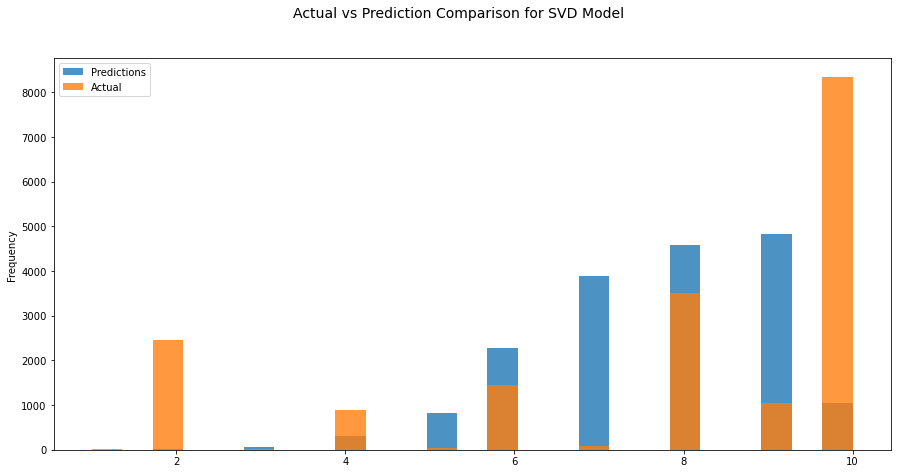

In [70]:
# plotting the histogram for actual and prediction

fig, ax = plt.subplots(figsize = (15, 7.2))
fig.suptitle('Actual vs Prediction Comparison for SVD Model', fontsize = 14)
df_svd['EstRating'].plot.hist(bins = 25, alpha = 0.8)
df_svd['ActualRating'].plot.hist(bins = 25, alpha = 0.8)
ax.legend(['Predictions', 'Actual'])
plt.show()

* ## SVD model:
    * The model has not predcitd any rating for actual rating of 1 and 2. It performs poorly in these rating ranges
    * The distribution of actual rating for 3 almost matches the distribution of predicted rating for 3.
    * The distribution of actual rating for 4 is more than the distribution of predicted rating for 4. The model is not very good at predicting rating 4
    * The distribution of the predicted rating for 5 is greater than the distribution of the actual rating for 5. The model is not very good at predicting rating 5
    * The distribution of the predicted rating for 6 is slightly greater than the distribution of the actual rating for 6. The model is performing good for rating 6
    * The distribution of the predicted rating for 7 is far greater than the distribution of the actual rating for 7. The model performance is not good for rating 7
    * The distribution of the predicted rating for 8 is slightly greater than the distribution of the actual rating of 8. The model performs good for rating 8.
    * The distribution of the predicted rating for 9 is very much greater than the distribution of the actual rating of 9. The model performs bad for rating 9.
    * The distribution of the predicted rating for 10 is very less than the distribution of the actual rating of 10. The model performs poorly for rating 10

# User-Based Collaborative Filtering

In [71]:
# creating and fitting the object of KNN 

user_user = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
user_user.fit(train_sur)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [72]:
# saving the predictions

prediction_user = user_user.test(test_sur)

In [75]:
print("The RMSE of User-user Collaborative Filtering",accuracy.rmse(prediction_user,verbose = False))

The RMSE of User-user Collaborative Filtering 2.7765641962400336


In [76]:
# printing the predicted rating for test users

for username, productname, truerating, predictedrating, _ in prediction_user:
    print("The predicted rating for user",username,"for product",productname,'is',predictedrating,'\n')

The predicted rating for user einem Kunden for product ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 5.1 Lollipop, 13,0 Megapixel is 8.56 

The predicted rating for user Cliente Amazon for product Alcatel One Touch Pop 3 (5) Smartphone, Dual SIM, Display 5' Pollici, 8 GB Memoria interna, 1Gb RAM, Fotocamera da 5 Megapixel con autofocus e flash LED, Android 5.1 Lollipop, Nero/Pelle [Italia] is 7.204046403648742 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Владимир for product Samsung S5570 Galaxy Mini is 9.687297540989704 

The predicted rating for user Amazon Customer for product Vodafone Smart First 6 Pay As You Go Handset Smartphone - Black is 6.400150979662638 

The predicted rating for user Amazon Customer for product Samsung Galaxy Note 4 Smartphone (5,7 Zoll (14,5 cm) Touch-Display, 32 GB Speicher, Android 4.4) schwarz is 5.96455485891544 

The predicted rating for 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.319999999999999 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.959999999999999 

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 6.96 

The predicted rating for user Андрей for product Nokia X2-02 Bright Red is 8.112673883865716 

The predicted rating for user Amazon-Kunde for product Samsung Star S5230 Smartphone (Touchscreen, 3MP Kamera, Video, MP3-Player, Bluetooth) black gold is 3.8157958476272067 

The predicted rating for user Amazon Customer for product Nokia 130 Dual SIM (Red) is 7.08 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 7.999999999999999 

The predicted rating for user Michael for product Asus ZenFone2 Unlocked Smartphone, 16GB, 4GB RAM, Black - ZE551ML (U.S. Warranty) is 8.095477386934673 

The predicted r

The predicted rating for user e-bit for product Celular Nokia C2-01 is 7.2799999999999985 

The predicted rating for user Amazon Customer for product LG E610 L5 Smartphone, Nero [Italia] is 7.832459234337086 

The predicted rating for user Николай for product Sony Xperia Z (белый) is 9.390538974932278 

The predicted rating for user Amazon Customer for product Apple iPhone 6 (Silver, 64GB) is 7.6 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (Black, 16GB) is 5.959999999999999 

The predicted rating for user Amazon Customer for product Apple iPhone 5 Sprint Cellphone, 16GB, Black is 6.8 

The predicted rating for user Amazon Customer for product LG G4 H811 4G LTE Smartphone, 16MP Camera, 32GB, Metallic Grey (T-Mobile) is 4.679328068740448 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 J700M 16GB Dual Sim LTE Unlocked Phone - Retail Packaging - White (International Version) is 8.063058856007565 

The predicted rating for 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Анастасия for product Сотовый телефон Asus ZenFone 2 is 6.2248608276567445 

The predicted rating for user Anonymous  for product Samsung Galaxy S7 32GB (T-Mobile) is 9.636363636363637 

The predicted rating for user Cliente Amazon for product LG G5 Smartphone da 32 GB, 5.3" QHD, 4G LTE, Fotocamera da 16 MP e 8 MP, 4 GB RAM, Titanio is 8.8 

The predicted rating for user Cliente Amazon for product Apple iPhone 6 16GB (Argento) is 6.888888888888889 

The predicted rating for user David for product Alcatel One Touch Pop C5 Smartphone, Dual SIM, 4 GB, Bianco [Italia] is 9.72065071015433 

The predicted rating for user Andrew for product HTC One X White is 8.999817444258003 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Tom for product Motorola Moto G 3. Generation Smartpho

The predicted rating for user Amazon Customer for product Huawei Honor 5X (Grey, 16GB) is 7.68 

The predicted rating for user Ryan for product APPLE iPhone 7 Plus - Black, 128 GB is 1 

The predicted rating for user einem Kunden for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.72 

The predicted rating for user Anonymous  for product Samsung Galaxy S III 16GB (Virgin Mobile) is 8.714285714285714 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 6.76 

The predicted rating for user Cliente Amazon for product Cubot Note S - Smartphone libre Android (Pantalla 5.5" Cámara 5Mp, 16GB, Quad Core 1.3GHz), Negro is 8.428834651007996 

The predicted rating for user M for product Acer Liquid E2 Duo 11,4 cm (4,5 Zoll) Smartphone (Touchscreen, Dual-Sim, 1,2GHz Quadcore Prozessor, 1GB RAM, 8 Megapixel Kamera, Android 4.2) weiß is 7.975 

The predicted rating for user Cliente Amazon for product Samsung Galaxy J5 S

The predicted rating for user Amazon Customer for product Lumia Microsoft Nokia Lumia 640 RM-1073 Unlocked Phone (Black) is 8.545454545454545 

The predicted rating for user Алина for product Sony Xperia M (белый) is 8.744245274961573 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Vibe S1 (White, 32GB) is 6.8 

The predicted rating for user Anonyme for product BLACKBERRY Curve 8520 is 9.0 

The predicted rating for user Amazon Customer for product Samsung Galaxy Star Pro GT-S7262 (Midnight Black) Unlocked International Version/Warranty is 2.3999999999999995 

The predicted rating for user David for product Samsung Galaxy Note 3 LTE N9005 - Smartphone libre Android (pantalla 5.7", cámara 13 Mp, 32 GB, Quad-Core 2.3 GHz, 3 GB RAM), negro (versión europea) is 10 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64G

The predicted rating for user Amazon Customer for product Lenovo A2010 4G (Black) is 6.76 

The predicted rating for user Amazon Customer for product Mi 4i (Grey, 16GB) is 6.84 

The predicted rating for user Daniel for product Nokia 5220 XpressMusic is 7.830740989854829 

The predicted rating for user Stefan for product BlackBerry Storm 9500 is 8.047347874023469 

The predicted rating for user Amazon Kunde for product Nokia Microsoft Nokia Lumia 640 LTE RM-1072 8GB 5" Unlocked GSM Windows 8MP Camera Smartphone - Black - International Version No Warranty is 7.433691756272402 

The predicted rating for user Amazon Kunde for product Huawei P8 Smartphone (5,2 Zoll (13,2 cm) Touch-Display, 16 GB Speicher, Android 5.0) grau is 7.602684825596238 

The predicted rating for user Amazon Customer for product Apple iPhone 4 32GB (Black) - AT&T is 6.0 

The predicted rating for user Cliente Amazon for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB 

The predicted rating for user einem Kunden for product Apple iPhone 7 4,7" 32 GB is 9.56 

The predicted rating for user e-bit for product Smartphone Motorola Moto X 2ª Geração XT1097 32 GB is 9.28 

The predicted rating for user black for product Samsung Omnia (i900) Cep Telefonu is 9.0 

The predicted rating for user Amazon Customer for product Vodafone Smart Ultra 6 Pay As You Go Android Smartphone -Silver is 7.913043478260869 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.2 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Nero [Italia] is 8.875161361278867 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.319999999999999 

The predicted rating for user Rob for product Alcatel OneTouch Idol 3 Global Unlocked 4G LTE Smartp

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL (White, 2GB, 16GB) is 7.166666666666667 

The predicted rating for user Andrea for product Samsung Galaxy S4 mini Smartphone (10,9 cm (4,3 Zoll) Touch-Display, 8 GB Speicher, Android 4.2) schwarz is 10 

The predicted rating for user Amazon Customer for product Samsung Galaxy S3 Mini GT-i8190 factory Unlocked International Verison No Warranty - BLUE is 8.012308989529455 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 16GB) is 6.159999999999999 

The predicted rating for user Виталий for product Sony Xperia TX (черный) is 10 

The predicted rating for user Cliente Amazon for product Nokia Microsoft Lumia 550 Smartphone LTE, Display 4.7' Pollici HD LCD (1280x720), 8 GB Memoria interna, Processore Quad Core Snapdragon 210, Nero [Italia] is 7.5 

The predicted rating for user paolo for product LG D620 G2 Mini Smartphone, 8 GB, Bianco [Italia] is 8.78278757588999 

The 

The predicted rating for user Amazon Customer for product Apple iPhone 5c 16GB (White) - Sprint is 6.333333333333333 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 16GB) is 6.159999999999999 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 7.359999999999999 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 8.04 

The predicted rating for user Павел for product Sony Xperia J (черный) is 8.414239568423351 

The predicted rating for user Amazon Customer for product HTC One M8 UK SIM-Free Smartphone - Gunmetal Grey is 8.2 

The predicted rating for user Client d'Amazon for product Samsung GT-B2710 Téléphone Portable Noir is 7.5 

The predicted rating for user Алексей for product Apple iPhone SE 64GB (серый космос) is 9.980927222351848 

The predicte

The predicted rating for user Qantas for product LG Chocolate KG800 is 6.415866308106032 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.959999999999999 

The predicted rating for user Anonym for product Sony Xperia Z1 Compact Smartphone (4,3 Zoll (10,9 cm) Touch-Display, 16 GB Speicher, Android 4.3) pink is 9.519456822877792 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Robert for product Sony Xperia Z1 - Smartphone libre Android (pantalla 5", cámara 20.7 Mp, 16 GB, Quad-Core 2.2 GHz, 2 GB RAM), negro (versión europea) is 8.403508771929825 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.279999999999999 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J1 Mini SM-J105 is 8.32 

The predicted rating for user Александр for product Samsung I8190 Galaxy S III mini 8GB (се

The predicted rating for user Amazon Customer for product Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Space Gray is 6.56 

The predicted rating for user Lorenzo for product Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia] is 6.95424920128594 

The predicted rating for user Александр for product Samsung Galaxy S4 GT-I9500 16GB (белый) is 8.860427823582224 

The predicted rating for user Paul for product Huawei Honor 5X Unlocked Smartphone, 16GB Dark Grey (US Warranty) is 8.827938227512862 

The predicted rating for user Елена for product Samsung Galaxy A3 (2016) is 9.960311821933907 

The predicted rating for user # for product Nokia 5800 XpressMusic is 7.978902599816394 

The predicted rating for user Олег for product LG X power (белый) is 8.938521919409062 

The predicted rating for user Amazon Customer for product BLU Vivo XL Smartphone - 5.5" 4G LTE - GSM Unlocked 

The predicted rating for user Amazon Kunde for product LG Electronics D605 Optimus L9II Smartphone (11,9 cm (4,7 Zoll) Touchscreen Display, Dual-Core 1,4GHz Prozessor, 8 Megapixel Kamera, 8GB interner Speicher, 1GB RAM, Android 4.1) schwarz is 9.095562259869524 

The predicted rating for user Андрей for product ASUS ZenFone 3 Max ZC520TL 16GB (золотистый) is 9.008085854624643 

The predicted rating for user ?????????????? for product Sony Xperia E dual (?????�??????) is 7.793332982859804 

The predicted rating for user Amazon Customer for product Samsung Guru GT-E1200 (White) is 7.4399999999999995 

The predicted rating for user Александр for product Sony Xperia M (фиолетовый) is 9.760846713194253 

The predicted rating for user Amazon Customer for product Asus Zenfone 2 Laser ZE550KL ( White ,2GB Ram, 16GB ) is 7.365853658536585 

The predicted rating for user Kevin for product LG Google Nexus 5 D820 32GB Unlocked GSM 4G LTE Android Phone - Red is 9.739965651040011 

The predicted rat

The predicted rating for user Anonyme for product SONY ERICSSON Xperia X10 is 9.0 

The predicted rating for user Amazon Customer for product Apple iPhone 6s (Silver, 64GB) is 7.823529411764705 

The predicted rating for user Amazon Customer for product Lenovo A6000 (White, 8GB) is 6.279999999999999 

The predicted rating for user einer Kundin for product Sony Xperia E5 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.0 

The predicted rating for user Александр for product Nokia Lumia 800 is 7.872112590981952 

The predicted rating for user Alberto for product Sony Ericsson Z530i is 7.830740989854829 

The predicted rating for user Markus for product Lenovo Motorola Moto G Smartphone (11,4 cm (4,5 Zoll) HD-Display, 5 Megapixel Kamera, 1,2 GHz Quad-Core-Prozessor, 16 GB interner Speicher, Android 4.3 OS) schwarz is 9.01296016068576 

The predicted rating for user Cliente Amazon for product Asus ZenFone 3 Smartphone, Memoria Interna da 64 GB, Dual-SIM, Bianc

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 7.999999999999999 

The predicted rating for user Amazon Customer for product Motorola Moto G (3rd Generation) - White- 8 GB - Global GSM Unlocked Phone is 7.714285714285714 

The predicted rating for user Amazon Customer for product Motorola Moto G5 (3 GB, Lunar Grey) is 5.359999999999999 

The predicted rating for user e-bit for product Celular Motorola EX115 is 7.199999999999998 

The predicted rating for user Amazon Customer for product HTC Touch Diamond II Smartphone (Windows Mobile 6.5, GPS, Kamera mit 5 MP, Bluetooth) is 9.185493051201355 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product Samsung Galaxy SIII UK SIM-Free Smartphone - Pebble Blue (16GB) - Discontinued by manufacturer is 6.4 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Not

The predicted rating for user Amazon Customer for product Microsoft Lumia 640 XL (Dual SIM, Cyan) is 8.2 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Leonardo for product Apple iPhone 5 Unlocked Cellphone, 32GB, Black is 6.595718198269442 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user e-bit for product Smartphone Motorola Moto G 4 XT1626 is 9.08 

The predicted rating for user Cliente Amazon for product Honor 6 - Smartphone libre (pantalla de 5", 16GB, 3 GB de RAM, cámara trasera de 13 MP y delantera de 5 MP, Android OS, v4.4.2 KitKat, LTE) blanco is 9.141039320729869 

The predicted rating for user Daniel for product Samsung Galaxy A5 2016 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Simple Nano-SIM - Android 5.1 Lollipop) Or (Import Allemagne) is 8.14125783084496 

The predicted rating for user Amazon Cu

The predicted rating for user Francisco for product Samsung Galaxy S Duos (S7562) - Smartphone libre Android (pantalla 4", c??mara 5 Mp, 4 GB, 1 GHz), negro [importado] is 7.199374532557223 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.959999999999999 

The predicted rating for user Екатерина for product Samsung Galaxy S4 GT-I9500 16GB (белый) is 8.445539355595578 

The predicted rating for user e-bit for product Smartphone LG K10 K430TV is 8.88 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J2 SM-J200M is 8.479999999999999 

The predicted rating for user Cliente Amazon for product Microsoft Lumia 640 LTE RM 1072 Smartphone, Marchio TIM, Nero [Italia] is 9.200162635750823 

The predicted rating for user Robert for product Sony Xperia P LT22i-BK Unlocked Phone with 8 MP Camera, Android 2.3 OS, Dual-Core Process

The predicted rating for user Amazon Customer for product Huawei Nexus 6P unlocked smartphone, 32GB Gold (US Warranty) is 8.92 

The predicted rating for user Amazon Customer for product Mi 4i (Grey, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product Samsung Guru GT-E1200 (Indigo Blue) is 7.64 

The predicted rating for user alex for product HTC Desire 610 8GB Unlocked GSM 4G LTE Quad-Core Android Smartphone is 8.56 

The predicted rating for user Amazon Customer for product Samsung G870A Galaxy S5 Active for AT&T [Camo Green] is 10 

The predicted rating for user Giovanni for product Huawei Ascend P6 Smartphone, 8 GB, Fotocamera 8 MP, Display 4.7 Pollici HD, Wi-Fi, Rosa is 9.730235991394979 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.959999999999999 

The predicted rating for user e-bit for product

The predicted rating for user Олег for product Samsung N7100 Galaxy Note II 16GB (серый) is 8.879693647126588 

The predicted rating for user luca for product Samsung I9060i Galaxy Grand Neo Plus Smartphone, 8 GB, Bianco [Italia] is 8.158907692985046 

The predicted rating for user Dan for product Apple iPhone 6 Unlocked Cellphone, 64GB, Silver is 4.865768983667238 

The predicted rating for user UK Guest for product Sony Ericsson T630 is 6.0 

The predicted rating for user Cliente Amazon for product Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Champagne is 8.222222222222221 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 8.04 

The predicted rating for user Amazon Customer for product Motorola Droid RAZR M XT907 Verizon Wireless, 8GB, White is 6.597615846484332 

The predicted rating for user unknown for product Смартфон Asus Zenfone 2 ZE551ML-6J151

The predicted rating for user Marco for product Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania] is 9.854199124993098 

The predicted rating for user mike for product Huawei P8 grijs / 16 GB is 8.071205491143736 

The predicted rating for user Salvatore for product Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia] is 9.537983765730157 

The predicted rating for user Наталья for product Samsung Galaxy S4 mini Duos GT-I9192 (белый) is 9.062638353183628 

The predicted rating for user David for product Sony Xperia P - Smartphone libre (pantalla t??ctil de 4" 540 x 960, c??mara 8 Mp, 16 GB, 2 procesadores de 1 GHz, 1 GB de RAM, S.O. Android 2.3), negro is 9.58393698193079 

The predicted rating for user Cliente Amazon for product Honor 7 - Smartphone libre de 5.2" (4G, WiFi, Bluetooth, Dual Na

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 SM-J700F (White) - Scheduled/4 Hour Delivery (Brand Fulfilled) is 7.071428571428571 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 8.04 

The predicted rating for user Юлия for product Nokia 5230 XpressMusic is 9.447476788836935 

The predicted rating for user Client d'Amazon for product Honor 8 Smartphone débloqué 4G (Ecran: 5,2 pouces - 32 Go - Double Nano-SIM - Android 6.0) Blanc Nacré is 9.400000000000002 

The predicted rating for user stefano for product Samsung SGH J700 is 7.830740989854829 

The predicted rating for user Amazon Customer for product Lenovo A1000 (Black) is 4.92 

The predicted rating for user Amazon Kunde for product Sony Xperia Z1 Compact Smartphone (4,3 Zoll (10,9 cm) Touch-Display, 16 GB Speicher, Android 4.3) pink is 4.746283547197499 

The predicted rating for user alessandro for product Huawei Ascend P6 Smartphone, 8 GB, Fotocamera 8 MP,

The predicted rating for user Cliente Amazon for product LG Nexus 5X Smartphone, Display Touch da 5,2" Full HD, 4G/LTE, 12.3 MP + 5 MP, 2 GB RAM, 32 GB Memoria Interna... is 9.38473317810365 

The predicted rating for user Patrick for product HTC MyTouch 4g Android Unlocked Phone (Black) is 5.553092369477912 

The predicted rating for user Amazon Customer for product BlackBerry Passport 4.5-Inch SIM-Free Smartphone - Black is 8.25284119997092 

The predicted rating for user Amazon Kunde for product Sony Xperia Z1 Compact Smartphone (4,3 Zoll (10,9 cm) Touch-Display, 16 GB Speicher, Android 4.3) pink is 4.746283547197499 

The predicted rating for user Cliente Amazon for product ZUK Z1 Smartphone 4G 5.5 pollici IPS Schermo Cyanogen OS 12.1 USB3.0 Connettore di Tipo-C Qualcomm Snapdragon 801 2.5GHz Doppia Fotocamera Identificazione dell’impronta Digitale is 8.502362421039543 

The predicted rating for user Cliente Amazon for product Samsung Galaxy J5 - Smartphone de 5'' (Android, 4G, cám

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user einem Kunden for product Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G) is 9.28 

The predicted rating for user Amazon Customer for product Samsung Note 4 Standard Li-ion Battery 3220mAh for Galaxy Note 4 - Non-Retail Packaging is 5.517135929491099 

The predicted rating for user Roberto for product Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania] is 9.81795427210341 

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 8.239999999999998 

The predicted rating for user Андрей for product Samsung Galaxy A5 (2016) is 9.98369720734779 

The predicted rating for user Алексей for product Samsung N7100 Galaxy Note II 16GB (белый) is 9.507402307616925 

The predicted rating for 

The predicted rating for user Amazon Customer for product Vodafone Smart Ultra 6 Pay As You Go Android Smartphone - Black is 7.454545454545454 

The predicted rating for user Stefano for product Huawei Ascend G525 Smartphone, 4 GB, Dual SIM, Bianco is 8.994154617874083 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Amazon Customer for product Apple iPhone 6 64GB GOLD UNLOCKED is 9.142857142857142 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J1 SM-J120H is 9.1 

The predicted rating for user James for product ZTE Axon 7 64GB Smartphone (Unlocked, Quartz Gray) is 9.87233268788035 

The predicted rating for user Cliente Amazon for product Desconocido Xiaomi Redmi Note 2 - Smartphone libre (Android, pantalla 5.5'' FHD, cámara 13MP, 16GB, 4G LTE, Dual Sim, MIUI 6 Octa Core 2.0GHz, 2GB RAM), blanco is 8.285714285714286 

The predicted rating for user Дмитрий for product Samsung S56

The predicted rating for user Cliente Amazon for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Nero [Italia] is 8.840000000000002 

The predicted rating for user Денис for product Sony Xperia Z (черный) is 8.88526169573951 

The predicted rating for user Amazon Customer for product Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Space Gray is 6.56 

The predicted rating for user Fred for product Nokia Lumia 520 GSM Unlock 3G Phone, 4-Inch Touch Screen, 5MP 720P Camera, Windows Phone (Black) is 7.901554567476831 

The predicted rating for user Cliente Amazon for product LG Nexus 5X Smartphone da 16 GB, Android 6.0, Display Full HD IPS da 5.2", 4G, Bianco [Italia] is 9.200876363538303 

The predicted rating for user Мария for product Nokia X2-02 Bright Red is 9.14362903858654 

The predicted rating for user Cristian for product Lenovo M

The predicted rating for user Amazon Customer for product iPhone 5S APPLE IPHONE 5S 32GB SILVER UNLOCKED is 6.587471589939427 

The predicted rating for user Amazon Customer for product Samsung B2710 Solid Immerse Sim Free Mobile Phone - Black (Water & Dust Proof) is 10 

The predicted rating for user Дима for product Samsung I8190 Galaxy S III mini 8GB (черный) is 8.300420725354233 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.84 

The predicted rating for user e-bit for product Smartphone Motorola Moto Z Play XT1635 is 9.35483870967742 

The predicted rating for user Amazon Customer for product Nokia Lumia 635 4G UK SIM-Free Smartphone - Orange (Windows, 4.5-inch, 8 GB Internal Memory, 1 GB RAM) is 7.333333333333333 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Client d'Amazon for product Flycool Coque Asus ZenFone 2 5.5 pouces (ZE551ML/ZE55

The predicted rating for user Cliente Amazon for product Asus ZenFone 2 Laser 5.5" Smartphone, 16 GB, Dual SIM, Nero [Italia] is 8.953446257082433 

The predicted rating for user Amazon Customer for product Microsoft Lumia 640 XL (Dual SIM, Orange 8GB) is 7.454545454545454 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Fabrizio for product Samsung SM-N910F Galaxy Note 4 Smartphone, 32 GB, Bianco [Italia] is 9.302871577027894 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.64 

The predicted rating for user e-bit for product Smartphone Motorola Moto G 4 Play XT1603 is 9.08 

The predicted rating for user Anonymous for product HTC Desire C is 8.333333333333334 

The predicted rating for user Amazon Customer for product BLU Vivo Air Unlocked Cellphone, 16GB, Black is 6.270677816943328 

The predicted rating for user Stefano for product Samsung N9005 Galaxy N

The predicted rating for user Amazon Customer for product Mi 4i (White, 16GB) is 6.6 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 8.04 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 7.279999999999999 

The predicted rating for user Luca for product Samsung Galaxy xCover 2 Smartphone, 4 GB, Nero/Rosso [Italia] is 8.176500064205724 

The predicted rating for user Amazon Customer for product Sony Xperia XA Ultra unlocked smartphone,16GB Black (US Warranty) is 6.588235294117647 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product Samsung Galaxy Note 5 N920C 32GB Factory Unlocked GSM - International Version (Silver) is 6.869565217391305 

The predicted rating for user Gianluca for product Oukitel U7 Plus - 5,5 pollici HD Android 6.0 4G smartphone quad-core a 1,3 GHz 2 GB di RAM 16 GB RO

The predicted rating for user Amazon Customer for product OnePlus X (Onyx, 16GB) is 7.079999999999999 

The predicted rating for user Amazon Customer for product Apple iPhone 6 (Silver, 64GB) is 7.6 

The predicted rating for user Андрей for product Samsung Galaxy Note5 is 9.945556958494793 

The predicted rating for user Евгений for product Samsung S5570 Galaxy Mini is 9.803102436696815 

The predicted rating for user Anthony for product Apple iPhone 5s AT&T Cellphone, 16GB, Silver is 9.372607719448304 

The predicted rating for user Amazon Customer for product Sony Xperia XA Dual (Lime Gold) is 6.4799999999999995 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 16GB) is 6.159999999999999 

The predicted rating for user Anonymous for product LG Dare is 8.719822573002542 

The predicted rating for user einem Kunden for product Apple iPhone 6s Plus 5,5" 128 GB is 9.720930232558139 

The predicted rating for user Amazon Customer for product Lenovo V

The predicted rating for user einem Kunden for product Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G) is 9.28 

The predicted rating for user Cliente Amazon for product LG Nexus 5X Smartphone, Display Touch da 5,2" Full HD, 4G/LTE, 12.3 MP + 5 MP, 2 GB RAM, 32 GB Memoria Interna... is 9.38473317810365 

The predicted rating for user David for product LG G3 - Smartphone libre Android (pantalla 5.5", cámara 13 Mp, 16 GB, Quad-Core 2.5 GHz, 2 GB RAM), gris titanio is 8.426348632353676 

The predicted rating for user Amazon Customer for product Samsung Galaxy S4 SGH-I337 Unlocked GSM Smartphone with 13 MP Camera, Touchscreen and 16 GB Storage, Black is 6.46157355034217 

The predicted rating for user Client d'Amazon for product AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces) is 8.791193315855821 

The predict

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Amazon Customer for product BlackBerry Z3 (Black, 8GB) is 5.565217391304348 

The predicted rating for user Amazon Customer for product Motorola Moto E 2nd Generation (3G, White) is 6.68 

The predicted rating for user Jorge for product Sony Xperia Z3 Compact - Smartphone (11,68 cm (4.6"), 1280 x 720 pixeles, 2,5 GHz, Qualcomm Snapdragon, 2048 MB, MicroSD (TransFlash)), Nano sim card, color negro is 7.960817067480313 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 7.279999999999999 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S6 Edge SM-G925 32GB is 9.705882352941176 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J3 SM-J320M is 9.0 

The predicted rating for user Игорь for product Sony Xperia SP (черный) is 8.299242724424476 

The predicted rating for u

The predicted rating for user e-bit for product Smartphone Apple iPhone 6 16GB is 9.366246040760524 

The predicted rating for user Amazon Customer for product Motorola Moto Z Play with Style Mod (Black, 32GB) is 8.399999999999999 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.84 

The predicted rating for user Amazon Customer for product Lenovo Phab 2 Plus Smartphone (Grey, JBL earphones) is 6.92 

The predicted rating for user Евгений for product Apple iPhone 5s 16GB (серый космос) is 9.33722356867774 

The predicted rating for user Amazon Customer for product Lenovo Zuk Z1 (White, Cyanogen OS) is 4.56 

The predicted rating for user Amazon Customer for product Honor 6X (Grey, 32GB) is 7.76 

The predicted rating for user Pedro for product Sim Free Motorola Moto G 4th Generation Mobile Phone - Black is 9.088876511084566 

The predicted rating for user Amazon Customer for product Motorola Moto G - Verizon Prepaid Phone (Verizon Pre

The predicted rating for user Lorenzo for product Microsoft Lumia 640 Smartphone, Dual-SIM, Display HD-IPS 5 Pollici, Processore Quad-Core 1,2GHz, Fotocamera 8 MP, Memoria 8GB, Win 8.1, Bianco [Germania] is 7.571785160844277 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S4 Mini GT-I9192 is 9.12 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.76 

The predicted rating for user Francesco for product Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia] is 9.328199466626605 

The predicted rating for user Елена for product Samsung Galaxy A3 (2016) is 9.960311821933907 

The predicted rating for user Amazon Customer for product BLU Vivo XL Smartphone - 5.5" 4G LTE - GSM Unlocked - Rose Gold is 7.846153846153846 

The predicted rating for user Amazon Customer for product Samsung Guru GT-E1200 (Indigo Blue) is 7.

The predicted rating for user Patrick for product Sony Ericsson XPERIA X10 Smartphone (Android OS,Timescape, Mediascape, 8.1 MP Kamera, GPS) Luster White is 7.9397590361445785 

The predicted rating for user Claudia for product Samsung Galaxy S3 mini I8190 Smartphone, Display AMOLED da 10.2 cm (4 Pollici), Dual Core, 1 GHz, 1 GB RAM, Fotocamera 5 Megapixel, Android 4.1, Bianco marmo [Germania] is 8.458464924469512 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product Mi 4i (White, 16GB) is 6.6 

The predicted rating for user Amazon Kunde for product Samsung Galaxy Ace S5830i Smartphone (8,9 cm (3,5 Zoll) Display, Touchscreen, 5 Megapixel Kamera, Android 2.3) onyx-schwarz is 8.863247347924673 

The predicted rating for user Amazon Customer for product Asus ZenFone 3 Max ZC520TL-4G860IN (Gold) is 4.825225754633604 

The predicted rating for user Amazon Customer for product Lenovo A

The predicted rating for user David for product LG Optimus L5 - Smartphone libre (pantalla t??ctil de 4" 320 x 480, c??mara 5 Mp, 4 GB, procesador de 800 MHz, 512 MB de RAM, S.O. Android 4.0), negro (importado) is 8.771097770154373 

The predicted rating for user Cliente Amazon for product Lenovo Motorola Moto G 4G 3 Generazione Smartphone, Display 5", Fotocamera 13 MP, Memoria 16 GB, Android 6 Lollipop, Nero [Italia] is 9.200000000000001 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.84 

The predicted rating for user ???????????? for product Sony Xperia V (?�????????????) is 9.656998149858023 

The predicted rating for user Amazon Customer for product Apple iPhone 5c (White, 8GB) is 8.333333333333334 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.919999999999999 

The predicted rating for user Cliente Amazon for product Samsung Galaxy A5 2016 Smartphone LTE, 16GB, Ner

The predicted rating for user Stefan for product Microsoft Nokia Lumia 920 Smartphone (11,4 cm (4,5 Zoll) WXGA HD IPS LCD Touchscreen, 8 Megapixel Kamera, 1,5 GHz Dual-Core-Prozessor, NFC, LTE-fähig, Windows Phone 8) gloss white is 7.091150682778872 

The predicted rating for user Robert for product Microsoft Nokia 6300 black (EDGE, GPRS, Kamera mit 2 MP, Musik-Player, Bluetooth, Organizer) Handy is 6.308031384995152 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.319999999999999 

The predicted rating for user Giuseppe for product Alcatel One Touch 20-04G Telefono Cellulare, Nero is 9.336517370706577 

The predicted rating for user Дима for product Sony Xperia Z (черный) is 9.526748095130683 

The predicted rating for user Amazon Customer for product Samsung Galaxy S5 SM-G900T 4G LTE 16GB Smartphone, Black (T-Mobile) is 7.12 

The predicted rating for user Cliente Amazon for product Blackview BV6000 IP68 Tri-Proof Impermeab

The predicted rating for user Cliente Amazon for product WIKO Fever 4G Smartphone, 16 GB, Dual SIM, Nero/Antracite is 8.440041659485566 

The predicted rating for user einer Kundin for product Samsung Galaxy A3 (2017) Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.11111111111111 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.64 

The predicted rating for user carlos for product Smartphone Nokia Lumia 630 Preto Dual Sim, Tv Digital ,Windows Phone 8.1, Tela 4.5", QuadCore 1.2GHz, Câm. 5MP, WiFi, Bluetooth e A-Gps -Tim is 7.041691147597861 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.84 

The predicted rating for user Javier for product Motorola Moto G (3ª Generación) + Carcasa Oficial color turquesa - Smartphone libre Android 6 (4G, pantalla 5", cámara 13 Mp, 16 GB, Quad Core 1.4 GHz, 2 GB de RAM), negro is 7.214090315366137 

The predicted rating for us

The predicted rating for user einem Kunden for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.72 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Amazon Kunde for product Microsoft Nokia 108 Dual-SIM Handy (4,5 cm (1,8 Zoll) Farbdisplay, 0,3 Megapixel Kamera, UKW-Radio, Bluetooth) rot is 9.999315955486134 

The predicted rating for user Pedro for product Samsung Galaxy S II is 7.27048329704262 

The predicted rating for user Andrea for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia] is 7.4280899178946775 

The predicted rating for user Amazon Customer for product Oppo F1S (Grey, 32GB) is 8.079999999999998 

The predicted rating for user Bob for product Apple iPhone 5s (Silver, 16GB) is 7.62 

The predicted rating for user Amazon Customer fo

The predicted rating for user e-bit for product Smartphone LG G4 H818P is 8.857142857142858 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (Black, 16GB) is 5.959999999999999 

The predicted rating for user miatamania for product Nokia N96 Cep telefonu is 9.0 

The predicted rating for user Мария for product Samsung N7100 Galaxy Note II 16GB (серый) is 9.484677361815129 

The predicted rating for user Anonymous for product Motorola RAZR2 V9 is 9.5 

The predicted rating for user Claudio for product Huawei Honor 5X Unlocked Smartphone, 16GB Dark Grey (US Warranty) is 9.068051537894494 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (White, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product Vodafone Smart First 6 Pay As You Go Handset Smartphone - White is 7.333333333333333 

The predicted rating for user Amazon Kunde for product Samsung Galaxy S III I9300 Smartphone 32 GB (12,2 cm (4,8 Zo

The predicted rating for user Amazon Customer for product Motorola Moto E 2nd Generation XT1506 (3G, Black) is 7.4799999999999995 

The predicted rating for user Sara for product Huawei P8 Lite wit / 16 GB is 8.763287180909202 

The predicted rating for user Fred for product Samsung Galaxy S7 zwart / 32 GB is 7.921366317997022 

The predicted rating for user Cristian for product LG Electronics G2 Smartphone ( 13,2 cm (5,2 Zoll) Touchscreen, Quad-Core, 13 Megapixel Kamera, 16GB Speicher, Android 4.2) weiß is 9.741356501473954 

The predicted rating for user Amazon Customer for product Mi 4i (White, 16GB) is 6.6 

The predicted rating for user einer Kundin for product Samsung Galaxy A5 (2017) Smartphone, 13,22 cm (5,2 Zoll) Display, LTE (4G) is 9.0625 

The predicted rating for user Cliente Amazon for product Samsung Galaxy Ace II Smartphone, Nero [Italia] is 8.231946695479921 

The predicted rating for user Amazon Customer for product BlackBerry Passport Smartphone (11,4 cm (4,5 Zoll) D

The predicted rating for user Amazon Customer for product Nokia 130 Dual SIM (Red) is 7.08 

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 8.239999999999998 

The predicted rating for user Amazon Customer for product Nokia Lumia 635 UK SIM-Free Windows Smartphone - Green (4.5-inch, 8GB, 4G) is 8.0 

The predicted rating for user Amazon Customer for product Huawei Ascend G 615 Smartphone (11,4 cm (4,5 Zoll) Touchscreen, 8 Megapixel Kamera, 8 GB Interner Speicher, Android 4.0) schwarz is 7.070738952840698 

The predicted rating for user Amazon Customer for product OnePlus X (Limited Edition Ceramic) is 6.4399999999999995 

The predicted rating for user Sabrina for product Samsung Galaxy S4 mini Smartphone (10,9 cm (4,3 Zoll) Touch-Display, 8 GB Speicher, Android 4.2) schwarz is 9.144730442274751 

The predicted rating for user Ольга for product Samsung Galaxy S4 mini Duos GT-I9192 (черный) is 9.203487445855874 

The predicted r

The predicted rating for user Amazon Kunde for product Lenovo Moto G4 Smartphone (14 cm (5,5 Zoll), 16GB, Android) weiß is 7.436506386016799 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 7.999999999999999 

The predicted rating for user Павел for product Sony Xperia C (черный) is 9.189617085673673 

The predicted rating for user Amazon Customer for product Samsung Galaxy S7 G930F 32GB Factory Unlocked GSM Smartphone International Version (Black) - NO WARRANTY is 8.352941176470587 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite 2017 Smartphone, 16 GB, Nero is 7.840000000000001 

The predicted rating for user Stefan for product Sony Xperia S Smartphone (10,9 cm (4,3 Zoll) Touchscreen, Dual Core, 1,5GHz, 1GB RAM, 32GB eMMC, 12,1 Megapixel Kamera, Android 4.0) silber-grau is 7.961987034010019 

The predicted rating for user Amazon Customer for product Nokia 230 Dual Sim (SILVER) is 6.0 

The predicted r

The predicted rating for user Anonymous  for product Samsung Galaxy S7 32GB (AT&T) is 9.555555555555555 

The predicted rating for user Amazon Customer for product Apple iPhone 5 16GB Verizon Wireless CDMA 4G LTE Cell Phone - White is 6.585365853658536 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 7.279999999999999 

The predicted rating for user Amazon Customer for product Sprint Prepaid HTC Desire 816 Android Prepaid Smartphone - Sprint Prepaid is 8.0 

The predicted rating for user Alberto for product LG G3 - Smartphone libre Android (pantalla 5.5", cámara 13 Mp, 16 GB, Quad-Core 2.5 GHz, 2 GB RAM), dorado is 8.666038647054192 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.279999999999999 

The predicted rating for user Amazon Customer for product Lenovo

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Gold, 16GB) is 7.2 

The predicted rating for user Amazon Customer for product Micromax Canvas Nitro 4G E455 (Black) is 4.755555555555555 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.319999999999999 

The predicted rating for user Alexander for product Samsung Galaxy S II White is 9.944098972636466 

The predicted rating for user Daniel for product Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania] is 9.523200763618329 

The predicted rating for user Amazon Customer for product Apple iPhone 5 - 16GB Black - SIM Free is 5.583982527322033 

The predicted rating for user Client d'Amazon for product Lenovo Moto G4 Smartphone débloqué 4G (Ecran: 5,5 pouces - 16 Go - 2 Go RAM - Android 6.0) Blanc is 8.533333333333333 

The predicted rating for user Ев

The predicted rating for user Amazon Customer for product Apple iPhone 6s Plus Unlocked GSM 4G LTE Smartphone with 12MP Camera, 64 GB, Rose Gold is 8.333333333333332 

The predicted rating for user Amazon Customer for product Lenovo A1000 (Black) is 4.92 

The predicted rating for user Client d'Amazon for product Doogee X5 Smartphone Débloqué 5.0 Pouce 1280 x 720 HD Écran 1.3GHz Quad Core Android 5.1 Double SIM Double Caméra 5.0MP & 2.0MP GPS pour plupart Opérateur Europe - Blanc is 6.6 

The predicted rating for user Amazon Customer for product Lenovo A1000 (White) is 5.999999999999999 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Alex for product Sony Xperia S LT26i is 5.807392687562835 

The predicted rating for user einer Kundin for product Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G) is 9.64 

The predicted rating for user Kevin for product VERIZON LG OCTANE CELL PH

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.84 

The predicted rating for user Manuel for product LG G2 - Smartphone libre Android (pantalla 5.2", cámara 13 Mp, 16 GB, Quad-Core 2.3 GHz, 2 GB RAM), blanco is 8.659363562911867 

The predicted rating for user Алина for product Sony Ericsson Vivaz is 3.6184782608695647 

The predicted rating for user ozlemce108 for product Nokia 5800 XpressMusic Cep Telefonu is 9.0 

The predicted rating for user Cliente Amazon for product OUKITEL K6000 Pro - Smartphone 4G LTE (Android 6.0, Pantalla 5.5", Cámara 8MP+16MP, Octa Core, 3G+32G, 0.3s Fingerprint de Desbloqueo, HotKnot, Estructura de Aleación ) is 8.137300503495805 

The predicted rating for user Amazon Kunde for product Samsung Galaxy Xcover 3 Handy (4,5 Zoll (11,4 cm) Touch-Display, 8 GB Speicher, Android 4.4) dunkelsilber is 7.599658918718908 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 SM-J700F (White) -


The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Юрий for product Sony Xperia Z1 (белый) is 9.239927181813924 

The predicted rating for user Lorenzo for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia] is 9.76283933418937 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey) is 6.92 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 8GB) is 7.999999999999999 

The predicted rating for user Виктория for product Sony Xperia SP (черный) is 9.204505584525988 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite-AM08 - Pack Smartphone Huawei P8 Lite negro con Altavoz portátil AM08 Gold (2 GB de RAM, 16 GB de memoria interna, cámara 13 Mpxs/8Mpx), color negro is 7.9200000


The predicted rating for user Amazon Customer for product OnePlus X (Limited Edition Ceramic) is 6.4399999999999995 

The predicted rating for user Client d'Amazon for product Access-Discount SAMSUNG GALAXY J3 2016 coque silicone Gel TPU + FILM PROTECTION Ecran en VERRE Trempé Galaxy J3 (2016) J320F J3-6 is 5.7130672447558 

The predicted rating for user Andrea for product Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia] is 9.460072113806579 

The predicted rating for user Amazon Kunde for product Sony Xperia M4 Aqua Smartphone (5 Zoll (12,7 cm) Touch-Display, 8 GB Speicher, Android 5.0) silber is 5.252144726547804 

The predicted rating for user emanetcan for product Samsung Omnia (i900) Cep Telefonu is 9.0 

The predicted rating for user Cliente Amazon for product Samsung Smartphone Samsung Galaxy J5 (2016) J510FN (Oro) - Modelo Europeo is 9.217391304347826 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.959999999999999 


The predicted rating for user Cliente Amazon for product Apple iPhone SE is 10 

The predicted rating for user Amazon Customer for product Lenovo Vibe P1 Turbo (Grey) is 7.142857142857142 

The predicted rating for user Amazon Kunde for product Samsung Galaxy J5 DUOS Smartphone (13,2 cm (5,2 Zoll) Touch-Display, 16 GB Speicher, Android 6.0) weiß is 8.19047619047619 

The predicted rating for user Amazon Customer for product LG Electronics Nexus 5 UK Smartphone - Black (16GB) is 8.857142857142858 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Steve for product LG G4 US991 32GB Smartphone (Unlocked, Black Leather) is 10 

The predicted rating for user Amazon Customer for product Samsung Galaxy S4 Active, Dive Blue 16GB (AT&T) is 4.428571428571429 

The predicted rating for user Mauro for product Samsung Galaxy S III Smartphone, Bianco [Italia] is 8.533011930368271 

The predicted rating for user Amazon 

The predicted rating for user Amazon Customer for product Apple iPhone 5 A1428 Factory Unlocked Cellphone, 16GB, Black is 5.999999999999999 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user einer Kundin for product Sony Xperia XA Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.363636363636363 

The predicted rating for user Fabrizio for product Samsung Galaxy S5 Smartphone, Display 5.1 Pollici, Processore Quad-Core 2,5 GHz, RAM 2GB, Memoria Fotocamera 16MP, Android 4.4, Nero [Germania] is 6.9893105656565355 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (White, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product VIVO Y51L (Black) is 8.903225806451612 

The predicted rating for user Amazon-Kunde for product Wiko Rainbow Smartphone (12,7 cm (5 Zoll) Display 4 GB interner Speicher, Android 4.2) pink is 9.920815

The predicted rating for user einer Kundin for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.32 

The predicted rating for user Client d'Amazon for product Samsung B500BE Batterie d'origine pour Samsung Galaxy S4 Mini Noir is 4.694512503850397 

The predicted rating for user Riccardo for product Lenovo Motorola Moto G LTE Smartphone, Display 4.5", Fotocamera 5 MP, Memoria 8 GB, Quad-Core 1.2 GHz, 1 GB RAM, Micro SD, Android 4.4.3, Bianco [Italia] is 10 

The predicted rating for user Amazon Customer for product BLU PURE XR Smartphone - 4G LTE GSM Unlocked - 64GB +4GB RAM - Gold is 8.0 

The predicted rating for user Amazon Customer for product Samsung Galaxy Grand Prime Dual Sim Factory Unlocked Phone - Retail Packaging - Gold(International Version) is 7.21963981766295 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.319999999999999 

The predicted rating for user Amazon Customer for product 

The predicted rating for user Marco for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia] is 8.946781324086071 

The predicted rating for user Client d'Amazon for product Samsung Galaxy S5 mini Smartphone débloqué 4.5 pouces 16 Go Android Noir (import Allemagne) is 6.461538461538462 

The predicted rating for user Client d'Amazon for product Samsung GT-C3590 Téléphone Portable Titanium Silver is 7.830740989854829 

The predicted rating for user Александр for product Мобильный телефон Caterpillar CAT B25 is 7.924075944003151 

The predicted rating for user Amazon Customer for product Huawei Ascend Y530 Smartphone (4,5 Zoll (11,4 cm) Touch-Display, 4 GB Speicher, Android 4.3) weiß is 8.025248010359212 

The predicted rating for user Mary for product Samsung Galaxy S6, Black Sapphire 32GB (Verizon Wireless) is 8.48936170212766 

The predicted rating for user Anônimo f

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Andrea for product Samsung G800 Galaxy S5 Mini Smartphone, 16 GB, Bianco [Italia] is 6.4661319073083785 

The predicted rating for user ???????? for product Sony Xperia E (??????????) is 8.290452279874977 

The predicted rating for user Paul for product Apple iPhone 4 16GB SIM-Free - White is 8.129770992366412 

The predicted rating for user Cliente Amazon for product Lenovo Motorola Moto G 4G 3 Generazione Smartphone, Display 5", Fotocamera 13 MP, Memoria 16 GB, Android 6 Lollipop, Nero [Italia] is 9.200000000000001 

The predicted rating for user fabio for product Huawei Ascend Y635 Smartphone 4G LTE, Dual SIM, Display 5' Pollici, 8 GB Memoria interna, 1GB RAM, Processore QuadCore 1.2 Ghz, Bianco is 8.476987870796783 

The predicted rating for user David 

The predicted rating for user anonym for product Nokia 8890 is 7.5 

The predicted rating for user Andrew for product SAMSUNG Galaxy A3 (2017) - 16 GB, Black is 8.100900473155372 

The predicted rating for user unknown for product Samsung Samsung Galaxy A5 2016 - Wit is 9.700000000000001 

The predicted rating for user Amazon Customer for product Asus ZenFone 2 Laser 5.5" Smartphone, 16 GB, Dual SIM, Nero [Italia] is 9.490531870046969 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.2 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Nero [Italia] is 8.875161361278867 

The predicted rating for user Amazon Customer for product Apple iPhone 5 Sprint Cellphone, 16GB, Black is 6.8 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max Prime (Gold, 128GB) is 7.799999999999999 

The predicted rating for user ???????? for product Sony Xperia V (?????�??????) is 9.6

The predicted rating for user Amazon Customer for product Sony Xperia Z5 Smartphone (5,2 Zoll (13,2 cm) Touch-Display, 32 GB interner Speicher, Android 5.1) grün is 7.573635196856915 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J1 SM-J120H is 9.1 

The predicted rating for user Kevin for product Sim Free Apple iPhone SE 64GB Mobile Phone - Space Grey is 9.390938109349786 

The predicted rating for user Cliente Amazon for product Doogee X5 Max Pro - 4G Smartphone Libre Android 6.0 (Pantalla 5.0'' IPS, MT6737M Quad Core 1.3GHz, 2G Ram, 16G Rom, Dual Sim, Dual ID, Smart Wake, Huella Dactilar) is 6.375000000000001 

The predicted rating for user Matt for product BLU Life Pure Unlocked Phone 32GB ROM, 2GB RAM (White) is 7.79979933626611 

The predicted rating for user ?????�?????? for product Samsung Galaxy Ace 2 is 9.992386580059662 

The predicted rating for user einem Kunden for product Sony Xperia XA Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 

The predicted rating for user Amazon Customer for product Samsung Galaxy S6 32GB SM-G920i - Unlocked White (International Version) is 8.055555555555555 

The predicted rating for user Amazon Customer for product OnePlus X (Limited Edition Ceramic) is 6.4399999999999995 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime SM-G531 is 8.92 

The predicted rating for user Amazon Customer for product Lenovo Vibe P1 Turbo (Grey) is 7.142857142857142 

The predicted rating for user Client d'Amazon for product AICEK Coque Samsung Galaxy J3 2016, AICEK Etui Silicone Gel Samsung Galaxy J3 2016 (J320F) Housse Antichoc Samsung J3 Transparente Souple Coque De Protection Pour Samsung Galaxy J3 2016 (5,0 Pouces) is 8.941176470588236 

The predicted rating for user Amazon Customer for product TTfone Dual 2 (TT59) Basic Simple Senior Mobile Phone with Big Buttons, SOS Button, Large Display, Dual Sim is 7.75 

The predicted rating for user francesco for product Samsung 

The predicted rating for user Amazon Customer for product Lenovo K3 Note (Black) is 4.76 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.279999999999999 

The predicted rating for user Amazon Customer for product Honor 6X (Gold, 32GB) is 7.959999999999999 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J7 Prime SM-G610M is 8.96 

The predicted rating for user Amazon Customer for product Motorola Nexus 6 Unlocked Cellphone, 64GB, Cloud White (U.S. Warranty) (Discontinued by Manufacturer) is 2.0290194951586615 

The predicted rating for user Anonymous  for product Samsung Galaxy S6 32GB (T-Mobile) is 9.578947368421053 

The predicted rating for user Steve for product Vodafone Nokia 108 Mobile Phone - Black is 10 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 7.999999999999999 

The predicted rating for user Domenico for product Nokia Asha 

The predicted rating for user einem Kunden for product Apple iPhone 7 4,7" 32 GB is 9.56 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Ana for product Sony Phones Xperia U Sim Free Smartphone - Black (discontinued by manufacturer) is 7.427307828020915 

The predicted rating for user Ben for product APPLE iPhone 7 - Silver, 32 GB is 9.519906895958549 

The predicted rating for user Антон for product Apple iPhone 5s 16GB (серебристый) is 9.237561186751217 

The predicted rating for user Cristina for product Samsung Galaxy Express 4G is 8.196428571428571 

The predicted rating for user Amazon Customer for product Motorola Moto E 2nd Generation (3G, White) is 6.68 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user e-bit for product Smartphone LG L90 D410 is 8.96 

The predicted rating for user Amazon Customer for product

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 6.76 

The predicted rating for user e-bit for product Smartphone Lenovo Vibe K5 is 8.64 

The predicted rating for user Кристина for product Samsung S7270 Galaxy Ace 3 (красный) is 9.641012177305331 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max Prime (Gold, 128GB) is 7.799999999999999 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.76 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Amazon Customer for product OnePlus X (Onyx, 16GB) is 7.079999999999999 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.959999999999999 

The predicted rating for user Amazon Customer for produ

The predicted rating for user Amazon Customer for product Lenovo Phab 2 Plus Smartphone (Grey, JBL earphones) is 6.92 

The predicted rating for user Kindle Customer for product HTC Sensation Z710E Unlocked GSM Android Smartphone with 8 MP Camera, Wi-Fi and GPS - No Warranty - Black is 7.202185792349726 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime TV SM-G530 is 8.8 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.76 

The predicted rating for user Amazon Customer for product Lenovo S850 (White, 16GB) is 5.2727272727272725 

The predicted rating for user Amazon Customer for product BLU Vivo XL Smartphone - 5.5" 4G LTE - GSM Unlocked - Solid Gold is 7.799999999999999 

The predicted rating for user Amazon Kunde for product Honor 7 Smartphone (13,2 cm (5,2 Zoll) Touchscreen, 16GB interner Speicher, Android OS) silber is 9.665376641496898 

The predicted rating for user Дарья for product

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 7.999999999999999 

The predicted rating for user UK Guest for product Nokia 8310 is 8.340425531914894 

The predicted rating for user Amazon-Kunde for product Sony Xperia Z3 Compact Smartphone (11,7 cm (4,6 Zoll) HD-TRILUMINOS-Display, 2,5 GHz-Quad-Core-Prozessor, 20,7 Megapixel-Kamera, Android 4.4) mandarinrot is 1.673689138576779 

The predicted rating for user David for product Huawei Ascend P6 - Smartphone libre Android (pantalla 4.7", cámara 8 Mp, 8 GB, 1.5 GHz, 2 GB RAM), blanco is 10 

The predicted rating for user Cliente Amazon for product Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia] is 8.52 

The predicted rating for user Amazon Customer for product ASUS ZenFone 2 Laser Unlocked Smartphone, 3GB RAM, 32GB Storage is 8.500331754742138 

The predicted rating for user Misafir for product Vodafone (69) 858 Smart is 9.0 

The predicted rating for user David

The predicted rating for user Jeff for product DOOGEE X5 Max Pro Smartphone, 5 Pollici HD IPS Display, 4G Android 6.0 Telefono Cellulari Doppia SIM - 16 GB Memoria Interna 2GB RAM - Fotocamera 8.0MP - 4000mAh Impronta Digitale Cellulare - Nero is 9.508403361344538 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.32 

The predicted rating for user Amazon Customer for product Microsoft Lumia 640 XL (Dual SIM, Cyan) is 8.2 

The predicted rating for user Client d'Amazon for product Honor 6 Smartphone débloqué 4G Cat 6 (Ecran : 5 pouces Full HD - 16 Go - Simple SIM - Android 4.4 KitKat) Noir is 8.25 

The predicted rating for user Amazon Customer for product Oppo Neo 7 (Black, 16GB) is 6.823529411764706 

The predicted rating for user Amazon Customer for product Apple iPhone 7 Unlocked Phone 32 GB - US Version (Gold) is 6.5 

The predicted rating for user Amazon Customer for product Honor 6X (Gold, 32GB) is 7.9


The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Steve for product Nokia C1-01 Sim Free Mobile Phone - Dark Grey is 5.830985915492958 

The predicted rating for user Client d'Amazon for product Meizu M2 Note Smartphone débloqué 4G (Ecran: 5,5 pouces - 16 Go - Double Nano-SIM - Android 5.1 Lollipop) Blanc is 8.799999999999999 

The predicted rating for user Сергей for product Samsung N9000 Galaxy Note 3 32GB (черный) is 8.9724984382597 

The predicted rating for user Артем for product Nokia 101 Premium Black is 7.178458871372595 

The predicted rating for user ?????�?????? for product Sony Ericsson Xperia ray is 9.930143540669857 

The predicted rating for user Cliente Amazon for product Honor 6 Smartphone (5 pollici, Touchscreen, Octa-Core, 3GB RAM, 16GB ROM, fotocamera principale da 13MP, fotocamera frontale da 5MP, 4G/LTE CAT6, Android 4.4, EmotionUI 2.3, SIM singola) Nero is 6.701278565025302 

The p

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max (Gold, 32GB) is 8.12 

The predicted rating for user Davide for product Nokia Lumia 830 Smartphone, 16 GB, Fotocamera da 10 MP, Display da 5'', LTE, Nero is 8.823827006298115 

The predicted rating for user Amazon Customer for product Apple iPhone 7 Unlocked Phone 32 GB - US Version (Gold) is 6.5 

The predicted rating for user Виталий for product Sony Xperia L (черный) is 9.180808261446067 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted rating for user Amazon Customer for product Huawei Ascend Y5 Smartphone, 8 GB, Marchio TIM, Nero is 7.448317175029423 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.279999999999999 

The predicted rating for user Stefano for product Huawei Ascend Y300 Sm

The predicted rating for user e-bit for product Smartphone LG G3 D855 is 9.04 

The predicted rating for user Anthony for product Nokia Lumia 810 T-Mobile Phone, 4.3-Inch. 8GB with Windows 8 OS, 8MP Camera, Seconday 1.2MP Camera, Dual-Core Processor, Amoled Touchscreen, GPS, Wi-Fi, Bluetooth, Micro SD Slot Upto 64GB - Black is 7.468085106382978 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.959999999999999 

The predicted rating for user Amazon Customer for product Lenovo Motorola Moto X Play Smartphone, 5.5", Fotocamera 21 MP, 16 GB, RAM 2 GB, Android 5.1.1 Lollipop, Nero [Italia] is 8.914491727469079 

The predicted rating for user e-bit for product Smartphone Motorola Moto G 4 Play XT1603 is 9.08 

The predicted rating for user e-bit for product Celular Motorola EX115 is 7.199999999999998 

The predicted rating for user Cliente Amazon for product BQ Aquaris X5 - Smartphone de 5" (WiFi, 2 GB de RAM, memoria interna de 16 GB, cámara 13 MP

The predicted rating for user Cliente Amazon for product Asus ZE551ML-2A760WW Smartphone ZenFone 2 Deluxe, 5.5", 4 GB RAM, 64 GB, Intel Quad-Core Z3580, Dual SIM, Illusion Purple is 9.240000000000002 

The predicted rating for user iboibo for product Samsung Omnia (i900) Cep Telefonu is 9.0 

The predicted rating for user Amazon Customer for product Lenovo S850 (White, 16GB) is 5.2727272727272725 

The predicted rating for user Игорь for product Apple iPhone 5s 16GB (серебристый) is 9.373658197774196 

The predicted rating for user e-bit for product Smartphone LG L90 D410 is 8.96 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J1 Mini SM-J105 is 8.32 

The predicted rating for user Елена for product Sony Xperia L (черный) is 8.967844792902794 

The predicted rating for user Игорь for product Sony Xperia L (белый) is 9.18594181201276 

The predicted rating for user Matt for product Samsung Rugby 3 A997 GSM Unlocked Rugged Flip Phone - Gray/Black (Internationa

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 6.96 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (Black, 16GB) is 5.959999999999999 

The predicted rating for user Роман for product Samsung N7100 Galaxy Note II 16GB (серый) is 9.137257601596803 

The predicted rating for user e-bit for product Smartphone Motorola Razr XT910 is 7.999285626143074 

The predicted rating for user Amazon Customer for product Lenovo A1000 (Black) is 4.92 

The predicted rating for user Anonymous for product BlackBerry Curve 3G 9300 Sim Free Smartphone is 7.597744360902255 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for user Антон for product Sony Xperia Z1 (фиолетовый) is 9.369317016651703 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Amazon Custom

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max (Gold, 32GB) is 8.12 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.64 

The predicted rating for user Client d'Amazon for product Honor 7 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Double Nano SIM - Android 5.0 Lollipop) Argent/Blanc is 8.760000000000002 

The predicted rating for user Anonym for product Samsung Galaxy Note 3 is 9.9126137547737 

The predicted rating for user Cliente Amazon for product Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio is 8.644314392940094 

The predicted rating for user Cliente Amazon for product Motorola Moto G (3ª Generación) + Carcasa Oficial color turquesa - Smartphone libre Android 6 (4G, pantalla 5", cámara 13 Mp, 16 GB, Quad Core 1.4 GHz, 2 GB de RAM), negro is 8.4 

The predicted rating for user Amazon Customer for prod

The predicted rating for user Amazon Customer for product Samsung Accessories Galaxy S3 Mini GT-i8190 Unlocked, International Version, Blue is 4.0 

The predicted rating for user Client d'Amazon for product Motorola Moto G 3ème génération Smartphone débloqué 4G (Ecran: 5 pouces - 8 Go - 1 Go RAM - Simple Micro-SIM - Android 5.1) Blanc is 8.75 

The predicted rating for user Frank for product Samsung Galaxy S III Neo Smartphone (4,8 Zoll (12,2 cm) Touch-Display, 16 GB Speicher, Android 4.4) schwarz is 9.403005037655419 

The predicted rating for user roberto for product Samsung S5830i Galaxy Ace Onyx Black is 8.673469387755102 

The predicted rating for user John for product Samsung Galaxy Ace S5830 Smartphone (8,9 cm (3,5 Zoll) Display, Touchscreen, Android OS, 5 Megapixel Kamera) weiß is 9.188670164791581 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Ольга for product LG X power (золотистый) is 8.8

The predicted rating for user David for product Motorola Moto G 16 GB - Smartphone libre Android (pantalla 4.5", cámara 5 Mp, 16 GB, Quad-Core 1.2 GHz), negro (importado) is 10 

The predicted rating for user Cliente Amazon for product Samsung Galaxy A5 2016 Smartphone LTE, 16GB, Nero is 9.030781757730745 

The predicted rating for user Михаил for product Apple iPhone 5s 16GB (серый космос) is 9.725478822395099 

The predicted rating for user Amazon-Kunde for product Sony Xperia Z Smartphone (5 Zoll (12,7 cm) Touch-Display, 16 GB Speicher, Android 4.1) schwarz is 7.167306714840357 

The predicted rating for user Amazon Customer for product Apple iPhone 5 16GB Factory Unlocked GSM Cell Phone - White is 5.333333333333333 

The predicted rating for user Amazon Kunde for product Microsoft Lumia 950 Smartphone (5,2 Zoll (13,2 cm) Touch-Display, 32 GB Speicher, Windows 10) weiß is 6.8032252775923086 

The predicted rating for user Amazon Customer for product Microsoft Lumia 535 (White, Dual 

The predicted rating for user ???????????? for product Samsung Galaxy Ace 2 is 10 

The predicted rating for user Amazon Customer for product iPhone 5S APPLE IPHONE 5S 32GB SILVER UNLOCKED is 6.587471589939427 

The predicted rating for user Davide for product Blackview BV5000 IP67 impermeabile Smartphone 4G FDD-LTE 3G WCDMA Shockproof antipolvere Rugged Outdoor Drfy Android 5.1 OS Quad Core MTK6735P 5.0 "IPS 1.0GHz schermo 64bit is 6.00988721468362 

The predicted rating for user Client d'Amazon for product Samsung Galaxy J3 Smartphone débloqué 4G (Ecran: 5 Pouces - 8 Go - Micro-SIM - Android Lollipop 5.1) Noir is 7.863636363636363 

The predicted rating for user Pedro for product Huawei Ascend P1 - Smartphone libre Android (pantalla 4.3", c??mara 8 Mp, 4 GB, 1 GB RAM, 1.5 GHz), rojo [importado] is 7.0257486751273674 

The predicted rating for user Client d'Amazon for product Samsung Galaxy J3 Smartphone débloqué 4G (Ecran: 5 Pouces - 8 Go - Micro-SIM - Android Lollipop 5.1) Noir is 7

The predicted rating for user Amazon Customer for product Mi 4i (White, 16GB) is 6.6 

The predicted rating for user miatamania for product Nokia 5310 Cep Telefonu is 9.0 

The predicted rating for user Cliente Amazon for product Asus ZenFone 3 Smartphone, Memoria Interna da 64 GB, Dual-SIM, Bianco [Italia] is 9.451514288634053 

The predicted rating for user Anonymous for product HTC Desire C is 8.333333333333334 

The predicted rating for user Amazon Customer for product Nokia 215 (Dual SIM, Green) is 7.391304347826087 

The predicted rating for user Anonymous  for product Samsung Galaxy S6 edge+ 32GB (T-Mobile) is 9.5 

The predicted rating for user Fred for product Sony Mobile Xperia Z Ultra Smartphone débloqué 4G (Android 4.2 Jelly Bean) Noir is 5.084426946631671 

The predicted rating for user Client d'Amazon for product Honor 7 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Double Nano SIM - Android 5.0 Lollipop) Argent/Blanc is 8.760000000000002 

The predicted rating for 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 7.279999999999999 

The predicted rating for user Stefano for product Nokia Asha 305 Smartphone, Dual Band, Dual SIM, Display da 3", Rosso [Italia] is 8.899241581815208 

The predicted rating for user Татьяна for product Sony Xperia Z1 (белый) is 9.65206537651412 

The predicted rating for user Sandra for product Nokia 6303 Classic is 7.864197530864198 

The predicted rating for user Amazon Customer for product Cubot X12 5.0'' IPS Android 5.1 Unlocked LTE 4G Smartphone Quad Core 1GB/8GB Dual SIM Cellphone Phablet (Golden) is 7.9230769230769225 

The predicted rating for user Frank for product HTC Mozart 7 Smartphone (9,4 cm (3,7 Zoll) Display, Touchscreen, 8 Megapixel Kamera, T-Mobile) is 9.953529411764707 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.84 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, V

The predicted rating for user George for product Apple iPhone 6 Plus, Gold, 16GB (Unlocked) is 10 

The predicted rating for user Amazon Customer for product Lenovo S850 (White, 16GB) is 5.2727272727272725 

The predicted rating for user e-bit for product Smartphone LG G3 D855 is 9.04 

The predicted rating for user Amazon Customer for product Microsoft Lumia 540 (White, 8 GB) is 7.6 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 8GB) is 7.999999999999999 

The predicted rating for user Joe for product Blackberry Q5 Smartphone (7,84 cm (3.1 Zoll) Display, QWERTZ-Tastatur, 5 MP Kamera, 8 GB interner Speicher, NFC, Blackberry 10.1 Betriebssystem) weiß is 8.35 

The predicted rating for user Sergio for product Desconocido Xiaomi Redmi 2 - Smartphone libre Android (pantalla 4.7", cámara 8 Mp, 8 GB, Quad-Core 1.2 GHz, 1 GB RAM), gris is 7.9949766129153765 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 

The predicted rating for user Amazon Customer for product Samsung Galaxy S7 Smartphone, 32 GB, Nero is 7.602513750562772 

The predicted rating for user Jeff for product Samsung Galaxy Note 3 Smartphone débloqué 4G (Ecran 5.7 pouces - 32 Go - Android 4.3 Jelly Bean) Noir is 7.830740989854829 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.84 

The predicted rating for user Amazon Customer for product Samsung Galaxy S3, White 16GB (Verizon Wireless) is 6.625 

The predicted rating for user David for product Desconocido Xiaomi Redmi Note 2 - Smartphone libre (Android, pantalla 5.5'' FHD, cámara 13MP, 16GB, 4G LTE, Dual Sim, MIUI 6 Octa Core 2.0GHz, 2GB RAM), blanco is 8.430188679245283 

The predicted rating for user Илья for product Samsung Galaxy S4 mini (I9190) is 9.867545979919484 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted rating for user Андрей for product App

The predicted rating for user Amazon Customer for product Apple iPhone 4S 16GB Unlocked GSM World Smartphone w/ Siri and iCloud - White is 6.0 

The predicted rating for user e-bit for product Celular LG T375 is 7.999999999999999 

The predicted rating for user Steve for product Tracfone Motorola Moto E Android Prepaid Phone with Triple Minutes (Tracfone) is 9.055430356634156 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 7.279999999999999 

The predicted rating for user Ivan for product Samsung Galaxy S7 is 9.25168440747481 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product Lenovo A1000 (Black) is 4.92 

The predicted rating for user Amazon Customer for product Apple iPhone 6s (Silver, 64GB) is 7.823529411764705 

The predicted rating for user unknown for product Samsung Samsung Galaxy A5 2016 - Wit is 9.700000000000001 

Th

The predicted rating for user Amazon Customer for product Huawei Honor 5X (Silver) is 6.933333333333333 

The predicted rating for user Amazon Customer for product Microsoft Lumia 540 (White, 8 GB) is 7.6 

The predicted rating for user Mauro for product Samsung E1190 Telefono Cellulare [Germania] is 8.236347037510992 

The predicted rating for user Amazon Customer for product Verizon WIRELESS CELL PHONE SAMSUNG U460 INTENSITY II METALLIC BLUE PHONE NO CONTRACT REQUIRED WORKS ON VERIZON WIRELESS OR PAGE PLUS NETWORK ONLY is 6.479707846971272 

The predicted rating for user Евгения for product Sony Xperia Z1 Compact (черный) is 9.477248417768587 

The predicted rating for user Amazon Customer for product Huawei Honor 5X (Silver) is 6.933333333333333 

The predicted rating for user Александр for product Apple iPhone SE 64GB (серый космос) is 9.29498940092982 

The predicted rating for user einem Kunden for product Apple iPhone 7 4,7" 256 GB is 9.777777777777779 

The predicted rating for

The predicted rating for user Алина for product Sony Xperia Z (белый) is 9.336388664094322 

The predicted rating for user Anonymous for product Motorola W175 is 5.048782518382568 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 Prime SM-G610F (Gold, 16GB) is 6.448979591836734 

The predicted rating for user Сергей for product Sony Xperia Z1 (фиолетовый) is 8.946846484243823 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 16GB) is 6.159999999999999 

The predicted rating for user Alessandro for product Huawei Ascend Y300 Smartphone, 4 GB, Bianco is 10 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 7.279999999999999 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user e-bit for product Smartphone LG G3 D855 is 9.04 

The predicted rating for user Amazon Customer for product Samsung Galaxy

The predicted rating for user James for product LG Electronics G2D802 UK SIM-Free Smartphone - Black (Android, 16GB) is 9.714225252855833 

The predicted rating for user Amazon Customer for product Sony Xperia X Compact - Unlocked Smartphone - 32GB - Black (US Warranty) is 7.0 

The predicted rating for user Cliente Amazon for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia] is 8.680000000000001 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 6.76 

The predicted rating for user Frank for product Sony Ericsson Xperia mini pro Smartphone (7,6 cm (3 Zoll) Display, QWERTZ-Tastatur, Touchscreen, 5 MP Kamera, Android 2.3 OS) schwarz is 8.143765673692585 

The predicted rating for user Client d'Amazon for product AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Anticho

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 SM-J700H/DS GSM Factory Unlocked Smartphone-Android 5.1, 5.5-Inch - Gold is 8.96551724137931 

The predicted rating for user Amazon Customer for product Samsung Galaxy S6 SM-G920F Factory Unlocked Cellphone, International Version, No Warranty 32GB, Gold is 9.0 

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 8.239999999999998 

The predicted rating for user Client d'Amazon for product Samsung Galaxy A3 Téléphone portable débloqué 4G (Ecran: 4,5 pouces - 16 Go - Simple SIM - Android 4.4 KitKat) Argent is 9.333333333333332 

The predicted rating for user Amazon Customer for product BLU Vivo XL Smartphone - 5.5" 4G LTE - GSM Unlocked - Solid Gold is 7.799999999999999 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 7.359999999999999 

The predicted rating for user Client d'Amazon for produc

The predicted rating for user Francesco for product Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania] is 8.28128424046027 

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 6.96 

The predicted rating for user Anonyme for product SAMSUNG Galaxy Teos is 7.830740989854829 

The predicted rating for user Cliente Amazon for product Doogee X5 Pro - Smartphone Libre 4G Android 5.1 (Quad Core, 5.0" IPS 1280*720 HD, 2GB RAM, 16GB ROM, 5.0MP Cámara, Dual SIM, GPS, OTG) Celular (Negro) is 8.153846153846153 

The predicted rating for user e-bit for product Celular LG A275 is 8.636363636363637 

The predicted rating for user Cliente Amazon for product Apple iPhone 5S 16GB Argento [Italia] is 8.669135292877197 

The predicted rating for user anneme for product Nokia N81 Cep Telefonu is 9.0 

The predicted rating for user Amazon Customer for product VIVO 

The predicted rating for user Cliente Amazon for product Motorola Moto E (2nd Gen.) - Smartphone libre de 4.5" (Quad Core 1.2 GHz, 1 GB de RAM, 8 GB, cámara 5 MP, Android) color negro is 7.483179629076061 

The predicted rating for user Amazon Customer for product Kazam Wileyfox Swift UK SIM-Free Smartphone with Swift Hard Case and Screen Protection Card - Sandstone Black is 8.850045016946094 

The predicted rating for user Flipkart Customer for product Lenovo Vibe K5 Plus (Dark Grey, 16 GB) is 5.737166974262432 

The predicted rating for user e-bit for product Smartphone Motorola Moto G 4 XT1626 is 9.08 

The predicted rating for user Гость for product Apple iPhone 4 32Gb is 8.922759634975062 

The predicted rating for user Cliente Amazon for product Asus ZE551ML-2A760WW Smartphone ZenFone 2 Deluxe, 5.5", 4 GB RAM, 64 GB, Intel Quad-Core Z3580, Dual SIM, Illusion Purple is 9.240000000000002 

The predicted rating for user Amazon Kunde for product Huawei P8 lite Dual-SIM Smartphone (5 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Kindle Customer for product Nokia Asha 300 Sim Free Mobile Phone - Graphite is 8.771997113104444 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 7.279999999999999 

The predicted rating for user Amazon Customer for product Huawei Ascend Y201 Pro Smartphone (8,9 cm (3,5 Zoll) Touchscreen, 3,2 Megapixel Kamera, 4 GB Interner Speicher, Android 4.0) schwarz is 4.957102589204335 

The predicted rating for user Николай for product Lenovo A1000 (белый) is 8.351936015993672 

The predicted rating for user Amazon Customer for product OnePlus X (Onyx, 16GB) is 7.079999999999999 

The predicted rating for user Amazon Customer for product Microsoft Lumia 535 (Dual SIM, Bright Orange, 1GB RAM) is 6.444444444444445 

The

The predicted rating for user Robert for product Microsoft Nokia 3720 classic Handy (Outdoor, Bluetooth, E-Mail, Ovi, Kamera mit 2 MP) grey is 9.868736591246977 

The predicted rating for user e-bit for product Smartphone LG K10 K430TV is 8.88 

The predicted rating for user Александр for product Sony Xperia L (белый) is 8.703649360784855 

The predicted rating for user Cliente Amazon for product Lenovo Motorola Moto E 2a Generazione Smartphone, LTE, 8 GB, RAM 1 GB, Bianco [Italia] is 8.547761086897696 

The predicted rating for user Amazon Customer for product Mi 4i (White, 16GB) is 6.6 

The predicted rating for user Cliente Amazon for product Lenovo Motorola Moto G (3a Generación) - Smartphone libre Android (4G, 5", 13 MP, 16 GB, 2 GB RAM), color negro is 9.250582798513078 

The predicted rating for user ?????�?????? for product Sony Xperia V (?????�??????) is 9.139569129313147 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey) is 6.92 

The predicted rating for user Cliente Amazon for product Huawei 771657 P8 Lite Smart Smartphone 16GB, Marchio Tim, Grigio Titanio is 8.537596401064473 

The predicted rating for user David for product HUAWEI P9 Lite - 16 GB, Black is 9.10462697343737 

The predicted rating for user ozlemce108 for product Nokia N96 Cep telefonu is 9.0 

The predicted rating for user Алина for product Samsung Galaxy A5 (2016) is 10 

The predicted rating for user Amazon Customer for product HTC Desire 826 (Dual SIM, Blue Lagoon) is 4.4 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user einer Kundin for product Sony Xperia E5 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.0 

The predicted rating for user Cliente Amazon for product Apple iPhone 5S 16GB Grigio [Italia] is 8.05593276186633 

The predicted r

The predicted rating for user Anonymous  for product Samsung Galaxy S7 32GB (Boost) is 9.5 

The predicted rating for user David for product Sony Xperia Z3 Compact - Smartphone (11,68 cm (4.6"), 1280 x 720 pixeles, 2,5 GHz, Qualcomm Snapdragon, 2048 MB, MicroSD (TransFlash)), Nano sim card, color negro is 10 

The predicted rating for user Kindle Customer for product Samsung Galaxy Note, i717 16GB Unlocked GSM 4G LTE 8MP Camera Smartphone with S Pen Stylus - White is 2.081188933720852 

The predicted rating for user UK Guest for product Sony Ericsson T610 is 9.498877293168174 

The predicted rating for user Никита for product Samsung Galaxy S7 edge is 10 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.319999999999999 

The predicted rating for user einem Kunden for product Samsung Galaxy S8 Plus Smartphone mit 64 GB interner Speicher is 9.2 

The predicted rating for user Antonio for product Lenovo Motorola Moto X Play - Sma

The predicted rating for user Amazon Customer for product Motorola Moto G 4G SIM-Free Smartphone - Black (8GB) - Discontinued by manufacturer is 8.526115773197398 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product VIVO Y55L (Gold) is 9.0 

The predicted rating for user Amazon Customer for product HTC Desire 620G (Santroni White) is 6.279999999999999 

The predicted rating for user Сергей for product LG X power (индиго) is 8.953362778802717 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (White, 16GB) is 6.84 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime TV SM-G530 is 8.8 

The predicted rating for user Laura for product Apple iPhone 4S 16GB (Black) - Verizon is 7.243478260869566 

The predicted rating for user Amazon Customer for product Nokia 230 Dual Sim (SILVER) is 6.0 

The predicted rating

The predicted rating for user Cliente Amazon for product Blackview BV6000 IP68 Tri-Proof Impermeabile Smartphone 4.7" 4G FDD-LTE 64Bit Octa-core 2.0GHz 13.0MP Android 6.0 NFC Compass GPS+GLONAS is 7.700389061749453 

The predicted rating for user ?????????????? for product Samsung S7562 Galaxy S Duos is 8.50863306412368 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.319999999999999 

The predicted rating for user Cliente Amazon for product Huawei Ascend Mate 7 Smartphone, Memoria 32GB, 3GB RAM, DualSIM LTE, colore: Oro is 8.798171758784564 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.76 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 6.76 

The predicted rating for user Client d'Amazon for product Samsung Galaxy J3 Smartphone débloqué 4G (Ecran: 5 Pouces - 8 Go - Micro-SIM - Android Lollipop 5.1) Noir is 7.8636


The predicted rating for user einer Kundin for product Apple iPhone 6s 4,7" 128 GB is 9.68 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.64 

The predicted rating for user carlos for product Samsung Galaxy S7 edge SM-G935F 32GB 4G Pink gold - Smartphone (SIM única, Android, NanoSIM, GSM, UMTS, WCDMA, LTE) is 9.82027892632567 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Amazon Kunde for product Lenovo Motorola Moto E Smartphone (10,9 cm (4,3 Zoll) TFT-Display mit 256 PPI, 5 Megapixel Kamera, 1,2 GHz Dual-Core-Prozessor, 1GB RAM, 4GB interner Speicher, MicroSIM, MicroSD-Slot, Android 4.4.2 KitKat) schwarz is 3.0 

The predicted rating for user Amazon Customer for product Motorola Moto G (3rd Generation) - White- 8 GB - Global GSM Unlocked Phone is 7.714285714285714 

The predicted rating for user Amazon Customer for product Honor 6X (Grey, 32GB) is 

The predicted rating for user Amazon Customer for product Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray is 5.799999999999999 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.959999999999999 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.64 

The predicted rating for user Amazon Customer for product Lenovo A6000 (White, 8GB) is 6.279999999999999 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi 4 (White, 16GB) is 6.3999999999999995 

The predicted rating for user Amazon Customer for product Apple iPhone 5c (Blue, 8GB) is 7.830740989854829 

The predicted rating for user e-bit for product Smartphone Lenovo Vibe K5 is 8.64 

The predicted rating for user Amazon Customer for product Apple iPhone 5c GSM Unlocked Cellphone, 16GB, Pink is 6.2498908609210435 

The predicted rating for user Amazon Customer for product BlackBerry Torch 9800 Unlocked Phone with 5 MP Came

The predicted rating for user Amazon Customer for product Microsoft Lumia 640 (Black, 8GB) is 8.285714285714285 

The predicted rating for user Client d'Amazon for product Honor 8 Smartphone débloqué 4G (Ecran: 5,2 pouces - 32 Go - Double Nano-SIM - Android 6.0) Blanc Nacré is 9.400000000000002 

The predicted rating for user e-bit for product Smartphone Lenovo Vibe K5 is 8.64 

The predicted rating for user Salvatore for product Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania] is 9.968380307821146 

The predicted rating for user Amazon Customer for product Samsung Galaxy S6 G920F 32GB Factory Unlocked GSM 4G LTE Octa-Core Smartphone - Blue Topaz is 7.408078504208197 

The predicted rating for user Михаил for product LG K10 (темно-синий) is 9.676264881288045 

The predicted rating for user Barbara for product Asus ZenFone 3 Max Smartphone, Memoria Interna da 32 GB, Dual-SIM, Grigi

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.319999999999999 

The predicted rating for user unknown for product Смартфон Apple iPhone 5S 16Gb Space Gray ME432RU/A is 6.3057504434120055 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max (Gold, 32GB) is 8.12 

The predicted rating for user Amazon Kunde for product Apple iPhone 5 32GB wei?? is 7.830740989854829 

The predicted rating for user sergio for product Nokia Lumia 720 Smartphone, Dual Core, Windows 8, Bianco [Italia] is 7.33402956696549 

The predicted rating for user Antonio for product Lenovo Motorola Moto E Smartphone, Display 4.3 pollici qHD, Processore Qualcomm Dual-Core 1.2GHz, Memoria 4GB, 1GB RAM, Fotocamera 5MP, Android 4.4.2 KitKat, Bluetooth, WiFi, Bianco [Spagna] is 8.827665769563195 

The predicted rating for user Amazon Customer for product Motorola Moto E 2nd Generation XT1506 (3G, Black) is 7.4799999999999995 

The predicted 

The predicted rating for user Sarah for product Apple iPhone 5 Unlocked Cellphone, 32GB, Black is 7.819158677500204 

The predicted rating for user Amazon Kunde for product Doogee X5 5.0 Zoll HD Smartphone Android 5.1 3G WCDMA MTK6580 Quad Core ROM 1G RAM 8G 5MP 8MP Doppelkameras is 7.3365119653566335 

The predicted rating for user Massimo for product Nokia Lumia 635 Smartphone, 8 GB, Nero [Italia] is 4.7003627553328915 

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 8.239999999999998 

The predicted rating for user Владимир for product Sony Xperia SP (красный) is 9.409719528567987 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Andrea for product Samsung Galaxy S III Smartphone, Bianco [Italia] is 9.756293697090513 

The predicted rating for user Richard for product Samsung Galaxy S7 Edge zwart / 32 GB is 7.100897265084604 

The predicted 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.76 

The predicted rating for user Cliente Amazon for product Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco is 8.600000000000001 

The predicted rating for user Anonymous  for product Samsung Galaxy S6 active 32GB (AT&T) is 8.904761904761905 

The predicted rating for user Cliente Amazon for product Asus ZE551ML-2A760WW Smartphone ZenFone 2 Deluxe, 5.5", 4 GB RAM, 64 GB, Intel Quad-Core Z3580, Dual SIM, Illusion Purple is 9.240000000000002 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon-Kunde for product Sony Xperia V Smartphone (10,9 cm (4,3 Zoll) Touchscreen, Qualcomm Krait, Dual-Core, 1,5GHz, 1GB RAM, 8GB HDD, 13 Megapixel Kamera, Android 4.0) schwarz is 5.0584930601454055 

The predicted rating for us

The predicted rating for user einer Kundin for product Samsung Galaxy A5 (2017) Smartphone, 13,22 cm (5,2 Zoll) Display, LTE (4G) is 9.0625 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.32 

The predicted rating for user Amazon Customer for product Motorola Moto E 2nd Generation (4G, Black) is 7.2 

The predicted rating for user Павел for product Apple iPhone 5s 16GB (серебристый) is 8.982154616079303 

The predicted rating for user Sam for product LG Neon GT365 Prepaid GoPhone (AT&T) is 10 

The predicted rating for user Алина for product Prestigio MultiPhone 4040 DUO is 2.8617647058823525 

The predicted rating for user Amazon Customer for product Samsung Note 4 Standard Li-ion Battery 3220mAh for Galaxy Note 4 - Non-Retail Packaging is 5.517135929491099 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.44 

The predict

The predicted rating for user Cliente Amazon for product Alcatel One Touch Idol 3 - Terminal libre (Android L, pantalla de 4.7" HD, cámara de 13 MP, 8 GB, Quad Core 1.2 GHz, 1.5 GB de RAM), Gris oscuro is 7.62050006556013 

The predicted rating for user Mario for product Samsung Galaxy S3 mini I8190 Smartphone, Display AMOLED da 10.2 cm (4 Pollici), Dual Core, 1 GHz, 1 GB RAM, Fotocamera 5 Megapixel, Android 4.1, Bianco marmo [Germania] is 7.632601182406535 

The predicted rating for user Amazon Customer for product Samsung Guru GT-E1200 (Indigo Blue) is 7.64 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.84 

The predicted rating for user Amazon Customer for product Nokia 108 UK Sim Free Mobile Phone - Black is 6.0 

The predicted rating for user Amazon Customer for product Huawei Nexus 6P unlocked smartphone, 32GB Gold (US Warranty) is 8.92 

The predicted rating for user Client d'Amazon for product Doogee 5.0'' DOOGEE X5 MAX PRO 

The predicted rating for user Константин for product Samsung Galaxy S4 GT-I9500 16GB (белый) is 9.028820271630886 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.919999999999999 

The predicted rating for user kyef for product Nokia 5310 Cep Telefonu is 9.0 

The predicted rating for user Amazon Customer for product OnePlus One (16GB, Silk White) is 7.0 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Simone for product Samsung 903 Galaxy S5 Neo Smartphone, 16 GB, Marchio TIM, Nero [Italia] is 9.010389773538936 

The predicted rating for user e-bit for product Smartphone Nokia Lumia 530 is 8.92 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.84 

The predicted rating for user Amazon Customer for product Huawei Nexus 6P unlocked smartphone, 32GB Gold (US Warranty) is 8.92 

The predicted r

The predicted rating for user Antonio for product Motorola Defy + is 9.1854712094147 

The predicted rating for user Amazon Customer for product Lumia Microsoft Nokia Lumia 640 RM-1073 Unlocked Phone (Black) is 8.545454545454545 

The predicted rating for user einer Kundin for product Sony Xperia XA Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.363636363636363 

The predicted rating for user Amazon Customer for product ASUS ZenFone 3 MAX ZC520TL Smartphone, 5.2-inch, 16GB (Glacier Silver) is 7.333333333333333 

The predicted rating for user Client d'Amazon for product Samsung Galaxy S5 Mini Smartphone débloqué 4G (Ecran: 4.5 pouces - 16 Go - Android Kitkat 4.4) Noir is 2.0 

The predicted rating for user Amazon Customer for product Apple iPhone 5C Factory Unlocked Cellphone, 8GB, White is 6.888928124893554 

The predicted rating for user Sergio for product Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Mem


The predicted rating for user Amazon Customer for product Nokia 100 RH-130CV UK Festival Sim Free Mobile Phone - Black is 9.307527097319161 

The predicted rating for user Amazon Customer for product Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray is 5.799999999999999 

The predicted rating for user Cliente Amazon for product DOOGEE X5 MAX Pro Smartphone 4G FDD-LTE Android 6.0 MTK6737 64-bit 5.0" IPS HD 1280 * 720 Pixels 2G+16G 8MP+8MP Dual Cameras Fingerprint Unlock Smart Gesture OTG is 6.25 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 7.359999999999999 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime SM-G531 is 8.92 

The predicted rating for user Amazon Customer for product Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray is 5.799999999999999 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995

The predicted rating for user Amazon Customer for product Nokia Microsoft Lumia 640 Windows 8.1 Phone, 4G LTE 5 Inch Display 1GB RAM 8GB ROM (AT&T Go Phone No Annual Contract) is 8.857054935749503 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 6.76 

The predicted rating for user e-bit for product Celular Motorola EX115 is 7.199999999999998 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.919999999999999 

The predicted rating for user e-bit for product Apple iPhone 6 16GB is 9.830971650310907 

The predicted rating for user Amazon Customer for product Apple iPhone 6s (Rose Gold, 16GB) is 7.2 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J7 SM-J700M is 9.36 

The predicted rating for user Cliente Amazon for product ZUK Z1 Smartphone 4G 5.5 pollici IPS Schermo Cyanogen OS 12.1 USB3.0 Connettore di Tipo-C Qualcomm Snapdragon 801 2.5GHz Doppia Fotoc

The predicted rating for user einer Kundin for product Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G) is 9.64 

The predicted rating for user Amazon Customer for product Apple iPhone 4 32GB (Black) - AT&T is 6.0 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S5 SM-G900 is 9.04 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max (Gold, 32GB) is 8.12 

The predicted rating for user Amazon Customer for product BLU Vivo Air Unlocked Cellphone, 16GB, Black is 6.270677816943328 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 7.999999999999999 

The predicted rating for user Amazon Customer for product Huawei Honor 5X (Grey, 16GB) is 7.68 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Михаил for product ASUS ZenFone 3 Max ZC520TL 16GB (серый) is 9.029988166859077 

The predicted rating for user einem Kunden for product Apple iPhone 7 4,7" 32 GB is 9.56 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Андрей for product Nokia X2-02 Bright Red is 8.112673883865716 

The predicted rating for user einem Kunden for product Apple iPhone 6s Plus 5,5" 128 GB is 9.720930232558139 

The predicted rating for user Мария for product Sony Xperia J (черный) is 8.707198583575199 

The predicted rating for user einem Kunden for product Apple iPhone 6s Plus 5,5" 128 GB is 9.720930232558139 

The predicted rating for user e-bit for product Celular Nokia C2-01 is 7.2799999999999985 

The predicted rating for user e-bit for product Smartphone Motorola Moto G XT1078 16 GB is 8.105263157894736 

The predicted rating for user ?????????? for product Nokia Lumia 820 is 8.027615389550002 

The predicted rating for user Amazon Customer for product LG 900G Prepaid Phone (Net10) is 7.33333333

The predicted rating for user Amazon Customer for product Samsung Galaxy J2 4G DUOS (Gold, 8GB) is 6.84 

The predicted rating for user Алексей for product Apple iPhone 5s 16GB (серый космос) is 9.551734180034 

The predicted rating for user Amazon Customer for product HTC Desire 526G Plus (Fervor Red, 16GB) is 7.538461538461537 

The predicted rating for user Алексей for product Sony Xperia ZR (белый) is 9.25133159448043 

The predicted rating for user Amazon Customer for product Nokia Lumia 520 GSM Unlock 3G Phone, 4-Inch Touch Screen, 5MP 720P Camera, Windows Phone (Black) is 7.294203285428594 

The predicted rating for user Amazon Customer for product Apple iPhone 5 A1428 Factory Unlocked Cellphone, 16GB, Black is 5.999999999999999 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Anonymous  for product Samsung Galaxy S6 edge+ 32GB (T-Mobile) is 9.5 

The predicted rating for user Amazon Customer for

The predicted rating for user Amazon Customer for product Asus Zenfone 2 ZE551ML (Silver, 32GB) is 5.6 

The predicted rating for user einem Kunden for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.72 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 7.999999999999999 

The predicted rating for user Amazon Kunde for product Microsoft Lumia 532 Smartphone Dual-SIM (10,16 cm (4 Zoll) Display, 5 Megapixel Kamera, Qualcomm Snapdragon Prozessor, 1,2GHz, micro-USB 2.0, Bluetooth 4.0, 1GB RAM, Win 8.1) schwarz is 10 

The predicted rating for user Amazon Customer for product ZTE Z Max 2 16GB Unlocked GSM 4G LTE Quad-Core Android Smartphone w/ 8MP Camera - Black is 7.999469049832496 

The predicted rating for user e-bit for product Smartphone Motorola Moto X 2ª Geração XT1097 32 GB is 9.28 

The predicted rating for user Cliente Amazon for product Doogee X5 MAX Pro Smartphone 4G LTE MTK6737 64-bit 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.919999999999999 

The predicted rating for user Amazon Customer for product Honor 6X (Gold, 32GB) is 7.959999999999999 

The predicted rating for user Daniel for product Motorola Moto G LTE- Factory Unlocked US Warranty (Black) is 5.204568613652212 

The predicted rating for user Amazon Kunde for product Microsoft Nokia Lumia 630 Single-SIM Smartphone (4,5 Zoll (11,4 cm) Touch-Display, 8 GB Speicher, Windows 8.1) gelb is 7.652514030401142 

The predicted rating for user Amazon Kunde for product LG Electronics G2 Smartphone ( 13,2 cm (5,2 Zoll) Touchscreen, Quad-Core, 13 Megapixel Kamera, 16GB Speicher, Android 4.2) weiß is 4.831202029810516 

The predicted rating for user Andreas for product Samsung Wave II S8530 Smartphone (9,5 cm (3,7 Zoll) Display, Super Clear LCD Touchscreen, 5 Megapixel Kamera) ebony-gray is 6.487336211786681 

The predicted rating for user Amazon Customer 

The predicted rating for user Max for product Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania] is 9.197847352909992 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.919999999999999 

The predicted rating for user Александр for product Samsung Galaxy S6 is 9.680169483640885 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Cliente Amazon for product BQ Aquaris X5 - Smartphone de 5" (WiFi, 2 GB de RAM, memoria interna de 16 GB, cámara 13 MP, Android 5.1) negro y gris antracito - Reacondicionado oficial is 7.6800000000000015 

The predicted rating for user Amazon Kunde for product Samsung Galaxy Note N7000 Smartphone (13.5 cm (5.3 Zoll) HD Super AMOLED-Touchscreen, 8 MP Kamera, Android 2.3 OS) ceramic-white is 7.433691756272402 

The predic

The predicted rating for user einem Kunden for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.72 

The predicted rating for user Amazon Customer for product Motorola Nexus 6 Unlocked Smartphone, 32 GB, U. S. Warranty - Midnight Blue is 8.08 

The predicted rating for user einer Kundin for product ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 5.1 Lollipop, 13,0 Megapixel is 8.200000000000001 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.959999999999999 

The predicted rating for user Tom for product LG Electronics P710 Optimus L7 II Smartphone (10,9 cm (4,3 Zoll) Touchscreen, 1GHz, Dual-Core, 4GB, 768MB RAM, 8-Megapixel-Kamera, Android 4.1) metallisch-schwarz is 8.937195100576254 

The predicted rating for user Amazon Customer for product Apple iPhone 6s (Silver, 64GB) is 7.823529411764705 

The predicted rating for user Гость for product Nokia 5228 is 8.859690386720741 

The p

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Lisa for product Huawei P8 lite Dual-SIM Smartphone (5 Zoll (12,7 cm) Touch-Display, 16 GB Speicher, Android 5.0) weiß is 9.652939280521206 

The predicted rating for user Anônimo for product LG Smartphone Tri Chip LG Optimus L4 II Desbloqueado Branco Android 3G Wi-Fi Câmera Memória Interna 4GB TV Digital is 10 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product HTC Desire Eye E1 16GB White/Red. GSM Unlocked. US Version (13MP Front & Rear Camera) is 6.801699748315875 

The predicted rating for user Amazon Customer for product Nokia 130 (Dual SIM, Black) is 6.040816326530612 

The predicted rating for user Cliente Amazon for product Huawei Nexus 6P Smartphone, Display 5.7 Pollici, Memoria interna 32 GB, 3 GB da RAM, Fotocamera 12.3 MP, Android 6.0, Grigio

The predicted rating for user okuyan for product Nokia N76 Cep Telefonu is 9.0 

The predicted rating for user Carlo for product LG Nexus 4 Smartphone, Nero [Italia] is 9.501082319129331 

The predicted rating for user Amazon Customer for product Mi 4i (Grey, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product Motorola Droid RAZR M XT907 4G LTE Android Smartphone Phone (Verizon) - Black, 8GB is 4.847820687903338 

The predicted rating for user Amazon Customer for product Nokia 225 (Dual SIM, Black) is 7.0 

The predicted rating for user Capyto for product Samsung P520 Armani Cep Telefonu is 9.0 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey) is 6.92 

The predicted rating for user Jan for product Motorola Moto G (2nd generation) Unlocked Cellphone, 8GB, Black is 5.083978528022161 

The predicted rating for user Денис for product Sony Xperia L (красный) is 8.929631674489958 

The predicted rating for user einer Kundin for product S

The predicted rating for user Luca for product Lenovo Motorola Moto E Smartphone, Display 4.3 pollici qHD, Processore Qualcomm Dual-Core 1.2GHz, Memoria 4GB, 1GB RAM, Fotocamera 5MP, Android 4.4.2 KitKat, Bluetooth, WiFi, Bianco [Spagna] is 9.839962871850972 

The predicted rating for user Amazon Customer for product Micromax YU YU Yureka Plus,(Moondust Grey) is 5.119999999999999 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max (Gold, 32GB) is 8.12 

The predicted rating for user Cliente Amazon for product Samsung G920 Galaxy S6 Smartphone, 32 GB, Oro [Italia] is 7.641977322104157 

The predicted rating for user Александр for product Motorola RAZR MAXX is 10 

The predicted rating for user Amazon Customer for product Nokia Lumia 920 RM-821 32GB Black Windows 8 Smartphone 4G LTE (GSM Factory Unlocked) is 6.285714285714286 

The predicted rating for user Amazon Cust

The predicted rating for user Amazon Kunde for product Apple iPhone SE Smartphone (4 Zoll (10,2 cm) Touch-Display, 16 GB Speicher, IOS) silber is 8.857142857142858 

The predicted rating for user Amazon Customer for product Nokia 106 Mobile Phone - Black is 7.333333333333333 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 7.279999999999999 

The predicted rating for user Amazon Customer for product LG G3 D855 Factory Unlocked Cellphone, International Version, 16GB, Black is 9.0 

The predicted rating for user Client d'Amazon for product Lenovo Moto G4 Smartphone débloqué 4G (Ecran: 5,5 pouces - 16 Go - 2 Go RAM - Android 6.0) Blanc is 8.533333333333333 

The predicted rating for user e-bit for product Smartphone Motorola Moto Z Play XT1635 is 9.35483870967742 

The predicted rating for user ?????????? for product Nokia C2-05 is 8.692307692307692 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max Prime (Gold, 1

The predicted rating for user Amazon Customer for product Apple iPhone 6 Plus GSM Unlocked Cellphone, 64GB, Space Gray is 6.52 

The predicted rating for user e-bit for product Smartphone LG G4 H818P is 8.857142857142858 

The predicted rating for user Michele for product Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania] is 9.685477743251173 

The predicted rating for user Amazon Customer for product Sony Xperia XA Ultra unlocked smartphone,16GB Black (US Warranty) is 6.588235294117647 

The predicted rating for user Amazon Customer for product LG K10 4G Dual Sim Mobile Phone (16GB, Black-Blue) is 7.125 

The predicted rating for user Carlos for product Samsung GT-I9300RWDBTU Unlocked Galaxy S3 i9300, 16GB (Marble White) is 8.177570093457945 

The predicted rating for user Amazon Kunde for product Samsung GT-C3520 Klapphandy (6,1 cm (2,4 Zoll) Display, 1,3 Megapixel Kamera) metalli


The predicted rating for user Cliente Amazon for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia] is 8.680000000000001 

The predicted rating for user # for product Nokia 5230 is 9.337540133727694 

The predicted rating for user Client d'Amazon for product Ringke ASUS ZenFone 2 (5.5 Inch) Coque - Ringke FUSION ***Capuchon Anti-Poussière & Chute Protection*** [FREE HD Film][CRYSTAL VIEW] Crystal Clair Panneau de Dos Absorption des Chocs Pare-Chocs dur étui pour ASUS ZenFone 2 [ZE550ML / ZE551ML 5.5" - Non pour ZE500 is 8.666666666666666 

The predicted rating for user Luca for product LG D620 G2 Mini Smartphone, 8 GB, Bianco [Italia] is 9.122978828658365 

The predicted rating for user Amazon Customer for product Microsoft Lumia 640 (Black, 8GB) is 8.285714285714285 

The predicted rating for user Amazon Kunde for product Samsung Galaxy S5 neo

The predicted rating for user Cliente Amazon for product Lenovo Motorola Moto G4 - Smartphone libre Android 6 (pantalla de 5.5'' Full HD, 4G, cámara de 13 MP, 2 GB de RAM, 16 GB, Qualcomm Snapdragon 1.5 GHz), color negro is 8.36 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Paolo for product Huawei Ascend Y635 Smartphone 4G LTE, Dual SIM, Display 5' Pollici, 8 GB Memoria interna, 1GB RAM, Processore QuadCore 1.2 Ghz, Nero is 8.756383045104146 

The predicted rating for user Amazon Customer for product Wileyfox Swift 4G Dual SIM-Free Smartphone - White is 8.72822543995179 

The predicted rating for user e-bit for product Smartphone Asus ZenFone 3 ZE552KL is 9.719999999999999 

The predicted rating for user Amazon Kunde for product Samsung Galaxy S III i9300 Smartphone 16 GB (12,2 cm (4,8 Zoll) HD Super-AMOLED-Touchscreen, 8 Megapixel Kamera, Micro-SIM, Android 4.0) schwarz is 4.917334014288817 

The 

The predicted rating for user Amazon Customer for product Nokia 130 Dual SIM (Red) is 7.08 

The predicted rating for user Eric for product Samsung Galaxy Gio S5660 Dark Silver is 8.277777777777779 

The predicted rating for user xceday for product Nokia N95 8 GB Cep Telefonu is 9.0 

The predicted rating for user Amazon Kunde for product Sony Xperia Z5 Smartphone (5,2 Zoll (13,2 cm) Touch-Display, 32 GB interner Speicher, Android 5.1) grün is 6.669860818943502 

The predicted rating for user Amazon Customer for product Tracfone LG TracFone 306G No Contract, 2.0 megapixel Camera, 3.2-Inch screen, Black, Retail Packaging is 8.125 

The predicted rating for user Tom for product Samsung Galaxy S7 goud, roze / 32 GB is 8.367428215765216 

The predicted rating for user Кирилл for product Sony Xperia SP (черный) is 9.430400712170169 

The predicted rating for user Amazon Customer for product Huawei Ascend P7 Smartphone (5 Zoll (12,7 cm) Touch-Display, 16 GB Speicher, Android 4.4.2) schwarz i


The predicted rating for user Michael for product Samsung Galaxy A5 2016 Smartphone LTE, 16GB, Nero is 7.017426335455629 

The predicted rating for user Davide for product Honor 4X Smartphone 4G, Display 5.5 Pollici, Processore 64-bit Octa-Core Kirin 620, Fotocamera 13 MP, Memoria 8 GB, Android 4.4, Nero is 8.707107566962543 

The predicted rating for user Cliente Amazon for product Asus ZenFone Go 5" Smartphone, 8 GB, Dual SIM, Bianco [Italia] is 7.441574062293956 

The predicted rating for user Amazon Customer for product Sony Xperia M2 4G UK Sim Free Smartphone - Black is 9.0 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S7 SM-G930 32GB is 9.44 

The predicted rating for user Amazon Customer for product Microsoft Lumia 640 XL Dual-SIM LTE Smartphone (14,5 cm (5,7 Zoll) HD-LCD-Display, 1,2-GHz-Quad-Core-Prozessor, 13 Megapixel-Kamera, 3000 mAh Akku, 3G & 4G LTE, Dual-SIM, Windows Phone 8.1) schwarz is 9.0 

The predicted rating for user Amazon Customer 

The predicted rating for user Fernando for product BLU Vivo Air LTE Smartphone - GSM Unlocked - Black is 9.34052385190643 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.64 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (White, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product Micromax YU YU Yureka Plus,(Moondust Grey) is 5.119999999999999 

The predicted rating for user anonym for product Nokia 1616 is 7.452554744525547 

The predicted rating for user Amazon Customer for product HTC Desire 626G+ (8GB,Blue Lagoon) is 4.55813953488372 

The predicted rating for user Client d'Amazon for product Nokia LUMIA520N Smartphone débloqué Windows Phone Bluetooth Noir is 2.0170695173663873 

The predicted rating for user Amazon Customer for product Sony Xperia Z3+ (Black, 32GB) is 7.538461538461537 

The predicted rating for user Alex for product Смартфон Asus Zenfone 2 ZE551ML-6J151R

The predicted rating for user Алексей for product Samsung Galaxy S4 mini Duos GT-I9192 (черный) is 9.408624491657344 

The predicted rating for user anneme for product Nokia 5610 Cep Telefonu is 9.0 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Денис for product Sony Xperia C (фиолетовый) is 9.652675911835633 

The predicted rating for user Cliente Amazon for product Elephone P8000 - Smartphone libre Android (pantalla 5.5", cámara 13 Mp, 16 GB, Octa-Core 1.3 GHz, 3 GB RAM), gris is 7.916666666666667 

The predicted rating for user Amazon Kunde for product Samsung Galaxy S5 Smartphone (5,1 Zoll (12,9 cm) Touch-Display, 16 GB Speicher, Android 4.4) electric blue is 6.953015271669147 

The predicted rating for user M for product Microsoft Lumia 950 Smartphone (5,2 Zoll (13,2 cm) Touch-Display, 32 GB Speicher, Windows 10) weiß is 9.961537793781664 

The predicted rating for user Денис for product Sony Xp

The predicted rating for user ?????????????? ?????????????? for product Huawei Ascend D1 U9500 is 8.047619047619047 

The predicted rating for user Amazon Customer for product Nokia 105 (Black) is 6.76 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.32 

The predicted rating for user Amazon Customer for product Samsung Galaxy S5 SM-G900T 4G LTE 16GB Smartphone, Black (T-Mobile) is 7.12 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.76 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.84 

The predicted rating for user Gabriele for product Asus ZenFone 2 Laser 5.5" Smartphone, 16 GB, Dual SIM, Nero [Italia] is 9.788924854284659 

The predicted rating for user Anthony for product Samsung Montage Black and Silver (Virgin Mobile) is 7.468085106382978 

The predicted rating for user Amazon Customer

The predicted rating for user Maria for product Huawei Ascend G510 is 7.830740989854829 

The predicted rating for user Amazon Customer for product Samsung Galaxy S7 Edge 32GB UK SIM-Free Smartphone - Gold is 7.241485536046942 

The predicted rating for user Cliente Amazon for product Nokia 301 is 7.999678884545055 

The predicted rating for user Christian for product Microsoft Nokia Lumia 630 Single-SIM Smartphone (4,5 Zoll (11,4 cm) Touch-Display, 8 GB Speicher, Windows 8.1) gelb is 8.729941089203482 

The predicted rating for user Amazon Customer for product LG Nexus 5X Unlocked Smart Phone, 5.2" Ice Blue, 32GB Storage, US Warranty is 6.773692776032614 

The predicted rating for user Дмитрий for product Samsung Galaxy A7 is 7.07764159305701 

The predicted rating for user giuseppe for product Samsung J710 Galaxy J7 Smartphone da 16 GB, Nero [Italia] is 9.588318939789232 

The predicted rating for user Anônimo for product Samsung Smartphone Dual Chip Samsung Galaxy Young Duos Branco 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S4 Mini GT-I9192 is 9.12 

The predicted rating for user e-bit for product Smartphone Motorola Moto Z Play XT1635 is 9.35483870967742 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user einem Kunden for product Sony Xperia XA Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 8.8 

The predicted rating for user einem Kunden for product Samsung Galaxy A3 (2017) Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.636363636363637 

The predicted rating for user Amazon Customer for product Samsung GALAXY S7 EDGE G935FD DUAL SIM INTERNATIONAL VERSION NO WARRANTY (GOLD) is 6.338593350002275 

The predicted rating for user Cliente Amazon for product Samsung Galaxy S7 edge SM-G935F 32GB 4G Pink gold - Smartphone (SIM única, Android, NanoSIM, GSM, UMTS, WCDMA, LTE) is 7.598618654148408 

Th

The predicted rating for user paolo for product Samsung Factory Unlocked Samsung Galaxy Mega 6.3 I9205 LTE White Phone is 10 

The predicted rating for user Client d'Amazon for product Honor 7 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Double Nano SIM - Android 5.0 Lollipop) Gris/Noir is 8.24 

The predicted rating for user Amazon Customer for product Asus ZenFone 3 Laser 5.5-inch Glacier Silver [ZC551KL] Laser auto-focus, 13MP Rear / 8MP Front camera, IPS FHD display, 2GB RAM, 32GB storage is 7.5625 

The predicted rating for user Amazon Customer for product Apple iPhone 5C Factory Unlocked Cellphone, 8GB, White is 6.888928124893554 

The predicted rating for user Amazon Customer for product Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Space Gray is 6.56 

The predicted rating for user e-bit for product Smartphone LG Optimus L3 E400 is 7.6 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predic

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S7 SM-G930 32GB is 9.44 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.919999999999999 

The predicted rating for user James for product Samsung Galaxy S3 I747 16GB Unlocked GSM LTE Android Smartphone - Red is 6.339604332543998 

The predicted rating for user Client d'Amazon for product LG - G3 - Smartphone Débloqué 4G (Ecran 5,5 Pouces - 32 Go - Android 4.4.2 KitKat) - Gris is 5.799999999999999 

The predicted rating for user Stefano for product Huawei Ascend P8 Smartphone, Display 5.2" FHD, Memoria RAM da 3 GB, Processore HiSilicon Kirin 930 Octa-Core, Fotocamera Principale 13 MP, Grigio is 9.430216262487447 

The predicted rating for user e-bit for product Smartphone Motorola Moto E 2ª Geração XT1514 16GB is 9.12 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rat

The predicted rating for user Amazon Customer for product Motorola Moto G5 (3 GB, Fine Gold) is 5.84 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.76 

The predicted rating for user Client d'Amazon for product Buyus Coque Gel 360 Protection INTEGRAL Transparent INVISIBLE Samsung Galaxy J3 (2016) SM-J320F + Stylet + 3 Films OFFERTS is 8.0 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J5 SM-J510M is 9.227272727272727 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for user Amazon Customer for product Lenovo Zuk Z1 (White, Cyanogen OS) is 4.56 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 7.359999999999999 

The predicted rating for user

The predicted rating for user Ben for product Wiko Rainbow Smartphone (12,7 cm (5 Zoll) Display 4 GB interner Speicher, Android 4.2) pink is 9.512021628484087 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.279999999999999 

The predicted rating for user Юлия for product Lenovo A1000 (белый) is 9.241406697883267 

The predicted rating for user Amazon Customer for product Nokia Lumia 635 8GB Unlocked GSM 4G LTE Windows 8.1 Quad-Core Phone - Black is 5.3999999999999995 

The predicted rating for user Ольга for product LG X power (золотистый) is 8.848707382482493 

The predicted rating for user anonym for product Nokia N85 is 7.452554744525547 

The predicted rating for user Михаил for product Samsung Galaxy S7 is 10 

The predicted rating for user Cliente Amazon for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user e-bit for product Smartphone Motorola Moto X 2ª Geração XT1097 32 GB is 9.28 

The predicted rating for user Amazon Customer for product Oppo Neo 7 (Black, 16GB) is 6.823529411764706 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.959999999999999 

The predicted rating for user Cliente Amazon for product WIKO Fever 4G Smartphone, 16 GB, Dual SIM, Nero/Antracite is 8.440041659485566 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 No Contract Phone, 16GB ROM / 2GB RAM, 5.5 Inch - White - (Boost Mobile) is 8.444444444444443 

The predicted rating for user Amazon Kunde for product Huawei P8 lite Dual-SIM Smartphone (5 Zoll (12,7 cm) Touch-Display, 16 GB Speicher, Andro

The predicted rating for user Amazon Kunde for product Cubot Note S Smartphone ohne Vertrag (5.5 Zoll (13,9 cm) HD Touch-Display mit 4150mAh Akku, 2GB Ram/16GB interner Speicher, Android 6.0, Dual-SIM, 5MP/8MP dual Kamera, Quad-Core Prozessor, IPS 2.5D gebogener Bildschirm) für T-mobile, Vodafone, o2-de, E-Plus usw  is 7.523533748993841 

The predicted rating for user Amazon Customer for product Honor 7 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Double Nano SIM - Android 5.0 Lollipop) Argent/Blanc is 7.000438440885232 

The predicted rating for user Cliente Amazon for product Samsung N9005 Galaxy Note 3 Smartphone, 32 GB, Nero [Italia] is 9.124803838337064 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user e-bit for product Smartphone LG L90 D410 is 8.96 

The predicted rating for user Наталья for product Samsung Galaxy S4 mini Duos GT-I9192 (черный) is 9.239751091854385 

The predicted rating fo

The predicted rating for user Laura for product Samsung Galaxy Core Prime Gray (Sprint Prepaid) is 7.766209317904107 

The predicted rating for user Amazon Customer for product Motorola Moto Z Play with Style Mod (Black, 32GB) is 8.399999999999999 

The predicted rating for user Chris for product Sony Xperia Z Smartphone (5 Zoll (12,7 cm) Touch-Display, 16 GB Speicher, Android 4.1) schwarz is 6.186826152485481 

The predicted rating for user Cliente Amazon for product Alcatel One Touch 20-04G Telefono Cellulare, Nero is 8.747434081494898 

The predicted rating for user Cliente Amazon for product Motorola Moto G (3ª Generación) + Carcasa Oficial color turquesa - Smartphone libre Android 6 (4G, pantalla 5", cámara 13 Mp, 16 GB, Quad Core 1.4 GHz, 2 GB de RAM), negro is 8.4 

The predicted rating for user Amazon Customer for product Lenovo Vibe S1 (4G, Dark Blue) is 7.0 

The predicted rating for user Amazon Customer for product Motorola Moto G 4G SIM-Free Smartphone - Black (8GB) - Disco

The predicted rating for user Gabriele for product Lenovo Motorola Moto G 4G 3 Generazione Smartphone, Display 5", Fotocamera 13 MP, Memoria 16 GB, Android 6 Lollipop, Nero [Italia] is 9.758507566291645 

The predicted rating for user Riccardo for product Samsung A500 Galaxy A5 Smartphone, 16 GB, Nero [Italia] is 8.796509864267643 

The predicted rating for user Jan for product Microsoft Lumia 650 Dual-SIM Smartphone (5 Zoll (12,7 cm) Touch-Display, 16 GB Speicher, Windows 10) schwarz is 8.322519474125595 

The predicted rating for user Amazon Customer for product Apple iPhone 5 - 16GB Black - SIM Free is 5.583982527322033 

The predicted rating for user Amazon Customer for product Microsoft Lumia 640 XL (Dual SIM, Cyan) is 8.2 

The predicted rating for user Roberto for product Huawei P8 Lite - Smartphone de 5" (cámara 13 MP, 16 GB, HiSilicon Kirin 620 Octa Core 1.2 GHz, 2 GB RAM, Android L), color blanco is 8.7556944778599 

The predicted rating for user Capyto for product Samsung in

The predicted rating for user e-bit for product Smartphone LG K10 K430TV is 8.88 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Amazon Customer for product Apple iPhone 5c 16GB (Pink) - AT&T is 4.833333333333332 

The predicted rating for user Гость for product Nokia 6303i Classic is 9.332793758843176 

The predicted rating for user Cliente Amazon for product Cubot Note S 3G Smartphone - 5.5" pollici IPS HD Screen Android 5.1 MT6580 Quad Core 1.3GHz 2GB RAM+16GB ROM Dual SIM HotKnot WiFi Cellulare (Nero) is 8.615755484096395 

The predicted rating for user Anonym for product Sony Ericsson W580i is 6.033152761212531 

The predicted rating for user Amazon Customer for product YU YUNIQUE YU4711 Smartphone (Black) is 6.5 

The predicted rating for user Александр for product Lenovo A2010 (белый) is 9.4060949882

The predicted rating for user Мария for product Samsung S8500 Wave is 9.010309278350515 

The predicted rating for user einer Kundin for product Apple iPhone 7 4,7" 32 GB is 9.84 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Дмитрий for product Sony Xperia Z (белый) is 9.02896193179821 

The predicted rating for user Дарья for product Sony Xperia C (черный) is 8.469795103316189 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 7.999999999999999 

The predicted rating for user Jonathan for product Samsung E2121 SIM Free Mobile Phone is 8.291666666666666 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey) is 6.92 

The predicted rating for user mike for product Microsoft Nokia Lumia 920 Smartphone (11,4 cm (4,5 Zoll) WXGA HD IPS LCD Touchscreen, 8 Megapixel Kamera, 1,5 GHz Dual-Core-Prozessor, NFC, LTE-fähig, Win

The predicted rating for user Client d'Amazon for product Samsung Galaxy S5 Mini Smartphone débloqué 4G (Ecran: 4.5 pouces - 16 Go - Android Kitkat 4.4) Noir is 2.0 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.44 

The predicted rating for user iboibo for product Nokia E52 is 9.0 

The predicted rating for user Antonio for product Samsung Galaxy S3 mini I8190 Smartphone, Display AMOLED da 10.2 cm (4 Pollici), Dual Core, 1 GHz, 1 GB RAM, Fotocamera 5 Megapixel, Android 4.1, Bianco marmo [Germania] is 8.247416727257427 

The predicted rating for user Cliente Amazon for product Meizu M3S Smartphone, Dual-SIM, 16 GB, Grigio is 7.654505881892424 

The predicted rating for user Ryan for product Casio G'zOne Commando 4G LTE C811 Verizon Android Rugged Android Smart Phone (Latest Model) is 4.939556962025317 

The predicted rating for user Amazon Customer for product LG Electronics G4 Smartphone 14 cm (5,5 

The predicted rating for user ???????? for product LG Optimus L5 E612 White is 9.103193824218131 

The predicted rating for user Client d'Amazon for product Samsung Galaxy A3 2016 Smartphone débloqué 4G (Ecran: 4,7 pouces - 16 Go - Simple Nano-SIM - Android) Noir (Import Allemagne) Multilingue is 6.841731850117047 

The predicted rating for user Amazon Customer for product Samsung Galaxy Core Prime SM-G360/G361 (Charcoal Grey, 8GB) is 8.799999999999999 

The predicted rating for user Денис for product Sony Xperia Z1 Compact (белый) is 9.702889601618605 

The predicted rating for user antonio for product Samsung Galaxy S III mini (I8190) - Smartphone libre Android (pantalla 4", cámara 5 Mp, 8 GB, Dual-Core 1 GHz, 1 GB RAM), blanco [importado] is 10 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.279999999999999 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 8.04 

The predicted rat

The predicted rating for user Amazon Customer for product Nokia Lumia 635 UK SIM-Free Windows Smartphone - Green (4.5-inch, 8GB, 4G) is 8.0 

The predicted rating for user Javier for product Samsung Galaxy S3 Neo - Smartphone libre Android (pantalla 4.8", cámara 8 Mp, 16 GB, Quad-Core 1.4 GHz, 1536 MB RAM), azul (importado) is 9.999332686904419 

The predicted rating for user Roberto for product Nokia Lumia 720 Smartphone, Dual Core, Windows 8, Bianco [Italia] is 7.434412981443381 

The predicted rating for user Alex for product Sony Xperia Z1 (фиолетовый) is 8.955503425377854 

The predicted rating for user Cliente Amazon for product Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco is 8.600000000000001 

The predicted rating for user Mark for product Samsung B2100 Unlocked Quad-Band Phone, Extreme Anti-Shock, Waterproof, Built-in Flashlight, Bluetooth-International Version-Black is 8.270833333333334 

The

The predicted rating for user Amazon Customer for product Lenovo A1000 (Black) is 4.92 

The predicted rating for user einem Kunden for product LG X Power Smartphone, 13,5 cm (5,3 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.571428571428571 

The predicted rating for user Кирилл for product Sony Xperia L (черный) is 9.758593853257498 

The predicted rating for user Константин for product HTC Desire 620G Dual SIM (бело-голубой) is 8.361684969765948 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.84 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 128GB memory) is 8.36 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia] is 7.6400000000000015 

The predicted rating for user Cliente Amazon for product Huawei P8 lite

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 16GB) - Android 7.0 Nougat Update Available Now is 7.12 

The predicted rating for user lahr2006 for product Samsung Galaxy Express I8730 is 9.18 

The predicted rating for user Christian for product Honor 8 Smartphone (13,2 cm (5,2 Zoll) Touchscreen, 32GB interner Speicher, Android OS) weiß is 8.327272727272728 

The predicted rating for user Сергей for product Sony Xperia Z1 (белый) is 8.874979392991595 

The predicted rating for user Giuseppe for product LG Google Nexus 5X H791 ( 32GB, Carbonio ) Versione Europea 5,2'' , Android 6.0 Marshmallow is 8.283112655908129 

The predicted rating for user Дмитрий for product Samsung Galaxy S4 GT-I9500 16GB (белый) is 8.164986777818582 

The predicted rating for user Amazon-Kunde for product Sony Ericsson W995 Handy (UMTS, 8.1 MP, UKW-Radio, 8GB) Energetic Red is 9.917572131528948 

The predicted rating for user Amazon Customer for product Lenovo Vibe K

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.319999999999999 

The predicted rating for user Amazon Customer for product Motorola XT-910 DROID RAZR Unlocked GSM Smartphone with 8 MP Camera, Android OS, Wi-Fi, and GPS--No Warranty (Black) is 8.666666666666666 

The predicted rating for user Luis for product Samsung Galaxy Y Duos S6102 - Smartphone libre (pantalla táctil de 3,14" 240 x 320, cámara 3.15 Mp, 160.0 MB, procesador de 832 MHz, 290 MB de RAM, dual SIM, S.O. Android 2.3), negro (importado) is 9.066435752761548 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 7.279999999999999 

The predicted rating for user Client d'Amazon for product Samsung Galaxy A3 2016 Smartphone débloqué 4G (Ecran: 4,7 pouces - 16 Go - Simple Nano-SIM - Android) Noir (Import Allemagne) Multilingue is

The predicted rating for user Amazon Customer for product Pantech Caper Prepaid Phone (Verizon Wireless) is 9.333167302259234 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Amazon Customer for product LG Nexus 5X Unlocked Smartphone with 5.2-Inch 32GB H790 4G LTE (Carbon Black) is 7.627906976744185 

The predicted rating for user Amazon Customer for product Nokia 105 (Black) is 6.76 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.279999999999999 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.279999999999999 

The predicted rating for user Anonymous for product Nokia 5530 XpressMusic is 6.973170982062665 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for user Client d'Amazon for product A


The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted rating for user Amazon Customer for product Micromax YU YU Yureka Plus,(Moondust Grey) is 5.119999999999999 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S5 SM-G900 is 9.04 

The predicted rating for user Amazon Customer for product YU Yureka (Moondust Grey,16 GB) is 5.799999999999999 

The predicted rating for user Алексей for product Sony Xperia Z (белый) is 7.957333890754204 

The predicted rating for user Daniel for product Huawei Mate 2 - Factory Unlocked (White) is 9.9830495204541 

The predicted rating for user Cliente Amazon for product Microsoft Lumia 640 Smartphone, Dual-SIM, Display HD-IPS 5 Pollici, Processore Quad-Core 1,2GHz, Fotocamera 8 MP, Memoria 8GB, Win 8.1, Bianco [Germania] is 9.000900286197664 

The predicted rating for u

The predicted rating for user Amazon Customer for product OnePlus X (Limited Edition Ceramic) is 6.4399999999999995 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted rating for user einem Kunden for product Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G) is 9.28 

The predicted rating for user Amazon Customer for product Nokia 230 Dual Sim (Dark Silver) is 7.24 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.84 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.959999999999999 

The predicted rating for user Jose for product Samsung Galaxy S5 G900V Verizon 4G LTE Smartphone w/ 16MP Camera - Black - Verizon is 4.840206185567011 

The predicted rating for user einem Kunden for product ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 5.1 Lollipop, 13,0 Megapixel is 8.56 

The p

The predicted rating for user Lorenzo for product Lenovo Motorola Moto G LTE Smartphone, Display 4.5", Fotocamera 5 MP, Memoria 8 GB, Quad-Core 1.2 GHz, 1 GB RAM, Micro SD, Android 4.4.3, Bianco [Italia] is 9.53160576106149 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Manuel for product Doogee DG310 - Smartphone libre Android (pantalla 5", cámara 5 Mp, 8 GB, Quad-Core 1.3 GHz, 1 GB RAM), blanco is 3.7455800915668203 

The predicted rating for user Amazon Customer for product Apple iPhone 6 16GB Space Gray 4.7" 4G LTE Factory Unlocked GSM Smartphone is 7.667882492314265 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Amazon Customer for product BLU Vivo XL Smartphone - 5.5" 4G LTE - GSM Unlocked - Solid Gold is 7.799999999999999 

The predicted rating for user Иван for product Samsung Galaxy S7 edge is 9.574708728

The predicted rating for user Cliente Amazon for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia] is 7.6400000000000015 

The predicted rating for user Amazon Customer for product Samsung N920 Unlocked Galaxy Note 5, GSM 32GB Gold Factory - International Version (Gold) is 7.25 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 8GB) is 7.999999999999999 

The predicted rating for user Amazon Customer for product Asus Zenfone 3 ZE552KL-1A031IN (Black) is 7.578947368421052 

The predicted rating for user ozlemce108 for product Apple iPhone 3GS 16GB is 9.0 

The predicted rating for user # for product Sony Ericsson W380i is 8.434782608695652 

The predicted rating for user Client d'Amazon for product Nokia Unlocked Microsoft Nokia Lumia 635 RM-975, Black is 8.0 

The predicted rating for user Aksisey for product Nokia N8

The predicted rating for user Cliente Amazon for product LG G4 Smartphone Display IPS 5.5" QHD, Fotocamera 16 MP, Memoria Interna 32 GB, 3 GB RAM, Colore Marrone is 8.45506339232737 

The predicted rating for user Amazon Customer for product OnePlus X (Onyx, 16GB) is 7.079999999999999 

The predicted rating for user Andy for product Sony Ericsson XPERIA X10 Smartphone (Android OS,Timescape, Mediascape, 8.1 MP Kamera, GPS) Luster White is 7.832017543859648 

The predicted rating for user Дмитрий for product Nokia E71 is 10 

The predicted rating for user Tim for product Samsung Galaxy S III Neo Smartphone (4,8 Zoll (12,2 cm) Touch-Display, 16 GB Speicher, Android 4.4) schwarz is 8.311298695242812 

The predicted rating for user Andrew for product LG Optimus Black P970 is 8.386666666666667 

The predicted rating for user Mario for product Doogee X5 3G Smartphone -- 5.0" IPS Android 5.1 Lollipop MT6580 Quad Core 1.3GHz Dual SIM 1GB RAM 8GB ROM DG Xender Smart Wake Air Gestures GPS Wifi (B

The predicted rating for user e-bit for product Smartphone Motorola Moto G XT1078 16 GB is 8.105263157894736 

The predicted rating for user Amazon Customer for product BLU Dash JR W D141w Unlocked GSM Dual-SIM Android Cell Phone - White is 4.596001745505836 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.959999999999999 

The predicted rating for user Amazon Customer for product Doro PhoneEasy 612i GSM Sim Free Mobile Phone - Aubergine is 8.833333333333332 

The predicted rating for user Amazon Customer for product Nokia 230 Dual Sim (Dark Silver) is 7.24 

The predicted rating for user Richard for product Samsung Galaxy S5 SM-G900T -16GB Black (T-Mobile) is 7.90129356327206 

The predicted rating for user Amazon Customer for product iPhone 5S APPLE IPHONE 5S 32GB SILVER UNLOCKED is 6.587471589939427 

The predicted rating for user Claudio for product Motorola Defy + is 8.518873966730819 

The predicted rating for user Amazon Customer for 

The predicted rating for user Amazon Customer for product Lenovo A7000 (Black) is 6.359999999999999 

The predicted rating for user unknown for product Apple Apple iPhone 5s - 32GB - Zilver is 9.280000000000001 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product Sony Xperia Z3+ (Aqua Green, 32GB) is 6.363636363636363 

The predicted rating for user David for product Nokia 105 UK Sim-Free Mobile Phone - Black is 8.430188679245283 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Сергей for product Samsung GT-S5230 La Fleur is 8.106313331633539 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted rating for user Amazon Customer for product 

The predicted rating for user Alberto for product Nokia X2-02 is 9.967908902691512 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.44 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.919999999999999 

The predicted rating for user Amazon Customer for product Samsung Galaxy S7 Edge SM-G935UZSAXAA Unlocked smartphone, 32 GB, US Warranty - Silver is 7.530674280831797 

The predicted rating for user Amazon Customer for product Sony Xperia XA Ultra unlocked smartphone,16GB Black (US Warranty) is 6.588235294117647 

The predicted rating for user Amazon Customer for product Apple iPhone 5 16GB Factory Unlocked GSM Cell Phone - White is 5.333333333333333 

The predicted rating for user Amazon Customer for product Verizon LG VN150 Revere No Contract Grey CDMA Camera Cell Phone EXCELLENT is 7.75 

The predicted rating for user Dave for product LG Goo

The predicted rating for user Angel for product Sony Xperia L - Smartphone libre Android (pantalla 4.3", cámara 8 Mp, 8 GB, Dual-Core 1 GHz, 1 GB RAM), blanco (importado) is 6.761955101339806 

The predicted rating for user Domenico for product DOOGEE X5 MAX Pro Smartphone 4G FDD-LTE Android 6.0 MTK6737 64-bit 5.0" IPS HD 1280 * 720 Pixels 2G+16G 8MP+8MP Dual Cameras Fingerprint Unlock Smart Gesture OTG is 10 

The predicted rating for user einem Kunden for product Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G) is 9.28 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.959999999999999 

The predicted rating for user Amazon Customer for product LG D802 G2 Smartphone, 16 GB, Nero [Italia] is 7.970755657986586 

The predicted rating for user Amazon Customer for product Nokia Lumia 920 RM-821 32GB Black Windows 8 Smartphone 4G LTE (GSM Factory Unlocked) is 6.285714285714286 

The predicted rating for user Frank for

The predicted rating for user Client d'Amazon for product Huawei - P8 - Smartphone Débloqué - 4G (Ecran : 5,2 pouces - 16 Go - Simple SIM - Android 5.0 Lollipop) - Mystic Champagne is 9.797853041356134 

The predicted rating for user Amazon Customer for product LG G2 D802 16GB Factory Unlocked International Version BLACK - No Warranty is 3.6613932433044556 

The predicted rating for user John for product LG Optimus L9 P769, 4G (T-Mobile) is 6.135289248597443 

The predicted rating for user Amazon Customer for product YU Yureka Plus on Android (Moondust Grey) is 3.454545454545454 

The predicted rating for user Miguel for product Motorola Moto G is 7.527272727272727 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.319999999999999 

The predicted rating for user Cliente Amazon for product Alcatel One Touch Pop 3 (5) Smartphone, Dual SIM, Display 5' Pollici, 8 GB Memoria interna, 1Gb RAM, Fotocamera da 5 Megapixel con autofocus 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 Prime SM-G610F (Gold, 16GB) is 6.448979591836734 

The predicted rating for user Laura for product LG G Vista (Verizon Prepaid) is 7.243478260869566 

The predicted rating for user ?????????????? for product HTC One S is 9.1265664160401 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 6.76 

The predicted rating for user Giuseppe for product Lenovo Motorola Moto G LTE Smartphone, Display 4.5", Fotocamera 5 MP, Memoria 8 GB, Quad-Core 1.2 GHz, 1 GB RAM, Micro SD, Android 4.4.3, Bianco [Italia] is 8.803369239505866 

The predicted rating for user Michael for product Lenovo Motorola Moto G 2. Generation Smartphone (5 Zoll (12,7 cm) Touch-Display, 8 GB Speicher, Android 5.0) schwarz is 2.1893117116093688 

The predicted rating for user Chris for product Microsoft Nokia 6303i Handy (Kamera mit 3,2 MP, MP3, Bluetooth) classic steel is 4.692858564533925 

The predicted r

The predicted rating for user einem Kunden for product Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G) is 9.28 

The predicted rating for user Lisa for product Samsung Galaxy Note 2 16GB SIM-Free Smartphone - Titanium Grey is 9.01633742348461 

The predicted rating for user Amazon Customer for product VIVO V3 (Gold) is 8.285714285714285 

The predicted rating for user Cliente Amazon for product Doogee 4G 64bit VALENCIA2 Y100 Pro MTK6735P 1.3GHz Quad core 5.0 Pulgada 1280 x 720 pixels IPS pantalla 2GB+16GB Android 5.1 13MP Cámara Doble SIM tarjeta Smartphone libre desbloqueado Plateado is 7.157894736842106 

The predicted rating for user Maurizio for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia] is 9.92677909400279 

The predicted rating for user Michael for product Sony Xperia S Smartphone (10,9 cm (4,3 Zoll)

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J2 SM-J200M is 8.479999999999999 

The predicted rating for user Amazon Customer for product Microsoft Lumia 640 XL (Dual SIM, Orange 8GB) is 7.454545454545454 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user e-bit for product Smartphone Motorola Moto G 4 Play XT1603 is 9.08 

The predicted rating for user Cliente Amazon for product Doogee X5 - Smartphone Libre 3G Android 5.1 (Quad Core, 5.0" IPS 1280*720 HD, 1GB RAM, 8GB ROM, 5.0MP Cámara, Dual SIM, GPS, OTG) Celular (Blanco) is 7.333333333333334 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 SM-J700F (Black, 16GB) is 6.88 

The predicted rating for user Amazon Customer for product Micromax Canvas A1 AQ4502 (Black, 8GB) is 6.190476190476191 

The predicted rating for user Cliente Amazon for product Apple iPhone 6 64GB Grigio [Italia] is 7.740380113

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Alessandro for product LG H410 Wine Smartphone Flip, 4 GB, Android 5.1.1, Quad-Core,, Marchio TIM, Blu/Nero [Italia] is 9.799276776895312 

The predicted rating for user Anonymous for product LG enV2 is 6.890012115940389 

The predicted rating for user lahr2006 for product Samsung Galaxy Express I8730 is 9.18 

The predicted rating for user Daniele for product Huawei Nexus 6P Smartphone, Display 5.7 Pollici, Memoria interna 32 GB, 3 GB da RAM, Fotocamera 12.3 MP, Android 6.0, Grigio is 9.819021948402002 

The predicted rating for user Jay for product Sim Free LG G4 Mobile Phone - Grey is 8.178571428571429 

The predicted rating for user Amazon Customer for product Lenovo Zuk Z1 (White, Cyanogen OS) is 4.56 

The predicted rating for user Alex for product Casio G'zOne Ravine C751 Rugged Cell Phone Verizon is 8.522556390977444 

The predicted rating for user 

The predicted rating for user Amazon Customer for product LG G4 H815 5.5-Inch Factory Unlocked Smartphone with Genuine Leather (Leather Black) - International Stock (No Warranty) is 4.857142857142858 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.959999999999999 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Fernando for product Motorola Moto E 4GB SIM-Free Smartphone - Black is 6.182291666666666 

The predicted rating for user Rob for product Huawei P8 Lite goud, wit / 16 GB is 9.194626507009374 

The predicted rating for user Amazon Customer for product Samsung Galaxy S7 G930F 32GB Factory Unlocked GSM Smartphone International Version (Gold) is 7.276595744680851 

The predicted rating for user Amazon Customer for product OnePlus X (Limited Edition Ceramic) is 6.4399999999999995 

The predicted rating for user Андрей for product Apple iPhone 5s 16GB (сер

The predicted rating for user Павел for product Samsung GT-S5230 La Fleur is 9.53130084058109 

The predicted rating for user Cliente Amazon for product LG Optimus L5 II E460 Smartphone, Nero [Italia] is 9.310711344285481 

The predicted rating for user Алина for product LG T300 is 9.325 

The predicted rating for user Cliente Amazon for product Honor 7 - Smartphone libre de 5.2" (4G, WiFi, Bluetooth, Dual Nano SIM, HiSilicon Kirin 935, 64 bit Super 8+1 Core, 2.2 GHz, 3 GB de RAM, 16 GB ROM, cámara de 20 MP/8 MP, Android 5.0 con EMUI 3.1), color gris is 9.05363864002112 

The predicted rating for user Client d'Amazon for product Motorola Moto G 3ème génération Smartphone débloqué 4G (Ecran: 5 pouces - 8 Go - 1 Go RAM - Simple Micro-SIM - Android 5.1) Blanc is 8.75 

The predicted rating for user Gabriele for product Lenovo Motorola Moto G 4G 3 Generazione Smartphone, Display 5", Fotocamera 13 MP, Memoria 16 GB, Android 6 Lollipop, Nero [Italia] is 9.758507566291645 

The predicted rati

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product Asus ZenFone 3 Max ZC520TL-4G860IN (Gold) is 4.825225754633604 

The predicted rating for user Anonymous for product LG Voyager is 7.349338844771817 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite 2017 Smartphone, 16 GB, Nero is 7.840000000000001 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite-AM08 - Pack Smartphone Huawei P8 Lite negro con Altavoz portátil AM08 Gold (2 GB de RAM, 16 GB de memoria interna, cámara 13 Mpxs/8Mpx), color negro is 7.920000000000001 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user e-bit for product Smartphone Motorola Moto G 4 Play XT1603 is 9.08 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted ratin

The predicted rating for user Amazon Customer for product HTC Desire 620G (Santroni White) is 6.279999999999999 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J1 Mini SM-J105 is 8.32 

The predicted rating for user Amazon Customer for product Samsung Galaxy Avant - No Contract - (T-Mobile) is 7.39799747791174 

The predicted rating for user Cliente Amazon for product Microsoft Lumia 640 XL LTE Smartphone, 8 GB, Nero [Italia] is 6.657294093715963 

The predicted rating for user Amazon Customer for product BLU Jenny TV 2.8 T276T Unlocked GSM Dual-SIM Cell Phone w/ 1.3MP Camera - Unlocked Cell Phones - Retail Packaging - Black Blue is 5.333333333333333 

The predicted rating for user fabio for product Nokia 1600 is 8.95 

The predicted rating for user Cliente Amazon for product Apple iPhone 5S 16GB Grigio [Italia] is 8.05593276186633 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 8GB) is 7.999999999999999 

T

The predicted rating for user Amazon Customer for product Samsung Galaxy S3 I535 16GB Verizon Wireless 4G LTE Smartphone - Blue is 7.336912597673514 

The predicted rating for user Cliente Amazon for product Meizu M2 Note Smartphone, 5.5" Full HD, 4G, 13MPX, Dual SIM, 16GB, Bianco [EU] is 8.235264905993724 

The predicted rating for user Client d'Amazon for product Honor 7 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Double Nano SIM - Android 5.0 Lollipop) Argent/Blanc is 8.760000000000002 

The predicted rating for user Cliente Amazon for product Samsung Galaxy S7 edge SM-G935F 32GB 4G Pink gold - Smartphone (SIM única, Android, NanoSIM, GSM, UMTS, WCDMA, LTE) is 7.598618654148408 

The predicted rating for user Client d'Amazon for product Apple iPhone 5s Smartphone débloqué 4G (Ecran : 4 pouces - 16 Go - iOS 7) Gris Sidéral is 5.200000000000001 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (Black, 16GB) is 5.959999999999999 

The predicted r

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.959999999999999 

The predicted rating for user Иван for product Sony Xperia Z1 (черный) is 9.129730823063237 

The predicted rating for user Cliente Amazon for product Samsung Galaxy A3 (2016) - Smartphone libre Android (4.7'', 13 MP, 1.5 GB RAM, 16 GB) is 7.9986960004134 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation LTE UK SIM-Free Smartphone - White is 8.914596811179258 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Erkek for product LG Nexus 4 is 10 

The predicted rating for user Alberto for product Nokia E71 is 8.380952380952381 

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 6.96 

The predicted rating for user Qantas for product Samsung Galaxy Y S5360 is 6.5 

The predicted rating for user Amazon Customer 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Олег for product Samsung S5660 Galaxy Gio is 4.536019163725123 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max Prime (Gold, 128GB) is 7.799999999999999 

The predicted rating for user Anna for product Nokia E7-00 Unlocked GSM Phone with Touchscreen, QWERTY Keyboard, Easy E-mail Setup, GPS Navigation, 8 MP Camera--U.S. Version with Warranty (Silver) is 5.429261047159302 

The predicted rating for user Amazon Customer for product Honor 6X (Silver, 32GB) is 8.079999999999998 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime SM-G531 is 8.92 

The predicted rating for user Amazon Customer for product Nokia C5 Smartphone (5.6 cm (2.2 Zoll) Display, Bluetooth, 3.2 Megapixel Kamera) weiß is 1 

The predicted rating for user Amazon Customer for product Samsung GT N7000 Batterie pour Samsung Galaxy Note is 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Amazon Customer for product Apple iPhone 4 CDMA Verizon Cellphone, 16GB, Black is 5.6 

The predicted rating for user black for product Samsung I560 Cep Telefonu is 9.0 

The predicted rating for user einer Kundin for product Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G) is 9.64 

The predicted rating for user Cliente Amazon for product HOMTOM HT7 3G WCDMA 5.5 "IPS smartphone Android 5.1 OS Quad Core MTK6580A is 7.714372845829798 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia] is 7.6400000000000015 

The predicted rating for user Роман for product Apple iPhone 5s 16GB (серебристый) is 9.238731391263244 

The predicted rating for user Erkek for prod

The predicted rating for user Amazon Customer for product Honor 6X (Silver, 32GB) is 8.079999999999998 

The predicted rating for user Giuseppe for product DOOGEE 5.0''DOOGEE X5 MAX PRO IPS 4G Smartphone Android 6.0 Marshmallow MT6737 Quad Core 1.3GHz Cellulare 2GB di RAM 16GB ROM Aria Gestione Impronte Digitali 4000mAh Dual ID GPS WIFI Bianco is 9.152813258852659 

The predicted rating for user Amazon Customer for product Lenovo A1000 (Black) is 4.92 

The predicted rating for user Max for product Samsung Galaxy S4 Smartphone (12,7 cm (4,9 Zoll) AMOLED-Touchscreen, 16GB interner Speicher, 13 Megapixel Kamera, LTE, Android 5.0) - Schwarz [EU-Version] is 5.80994195917485 

The predicted rating for user Алина for product Samsung S5570 Galaxy Mini is 10 

The predicted rating for user Amazon Kunde for product Samsung Galaxy S III Neo Smartphone (4,8 Zoll (12,2 cm) Touch-Display, 16 GB Speicher, Android 4.4) schwarz is 7.59816731278806 

The predicted rating for user Cliente Amazon for pro

The predicted rating for user Juan for product Alcatel Onetouch 2004G - Móvil libre (pantalla 2.4", 512 MB RAM, teclas grandes), blanco is 7.252002364228746 

The predicted rating for user e-bit for product Smartphone LG G2 D805 is 9.44 

The predicted rating for user Cliente Amazon for product Alcatel One Touch 20-04G Telefono Cellulare, Nero is 8.747434081494898 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Ольга for product Samsung Galaxy S5 SM-G900F 16GB (белый) is 8.61208532045905 

The predicted rating for user Robert for product Samsung GT S5830i Galaxy Ace Smartphone GSM/EDGE/3G Bluetooth GPS Noir (import Europe) is 8.403508771929825 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.919999999999999 

The predicted rating for user Diego for product Samsung Galaxy J7 J700M, 16GB, Dual SIM LTE, Factory Unlocked - Gold (International Ve

The predicted rating for user Marie for product Samsung Galaxy J5 Smartphone, Bianco [Italia] is 9.099431818181818 

The predicted rating for user Cliente Amazon for product elephone P8000 Smartphone 4G FDD-LTE 64bit MTK6753 Otta Nucleo FHD 5.5 "IPS Android 5.1 3GB+16GB 5MP 13mp Due telecamere il tocco a 360 ° ID imporonta digitale is 8.733263371732315 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for user Andrew for product Sony Xperia M (белый) is 8.86491553853034 

The predicted rating for user Amazon Customer for product Apple iPhone 4 Verizon Cellphone, 8GB, White is 7.200210833246055 

The predicted rating for user jose for product Desconocido Xiaomi RedMi Note 4G LTE - Smartphone libre Android (pantalla 5.5", cámara 13 Mp, 8 GB, Quad-Core 1.2 GHz, 1 GB RAM), blanco is 6.637256616010785 

The predicted rating for user ?????????? for product LG Optimus L5 E612 White is 8.139665190510332 


The predicted rating for user Amazon Customer for product Lenovo Motorola Moto G XT1541 3a Generazione Smartphone, 5-Inch, 4G/LTE, Fotocamera 13 MP, 16 GB, 2 GB RAM, Bianco is 7.3359324477695695 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (Black, 16GB) is 5.959999999999999 

The predicted rating for user Amazon Customer for product Tech Armor Galaxy Note 4 Screen Protector, Tech Armor High Definition HD-Clear Samsung Galaxy Note 4 Film Screen Protector [3-Pack] is 5.111111111111111 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.84 

The predicted rating for user Amazon Customer for product apple Iphone 4 Back glass cover (Black) is 9.0 

The predicted rating for user Amazon Customer for product Samsung Galaxy S4 Mini I9195i 8GB Unlocked GSM 4G LTE Android Phone - White is 10 

The predicted rating for user Mike for product Microsoft Nokia Lumia 925 Smartphone (11,4 cm (4,5 Zoll) WXGA HD OLED-Tou

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Client d'Amazon for product Doogee X5 MAX 3G Smartphone MTK6580 Quad Core Android 6,0 1G + 8G 5.0" IPS HD 1280 * 720 Pixels d'écran 8MP + 8MP Double Caméras Empreintes Digitalesle Geste Intelligent is 7.0476190476190474 

The predicted rating for user Amazon Customer for product LG G2 D801 Unlocked Cellphone, 32GB, Black is 7.5610170465559685 

The predicted rating for user e-bit for product Smartphone LG G4 H818P is 8.857142857142858 

The predicted rating for user e-bit for product Smartphone LG G3 D855 is 9.04 

The predicted rating for user Paul for product Alcatel OneTouch Idol 3 Global Unlocked 4G LTE Smartphone, 5.5 HD IPS Display, 16GB (GSM - US Warranty) is 9.182080988146922 

The predicted rating for user Amazon Customer for product LG Nexus 5X Unlocked Smartphone with 5.2-Inch 32GB H790 4G LTE (Carbon Black) is 7.627906976744185 

The predicted r


The predicted rating for user e-bit for product Smartphone Samsung Galaxy J7 Prime SM-G610M is 8.96 

The predicted rating for user Cliente Amazon for product Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia] is 7.614043501746397 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J7 SM-J700M is 9.36 

The predicted rating for user Amazon Customer for product Micromax Canvas Nitro 4G E455 (Black) is 4.755555555555555 

The predicted rating for user e-bit for product Smartphone LG K4 K130 is 8.36 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.959999999999999 

The predicted rating for user Amazon Customer for product Nokia 225 (Dual SIM, Black) is 7.0 

The predicted rating for user einer Kundin for product ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 5.1 Lollipop, 13,0 Megapixel is 8.20000000000000

The predicted rating for user Сергей for product LG X power (индиго) is 8.953362778802717 

The predicted rating for user dilemma21 for product Samsung U900 1GB Cep Telefonu is 9.0 

The predicted rating for user Jorge for product Samsung Star is 6.866197183098592 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 7.359999999999999 

The predicted rating for user Amazon Customer for product Apple iPhone 6 (Silver, 64GB) is 7.6 

The predicted rating for user Paolo for product Huawei Nexus 6P Smartphone, Display 5.7 Pollici, Memoria interna 32 GB, 3 GB da RAM, Fotocamera 12.3 MP, Android 6.0, Grigio is 8.093772966572995 

The predicted rating for user Андрей for product Samsung Galaxy S4 mini GT-I9190 (синий) is 8.924212414191803 

The predicted rating for user Cliente Amazon for product Microsoft Lumia 640 Smartphone, Du

In [77]:
# creating a dataframe for the predictions of user based model

df_user = pd.DataFrame(prediction_user, columns = ['UserID', 'ProductID', 'ActualRating', 'EstRating', 'Details'])

In [78]:
# rounding off the predicted rating to the nearest integer

df_user['EstRating'] = df_user['EstRating'].round()

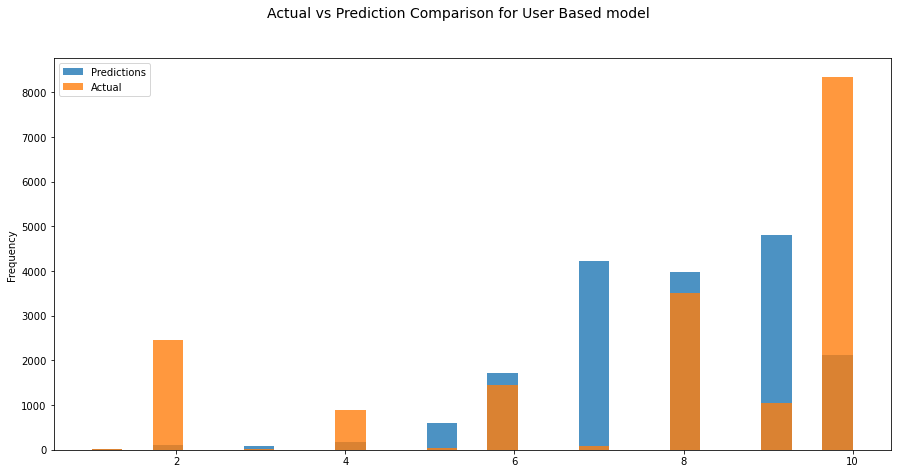

In [79]:
fig, ax = plt.subplots(figsize = (15, 7.2))
fig.suptitle('Actual vs Prediction Comparison for User Based model', fontsize = 14)
df_user['EstRating'].plot.hist(bins = 25, alpha = 0.8)
df_user['ActualRating'].plot.hist(bins = 25, alpha = 0.8)
ax.legend(['Predictions', 'Actual'])
plt.show()

* ## User-Based model:
    * The model has not predcitd any rating for actual rating of 1 
    * The distribution of the acutal rating for 2 is greater than the distribution of the predicted rating for 2. It performs poorly in these rating ranges of 1 and 2
    * The distribution of actual rating for 3 almost matches the distribution of predicted rating for 3.
    * The distribution of actual rating for 4 is more than the distribution of predicted rating for 4. The model is not very good at predicting rating 4
    * The distribution of the predicted rating for 5 is greater than the distribution of the actual rating for 5. The model is not very good at predicting rating 5
    * The distribution of the predicted rating for 6 is slightly greater than the distribution of the actual rating for 6. The model is performing good for rating 6
    * The distribution of the predicted rating for 7 is far greater than the distribution of the actual rating for 7. The model performance is not good for rating 7
    * The distribution of the predicted rating for 8 is slightly greater than the distribution of the actual rating of 8. The model performs good for rating 8.
    * The distribution of the predicted rating for 9 is very much greater than the distribution of the actual rating of 9. The model performs bad for rating 9.
    * The distribution of the predicted rating for 10 is very less than the distribution of the actual rating of 10. The model performs poorly for rating 10

# Item-Based model

In [80]:
# creating and fitting the object of KNN with item based

item_item = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
item_item.fit(train_sur)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [81]:
# saving the predictions

prediction_item = item_item.test(test_sur)

In [82]:
print("The RMSE of Item-item Collaborative Filtering Model",accuracy.rmse(prediction_item,verbose = False))

The RMSE of Item-item Collaborative Filtering Model 2.729483329846986


In [83]:
for username, productname, truerating, predictedrating, _ in prediction_item:
    print("The predicted rating for user",username,"for product",productname,'is',predictedrating,'\n')

The predicted rating for user einem Kunden for product ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 5.1 Lollipop, 13,0 Megapixel is 8.56 

The predicted rating for user Cliente Amazon for product Alcatel One Touch Pop 3 (5) Smartphone, Dual SIM, Display 5' Pollici, 8 GB Memoria interna, 1Gb RAM, Fotocamera da 5 Megapixel con autofocus e flash LED, Android 5.1 Lollipop, Nero/Pelle [Italia] is 6.971344633980123 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Владимир for product Samsung S5570 Galaxy Mini is 8.61586586682279 

The predicted rating for user Amazon Customer for product Vodafone Smart First 6 Pay As You Go Handset Smartphone - Black is 6.386378220612305 

The predicted rating for user Amazon Customer for product Samsung Galaxy Note 4 Smartphone (5,7 Zoll (14,5 cm) Touch-Display, 32 GB Speicher, Android 4.4) schwarz is 7.460990297244824 

The predicted rating for 


The predicted rating for user Amazon Customer for product Lenovo A7000 (Black) is 6.359999999999999 

The predicted rating for user Amazon Customer for product BLU Vivo XL Smartphone - 5.5" 4G LTE - GSM Unlocked - Solid Gold is 7.799999999999999 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max Prime (Gold, 128GB) is 7.8 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.96 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia] is 7.639999999999999 

The predicted rating for user Client d'Amazon for product Honor 8 Smartphone débloqué 4G (Ecran: 5,2 pouces - 32 Go - Double Nano-SIM - Android 6.0) Blanc Nacré is 9.4 

The predicted rating for user Qantas for product HTC Windows Phone 8X is 9.166666666666666 

The predicted rating for user Daniel for p

The predicted rating for user Анастасия for product Sony Xperia J (черный) is 8.442469377108113 

The predicted rating for user Cliente Amazon for product Samsung G900 Galaxy S5 Smartphone, 16 GB, Nero [Italia] is 6.65994241032772 

The predicted rating for user Giovanni for product Asus ZE551ML-2A760WW Smartphone ZenFone 2 Deluxe, 5.5", 4 GB RAM, 64 GB, Intel Quad-Core Z3580, Dual SIM, Illusion Purple is 8.815504524894296 

The predicted rating for user Cliente Amazon for product DOOGEE X5 3G MTK6580 Smartphone Quad Core 5.0 "Android HD IPS 5.1 1G + 8G 5MP 8MP doppia delle macchine fotografiche di Smart Gesture is 7.754487632629637 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL (White, 2GB, 16GB) is 7.166557162264049 

The predicted rating for user Amazon Customer for product Apple iPhone 5s T-Mobile Cellphone, 16GB, Space Gray is 6.458974358732755 

The predicted rating for user Amazon Kunde for product Microsoft Nokia X7 Smartphone(10,2 cm (4 Zo

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.96 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J3 SM-J320M is 9.0 

The predicted rating for user Mark for product HTC Desire S Smartphone (9,4 cm (3,7 Zoll) Display, Touchscreen, 5 Megapixel Kamera, Android OS) muted black is 8.284665840574768 

The predicted rating for user john for product LG G2 Mini D620R Unlocked Cellphone, International Version, 8GB, Black is 10 

The predicted rating for user Alex for product Sim Free Motorola Moto G4 Play- Black is 9.282878438843893 

The predicted rating for user e-bit for product Smartphone LG G3 D855 is 9.04 

The predicted rating for user Mark for product Samsung Verizon Samsung Alias 2 U750 No Contract 3G MP3 Cell Phone Black is 7.836707812945263 

The predicted rating for user Cliente Amazon for product Asus ZenFone 2 Smartphone, Schermo da 5.5" Full HD, Processore Quad Core 2,3 GHz, RAM 4 GB, 32 GB, 4G/LTE, Rosso is

The predicted rating for user Cliente Amazon for product Samsung Galaxy J5 Smartphone, Oro [Italia] is 8.854922660776127 

The predicted rating for user Cliente Amazon for product Samsung Galaxy A5 2016 Smartphone LTE, 16GB, Nero is 9.060068834385593 

The predicted rating for user Amazon Customer for product Apple iPhone 6s (Silver, 64GB) is 7.833925154620128 

The predicted rating for user Anonymous for product LG enV Touch is 6.565876923639904 

The predicted rating for user Brian for product MICROSOFT Lumia 650 - 16 GB, Black is 8.973738497402106 

The predicted rating for user e-bit for product Smartphone Motorola Moto G 4 Play XT1603 is 9.08 

The predicted rating for user Amazon Customer for product Lenovo A1000 (Black) is 4.92 

The predicted rating for user Flipkart Customer for product SAMSUNG Galaxy On7 (Black, 8 GB) is 7.54993257274742 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J7 SM-J700M is 9.36 

The predicted rating for user Luca for pro

The predicted rating for user e-bit for product Apple iPhone 6 16GB is 9.802679483891417 

The predicted rating for user anonimo for product Meizu M3S 16GB Plata libre is 9.30721514757003 

The predicted rating for user Amazon Customer for product Lenovo Motorola Milestone Smartphone (QWERTZ, Android, 5MP Kamera) black is 7.027340031204593 

The predicted rating for user Amazon Customer for product Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Space Gray is 6.5600000000000005 

The predicted rating for user Amazon Kunde for product Microsoft Nokia 3310 Handy is 9.57639937301883 

The predicted rating for user Peter for product Sony Ericsson Cedar Handy (UMTS, HSDPA, 2MP, 3.5mm Klinkenstecker, Micro-USB Anschluss) schwarz/silber is 9.055730226631729 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 7.279999999999999 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76

The predicted rating for user Amazon Customer for product Lenovo K6 Note (Gold) is 5.220108995960831 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey) is 6.920000000000001 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.96 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S4 Mini GT-I9192 is 9.12 

The predicted rating for user Jeff for product DOOGEE X5 Max Pro 5.0'' IPS 4G Smartphone Android 6.0 Marshmallow Quad Core 1.3GHz Mobile Phone 2GB RAM 16GB ROM Smart Wake Air Gestures Fingerprint with 4000mAh battery Dual ID GPS Wifi (White) is 7.198219099881787 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 No Contract Phone, 16GB ROM / 2GB RAM, 5.5 Inch - White - (Boost Mobile) is 8.464273139620772 

The predicted rating for user Amazon Customer for product Lenovo Zuk Z1 (White, Cyanogen OS) is 4.56 

The predicted rating for user Amazon Customer for produc

The predicted rating for user Cliente Amazon for product WIKO Fever 4G Smartphone, 16 GB, Dual SIM, Nero/Antracite is 8.451125976214495 

The predicted rating for user Flipkart Customer for product Lenovo VIBE P1m (White, 16 GB) is 7.796291020921075 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.32 

The predicted rating for user Anonymous for product LG RUMOR is 4.766167139538719 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 8.0 

The predicted rating for user Angel for product Huawei Ascend Y530 - Smartphone libre Android (pantalla 4.5", cámara 5 Mp, 4 GB, Dual-Core 1.2 GHz, 512 MB RAM), blanco is 8.384615384615385 

The predicted rating for user Amazon Customer for product Micromax Canvas Nitro 4G E455 (Black) is 4.742366590730805 

The predicted rating for user Alex for product Sony Ericsson Xperia mini pro Smartphone (7,6 cm (3 Zoll) Displ

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 6.96 

The predicted rating for user alex for product Samsung Galaxy S4 mini (I9190) is 7.138461538461538 

The predicted rating for user Amazon Customer for product HTC Desire C Smartphone (8,9 cm (3,5 Zoll) HVGA-Touchscreen, 5 Megapixel Kamera, 600MHz, 512MB RAM, 4GB Speicher, Android 4.0 OS) Stealth Black is 7.204185442056187 

The predicted rating for user Client d'Amazon for product Wiko Lenny3 Smartphone débloqué H+ (Ecran: 5 pouces - 16 Go - Double SIM-Micro - Android) Rouge is 7.232976133554545 

The predicted rating for user Владислав for product Apple iPhone 5s 16GB (серебристый) is 9.608914641026393 

The predicted rating for user francesco for product Asus ZenFone 2 Smartphone, 64 GB, Blu Fusion [Italia] is 9.769853497475077 

The predicted rating for user Amazon Customer for product OnePlus X (Onyx, 16GB) is 7.08 

The predicted rating for user Amazon Customer for product Lenov

The predicted rating for user kuzeykizi for product Nokia 6300 Cep Telefonu is 9.0 

The predicted rating for user e-bit for product Smartphone Motorola Moto G 4 Play XT1603 is 9.08 

The predicted rating for user Amazon Customer for product Mi 4i (Grey, 16GB) is 6.84 

The predicted rating for user Cliente Amazon for product Lenovo Motorola Moto G4 - Smartphone libre Android 6 (pantalla de 5.5'' Full HD, 4G, cámara de 13 MP, 2 GB de RAM, 16 GB, Qualcomm Snapdragon 1.5 GHz), color negro is 8.36 

The predicted rating for user Anonymous for product LG RUMOR is 4.766167139538719 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Space Grey, 16GB) is 6.922095057419337 

The predicted rating for user Игорь for product Lenovo A1000 (белый) is 8.42146057593961 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The 

The predicted rating for user einem Kunden for product ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 5.1 Lollipop, 13,0 Megapixel is 8.56 

The predicted rating for user einem Kunden for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.68 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user unknown for product HUAWEI ASCEND P9 LITE BLACK is 9.562287340375446 

The predicted rating for user Rob for product Samsung Galaxy J5 2016 Sim Free Mobile Phone - White is 10 

The predicted rating for user Amazon Customer for product Samsung Note 4 Standard Li-ion Battery 3220mAh for Galaxy Note 4 - Non-Retail Packaging is 5.4800912990610815 

The predicted rating for user Amazon Customer for product Samsung Guru GT-E1200 (White) is 7.4399999999999995 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 8.0 



The predicted rating for user Amazon Customer for product Apple iPhone 5c GSM Unlocked Cellphone, 16GB, Pink is 6.234420384247733 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J7 SM-J700M is 9.36 

The predicted rating for user Amazon Customer for product Motorola Moto X Play UK SIM-Free Smartphone - Black is 8.199919040079614 

The predicted rating for user Cliente Amazon for product WIKO Fever 4G Smartphone, 16 GB, Dual SIM, Nero/Antracite is 8.451125976214495 

The predicted rating for user Federico for product Sony Xperia Z1 Compact D5503 Android Smartphone (Black) International Version No Warranty is 7.455150702370585 

The predicted rating for user Amazon Customer for product Apple iPhone SE (Gold, 16GB) is 6.4 

The predicted rating for user Cliente Amazon for product HOMTOM HT7 3G WCDMA 5.5 "IPS smartphone Android 5.1 OS Quad Core MTK6580A is 7.708776615191734 

The predicted rating for user Евгения for product LG K7 (черный) is 9.298587445738997 


The predicted rating for user Anonymous  for product Samsung Galaxy S7 active 32GB (AT&T) is 9.0 

The predicted rating for user antonio for product Apple iPhone 5s 16GB 4G Oro is 7.827677704263294 

The predicted rating for user Amazon Customer for product HTC Desire Eye E1 16GB White/Red. GSM Unlocked. US Version (13MP Front & Rear Camera) is 6.775338475930344 

The predicted rating for user Amazon Kunde for product Samsung Galaxy J5 DUOS Smartphone (13,2 cm (5,2 Zoll) Touch-Display, 16 GB Speicher, Android 6.0) weiß is 8.227291649019302 

The predicted rating for user Amazon Customer for product Sprint Samsung Galaxy S5 White 16GB (Sprint Prepaid) is 9.793830953068623 

The predicted rating for user Amazon Customer for product Nokia Lumia 520 GSM Unlock 3G Phone, 4-Inch Touch Screen, 5MP 720P Camera, Windows Phone (Black) is 7.384536275444031 

The predicted rating for user Amazon Customer for product Apple iPhone 4 Verizon Cellphone, 8GB, White is 7.187879383494215 

The predicted 

The predicted rating for user Гость for product Nokia 5530 XpressMusic is 7.778095694243452 

The predicted rating for user Client d'Amazon for product Honor 7 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Double Nano SIM - Android 5.0 Lollipop) Gris/Noir is 8.24 

The predicted rating for user Amazon Customer for product Apple 16GB Sim Free iPhone 5 - White is 6.721914276874719 

The predicted rating for user Amazon Kunde for product Huawei Mate S is 9.9708886971397 

The predicted rating for user Amazon Customer for product Samsung Galaxy S4, Black Mist 16GB (Verizon Wireless) is 6.600278392940391 

The predicted rating for user einem Kunden for product Sony Xperia E5 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.167937239520988 

The predicted rating for user Виктор for product Sony Xperia SP (белый) is 8.721538130852608 

The predicted rating for user Amazon Customer for product Samsung Galaxy S7 Edge Duos SM-G935FD 32GB Dual SIM Factory Unloc

The predicted rating for user Cliente Amazon for product Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco is 8.6 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 6.76 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Amazon Customer for product Lenovo A1000 (Black) is 4.92 

The predicted rating for user Amazon Customer for product Sony Xperia Z3+ (Aqua Green, 32GB) is 6.347457351436701 

The predicted rating for user ???????????? for product Sony Xperia V (?????�??????) is 9.190477609218622 

The predicted rating for user Andreas for product LG Electronics G Flex 2 Smartphone (13,97 cm (5,5 Zoll) Full-HD-POLED-Display, Qualcomm Snapdragon 810 2-GHz-Octa-Core-Prozessor, 13-Megapix

The predicted rating for user Daniel for product Sony Ericsson Xperia ray Smartphone (8,4 cm (3,3 Zoll) Display, Touchscreen, 8 MP Kamera, Android 2.3 OS) schwarz is 9.91682268774516 

The predicted rating for user Cliente Amazon for product Samsung Galaxy J5 Smartphone, Oro [Italia] is 8.854922660776127 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Cliente Amazon for product Elephone P6000 Pro - Smartphone libre Android (pantalla 5", cámara 13 Mp, 16 GB, Octa-Core 1.3 GHz, 3 GB RAM), color negro is 6.846026665485622 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 8.0 

The predicted rating for user Amazon Customer for product Micromax Canvas Knight 2 E471 (White-Champagne, 16GB) is 7.262238315537583 

The predicted rating for user Cliente Amazon for product Samsung Galaxy A5 - Smartphone libre Android (pantalla 5", cámara 13 Mp, 16 GB, Quad

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J3 SM-J320M is 9.0 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 8GB) is 7.999999999999999 

The predicted rating for user Cliente Amazon for product Lenovo Motorola Moto G4 - Smartphone libre Android 6 (pantalla de 5.5'' Full HD, 4G, cámara de 13 MP, 2 GB de RAM, 16 GB, Qualcomm Snapdragon 1.5 GHz), color negro is 8.36 

The predicted rating for user Cliente Amazon for product LG G3 8806084954985 4G 16GB Black smartphone - smartphones (2560 x 1440 pixels, Multi-touch, Capacitive, Qualcomm... is 6.727202852103544 

The predicted rating for user Amazon Customer for product Nokia Lumia 520 UK Sim Free Smartphone - Red is 8.144013424349346 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey) is 6.920000000000001 

The predicted rating for user Cliente Amazon for product Meizu M2 Note - Smartphone libre Flyme (pantalla de 5.5", cámara d

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Luigi for product Meizu M2 Note Smartphone, 5.5" Full HD, 4G, 13MPX, Dual SIM, 16GB, Bianco [EU] is 7.56382566745577 

The predicted rating for user ?????�?????? for product Sony Xperia S LT26i is 9.407323658776859 

The predicted rating for user Ryan for product ZTE Warp Android Smartphone (Boost Mobile) is 4.920435252538349 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product Mi 4i (Grey, 16GB) is 6.84 

The predicted rating for user Евгения for product LG X power (белый) is 9.109201711821623 

The predicted rating for user Andrew for product Samsung Galaxy Note I717 16GB 4G LTE GSM Android Phone - Carbon Blue (AT&T version) is 7.485701316934886 

The predicted rating for user e-bit for product Smartphone Motorola Moto E 2ª Geração XT1514 16GB is 9


The predicted rating for user Amazon Customer for product Motorola Moto G 4G SIM-Free Smartphone - Black (8GB) - Discontinued by manufacturer is 8.564107673714355 

The predicted rating for user Дмитрий for product Samsung S7270 Galaxy Ace 3 (белый) is 9.77433642307514 

The predicted rating for user e-bit for product Celular Motorola EX115 is 7.2 

The predicted rating for user UK Guest for product Sony Ericsson K300i is 7.998588393936078 

The predicted rating for user Anonymous  for product Samsung Galaxy S5 16GB (T-Mobile) is 9.222222222222221 

The predicted rating for user unknown for product Samsung Samsung Galaxy A5 2016 - Wit is 9.70106537316906 

The predicted rating for user Francisco for product Desconocido Xiaomi RedMi Note 4G LTE - Smartphone libre Android (pantalla 5.5", cámara 13 Mp, 8 GB, Quad-Core 1.2 GHz, 1 GB RAM), blanco is 6.071551430047311 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.92 

The pred

The predicted rating for user Amazon Customer for product Lenovo Vibe P1 Turbo (Grey) is 7.146014196167567 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.32 

The predicted rating for user Anonymous for product Nokia N900 Black Unlocked 3G GSM Smart Phone/ Mobile Computer With Maemo Operating System is 9.447218383015773 

The predicted rating for user Client d'Amazon for product Buyus Coque Gel 360 Protection INTEGRAL Transparent INVISIBLE Samsung Galaxy A3 (2016) SM-A310F + Stylet + 3 Films OFFERTS is 7.529772835153585 

The predicted rating for user Anonymous for product Samsung Instinct is 6.922204270475436 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.96 

The predicted rating for user Amazon Customer for product Apple iPhone 6s (Gold, 64GB) is 8.044689613747888 

The predicted rating for user einem Kunden for product Apple iPhone 7 4,7" 256 GB is 9.785853277232935 

The p

The predicted rating for user Павел for product Сотовый телефон Asus ZenFone 2 is 8.9314578768306 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max Prime (Gold, 128GB) is 7.8 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime TV SM-G530 is 8.8 

The predicted rating for user Amazon Customer for product OnePlus X (Onyx, 16GB) is 7.08 

The predicted rating for user Client d'Amazon for product Samsung Galaxy S5 16GB SM-G900H-BK Unlocked Smartphone Import-Black is 6.779613622676665 

The predicted rating for user Cliente Amazon for product Huawei P9 Lite Smartphone, 5.2" Full hd, 3 GB RAM, 16 GB, Nero, Garanzia Europa is 8.96704714933809 

The predicted rating for user Simone for product Asus ZenFone 2 Smartphone 5 pollici, RAM 2 GB, 8 GB, 4G/LTE, Nero is 9.1536297694267 

The predicted rating for user Amazon Kunde for product Blackberry PRIV STV100-4 Smartphone (13,7 cm (5,4 Zoll) Display, 32GB Speicher, 18 Megapixel, Android


The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 8.24 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J7 SM-J700M is 9.36 

The predicted rating for user Anonyme for product NOKIA 2720 Fold is 9.0 

The predicted rating for user Client d'Amazon for product Samsung GT S5830i Galaxy Ace Smartphone GSM/EDGE/3G Bluetooth GPS Noir (import Europe) is 3.974730875368204 

The predicted rating for user Amazon Customer for product Lenovo A7000 (Black) is 6.359999999999999 

The predicted rating for user Amazon Customer for product Samsung Galaxy J2 6 4G DUOS SM-J210FZDDINS (Gold, 8GB) is 6.674664239832585 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.92 

The predicted rating for user Anonymous  for product Samsung Galaxy S7 32GB (Sprint) is 9.311957826589405 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE 

The predicted rating for user Alberto for product Lenovo Motorola Moto G 4G 3 Generazione Smartphone, Display 5", Fotocamera 13 MP, Memoria 16 GB, Android 6 Lollipop, Nero [Italia] is 8.288208065848824 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.64 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 8.04 

The predicted rating for user Massimo for product Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania] is 9.142230524100176 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J7 Prime SM-G610M is 8.96 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.840000000000002 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Cliente Amazon for product 

The predicted rating for user Никита for product Sony Xperia SP (белый) is 9.756841342707588 

The predicted rating for user e-bit for product Smartphone LG G3 D855 is 9.04 

The predicted rating for user Richard for product Samsung Galaxy S7 goud, roze / 32 GB is 7.741525674949044 

The predicted rating for user carlos for product Smartphone Samsung Galaxy A5 SM-A510M is 6.535733948506046 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime TV SM-G530 is 8.8 

The predicted rating for user Amazon Customer for product Asus ZenFone 3 Laser 5.5-inch Glacier Silver [ZC551KL] Laser auto-focus, 13MP Rear / 8MP Front camera, IPS FHD display, 2GB RAM, 32GB storage is 7.56136594609755 

The predicted rating for user Matteo for product Asus ZenFone 3 Smartphone, Display da 5.2", Memoria Interna da 64 GB, 4 GB RAM, Dual-SIM, Nero [Italia] is 9.245030659400253 



The predicted rating for user Amazon Customer for product Micromax Sliver 5 Q450 (Black) is 7.4242426147486285 

The predicted rating for user Stefano for product Motorola Moto X Smartphone, 4,7 pollici display AMOLED, memoria 16GB, RAM 2GB, fotocamera 10 MP, Android 4.4, Bianco [Francia] is 9.526432694722063 

The predicted rating for user Mary for product HUAWEI P9 Lite - 16 GB, Black is 8.903511149285908 

The predicted rating for user e-bit for product Celular Motorola EX115 is 7.2 

The predicted rating for user Cliente Amazon for product Cubot Note S 3G Smartphone - 5.5" pollici IPS HD Screen Android 5.1 MT6580 Quad Core 1.3GHz 2GB RAM+16GB ROM Dual SIM HotKnot WiFi Cellulare (Nero) is 8.663230711401562 

The predicted rating for user Amazon Customer for product Nokia Lumia 630 UK SIM-Free Smartphone - Green (Windows, 4.5-inch, 8GB) is 8.584025191863862 

The predicted rating for user Антон for product Sony Xperia J (черный) is 8.21197634972023 

The predicted rating for user Ama

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for user Евгений for product LG K10 (темно-синий) is 9.145223601240533 

The predicted rating for user zehrabalta for product Samsung innov8 (i8510) Cep Telefonu is 9.0 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.96 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime TV SM-G530 is 8.8 

The predicted rating for user Юлия for product Samsung I8190 Galaxy S III mini 8GB (белый) is 8.434011021979735 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Anônimo for product Samsung Galaxy S III Mini Desbloqueado Vivo Metallic Blue Android Tela 4 Câmera 5MP 3G Wi-Fi Memória Interna 8GB is 9.404634094947475 

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB 

The predicted rating for user Cliente Amazon for product Apple iPhone 5S 16GB Grigio [Italia] is 8.052897645580138 

The predicted rating for user Luca for product Asus ZenFone 2 Laser 5.5" Smartphone, 16 GB, Dual SIM, Nero [Italia] is 5.3619902215123645 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted rating for user Андрей for product Sony Xperia SP (белый) is 6.910276332246164 

The predicted rating for user Amazon Customer for product LG Lucid 4G VS840 Verizon CDMA Cellphone, 8GB, Black is 5.3218207639081765 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user zehrabalta for product Nokia N73 Cep Telefonu is 9.0 

The predicted rating for user e-bit for product Smartphone LG G3 D855 is 9.04 

The predicted rating for user Chris for product Lenovo Motorola Defy+ Smartphone (9,3 cm (3,7 Zoll) Display, Touchscreen, 5 Megapixel Kamera, Androi

The predicted rating for user Andreas for product Sony Xperia Z3 Compact is 2.0 

The predicted rating for user Amazon Customer for product Lenovo A6000 (White, 8GB) is 6.28 

The predicted rating for user Amazon Customer for product ZTE Axon 7 Unlocked Smartphone,64GB Ion Gold (US Warranty) is 8.787545804038837 

The predicted rating for user Amazon Customer for product Huawei Honor 5X (Grey, 16GB) is 7.68 

The predicted rating for user Anonymous  for product Samsung Galaxy S6 32GB (Cricket) is 7.993316535852796 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J7 SM-J700M is 9.36 

The predicted rating for user Amazon Customer for product Apple iPhone 5C 8GB Factory Unlocked GSM Cell Phone - Blue is 6.630765281202738 

The predicted rating for user Amazon Customer for product Mi 4i (Grey, 16GB) is 6.84 

The predicted rating for user Елена for product Samsung Galaxy S4 GT-I9500 16GB (белый) is 8.642948369182331 

The predicted rating for user Cliente Amazon

The predicted rating for user einer Kundin for product Huawei P9 Lite Dual-SIM Smartphone, 13,2 cm (5,2 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.6 

The predicted rating for user Amazon Customer for product Huawei Nexus 6P (Matte Gold, 64GB) is 8.328326187329244 

The predicted rating for user Giorgio for product Nokia Asha 210 Smartphone Dual SIM, Nero [Italia] is 6.544214033488942 

The predicted rating for user Amazon Kunde for product Lenovo Moto X Play Smartphone (13,9 cm (5,5 Zoll) Display, 16 GB Speicher, Android 5.1) weiß is 8.99679595149419 

The predicted rating for user Cliente Amazon for product Asus ZE551ML-2A760WW Smartphone ZenFone 2 Deluxe, 5.5", 4 GB RAM, 64 GB, Intel Quad-Core Z3580, Dual SIM, Illusion Purple is 9.24 

The predicted rating for user ?????????? for product Samsung i8160 Galaxy Ace 2 is 8.928310961305003 

The predicted rating for user Cliente Amazon for product Doogee X5 - Smartphone Libre 3G Android 5.1 (Quad Core, 5.0" IPS 1280*720 HD, 

The predicted rating for user Maurizio for product Samsung G925 Galaxy S6 edge Smartphone, 32 GB, Nero [Italia] is 8.331324022812863 

The predicted rating for user Amazon Customer for product Lenovo A7000 (Black) is 6.359999999999999 

The predicted rating for user Игорь for product Sony Xperia SP (красный) is 9.244894232329294 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Luca for product HTC One Smartphone, Display 4.7 Pollici, Fotocamera Ultrapixel, 32 GB, Processore Quad Core da 1.7 GHz, 2 GB RAM... is 8.643673281646722 

The predicted rating for user Sabrina for product Microsoft Lumia 930 Smartphone (5 Zoll (12,7 cm) Touch-Display, 32 GB Speicher, Windows 8.1) weiß is 8.812797206491258 

The predicted rating for user Amazon Customer for product Samsung Galaxy J2 4G DUOS (Gold, 8GB) is 6.84 


The predicted rating for user Евгений for product Samsung S5570 Galaxy Mini is 9.248270475750553 

The predicted rating for user Anthony for product Apple iPhone 5s AT&T Cellphone, 16GB, Silver is 6.195201226364452 

The predicted rating for user Amazon Customer for product Sony Xperia XA Dual (Lime Gold) is 6.48 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 16GB) is 6.159999999999999 

The predicted rating for user Anonymous for product LG Dare is 8.727553886243353 

The predicted rating for user einem Kunden for product Apple iPhone 6s Plus 5,5" 128 GB is 9.721695715032183 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Kunde for product Doogee X5 5.0 Zoll HD Smartphone Android 5.1 3G WCDMA MTK6580 Quad Core ROM 1G RAM 8G 5MP 8MP Doppelkameras is 7.337016347509833 

The predicted rating for user Татьяна for product LG X power (индиго) is 8.92079662735

The predicted rating for user Client d'Amazon for product AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces) is 8.787874623803926 

The predicted rating for user Amazon Customer for product LG Optimus Slider Prepaid Android Phone (Virgin Mobile) is 8.794080100048468 

The predicted rating for user e-bit for product Smartphone Motorola Moto G 4 XT1626 is 9.08 

The predicted rating for user Amazon Kunde for product Emporia Elegance Handy (4,6 cm (1,8 Zoll), OLED Farbdisplay, ohne Branding) braun is 8.993579891774404 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 7.279999999999999 

The predicted rating for user Amazon Customer for product Honor 6X (Silver, 32GB) is 8.08 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.96 

The predicted rating fo

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Chris for product BenQ-Siemens S68 brushed aluminium Handy is 1.8201930001575128 

The predicted rating for user Marco for product Huawei Ascend G7 Smartphone, 16 GB, Argento is 8.479581696294696 

The predicted rating for user Cliente Amazon for product Huawei Nexus 6P - Smartphone de 5.7" (Amoled QHD, Qualcomm Snapdragon 810 1.5 GHz, 3 GB RAM, cámara de 13 MP/8 MP, memoria interna de 32 GB, Android 6.0), plateado is 7.754420920418584 

The predicted rating for user Amazon Customer for product Casio G'zOne C781 Ravine 2 Verizon Cell Phone / Rugged Flip Phone / Black is 8.104970609561049 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S7 SM-G930 32GB is 9.44 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.840000000000002 

The predicted rating for user Cliente Amazon for produ

The predicted rating for user Jorge for product BQ Aquaris E5 LTE - Smartphone libre Android (pantalla 5 pulgadas, cámara 13 Mp. 16 GB, Qualcomn Snapdragon 410 Quad-Core A53, 2 GB RAM), color negro is 8.18229411854827 

The predicted rating for user Alex for product Nokia 5800 is 8.788966521977173 

The predicted rating for user Amazon Customer for product Motorola Moto G 4G SIM-Free Smartphone - Black (8GB) - Discontinued by manufacturer is 8.564107673714355 

The predicted rating for user Tom for product Samsung Verizon or PagePlus amsung Haven U320 CDMA Cell Phone Dark Grey New No Contract is 8.970472390364645 

The predicted rating for user Вадим for product Sony Xperia ZR (черный) is 9.16672036899397 

The predicted rating for user Amazon Customer for product Lenovo Zuk Z1 (White, Cyanogen OS) is 4.56 

The predicted rating for user Carlos for product Smartphone Sony Xperia M Dual Branco com Tela 4", Dual Chip, Câmera 5MP, 3G, Android 4.1 e Processador Dual Core de 1GHz Snapdragon

The predicted rating for user Cliente Amazon for product WIKO Fever 4G Smartphone, 16 GB, Dual SIM, Bianco is 8.656813894734796 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Mary for product Samsung Galaxy Y is 10 

The predicted rating for user ?????????? for product HTC Desire C is 8.393068489799168 

The predicted rating for user Qantas for product Sony Xperia U is 9.0 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Vibe S1 (White, 32GB) is 6.8 

The predicted rating for user Артём for product Apple iPhone 5s 16GB (серебристый) is 9.648088333789984 

The predicted rating for user Cliente Amazon for product Asus ZenFone 2 Laser 5.5" Smartphone, 16 GB, Dual SIM, Nero [Italia] is 8.968740190483755 

The predicted rating for user Cliente Amazon for product Asus ZenFone 3

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user e-bit for product Smartphone Asus ZenFone 3 ZE520KL is 9.52 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (White, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product Motorola Moto E 4G 2nd Generation SIM-Free Smartphone - Black is 9.532448747807617 

The predicted rating for user Amazon Kunde for product Samsung Galaxy S III Neo Smartphone (4,8 Zoll (12,2 cm) Touch-Display, 16 GB Speicher, Android 4.4) schwarz is 7.643612276645314 

The predicted rating for user Amazon Customer for product Samsung Galaxy S7 Edge Factory Unlocked Phone 32 GB International Version (Black Onyx) is 7.44 

The predicted rating for user Amazon Customer for product Galaxy Samsung Galaxy Note 4 SM-N910T 4G LTE - 32GB - Charcoal Black (T-Mobile) is 7.1525936584982235 

The predicted rating for user Rahul for product 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user massimo for product Samsung Galaxy J5 Smartphone, Oro [Italia] is 9.211560398503506 

The predicted rating for user e-bit for product Celular Nokia C2-01 is 7.28 

The predicted rating for user Amazon Customer for product Nokia 105 (Black) is 6.76 

The predicted rating for user Amazon Customer for product Nokia 230 Dual Sim (Dark Silver) is 7.24 

The predicted rating for user david for product Nokia 105 SIM-Free Mobile Phone, Black is 9.328185135194866 

The predicted rating for user Barbara for product Samsung Convoy 3, Gray (Verizon Wireless) is 7.8656730354425655 

The predicted rating for user Carlos for product Smartphone LG Optimus L5 II Dual E455 Preto com Dual Chip, Tela de 4”, Android 4.1, Câmera 5MP, 3G, Wi-Fi, aGPS, Bluetooth e FM/MP3 - Tim is 1

The predicted rating for user Amazon Customer for product Apple iPhone 7 Unlocked Phone 32 GB - US Version (Gold) is 6.464907522026808 

The predicted rating for user Amazon Customer for product Huawei P9 lite Smartphone VNS-L31 (5,2 Zoll) Touch-Display, 16 GB interner Speicher, 3GB RAM, Android 6) schwarz is 7.916372260406342 

The predicted rating for user Cliente Amazon for product Samsung Galaxy S7 Smartphone, 32 GB, Nero is 8.206118784962207 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 7.359999999999999 

The predicted rating for user einer Kundin for product Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G) is 9.64 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 8.0 

The predicted rating for user Amazon Customer for product Samsung Galaxy Note 4, Charcoal Black 32GB (Verizon Wireless) is 7.92 

The predicted rating for us

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user e-bit for product Smartphone Asus ZenFone 3 ZE552KL is 9.72 

The predicted rating for user Amazon Customer for product Samsung Galaxy S4 GT-I9500 (White Frost, 16GB) is 7.81281225250129 

The predicted rating for user Amazon Customer for product Lenovo Vibe Shot (Grey 32GB) is 7.11641553087923 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation LTE UK SIM-Free Smartphone - White is 8.948609734240097 

The predicted rating for user Michael for product Microsoft Lumia 640 XL Dual-SIM LTE Smartphone (14,5 cm (5,7 Zoll) HD-LCD-Display, 1,2-GHz-Quad-Core-Prozessor, 13 Megapixel-Kamera, 3000 mAh Akku, 3G & 4G LTE, Dual-SIM, Windows Phone 8.1) schwarz is 8.19463317373001 

The predicted rating for user Amazon Customer for product Motorola - MOTO G 2nd Gen XT1068 Unlocked GSM Dual-SIM Quad-Core Phone-White is 7.8675913634198

The predicted rating for user Amazon Customer for product Samsung Galaxy S6 Edge Plus SM-G928c 32GB Factory Unlocked White is 7.355626791416426 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.64 

The predicted rating for user Amazon Customer for product Motorola Moto X (2nd generation) Unlocked Cellphone, 16GB, Black Soft Touch is 8.505909831978418 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max Prime (Gold, 128GB) is 7.8 

The predicted rating for user Maria for product Cubot X9 Smartphone, 3G WCDMA con Dual SIM y GPS, Octa Core; Ultra Fino; pantalla de 5 pulgadas, con 1280 * 720 píxeles; SO de Android 4.4, KitKat MTK6592, cámaras duales 13 MP/8MP; 2 GB RAM/16GB ROM is 7.133404888322483 

The predicted rating for user miatamania for product Nokia 5630 XpressMusic is 8.950067803770361 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for

The predicted rating for user Юлия for product Samsung N7100 Galaxy Note II 16GB (серый) is 9.750105364103474 

The predicted rating for user Client d'Amazon for product Honor 8 Smartphone débloqué 4G (Ecran: 5,2 pouces - 32 Go - Double Nano-SIM - Android 6.0) Blanc Nacré is 9.4 

The predicted rating for user Amazon Customer for product OPPO Digital F1 Plus (Gold, 4GB) is 7.66445844551703 

The predicted rating for user Anonymous  for product Samsung Galaxy S7 edge 32GB (AT&T) is 9.591647736006749 

The predicted rating for user Amazon Kunde for product Sony Xperia Z5 Smartphone (5,2 Zoll (13,2 cm) Touch-Display, 32 GB interner Speicher, Android 5.1) grün is 6.513742175848094 

The predicted rating for user Анастасия for product Sony Xperia SP (белый) is 8.95635258341453 

The predicted rating for user Amazon Customer for product HTC DROID INCREDIBLE ADR 6300 3G Android Phone Black (Verizon Wireless) is 6.800656017481288 

The predicted rating for user Amazon Customer for product HTC 

The predicted rating for user Cliente Amazon for product BQ Aquaris X5 - Smartphone de 5" (WiFi, 2 GB de RAM, memoria interna de 16 GB, cámara 13 MP, Android 5.1) negro y gris antracito - Reacondicionado oficial is 7.68 

The predicted rating for user einer Kundin for product Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G) is 9.64 

The predicted rating for user e-bit for product Celular LG T375 is 7.996499696901783 

The predicted rating for user Amazon Customer for product LG Nexus 5X Unlocked Smartphone with 5.2-Inch 32GB H790 4G LTE (Carbon Black) is 7.624009752245601 

The predicted rating for user Jose for product Nokia 700 is 8.235294117647058 

The predicted rating for user Anonymous for product Nokia C2-01.5 Unlocked GSM Phone with 3.2 MP Camera and Music and Video Player--U.S. Version with Warranty (Black) is 9.5 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.32 


The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.28 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.840000000000002 

The predicted rating for user Tim for product Huawei P8 grijs / 16 GB is 8.947973910658677 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J7 Prime SM-G610M is 8.96 

The predicted rating for user e-bit for product Smartphone LG K10 K430TV is 8.88 

The predicted rating for user Александр for product Samsung Galaxy S5 SM-G900F 16GB (синий) is 8.484596913443825 

The predicted rating for user Misafir for product Samsung (936) S5230 Star is 9.0 

The predicted rating for user Amazon Customer for product Huawei Honor 5X (Silver) is 6.926012637555127 

The predicted rating for user e-bit for product Celular LG A275 is 8.636398466057775 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite Smartphone, Display 5" IPS, 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 Prime (Black, 16GB) is 8.257241976371386 

The predicted rating for user Pedro for product Nokia 3120 Classic is 7.830740989854829 

The predicted rating for user anonimo for product Meizu M3S 16GB Plata libre is 9.30721514757003 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 7.279999999999999 

The predicted rating for user Amazon Customer for product HTC Desire 620G Dual SIM (Milkyway Grey, 8GB) is 4.265625998924273 

The predicted rating for user Татьяна for product Samsung S6102 Galaxy Y Duos (черный, "Связной-Загрузка") is 8.34755818668663 

The predicted rating for user Claudia for product LG Volt Black (Boost Mobile) is 5.346314499143361 

The predicted rating for user Руслан for product Apple iPhone 5s 16GB (серебристый) is 9.825323131147638 

The predicted rating for user Руслан for product Sony Xperia Z (белый) is 9.73168904182423 

The predicted rat

The predicted rating for user Client d'Amazon for product Samsung Galaxy S6 Smartphone (5,1 Zoll (12,9 cm) Touch-Display, 128 GB Speicher, Android 5.0) gold (Nur für Europäische SIM-Karte) is 8.067864645306319 

The predicted rating for user Amazon Customer for product Honor 6X (Grey, 32GB) is 7.76 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Amazon Customer for product Apple iPhone 6s Plus Unlocked GSM 4G LTE Smartphone with 12MP Camera, 64 GB, Rose Gold is 8.391584480545665 

The predicted rating for user Amazon Customer for product Lenovo A1000 (Black) is 4.92 

The predicted rating for user Client d'Amazon for product Doogee X5 Smartphone Débloqué 5.0 Pouce 1280 x 720 HD Écran 1.3GHz Quad Core Android 5.1 Double SIM Double Caméra 5.0MP & 2.0MP GPS pour plupart Opérateur Europe - Blanc is 6.55782117397535 

The predicted rating for user Amazon Customer for product Lenovo A1000 (White) is 6.0 


The predicted rating for user Andy for product Lenovo Motorola Moto G (2nda Generación) - Smartphone libre Android (pantalla 5", cámara 8 Mp, 8 GB, Quad-Core 1.2 GHz, 1 GB RAM), blanco is 10 

The predicted rating for user Amazon Customer for product VIVO V5 (Crown gold, 32 GB) (4 GB RAM) is 6.96 

The predicted rating for user alessandro for product Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania] is 5.885533011055355 

The predicted rating for user e-bit for product Smartphone LG G3 D855 is 9.04 

The predicted rating for user Amazon Customer for product Casio G'zOne Commando C771 Verizon MIL-SPEC Rugged Android 5MP Cam Cell Phone is 6.491649268610415 

The predicted rating for user Amazon-Kunde for product LG Electronics KP100 Handy schwarz is 4.683693366207426 

The predicted rating for user Анна for product Xiaomi Mi4i 16GB (серый) is 9.365320271102334 

The predicted rating for use

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 8.24 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime TV SM-G530 is 8.8 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 16GB) is 6.159999999999999 

The predicted rating for user Amazon Customer for product Samsung Galaxy S6 64 GB UK SIM-Free Smartphone - Gold is 8.247057620028954 

The predicted rating for user Amazon Kunde for product Lenovo Motorola Moto E 2. Generation Smartphone mit 4G LTE (11,4 cm (4,5 Zoll) qHD-Touchscreen-Display mit 540 x 960 Pixel, 5 Megapixel Kamera, 1,2GHz Quad-Core-Prozessor, 1GB RAM, 8GB interner Speicher, Micro-SIM, Android 5 Lollipop) weiß is 7.320720941061496 

The predicted rating for user Игорь for product Apple iPhone 5s 16GB (серый космос) is 9.480754294496947 

The predicted rating for user David for product Asus ZenFone 2 Unlocked Cellphone , 64GB, Silver (U.S. War

The predicted rating for user Davide for product Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania] is 9.25540917875607 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.28 

The predicted rating for user Cliente Amazon for product Huawei Ascend Y5 Smartphone, Memoria RAM da 1 GB, Processore Qualcomm Snapdragon S210, Fotocamera 5 MP, Nero/Bianco, Marchio TIM is 7.907032381018815 

The predicted rating for user e-bit for product Smartphone LG G2 D805 is 9.44 

The predicted rating for user Cliente Amazon for product Samsung J320 Galaxy J3 (2016) Dual SIM 5", Quad Core, 8GB LTE, Nero [Italia] is 8.84 

The predicted rating for user Cliente Amazon for product Huawei Mate 8 Smartphone Dual SIM, Display da 6" Full HD, Fotocamera da 16 Megapixel, Argento is 9.490205306667352 

The predicted rating for user Андрей for product Sams

The predicted rating for user Cliente Amazon for product Samsung Galaxy S7 SM-G930F 32GB 4G - Smartphone (SIM única, Android, NanoSIM, GSM, HSPA+, LTE), Rosa is 8.155551183290944 

The predicted rating for user e-bit for product Smartphone Nokia Lumia 530 is 8.92 

The predicted rating for user Amazon Customer for product Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray is 5.8 

The predicted rating for user Client d'Amazon for product Honor 6X Smartphone portable débloqué 4G (Ecran: 5,5 pouces - 32 Go - Double Nano-SIM - Android 6.0 Marshmallow) Argent is 8.939095940057559 

The predicted rating for user Anonymous  for product Samsung Galaxy S7 edge 32GB (T-Mobile) is 9.524080650293634 

The predicted rating for user Client d'Amazon for product Lenovo K5 Smartphone débloqué (Ecran : 5 pouces - 16 Go - Double SIM - Android) Métal doré is 8.02929441205225 

The predicted rating for user Amazon Customer for product Lenovo S850 (White, 16GB) is 5.118705626057887 

The predicted r

The predicted rating for user Anonymous for product Nokia N82 is 3.9309817893537833 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey) is 6.920000000000001 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.96 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 16GB) - Android 7.0 Nougat Update Available Now is 7.12 

The predicted rating for user Amazon Customer for product Motorola Moto Z Play with Style Mod (Black, 32GB) is 8.4 

The predicted rating for user Anonyme for product Samsung S8000 Jet is 1.9928204864276682 

The predicted rating for user Amazon Customer for product Apple iPhone SE (Gold, 16GB) is 6.4 

The predicted rating for user Francisco for product Samsung Galaxy Y Duos S6102 - Smartphone libre (pantalla táctil de 3,14" 240 x 320, cámara 3.15 Mp, 160.0 MB, procesador de 832 MHz, 290 MB de RAM, dual SIM, S.O. Android 2.3), negro (importado) is 8.51832191

The predicted rating for user Client d'Amazon for product Samsung Galaxy S5 mini Smartphone débloqué 4.5 pouces 16 Go Android Noir (import Allemagne) is 6.446204354982169 

The predicted rating for user Client d'Amazon for product Samsung GT-C3590 Téléphone Portable Titanium Silver is 7.830740989854829 

The predicted rating for user Александр for product Мобильный телефон Caterpillar CAT B25 is 7.673154988999804 

The predicted rating for user Amazon Customer for product Huawei Ascend Y530 Smartphone (4,5 Zoll (11,4 cm) Touch-Display, 4 GB Speicher, Android 4.3) weiß is 7.428638895280846 

The predicted rating for user Mary for product Samsung Galaxy S6, Black Sapphire 32GB (Verizon Wireless) is 7.055256244251553 

The predicted rating for user Anônimo for product LG Smartphone Tri Chip LG Optimus L4 II Desbloqueado Branco Android 3G Wi-Fi Câmera Memória Interna 4GB TV Digital is 10 

The predicted rating for user Flipkart Customer for product SAMSUNG Galaxy J7 - 6 (New 2016 Edition) 

The predicted rating for user Amazon Customer for product VIVO Y55L (Gold) is 9.107132998713444 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey) is 6.920000000000001 

The predicted rating for user Sam for product Apple iPhone 6 Space Grau 128GB SIM-Free Smartphone (Zertifiziert und Generalüberholt) is 7.71172670071372 

The predicted rating for user Andreas for product Microsoft Lumia 640 Smartphone (5 Zoll (12,7 cm) Touch-Display, 8 GB Speicher, Windows 8.1) schwarz is 10 

The predicted rating for user Анастасия for product Samsung Galaxy A3 is 8.336154237079652 

The predicted rating for user miatamania for product Nokia N97 mini Cep Telefonu is 9.0 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.96 

The predicted rating for user Amazon Customer for product ivencase [2-Pack] Samsung Galaxy J3 (2016) S

The predicted rating for user Amazon Customer for product Samsung Galaxy S5 G900T T-Mobile Cellphone, 16GB, Shimmery White is 7.411175530762507 

The predicted rating for user einem Kunden for product Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G) is 9.28 

The predicted rating for user Francesco for product Samsung GT-S6310ZWNITV Galaxy Young, Bianco [Italia] is 8.543521430829191 

The predicted rating for user lahr2006 for product Samsung Galaxy Express I8730 is 9.18 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Claudia for product Samsung A300 Galaxy A3 Smartphone, 16 GB, Nero [Italia] is 9.149256929595518 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J3 SM-J320M is 9.0 

The predicted rating for user Марина for product Sony Xperia C (белый) is 8.861519324089777 

The predicted rating for user Amazon Customer for product Motorola Moto 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.96 

The predicted rating for user Андрей for product Nokia Lumia 920 White is 9.270083268381796 

The predicted rating for user Amazon Customer for product Apple iPhone 5 Unlocked Cellphone, 16GB, Black is 5.445404833511372 

The predicted rating for user Francesco for product Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia] is 9.242792199578558 

The predicted rating for user Amazon Customer for product Apple iPhone 4 Verizon Cellphone, 8GB, White is 7.187879383494215 

The predicted rating for user Amazon Customer for product blu VIVO 5R 4G LTE SIM-Free Smartphone (32 GB and 3 GB RAM) - Gold is 6.970639849814689 

The predicted rating for user Amazon Customer for product Microsoft Nokia 101 Dual-SIM Handy (4,6 cm (1,8 Zoll) TFT-Bildschirm, FM-Radio) rot is 8.191092211618288 

The predicted rating for

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S7 SM-G930 32GB is 9.44 

The predicted rating for user Antonio for product Motorola Moto G (3ª Generación) + Carcasa Oficial color turquesa - Smartphone libre Android 6 (4G, pantalla 5", cámara 13 Mp, 16 GB, Quad Core 1.4 GHz, 2 GB de RAM), negro is 7.337432421605637 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for user Client d'Amazon for product Samsung Galaxy S6 Smartphone débloqué 4G (5.1 pouces - 64 Go - Android 5.0 Lollipop) Noir (import Allemagne) is 8.0 

The predicted rating for user Елена for product Sony Xperia Z (белый) is 9.037860136483502 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.76 

The predicted rating for user Cliente Amazon for product Samsung Galaxy J5 - Smartphone libre Android (pantalla 5", cámara 13 Mp, 8 GB, Quad-Core 1.2 GHz, 

The predicted rating for user Luis for product Lenovo Motorola Moto G4 - Smartphone libre Android 6 (pantalla de 5.5'' Full HD, 4G, cámara de 13 MP, 2 GB de RAM, 16 GB, Qualcomm Snapdragon 1.5 GHz), color negro is 9.262616267234554 

The predicted rating for user carlos for product Samsung Galaxy Grand Neo Plus - Smartphone libre Android (pantalla 5", cámara 5 Mp, 8 GB, Quad-Core 1.2 GHz, 1 GB RAM), blanco (importado) is 8.781974877147604 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Amazon Customer for product OnePlus X (Onyx, 16GB) is 7.08 

The predicted rating for user david for product BlackBerry Z30 Factory Unlocked Black - 16GB is 7.977020767853848 

The predicted rating for user Сергей for product Sony Xperia Z (белый) is 8.80551326178914 

The predicted rating for user Amazon Customer for product Samsung Guru GT-E1200 (Indigo Blue) is 7.64 

The predicted rating for user Amazon Customer for produ

The predicted rating for user ?????????????? ?????????? for product Nokia 112 is 8.618436842498156 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.32 

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 6.96 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J7 Prime SM-G610M is 8.96 

The predicted rating for user e-bit for product Smartphone LG G2 D805 is 9.44 

The predicted rating for user Cliente Amazon for product Huawei Nexus 6P Smartphone, Display 5.7 Pollici, Memoria interna 32 GB, 3 GB da RAM, Fotocamera 12.3 MP, Android 6.0, Grigio is 9.447847836769151 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 8.04 

The predicted rating for user Client d'Amazon for product Sony Mobile Xperia M2 Smartphone débloqué 4G (Ecran: 4.8 pouces - 8 Go - Android 4.3 Jelly Bean) Noir is 6.320412199194564 

The predicted r

The predicted rating for user Сергей for product Sony Xperia Z1 Compact (черный) is 9.611971166109162 

The predicted rating for user Cliente Amazon for product Huawei Nexus 6P Smartphone, Display 5.7 Pollici, Memoria interna 32 GB, 3 GB da RAM, Fotocamera 12.3 MP, Android 6.0, Grigio is 9.447847836769151 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 No Contract Phone, 16GB ROM / 2GB RAM, 5.5 Inch - White - (Boost Mobile) is 8.464273139620772 

The predicted rating for user Amazon Customer for product Nokia Lumia 710 Sim Free Windows Phone - Black is 5.815825118504244 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S4 Mini GT-I9192 is 9.12 

The predicted rating for user Amazon Customer for product Lenovo Phab 2 Plus Smartphone (Grey, JBL earphones) is 6.92 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 6.76 

The predicted rating for user e-bit for product Smartphone Lenovo Vi

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Amazon Customer for product Lenovo Phab 2 Plus Smartphone (Grey, JBL earphones) is 6.92 

The predicted rating for user Kindle Customer for product HTC Sensation Z710E Unlocked GSM Android Smartphone with 8 MP Camera, Wi-Fi and GPS - No Warranty - Black is 10 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime TV SM-G530 is 8.8 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.76 

The predicted rating for user Amazon Customer for product Lenovo S850 (White, 16GB) is 5.118705626057887 

The predicted rating for user Amazon Customer for product BLU Vivo XL Smartphone - 5.5" 4G LTE - GSM Unlocked - Solid Gold is 7.799999999999999 

The predicted rating for user Amazon Kunde for product Honor 7 Smartphone (13,2 cm (5,2 Zoll) Touchscreen, 16GB interner Speicher, Andr

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.32 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 SM-J700F (Black, 16GB) is 6.88 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Cliente Amazon for product WIKO Fever 4G Smartphone, 16 GB, Dual SIM, Bianco is 8.656813894734796 

The predicted rating for user UK Guest for product Motorola V525 is 7.830740989854829 

The predicted rating for user Amazon Kunde for product Microsoft Lumia 550 Smartphone (4,7 Zoll (11,9 cm) Touch-Display, 8 GB Speicher, Windows 10) schwarz is 7.510959178261594 

The predicted rating for user Amazon Customer for product Apple iPhone 7 Unlocked Phone 128 GB - US Version (Black) is 5.937003918651307 

The predicted rating for user Amazon Customer for product ZTE Nubia Z9 Mini (Black, 16GB) is 7.350200577684595 

The predicted rating for 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 16GB) - Android 7.0 Nougat Update Available Now is 7.12 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 No Contract Phone, 16GB ROM / 2GB RAM, 5.5 Inch - White - (Boost Mobile) is 8.464273139620772 

The predicted rating for user M for product Samsung GT S5830i Galaxy Ace Smartphone GSM/EDGE/3G Bluetooth GPS Noir (import Europe) is 5.277777777777779 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Amazon Kunde for product Huawei Mate S is 9.9708886971397 

The predicted rating for user Amazon Customer for product Apple iPhone SE (Gold, 16GB) is 6.4 

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 6.96 

The predicted rating for user Amazon Cus

The predicted rating for user Cliente Amazon for product Asus ZenFone 3 Smartphone, Display da 5.2", Memoria Interna da 64 GB, 4 GB RAM, Dual-SIM, Nero [Italia] is 9.694286591920699 

The predicted rating for user Amazon Customer for product Samsung Galaxy Note 4 N910A 32GB Unlocked GSM 4G LTE Smartphone Black is 6.5931927045036325 

The predicted rating for user Кристина for product ASUS ZenFone 3 Max ZC520TL 16GB (серый) is 9.243893875515244 

The predicted rating for user # for product Nokia 6700 classic is 7.990109632292652 

The predicted rating for user Kindle Customer for product Huawei Honor 8 Unlocked Smartphone 32 GB Dual Camera - US Warranty (Sapphire Blue) is 7.564208840526982 

The predicted rating for user Amazon Customer for product Samsung Galaxy S Blaze 4G SGH-T769 GSM Black - Unlocked International Version - Use With Any SIM is 7.224851091926707 

The predicted rating for user e-bit for product Smartphone LG Optimus G E977 is 9.548007426782283 

The predicted rating f

The predicted rating for user Dario for product HTC Vivid X710a 16GB Unlocked GSM Android Dual-Core Smartphone - White (No Warranty) is 7.285255264483201 

The predicted rating for user Jason for product Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray is 5.744819715508315 

The predicted rating for user Anonymous  for product Samsung Galaxy S7 32GB (Verizon) is 9.375120477996886 

The predicted rating for user Paolo for product Samsung Galaxy Note is 9.428571428571429 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 7.279999999999999 

The predicted rating for user Amazon Customer for product Huawei W1 Stainless Steel Classic Smartwatch with Leather Strap [Energy Class A+++] is 9.300596002863417 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 7.359999999999999 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 


The predicted rating for user e-bit for product Smartphone Motorola Moto X 2ª Geração XT1097 32 GB is 9.28 

The predicted rating for user Kindle Customer for product Samsung R355C Net 10 Unlimited is 10 

The predicted rating for user Amazon Customer for product Nokia Microsoft Lumia 640 Windows 8.1 Phone, 4G LTE 5 Inch Display 1GB RAM 8GB ROM (AT&T Go Phone No Annual Contract) is 8.899101732812195 

The predicted rating for user Amazon Customer for product Microsoft Lumia 550 4G (Black) is 5.325301693188438 

The predicted rating for user marco for product Lenovo Motorola Moto E 2a Generazione Smartphone, LTE, 8 GB, RAM 1 GB, Nero [Italia] is 8.077864442921387 

The predicted rating for user Cliente Amazon for product Microsoft Lumia 950 XL Smartphone, 5.7", camera di 20 MP, 32 GB, Windows Phone 10, Nero [Italia] is 7.675476742368662 

The predicted rating for user Alberto for product Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroS

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 16GB) - Android 7.0 Nougat Update Available Now is 7.12 

The predicted rating for user Amazon Customer for product Huawei W1 Stainless Steel Classic Smartwatch with Leather Strap [Energy Class A+++] is 9.300596002863417 

The predicted rating for user Андрей for product Sony Xperia C (белый) is 9.026236533370096 

The predicted rating for user Amazon Customer for product Lenovo S660 (Gold, 1GB RAM) is 8.812069191251693 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.96 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey) is 6.920000000000001 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.28 

The predicted rating for user Андрей for product Apple iPhone 5s 16GB (серебристый) is 8.428754254870547 

The predicted rating for user Amazon Customer for product Lenov

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Cliente Amazon for product Cubot Note S - Smartphone libre Android (Pantalla 5.5" Cámara 5Mp, 16GB, Quad Core 1.3GHz), Negro is 8.476681675371816 

The predicted rating for user Amazon Customer for product Casio G'zOne Commando 4G LTE C811 Verizon Android Rugged Android Smart Phone (Latest Model) is 5.6986822557404215 

The predicted rating for user antonio for product Elephone P6000 Pro - Smartphone Libre 4G LTE Android 5.1 (Octa Core,5" IPS OGS, RAM 3GB, ROM 16G, Cámara 2MP/13MP, Dual SIM, G-Sensor, GPS) - Blanco is 7.878844581926293 

The predicted rating for user Amazon Customer for product Alcatel OneTouch Idol 3 Global Unlocked 4G LTE Smartphone, 4.7 HD IPS Display, 16GB (GSM - US Warranty) is 6.9770647511634305 

The predicted rating for user Amazon Customer for product Samsung Accessories Galaxy S3 Mini GT-i8190 Unlocked, International Version, Blue is 3

The predicted rating for user Cliente Amazon for product Sony Xperia L - Smartphone libre Android (pantalla 4.3", cámara 8 Mp, 8 GB, Dual-Core 1 GHz, 1 GB RAM), blanco (importado) is 7.636545139311456 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted rating for user Cliente Amazon for product Motorola Moto G (3ª Generación) + Carcasa Oficial color turquesa - Smartphone libre Android 6 (4G, pantalla 5", cámara 13 Mp, 16 GB, Quad Core 1.4 GHz, 2 GB de RAM), negro is 8.4 

The predicted rating for user Amazon Customer for product HTC One M8 Windows 32GB Verizon 4G LTE Smartphone w/ Cortana - Gunmetal Grey is 7.3233091488783 

The predicted rating for user Client d'Amazon for product Sony Mobile Xperia M4 Aqua Smartphone débloqué 4G (Ecran: 5 pouces - 16 Go - Double Nano-SIM - Android 5.0 Lollipop) Corail is 6.382415455527192 

The predicted rating for user Amazon Customer for product Asus ZenFone 3 Max ZC520TL-4G860IN (Gold)

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Client d'Amazon for product iVoler Samsung Galaxy A3 (2016) Protection écran, iVoler Film Protection d'écran en Verre Trempé Glass Screen Protector Vitre Tempered pour Samsung Galaxy A3 (2016) SM-A310F- Dureté 9H, Ultra-mince 0.20 mm, 2.5D Bords Arrondis- Anti-rayure, Anti-traces de doigts, is 5.527809974699611 

The predicted rating for user Amazon Customer for product Micromax YU YU Yureka Plus,(Moondust Grey) is 5.12 

The predicted rating for user Amazon Kunde for product Lenovo Motorola Defy+ Smartphone (9,3 cm (3,7 Zoll) Display, Touchscreen, 5 Megapixel Kamera, Android 2.3) schwarz is 7.118385591902664 

The predicted rating for user Светлана for product Sony Xperia L (черный) is 9.499147452214128 

The predicted rating for user e-bit for product Smartphone Apple iPhone 6 16GB is 9.36532359960564 

The predicted rating for user Carlo for product Huaw


The predicted rating for user Amazon Customer for product LG G3, Metallic Black 32GB (AT&T) is 6.744305585518441 

The predicted rating for user Amazon Customer for product Nokia Lumia 635 (AT&T Go Phone) No Annual Contract is 6.973726058156628 

The predicted rating for user Martin for product Microsoft Lumia 640 Dual SIM-Free Smartphone is 8.771362710482597 

The predicted rating for user Cliente Amazon for product Blackview BV6000 - IP68 Android 6.0 Smartphone Impermeable Antipolvo Antigolpes 3GB de RAM + 32GB con 2,0 GHz 4,7 pulgadas Gorilla Glass 3 negro is 6.094515526919995 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max Prime (Gold, 128GB) is 7.8 

The predicted rating for user Amazon Customer for product Nokia Lumia 520 (AT&T Go Phone) No Annual Contract (Discontinued by Manufacturer) is 8.24598851181411 

The predicted rating for user Cliente Amazon for product Asus ZenFone 3 Smartphone, Memoria Interna da 64 GB, Dual-SIM, Bianco [Italia] is 9.463

The predicted rating for user Fabio for product Wiko Lenny 3 Smartphone, Dual-SIM, Memoria Interna da 16 GB, Oro is 8.942059910100493 

The predicted rating for user Amazon Customer for product Apple iPhone 4S 32GB White - Unlocked is 6.964915286127592 

The predicted rating for user Anonymous  for product Samsung Galaxy S7 32GB (AT&T) is 9.554692389726556 

The predicted rating for user Eric for product HTC One M8 - Factory Unlocked 32GB - US Warranty (Glacial Silver) is 8.354181052978046 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.76 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.840000000000002 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.840000000000002 

The predicted rating for user Cliente Amazon for product Doogee X5 Pro - Smartphone móvil libre 4G Lte Android (Pantalla 5.0", Quad-Core, 64 bit, 16GB ROM,

The predicted rating for user e-bit for product Smartphone LG G3 D855 is 9.04 

The predicted rating for user Francesco for product elephone P8000 4G Smartphone MTK6753 64bit Octa Core Touch ID 5,5 Pollici FHD 3GB RAM 16GB ROM 13MP Fotocamera 4165mAh Battery Oro is 8.939337878711864 

The predicted rating for user Сергей for product Lenovo P780 is 8.748367415227031 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.64 

The predicted rating for user Андрей for product LG T300 is 9.317287474614972 

The predicted rating for user Cliente Amazon for product Doogee X5 - Smartphone libre Android (pantalla 5", cámara 8 Mp, 8 GB, Quad-Core 1.3 GHZ, 1 GB RAM), color blanco is 7.748712696846775 

The predicted rating for user Client d'Amazon for product AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces) is

The predicted rating for user Amazon Customer for product Motorola Moto E 2nd Generation (3G, White) is 6.68 

The predicted rating for user Client d'Amazon for product Samsung Galaxy J5 Smartphone débloqué 4G (Ecran: 5 pouces - 8 Go - Simple Micro-SIM - Android 5.1 Lollipop) Noir is 7.167215593984605 

The predicted rating for user Michele for product LG G4 Smartphone Display IPS 5.5" QHD, Fotocamera 16 MP, Memoria Interna 32 GB, 3 GB RAM, Colore Marrone is 8.382172522841186 

The predicted rating for user Mike for product Nokia N8 Unlocked GSM Touchscreen Phone Featuring GPS with Voice Navigation and 12 MP Camera (Gray) is 7.707025075215372 

The predicted rating for user Alex for product LG Optimus L9 P765 is 7.830740989854829 

The predicted rating for user Massimo for product Huawei Ascend G620s Smartphone, Display 5.0", 16M Colori, Memoria RAM da 1 GB, Processore 1.2 GHz Quad-Core Qualcomm, Nero is 9.426263814068768 

The predicted rating for user Anonymous  for product Samsung G

The predicted rating for user Amazon Customer for product Nokia E72 Unlocked Phone Featuring GPS with Voice Navigation - U.S. Version with Full Warranty (Zodium Black) is 5.409060739800468 

The predicted rating for user Client d'Amazon for product Doogee DG310 Smartphone 3G 5,0 Pouces Ecran IPS HD Quad Core 1Go RAM 8Go ROM Android 4.4 - Double SIM Caméra 2MP - Wifi OTA OTG - Téléphone portable Débloqué Compatible Orange SFR Bouygues Virgin etc - Noir is 5.625641093342384 

The predicted rating for user Виктория for product Samsung Galaxy A5 is 8.903306640963136 

The predicted rating for user Amazon Customer for product Honor 8 Smartphone débloqué 4G (Ecran: 5,2 pouces - 32 Go - Double Nano-SIM - Android 6.0) Blanc Nacré is 7.6735785018792395 

The predicted rating for user Amazon Kunde for product Samsung Galaxy S3 mini I8190 Smartphone (10,2 cm (4 Zoll) AMOLED Display, Dual-Core, 1GHz, 1GB RAM, 5 Megapixel Kamera, Android 4.1) garnet-red is 6.632316647476069 

The predicted rating f

The predicted rating for user Anonymous for product Motorola W175 is 6.460457313697018 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 Prime SM-G610F (Gold, 16GB) is 6.448114367466405 

The predicted rating for user Сергей for product Sony Xperia Z1 (фиолетовый) is 9.059885889897288 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 16GB) is 6.159999999999999 

The predicted rating for user Alessandro for product Huawei Ascend Y300 Smartphone, 4 GB, Bianco is 7.40343064370639 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 7.279999999999999 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user e-bit for product Smartphone LG G3 D855 is 9.04 

The predicted rating for user Amazon Customer for product Samsung Galaxy S5 Unlocked Gsm Android Phone 4g LTE 16gb - International Version (Copper Gold

The predicted rating for user Frank for product Sony Ericsson Xperia mini pro Smartphone (7,6 cm (3 Zoll) Display, QWERTZ-Tastatur, Touchscreen, 5 MP Kamera, Android 2.3 OS) schwarz is 7.738697600830698 

The predicted rating for user Client d'Amazon for product AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces) is 8.618577588775768 

The predicted rating for user Сергей for product Sony Xperia Z1 (фиолетовый) is 9.059885889897288 

The predicted rating for user Paul for product LG Arena KM900 is 7.830740989854829 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.76 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for u

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 7.359999999999999 

The predicted rating for user Client d'Amazon for product Honor 6X Smartphone portable débloqué 4G (Ecran: 5,5 pouces - 32 Go - emplacement de carte 2-en-1 - Android 6.0 Marshmallow) Gris is 8.874229433122752 

The predicted rating for user Amazon Customer for product Micromax Sliver 5 Q450 (Black) is 7.4242426147486285 

The predicted rating for user Amazon Customer for product Huawei Ascend P7 - Smartphone libre Android (pantalla 5", cámara 13 Mp, 16 GB, Quad-Core 1.8 GHz, 2 GB RAM), blanco is 8.328047289431076 

The predicted rating for user Amazon Customer for product BLU Tank II T193 Unlocked GSM Dual-SIM Cell Phone w/ Camera and 1900 mAh Big Battery, Unlocked Cell Phones - Black Blue is 6.481830891756802 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Amazon Cust

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (Black, 16GB) is 5.96 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 SM-J700H/DS GSM Factory Unlocked Smartphone-Android 5.1, 5.5-Inch - Gold is 9.034301285912754 

The predicted rating for user Cliente Amazon for product Honor 7 Smartphone 4G, Display Full HD 5.2 Pollici, Processore Kirin 935 Octa Core 2.2 GHz, 16 GB Memoria Interna, 3 GB RAM, Fotocamera 20 MP, Argento is 9.641406557095511 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user sergio for product WIKO Fever 4G Smartphone, 16 GB, Dual SIM, Nero/Antracite is 7.4620914643901095 

The predicted rating for user Luca for product LG Nexus 5 Smartphone, memoria 16GB, Android 4.4, Nero [Italia] is 9.726156804388253 

The predicted rating for user Amazon Customer for product Samsung Guru GT-E1200 (Indigo Blue) is 7.64 

The predicted rating for use

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 8.0 

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 6.96 

The predicted rating for user Amazon Customer for product OnePlus X (Onyx, 16GB) is 7.08 

The predicted rating for user Sam for product Huawei W1 Stainless Steel Classic Smartwatch with Leather Strap [Energy Class A+++] is 9.05897794351656 

The predicted rating for user Елена for product Sony Xperia C (черный) is 8.752077756639743 

The predicted rating for user Cliente Amazon for product HOMTOM HT7 3G WCDMA 5.5 "IPS smartphone Android 5.1 OS Quad Core MTK6580A is 7.708776615191734 

The predicted rating for user Client d'Amazon for product Samsung Galaxy A3 2016 Smartphone débloqué 4G (Ecran: 4,7 pouces - 16 Go - Simple Nano-SIM - Android 5.1 Lollipop) Blanc is 7.3790088070530215 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB

The predicted rating for user John for product MICROSOFT Lumia 650 - 16 GB, Black is 6.941051644648242 

The predicted rating for user Amazon Customer for product BLU Vivo XL Smartphone - 5.5" 4G LTE - GSM Unlocked - Solid Gold is 7.799999999999999 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.840000000000002 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL (White, 2GB, 16GB) is 7.166557162264049 

The predicted rating for user Анастасия for product Xiaomi Mi4i 16GB (белый) is 9.040761710229132 

The predicted rating for user Дмитрий for product Samsung Galaxy S4 GT-I9500 16GB (черный) is 8.058894425431433 

The predicted rating for user Мария for product Sony Xperia M (белый) is 9.276167268318192 

The predicted rating for user Amazon Customer for product AT&T Avail 2 Go Phone (AT&T) is 5.90894714864508 

The predicted rating for user Marco for product Doogee X5 3G Smartphone -- 5.0" IPS Android

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.64 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 8.04 

The predicted rating for user Roberto for product Sony Xperia L - Smartphone libre Android (pantalla 4.3", cámara 8 Mp, 8 GB, Dual-Core 1 GHz, 1 GB RAM), blanco (importado) is 4.050851966181645 

The predicted rating for user Cliente Amazon for product Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia] is 8.52 

The predicted rating for user Cliente Amazon for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia] is 8.68 

The predicted rating for user Cliente Amazon for product WIKO Fever 4G Smartphone, 16 GB, Dual SIM, Nero/Oro is 9.381383996756368 

The predicted rating for user Anonymous  for product Samsung Galaxy S4 16GB (Verizon) is 8.5

The predicted rating for user Amazon Customer for product Samsung Galaxy Note 3, Black 32GB (Sprint) is 5.568246110185414 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Ivan for product ZTE Axon 7 64GB Smartphone (Unlocked, Quartz Gray) is 6.175124992469426 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.32 

The predicted rating for user Amazon Customer for product BLU Tank II T193 Unlocked GSM Dual-SIM Cell Phone w/ Camera and 1900 mAh Big Battery, Unlocked Cell Phones - Black Blue is 6.481830891756802 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.28 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S6 Edge SM-G925 32GB is 9.699836506403294 

The predicted rating for user Anônimo for product Samsung Galaxy S III Mini Desbloqueado Vivo Metallic Blue Androi

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S4 Mini GT-I9192 is 9.12 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.840000000000002 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Sara for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia] is 6.808353151232448 

The predicted rating for user Sarah for product Sony Xperia X zwart / 32 GB is 9.343095962064824 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation SIM-Free Smartphone 2 GB RAM/16 GB ROM is 8.11888061607038 

The predicted rating for user Cliente Amazon for product Huawei Mate S Smartphone, Display 5,5 pollici, Memoria 32 GB, Android 5.1, Champagne is 9.223888757983952 

The pred

The predicted rating for user Amazon Customer for product Honor 6X (Silver, 32GB) is 8.08 

The predicted rating for user Amazon Customer for product Vodafone Smart First 6 Pay As You Go Handset Smartphone - White is 7.384333873490256 

The predicted rating for user Anonymous for product Nokia 2690 is 10 

The predicted rating for user Client d'Amazon for product Honor 7 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Double Nano SIM - Android 5.0 Lollipop) Gris/Noir is 8.24 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Andrew for product Nokia C2-01.5 Unlocked GSM Phone with 3.2 MP Camera and Music and Video Player--U.S. Version with Warranty (Black) is 8.096632351258684 

The predicted rating for user e-bit for product Smartphone LG K10 K430TV is 8.88 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Amazon Customer f

The predicted rating for user Amazon Customer for product Samsung Galaxy S3, White 16GB (Verizon Wireless) is 6.590404305631309 

The predicted rating for user Денис for product Samsung Galaxy S5 SM-G900F 16GB (золотистый) is 8.388997742435613 

The predicted rating for user Amazon Customer for product Micromax Canvas Fire 4 A107 (Cosmic Grey, 8GB) is 4.896786131394313 

The predicted rating for user Amazon Customer for product Samsung Galaxy Grand Prime 4G SM-G531F (Gold) is 4.759552336437322 

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 6.96 

The predicted rating for user Anonymous  for product Samsung Galaxy S7 edge 32GB (T-Mobile) is 9.524080650293634 

The predicted rating for user Amazon Customer for product Samsung T379 'Gravity TXT' Unlocked Cell Phone - Black/Yellow. (2G: GSM 850 / 900 / 1800 / 1900 ) is 4.746956587081881 

The predicted rating for user Amazon Kunde for product LG Electronics G Flex 2 Smartphone (13,97 cm (

The predicted rating for user Amazon Customer for product YU Yureka (Moondust Grey,16 GB) is 5.8 

The predicted rating for user Amazon Customer for product Lenovo Phab 2 Plus Smartphone (Grey, JBL earphones) is 6.92 

The predicted rating for user Cliente Amazon for product Blackview BV6000 IP68 Tri-Proof Impermeabile Smartphone 4.7" 4G FDD-LTE 64Bit Octa-core 2.0GHz 13.0MP Android 6.0 NFC Compass GPS+GLONAS is 7.6079416304778515 

The predicted rating for user ?????????????? for product Samsung S7562 Galaxy S Duos is 8.55124716352567 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.32 

The predicted rating for user Cliente Amazon for product Huawei Ascend Mate 7 Smartphone, Memoria 32GB, 3GB RAM, DualSIM LTE, colore: Oro is 8.990669483312411 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.76 

The predicted rating for user Amazon Customer for product OnePlus 2 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.92 

The predicted rating for user Cliente Amazon for product Samsung J320 Galaxy J3 (2016) Dual SIM 5", Quad Core, 8GB LTE, Nero [Italia] is 8.84 

The predicted rating for user Barbara for product Alcatel OT 991D Smartphone, Bianco [Italia] is 8.696003580760154 

The predicted rating for user Tom for product Microsoft Nokia 6303i Handy (Kamera mit 3,2 MP, MP3, Bluetooth) classic steel is 8.679059269377458 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max Prime (Gold, 128GB) is 7.8 

The predicted rating for user Lisa for product Samsung Galaxy Ace is 9.007446590545657 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Alexander for product Nokia Lumia 521 (Metro PCS) is 9.34509800384095 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd G

The predicted rating for user Amazon Customer for product Lenovo PHAB Plus Tablet (6.8 inch, 32GB, Wi-Fi+ LTE+ Voice Calling), Gunmetal Platinum is 7.4 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Amazon Customer for product Apple iPhone 5 A1428 Factory Unlocked Cellphone, 16GB, Black is 6.0 

The predicted rating for user Client d'Amazon for product Danibos Coque Samsung Galaxy A5 2016 A510F,Danibos Absorption des Chocs Pare-Chocs Prime dur Hybride Etui Housse Coque de protection pour Samsung Galaxy A5 2016 A510F (Samsung Galaxy A5 2016) is 8.308660167535754 

The predicted rating for user Amazon-Kunde for product Lenovo Moto G4 Smartphone (14 cm (5,5 Zoll), 16GB, Android) weiß is 7.1638222509254845 

The predicted rating for user Cliente Amazon for product Lenovo Motorola Moto G4 - Smartphone libre Android 6 (pantalla de 5.5'' Full HD, 4G, cámara de 13 MP, 2 GB de RAM, 16 GB, Qualcomm Snapdragon 1

The predicted rating for user Amazon Customer for product Apple 16GB Sim Free iPhone 5 - White is 6.721914276874719 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.840000000000002 

The predicted rating for user alessandro for product Samsung Galaxy Ace Smartphone, Nero is 9.700406544441716 

The predicted rating for user Paolo for product Huawei Ascend Y5 Smartphone, Memoria RAM da 1 GB, Processore Qualcomm Snapdragon S210, Fotocamera 5 MP, Nero/Bianco, Marchio TIM is 7.908657192936411 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite-AM08 - Pack Smartphone Huawei P8 Lite negro con Altavoz portátil AM08 Gold (2 GB de RAM, 16 GB de memoria interna, cámara 13 Mpxs/8Mpx), color negro is 7.92 

The predicted rating for user Cliente Amazon for product Huawei Y6 Smartphone, Display 5.0" HD, IPS, 2 GB RAM, 8 GB Memo

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Артём for product Sony Xperia Z (черный) is 8.808842855381567 

The predicted rating for user Amazon Kunde for product Microsoft Lumia 550 Smartphone (4,7 Zoll (11,9 cm) Touch-Display, 8 GB Speicher, Windows 10) schwarz is 7.510959178261594 

The predicted rating for user Francesco for product Huawei P9 Smartphone, LTE, Display 5.2" FHD, Memoria Interna 32 GB, 3 GB RAM, Processore Kirin 955, Fotocamera 12 MP, Argento [Versione EU Ovest] is 8.351102492691952 

The predicted rating for user Amazon Customer for product Motorola Moto E 2nd Generation (3G, White) is 6.68 

The predicted rating for user John for product SONY XPERIA Z3 COMPACT D5803 16GB (FACTORY UNLOCKED) INTERNATIONAL MODEL- WHITE No-Warranty is 7.467972203494629 

The predicted rating for user Amazon Customer for product Apple iPhone 4 16GB (Black) - AT&T is 5.638590040831086 

The predicted ra

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 16GB) - Android 7.0 Nougat Update Available Now is 7.12 

The predicted rating for user ?????????????????� for product Sony Ericsson Xperia neo V MT11i is 9.755315692090896 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.32 

The predicted rating for user Amazon Customer for product Samsung Galaxy Grand Prime Dual Sim Factory Unlocked Phone - Retail Packaging - Gold(International Version) is 7.217950513071215 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user alex for product HTC One M8 UK SIM-Free Smartphone - Gunmetal Grey is 8.97516600057461 

The predicted rating for user Дмитрий for product Sony Xperia L (красный) is 9.30915890799039 

The predicted rating for user Dan for product LG Electronics G3 Android, 5.5-inch, 16GB UK SIM-Free Smartphone - White is

The predicted rating for user Anonymous for product HTC Hero is 8.363730598946717 

The predicted rating for user Dave for product Google Nexus One Unlocked Phone with Android - No Warranty (Black) is 2.8491464928312165 

The predicted rating for user Cliente Amazon for product LG G2 Smartphone (13,2 cm (5,2 pollici), Touchscreen, Quad-Core, 2,3 GHz, Fotocamera da 13 Megapixel, microUSB... is 8.121495410862634 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite-AM08 - Pack Smartphone Huawei P8 Lite negro con Altavoz portátil AM08 Gold (2 GB de RAM, 16 GB de memoria interna, cámara 13 Mpxs/8Mpx), color negro is 7.92 

The predicted rating for user Amazon Customer for product Microsoft Lumia 640 XL (Dual SIM, Cyan) is 8.2 

The predicted rating for user David for product LG Dare (VX9700) is 9.182615578495021 

The predicted rating for user Amazon Customer for product Binatone The Brick Mobile Phone is 8.394221954628938 

The predicted rating for user Amazon Customer

The predicted rating for user Alberto for product Sony Xperia P - Smartphone libre (pantalla t??ctil de 4" 540 x 960, c??mara 8 Mp, 16 GB, 2 procesadores de 1 GHz, 1 GB de RAM, S.O. Android 2.3), negro is 8.378807067683102 

The predicted rating for user Amazon Customer for product Motorola Moto Z Play with Style Mod (Black, 32GB) is 8.4 

The predicted rating for user Сергей for product Samsung Galaxy S4 mini Duos GT-I9192 (черный) is 9.018307792145334 

The predicted rating for user Client d'Amazon for product Spigen Coque Galaxy S6 EDGE, Spigen [Boutons à Effet Métallisé] Coque de Protection pour Galaxy S6 EDGE **NOUVEAU** [Neo Hybrid] [Gunmetal] Coque Bumper / Protection Double-Couche en TPU et Cadre en Polycarbonate pour Galaxy S6 EDGE - Gunmetal (SGP11422) is 8.742908358631743 

The predicted rating for user Gabriele for product Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germani

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (White, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product Sony Xperia XA Dual (Lime Gold) is 6.48 

The predicted rating for user Amazon Customer for product Samsung Galaxy Y GT-S5360t Unlocked GSM Quadband Phone - Grey(International Version No Warranty) is 3.8007589752055853 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted rating for user ?????????? for product Samsung C3322 (?????�??????) is 7.574731986645738 

The predicted rating for user Giuseppe for product LG D802 G2 Smartphone, 32 GB, Black Exclusive [Italia] is 8.925510861907927 

The predicted rating for user Matteo for product Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania] is 9.884763884076513 

The predicted rating for user Cliente Amazon fo

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.96 

The predicted rating for user Client d'Amazon for product Samsung Galaxy S5 mini Smartphone débloqué 4.5 pouces 16 Go Android Blanc (import Allemagne) is 6.387931030302577 

The predicted rating for user Amazon Kunde for product Microsoft Lumia 640 Dual-SIM Smartphone (5 Zoll (12,7 cm) Touch-Display, 8 GB Speicher, Windows 8.1) blau is 5.744650198877524 

The predicted rating for user Sarah for product Apple 16GB Sim Free iPhone 5 - White is 8.185479806030905 

The predicted rating for user e-bit for product Smartphone Motorola Moto Maxx XT1225 is 9.582497117471007 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL (White, 2GB, 16GB) is 7.166557162264049 

The predicted rating for user Павел for product Samsung Galaxy J5 (2016) is 9.340705988653852 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The pre

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 8.04 

The predicted rating for user Amazon Customer for product OnePlus X (Onyx, 16GB) is 7.08 

The predicted rating for user Amazon Customer for product OnePlus X (Champagne, 16GB) is 6.56 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 8.04 

The predicted rating for user kuzeykizi for product Nokia N97 mini Cep Telefonu is 9.0 

The predicted rating for user Amazon Kunde for product Huawei P9 lite Smartphone VNS-L31 (5,2 Zoll) Touch-Display, 16 GB interner Speicher, 3GB RAM, Android 6) schwarz is 8.688311313806476 

The predicted rating for user francesco for product Alcatel Pixi 4 Smartphone - 3G, 8 GB, 5", Nero is 6.366639051405823 

The predicted rating for user Cliente Amazon for product Samsung G925 Galaxy S6 edge Smartphone, 32 GB, Nero [Italia] is 9.172589515492918 

The predicted rating for user Anonymous for product Samsung Galaxy Note 3 Sm

The predicted rating for user Amazon Customer for product Nokia Lumia 1520, Black 16GB (AT&T) is 9.20106020626582 

The predicted rating for user Anonymous  for product Samsung Galaxy S4 16GB (T-Mobile) is 8.49469180135008 

The predicted rating for user Amazon Customer for product Samsung Galaxy Note 3, Black 32GB (Sprint) is 5.568246110185414 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Cliente Amazon for product Microsoft Lumia 640 Smartphone, 8 GB, Marchio TIM, Bianco [Italia] is 7.376071821727883 

The predicted rating for user Amazon Customer for product ZTE Axon 7 Unlocked Smartphone,64GB Ion Gold (US Warranty) is 8.787545804038837 

The predicted rating for user Amazon Kunde for product Samsung Galaxy J5 Smartphone (5 Zoll (12,7 cm) Touch-Display, 8 GB Speicher, Android 5.1) gold is 8.785440736490683 

The predicted rating for user Денис for product Samsung Galaxy S4 GT-I9500 16GB (белый) is

The predicted rating for user e-bit for product Smartphone LG G2 D805 is 9.44 

The predicted rating for user Vincenzo for product LG Nexus 5 Smartphone, memoria 16GB, Android 4.4, Nero [Italia] is 8.492514078221728 

The predicted rating for user Amazon Customer for product Samsung Galaxy S5 SM-G900T 4G LTE 16GB Smartphone, Black (T-Mobile) is 7.12 

The predicted rating for user Amazon Customer for product Honor 6X (Silver, 32GB) is 8.08 

The predicted rating for user Amazon Customer for product Apple iPhone 6 (Silver, 64GB) is 7.6 

The predicted rating for user Marco for product Alcatel One Touch Pop C5 Smartphone, Dual SIM, 4 GB, Bianco [Italia] is 8.891836096101638 

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 6.96 

The predicted rating for user Gianluca for product LG G4 Smartphone Display IPS 5.5" QHD, Fotocamera 16 MP, Memoria Interna 32 GB, 3 GB RAM, Colore Marrone is 8.804985984713626 

The predicted rating for user Amaz

The predicted rating for user Cliente Amazon for product ZUK Z1 Smartphone 4G 5.5 pollici IPS Schermo Cyanogen OS 12.1 USB3.0 Connettore di Tipo-C Qualcomm Snapdragon 801 2.5GHz Doppia Fotocamera Identificazione dell'impronta Digitale is 7.928125011390207 

The predicted rating for user Cliente de Amazon for product Samsung Galaxy Y S5360 - Smartphone libre Android (pantalla 3", cámara 2 Mp, 0.15 GB, 830 MHz, 290 MB RAM), negro y plata is 10 

The predicted rating for user Cliente Amazon for product Motorola Moto G (3ª Generación) + Carcasa Oficial color turquesa - Smartphone libre Android 6 (4G, pantalla 5", cámara 13 Mp, 16 GB, Quad Core 1.4 GHz, 2 GB de RAM), negro is 8.4 

The predicted rating for user Anonymous  for product Samsung Galaxy S5 16GB (T-Mobile) is 9.222222222222221 

The predicted rating for user Николай for product Samsung Galaxy S5 SM-G900F 16GB (черный) is 8.75997834835949 

The predicted rating for user Amazon Customer for product Samsung Galaxy S III / SGH-i747 1

The predicted rating for user Amazon Customer for product Mi 4i (White, 16GB) is 6.6000000000000005 

The predicted rating for user Владимир for product Samsung Galaxy S4 GT-I9500 16GB (белый) is 7.80754141300671 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 Prime SM-G610F (Gold, 16GB) is 6.448114367466405 

The predicted rating for user Amazon Customer for product BLU Advance 4.0 L2 - US GSM Unlocked - White is 8.10470585595175 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.76 

The predicted rating for user e-bit for product Smartphone Nokia Asha 500 is 8.426444070578336 

The predicted rating for user Amazon Customer for product Lenovo Vibe S1 (4G, Dark Blue) is 7.000000000000001 

The predicted rating for user einem Kunden for product Apple iPhone 7 4,7" 32 GB is 9.56 

The predicted rati

The predicted rating for user Amazon Customer for product HTC One Mini Smartphone (10,9 cm (4,3 Zoll) LCD-Display, 1,4GHz, Dual-Core, 1GB RAM, Ultrapixel Kamera, Android 4.2) silber is 6.811654327167343 

The predicted rating for user e-bit for product Celular Motorola EX115 is 7.2 

The predicted rating for user Marco for product Samsung Galaxy A5 2016 Smartphone LTE, 16GB, Nero is 7.010040328360253 

The predicted rating for user Amazon Customer for product Nokia 105 SIM-Free Mobile Phone, Black is 9.475421762163412 

The predicted rating for user Amazon Customer for product Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Space Gray is 6.5600000000000005 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.96 

The predicted rating for user anonym for product Sony Ericsson T707 is 8.0 

The predicted rating for user Николай for product Apple iPhone 5s 16GB (серый космос) is 9.362361435675936 

The predicted rating for use

The predicted rating for user Paolo for product Acer Liquid E2 Duo Smartphone, Bianco [Francia] is 8.80830711186255 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 6.76 

The predicted rating for user Massimo for product Nokia 101 is 8.536219421288218 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max (Gold, 32GB) is 8.12 

The predicted rating for user Anonymous for product LG RUMOR is 4.766167139538719 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.28 

The predicted rating for user Stefano for product Meizu M2 Note Smartphone, 5.5" Full HD, 4G, 13MPX, Dual SIM, 16GB, Bianco [EU] is 8.393747255307527 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 8.04 

The predicted rating for user Amazon Customer for

The predicted rating for user Amazon Kunde for product Microsoft Nokia 3310 Handy is 9.57639937301883 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite - Smartphone de 5" (cámara 13 MP, 16 GB, HiSilicon Kirin 620 Octa Core 1.2 GHz, 2 GB RAM, Android L), color blanco is 7.64 

The predicted rating for user Brian for product Motorola Nexus 6 Unlocked Smartphone, 32 GB, U. S. Warranty - Midnight Blue is 7.449834325488149 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime SM-G531 is 8.92 

The predicted rating for user Екатерина for product Sony Ericsson W200i is 10 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Francisco for product Lenovo Moto G4 Play - Smartphone de 5 (4G, RAM de 2 GB, memoria interna de 16 GB, cámara de 8 MP, Android 6), blanco is 8.054655269057621 

The predicted rating for user Amazon Customer for product Samsung Galaxy Not

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.76 

The predicted rating for user Cliente Amazon for product Microsoft Lumia 640 XL LTE Smartphone, 8 GB, Nero [Italia] is 6.9078153359788095 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime SM-G531 is 8.92 

The predicted rating for user Дмитрий for product Nokia 101 Premium Black is 9.423082098962745 

The predicted rating for user Giuseppe for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia] is 8.943975714113977 

The predicted rating for user Ben for product Samsung E1270 Klapphandy (4,5 cm (1,8 Zoll) TFT Farbdisplay) rot is 7.6121131686245 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Amazon Customer for product 

The predicted rating for user einem Kunden for product Apple iPhone 7 4,7" 32 GB is 9.56 

The predicted rating for user Amazon Customer for product Lenovo A1000 (Black) is 4.92 

The predicted rating for user Amazon Customer for product Lenovo PHAB Plus Tablet (6.8 inch, 32GB, Wi-Fi+ LTE+ Voice Calling), Gunmetal Platinum is 7.4 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Amazon Customer for product Samsung Galaxy S7 SM-G930F 32GB 4G - Smartphone (SIM única, Android, NanoSIM, GSM, HSPA+, LTE), Rosa is 6.169417304706364 

The predicted rating for user Miguel for product Acer Liquid E700 Trio Smartphone (12,7 cm (5 Zoll) Zero-Air-Gap IPS HD-Display, Tri-SIM, 1,3GHz, Quad-Core-Prozessor, 2GB RAM, 16GB interner Speicher, 8 Megapixel Kamera, Android 4.4.2 KitKat) schwarz is 9.466739779927202 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J3 SM-J320M is 9.0 

The predicted r

The predicted rating for user Giovanni for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia] is 9.818423899614233 

The predicted rating for user Amazon Customer for product ZTE ZMax2 No Contract Phone - Carrier Packaging (AT&T) is 9.492006315430283 

The predicted rating for user e-bit for product Smartphone LG Optimus L3 E400 is 7.5868781919292685 

The predicted rating for user Дмитрий for product Apple iPhone 5s 16GB (серый космос) is 9.408657442065618 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 Prime SM-G610F (Gold, 16GB) is 6.448114367466405 

The predicted rating for user Cliente Amazon for product Alcatel One Touch 20-04G Telefono Cellulare, Nero is 8.750338077121855 

The predicted rating for user Дарья for product Sony Xperia Z1 (белый) is 8.636471130471001 

The predicted rating for user Cliente Amazon for product Doogee

The predicted rating for user Мария for product Samsung Galaxy S4 GT-I9500 16GB (белый) is 8.725408731203176 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.96 

The predicted rating for user einer Kundin for product Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G) is 9.64 

The predicted rating for user Amazon Customer for product Honor 6X (Silver, 32GB) is 8.08 

The predicted rating for user Francisco for product HTC One SV is 8.0 

The predicted rating for user Amazon Customer for product Lenovo Phab 2 Plus Smartphone (Grey, JBL earphones) is 6.92 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user einer Kundin for product Apple iPhone 6s Plus 5,5" 128 GB is 9.61917135330359 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.840000000000002 

The predicted rating for user Amazo

The predicted rating for user Amazon Customer for product Motorola Moto X Pure Edition Unlocked Smartphone, 64 GB Black XT1575, 5.7" Quad HD display, 21 MP Camera, Quad-core 1.8GHz is 8.88 

The predicted rating for user Chris for product Motorola Droid RAZR HD XT926 Verizon Wireless, 16GB, Black is 8.81939537200632 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Cliente Amazon for product Nokia Microsoft Lumia 550 Smartphone LTE, Display 4.7' Pollici HD LCD (1280x720), 8 GB Memoria interna, Processore Quad Core Snapdragon 210, Bianco [Italia] is 7.748046558444667 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.64 

The predicted rating for user Amazon Kunde for product Samsung Galaxy S II (i9100) DualCore Smartphone (10,9 cm (4,3 Zoll) Display, Touchscreen, Android 2,3, 8 Megapixel Kamera, Full-HD Kamera, 2 Megapixel Frontkamera) [EU-Version] ceramic wei

The predicted rating for user e-bit for product Smartphone Motorola Moto G 5 XT1672 is 9.12 

The predicted rating for user Amazon Customer for product YU Yureka (Moondust Grey,16 GB) is 5.8 

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 8.24 

The predicted rating for user Антон for product HTC 7 Mozart is 9.332937370333662 

The predicted rating for user Amazon Customer for product ZTE Axon 7 Unlocked Smartphone,64GB Ion Gold (US Warranty) is 8.787545804038837 

The predicted rating for user Дмитрий for product Sony Xperia SP (черный) is 9.224333254641985 

The predicted rating for user Frank for product Huawei P8lite zwart / 16 GB is 8.639676710964716 

The predicted rating for user Amazon Kunde for product Doogee X5 5.0 Zoll HD Smartphone Android 5.1 3G WCDMA MTK6580 Quad Core ROM 1G RAM 8G 5MP 8MP Doppelkameras is 7.337016347509833 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 SM-J700F (B

The predicted rating for user Francesco for product Nokia 108 Telefono Cellulare, Dual SIM, Bianco [Italia] is 9.130288074883092 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime SM-G531 is 8.92 

The predicted rating for user Amazon Customer for product Sharp Aquos Crystal, Sprint (Silver) is 5.560637532860148 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.32 

The predicted rating for user Amazon Customer for product Samsung Galaxy S5 SIM-Free Smartphone, SM-G900F - Black is 8.95665497613117 

The predicted rating for user Amazon Customer for product Apple iPhone 6s Plus Unlocked GSM 4G LTE Smartphone with 12MP Camera, 64 GB, Rose Gold is 8.391584480545665 

The predicted rating for user Andrea for product LG P710 L7II Smartphone, Bianco [Italia] is 9.68799621193513 

The predicted rating for user Amazon Customer for product Cubot X12 5.0'' IPS Android 5.1 Unlocked L


The predicted rating for user Ben for product APPLE iPhone 6s Plus - 128 GB, Rose Gold is 9.60240803997364 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Алексей for product Apple iPhone 5s 16GB (серый космос) is 9.601917162567617 

The predicted rating for user Amazon Kunde for product Microsoft Lumia 640 Dual-SIM LTE Smartphone (12,7 cm (5 Zoll) HD-IPS-Display, 1,2 GHz-Quad-Core-Prozessor, 8 Megapixel-Kamera, 2500 mAh Akku, 3G & 4G LTE, Dual-SIM, Windows Phone 8.1) weiß is 8.149713584439345 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted rating for user Kindle Customer for product Samsung T139 Unlocked Phone with Camera, Bluetooth and Speakerphone - Unlocked Phone - US Warranty - Gray is 9.466688518460952 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.840000000000002 

The predicted r

The predicted rating for user Enrico for product Nokia Lumia 630 Smartphone, 8 GB, Nero [Italia] is 9.525936645520586 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Anthony for product Honor 7 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Double Nano SIM - Android 5.0 Lollipop) Gris/Noir is 6.65236294757622 

The predicted rating for user Amazon Customer for product Sony Xperia Z3+ (Black, 32GB) is 7.552935532748938 

The predicted rating for user Amazon Customer for product Apple iPhone 6s (Rose Gold, 16GB) is 7.2 

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 8.24 

The predicted rating for user ?????????????? ?????????????? for product Nokia 515 Dual Sim is 9.053535296780284 

The predicted rating for user Amazon Customer for product Motorola Moto G (1st Generation) - Black - 16GB - Global GSM Unlocked Phone is 9.491520138883363 



The predicted rating for user Bob for product Huawei P8lite zwart / 16 GB is 8.586132818152892 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.76 

The predicted rating for user Andrea for product LG D802 G2 Smartphone, 16 GB, Nero [Italia] is 8.903235103675803 

The predicted rating for user Amazon Customer for product Samsung Galaxy Note 4, Charcoal Black 32GB (Verizon Wireless) is 7.92 

The predicted rating for user einer Kundin for product Huawei P9 Lite Dual-SIM Smartphone, 13,2 cm (5,2 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.6 

The predicted rating for user Patrick for product Samsung Galaxy S7 Edge zwart / 32 GB is 7.855210221170505 

The predicted rating for user Alberto for product Samsung Galaxy S4 is 9.333333333333334 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 6.76 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Go

The predicted rating for user Татьяна for product Sony Xperia M (фиолетовый) is 8.424140634370463 

The predicted rating for user Juan for product Desconocido Xiaomi MI 4 - Smartphone libre Android (pantalla 5", cámara 13 Mp, 16 GB, 3 GB RAM), blanco is 6.318571441983537 

The predicted rating for user Михаил for product Apple iPhone SE 64GB (серый космос) is 9.127546233567319 

The predicted rating for user Anonymous for product Palm Pre is 7.596106353446568 

The predicted rating for user Amazon Customer for product Micromax Canvas Juice 3 Q392 (Cosmic Grey) is 7.159891777017679 

The predicted rating for user e-bit for product Smartphone Lenovo Vibe K5 is 8.64 

The predicted rating for user Amazon Customer for product Samsung Convoy 3, Gray (Verizon Wireless) is 8.374272843836621 

The predicted rating for user Amazon Customer for product ZTE Axon 7 Unlocked Smartphone,64GB Ion Gold (US Warranty) is 8.787545804038837 

The predicted rating for user Amazon Customer for product Lenov

The predicted rating for user Amazon Customer for product LG Electronics Nexus 5X Google Smartphone (13,2 cm (5,2 Zoll) IPS Display, 16 GB, Android 6.0 Marshmallow) Eisblau is 8.441892909782256 

The predicted rating for user Cliente Amazon for product Samsung G920 Galaxy S6 Smartphone, 32 GB, Oro [Italia] is 7.615290553788224 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S5 New Edition SM-G903M is 8.96 

The predicted rating for user Amazon Customer for product OnePlus X (Champagne, 16GB) is 6.56 

The predicted rating for user Александра for product Sony Xperia Z1 Compact (розовый) is 9.318607232472857 

The predicted rating for user einem Kunden for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.72 

The predicted rating for user Amazon Customer for product Samsung I9100 Galaxy S II 16GB Sim Free Smartphone - White is 9.66391222425638 

The predicted rating for user Amazon Customer for product Lenovo Vibe X2-AP (Gol

The predicted rating for user Amazon Customer for product LG Octane VN530 Verizon CDMA Slider Cell Phone - No Contract Required - Brown is 7.173458362697763 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max Prime (Gold, 128GB) is 7.8 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S5 SM-G900 is 9.04 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Amazon Customer for product Microsoft Lumia 640 XL (Dual SIM, Cyan) is 8.2 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Cliente Amazon for product BQ Aquaris X5 - Smartphone de 5" (WiFi, 2 GB de RAM, memoria interna de 16 GB, cámara 13 MP, Android 5.1) negro y gris antracito - Reacondicionado oficial is 7.68 

The predicted rating for user Amazon Kunde for product Samsung ​Samsung Galaxy A3 Smartphone (12 cm (4,71 Zoll) HD S

The predicted rating for user ozlemce108 for product Nokia 5800 XpressMusic Cep Telefonu is 9.0 

The predicted rating for user Cliente Amazon for product Lenovo Moto G4 - Smartphone libre Android (5.5'', Full HD, 4G, 13 MP, 2 GB de RAM, 16 GB), color blanco is 8.32 

The predicted rating for user Cliente Amazon for product Samsung Galaxy S4 SGH-i545 16GB, Bianco is 4.989403354429937 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime TV SM-G530 is 8.8 

The predicted rating for user Sam for product Samsung Galaxy J5 2016 Sim Free Mobile Phone - White is 6.964480569698713 

The predicted rating for user Amazon Customer for product Lenovo Phab 2 Plus Smartphone (Grey, JBL earphones) is 6.92 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for user Amazon Customer for product Huawei Honor 5X (Silver) is 6.926012637555127 

The predicted rating for user Amazon Cust


The predicted rating for user Amazon Customer for product OnePlus X (Champagne, 16GB) is 6.56 

The predicted rating for user Александр for product Samsung Galaxy J1 is 6.698375629335387 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 8.04 

The predicted rating for user Dario for product LG Nexus 5X Smartphone, Display Touch da 5,2" Full HD, 4G/LTE, 12.3 MP + 5 MP, 2 GB RAM, 32 GB Memoria Interna... is 7.747406687538765 

The predicted rating for user Cliente Amazon for product Huawei Y6 Smartphone, Display 5.0" HD, IPS, 2 GB RAM, 8 GB Memoria Interna, Dual SIM, Fotocamera 8 MP, Android 5.1, Nero is 8.039856366258563 

The predicted rating for user alex for product Huawei Honor 5X Unlocked Smartphone, 16GB Dark Grey (US Warranty) is 9.018279466887453 

The predicted rating for user Sara for product Asus ZenFone 2 Smartphone, Schermo da 5.5" Full HD, Processore Quad Core 2,3 GHz, RAM 4 GB, 32 GB, 4G/LTE, Rosso is 8.471071417689569 

The pred

The predicted rating for user Client d'Amazon for product LG - G3 - Smartphone Débloqué 4G (Ecran 5,5 Pouces - 32 Go - Android 4.4.2 KitKat) - Gris is 5.677381533176758 

The predicted rating for user Михаил for product Sony Xperia L (черный) is 8.898853012501256 

The predicted rating for user lahr2006 for product Samsung Galaxy Express I8730 is 9.18 

The predicted rating for user Jay for product Sim Free Samsung Galaxy S7 Mobile Phone - Black is 10 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.840000000000002 

The predicted rating for user paolo for product Samsung Factory Unlocked Samsung Galaxy Mega 6.3 I9205 LTE White Phone is 9.6775507615864 

The predicted rating for user Client d'Amazon for product Honor 7 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Double Nano SIM - Android 5.0 Lollipop) Gris/Noir is 8.24 

The predicted rating for user Amazon Customer for product Asus ZenFone 3 Laser 5.5-inch Glacier Silver [ZC5

The predicted rating for user Amazon Kunde for product Samsung Galaxy S7 EDGE Smartphone (5,5 Zoll (13,9 cm) Touch-Display, 32GB interner Speicher, Android OS) pink is 7.937122041788834 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted rating for user Jonathan for product Honor 8 Smartphone débloqué 4G (Ecran: 5,2 pouces - 32 Go - Double Nano-SIM - Android 6.0) Blanc Nacré is 8.666790661485313 

The predicted rating for user Amazon Customer for product Apple iPhone 6s (Silver, 64GB) is 7.833925154620128 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime TV SM-G530 is 8.8 

The predicted rating for user Cliente Amazon for product elephone P8000 Smartphone 4G FDD-LTE 64bit MTK6753 Otta Nucleo FHD 5.5 "IPS Android 5.1 3GB+16GB 5MP 13mp Due telecamere il tocco a 360 ° ID imporonta digitale is 8.766799248872246 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey) is 6.920000000000001 

The predicted rating for user andrea for product Apple iPhone 6 Unlocked Cellphone, 16GB, Gold is 9.66784712083177 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J7 SM-J700M is 9.36 

The predicted rating for user mario for product LG Optimus L7 II Unlocked Phone P715, 4 GB, White - International Version No Warranty is 7.886013087470171 

The predicted rating for user Lisa for product Huawei P8 Lite wit / 16 GB is 8.922289642939296 

The predicted rating for user Amazon Customer for product Samsung Galaxy Star Pro GT-S7262 (Midnight Black) Unlocked International Version/Warranty is 2.0350990271491005 

The predicted rating for user Amazon Kunde for product Samsung Galaxy J5 Smartphone (5 Zoll (12,7 cm) Touch-Display, 8 GB Speicher, Android 5.1) gold is 8.785440736490683 

The predicted rating for user ???????? for product LG Optimus L5 E612 White is 9.1632

The predicted rating for user Amazon Customer for product Nokia Lumia 635 4G UK SIM-Free Smartphone - Orange (Windows, 4.5-inch, 8 GB Internal Memory, 1 GB RAM) is 7.347982752353098 

The predicted rating for user Qantas for product Nokia Lumia 610 is 8.81152579619723 

The predicted rating for user Anna for product Microsoft Nokia C5 Smartphone [neue Version] (5,6 cm (2,2 Zoll) Display, Bluetooth, 5 Megapixel Kamera) schwarz is 8.422077761805243 

The predicted rating for user Amazon Customer for product Apple iPhone 3G 8GB (Black) - AT&T is 10 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Jan for product Sony Xperia E Smartphone (8,9 cm (3,5 Zoll) Touchscreen, Qualcomm, 1GHz, 512MB RAM, 4GB HDD, 3,2 Megapixel Kamera, Android 4.1) wei?? is 8.316202129588678 

The predicted rating for user Alessandro for product Huawei P8 Lite 2017 Smartphone, 16 GB, Nero is 8.036591277144737 

The predicted rating f

The predicted rating for user einem Kunden for product Sony Xperia XA Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 8.802236465604189 

The predicted rating for user Максим for product HTC Desire is 9.308185513784485 

The predicted rating for user Алексей for product Samsung Galaxy A3 (2016) is 9.69236904702334 

The predicted rating for user Cliente Amazon for product Huawei 771657 P8 Lite Smart Smartphone 16GB, Marchio Tim, Grigio Titanio is 8.510761403193065 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 6.76 

The predicted rating for user Наталья for product LG KP500 Cookie Gold Limited Edition is 7.248169632549832 

The predicted rating for user Наталья for product Sony Xperia ZR (белый) is 5.1660615846832805 

The predicted rating for user Amazon Kunde for product Microsoft Lumia 640 Smartphone (5 Zoll (12,7 cm) Touch-Display, 8 GB Speicher, Windows 8.1) weiß is 8.361179580744986 

The predicted ra

The predicted rating for user Amazon Customer for product Lenovo A6000 (White, 8GB) is 6.28 

The predicted rating for user Алексей for product Sony Xperia Z1 Compact (лайм) is 8.866336988478821 

The predicted rating for user xceday for product Nokia 2630 Cep Telefonu is 9.022097185498202 

The predicted rating for user Mauro for product Lenovo Motorola Moto G 4G (2 Generazione) Smartphone, Display 5 Pollici, LTE, Fotocamera 8 MP, Memoria 8 GB, Android 5 Lollipop, Nero [Italia] is 8.17514604434048 

The predicted rating for user Amazon Customer for product Lenovo A6000 (White, 8GB) is 6.28 

The predicted rating for user e-bit for product Smartphone Nokia Lumia 530 is 8.92 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite-AM08 - Pack Smartphone Huawei P8 Lite negro con Altavoz portátil AM08 Gold (2 GB de RAM, 16 GB de memoria interna, cámara 13 Mpxs/8Mpx), color negro is 7.92 

The predicted rating for user Anna for product Samsung Galaxy S6 Smartphone (5,1 Zol

The predicted rating for user Дарья for product LG Optimus L7 P705 Black is 7.53171323979289 

The predicted rating for user Amazon Customer for product Huawei Ascend Mate 7 Factory Unlocked Cellphone, 16GB, White is 7.343484531678711 

The predicted rating for user Amazon-Kunde for product LG Electronics Google Nexus 5 Smartphone (4,95 Zoll (12,6 cm) Touch-Display, 16 GB Speicher, Android 4.4) schwarz is 7.298774150242928 

The predicted rating for user Amazon Kunde for product Huawei P9 Smartphone [Deutsche Version] (DT-Branding) grau is 8.559688389623515 

The predicted rating for user Amazon Customer for product Lenovo A6000 (White, 8GB) is 6.28 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy Gran Prime TV SM-G530 is 8.8 

The predicted rating for user Amazon Customer for product HTC One M7 Factory Unlocked Cellphone, 32GB, Silver is 6.148131106563268 

The

The predicted rating for user anonimo for product Samsung Galaxy S3 I9300 Blanco Libre is 9.671007185982557 

The predicted rating for user Tina for product Samsung Galaxy Xcover 2 is 7.0 

The predicted rating for user Amazon Customer for product Samsung Galaxy S7 Edge Factory Unlocked Phone 32 GB International Version (Black Onyx) is 7.44 

The predicted rating for user Amazon Customer for product OnePlus X (Limited Edition Ceramic) is 6.44 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.32 

The predicted rating for user Amazon Customer for product Apple iPhone 7 (Rose Gold, 32GB) is 7.147178706205315 

The predicted rating for user Amazon Customer for product LG Optimus F6 4GB Android 4G LTE Smartphone - T-Mobile is 7.679825152856135 

The predicted rating for user e-bit for product Smartphone LG G2 D805 is 9.44 

The predicted rating for user Amazon Customer for product Samsung Z1 SM-Z130H (Gold)(Tizen OS) is 5.63431181

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Kunde for product Samsung Galaxy S7 Smartphone (12,92 cm (5,1 Zoll) Touch-Display, 32GB interner Speicher, Android OS) pink is 7.658234057696223 

The predicted rating for user James for product Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia] is 8.786432457451571 

The predicted rating for user Amazon Customer for product Samsung Stratosphere I405 4G LTE CDMA Android Slider Phone, Black (Verizon) is 5.878437917149569 

The predicted rating for user Amazon Customer for product ASUS ZenFone 2 Unlocked Smartphone, 16GB, Silver (U.S. Warranty) is 5.952853773493635 

The predicted rating for user Cliente Amazon for product Samsung Galaxy J5 Smartphone, Oro [Italia] is 8.854922660776127 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (Black, 16GB) is 5.96 

The predicted rating for user Michael for produc

The predicted rating for user Amazon Customer for product Samsung Galaxy S4 GT-I9500 Factory Unlocked Cellphone, 16GB, White is 6.986833497505607 

The predicted rating for user ???????????? for product Samsung C3322 (?????�??????) is 8.519200150721733 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Carlo for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia] is 9.293258911797711 

The predicted rating for user Cliente Amazon for product Honor 7 - Smartphone libre de 5.2" (4G, WiFi, Bluetooth, Dual Nano SIM, HiSilicon Kirin 935, 64 bit Super 8+1 Core, 2.2 GHz, 3 GB de RAM, 16 GB ROM, cámara de 20 MP/8 MP, Android 5.0 con EMUI 3.1), color gris is 9.062833334424203 

The predicted rating for user Fabio for product Lenovo Motorola Moto G Smartphone, Display HD 4,5", Pro

The predicted rating for user Amazon Customer for product Apple iPhone 7 (Rose Gold, 32GB) is 7.147178706205315 

The predicted rating for user Amazon Customer for product BlackBerry Z30 is 6.875525895831249 

The predicted rating for user Kevin for product Samsung Galaxy S7 Edge goud / 32 GB is 8.910996698465826 

The predicted rating for user Alessandro for product Microsoft Lumia 650 Smartphone da 16GB, Bianco [Italia] is 8.010837342949223 

The predicted rating for user einem Kunden for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.72 

The predicted rating for user Amazon Customer for product Lenovo Zuk Z1 (White, Cyanogen OS) is 4.56 

The predicted rating for user chris for product LG Electronics G2 Smartphone ( 13,2 cm (5,2 Zoll) Touchscreen, Quad-Core, 13 Megapixel Kamera, 16GB Speicher, Android 4.2) weiß is 6.82038686607486 

The predicted rating for user Client d'Amazon for product Sony Mobile Station d'accueil DK48 - s'adapte Xperia Z3

The predicted rating for user Stefan for product BlackBerry Q10 SIM-Free Smartphone - White is 10 

The predicted rating for user Cliente Amazon for product Samsung J320 Galaxy J3 (2016) Dual SIM 5", Quad Core, 8GB LTE, Nero [Italia] is 8.84 

The predicted rating for user einer Kundin for product Apple iPhone 6s Plus 5,5" 128 GB is 9.61917135330359 

The predicted rating for user Amazon Customer for product Nokia X6 Unlocked GSM Phone, 16GB, Black is 5.267594639331065 

The predicted rating for user Anonyme for product HTC Sensation is 4.375 

The predicted rating for user Amazon Customer for product Apple iPhone 5C Factory Unlocked Cellphone, 8GB, White is 6.88822316977837 

The predicted rating for user Amazon Kunde for product Samsung Galaxy A5 (2016) Smartphone (5,2 Zoll (13,22 cm) Touch-Display, 16 GB Speicher, Android 5.1) pink-gold is 8.163582662665418 

The predicted rating for user Amazon Customer for product Samsung Guru GT-E1200 (White) is 7.4399999999999995 

The predicted

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.92 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite - Smartphone libre Android (pantalla 5", cámara 13 Mp, 16 GB, Octa-Core 1.2 GHz, 2 GB RAM), color dorado is 6.719264839274392 

The predicted rating for user Amazon Customer for product HTC Verizon HTC Rezound 4G Android Smarphone - 8MP Camera is 3.3583468894337813 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product OnePlus X (Onyx, 16GB) is 7.08 

The predicted rating for user Amazon Customer for product Apple iPhone SE (Gold, 16GB) is 6.4 

The predicted rating for user Cliente Amazon for product Apple iPhone 5s 16GB 4G Oro is 5.127995578930798 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB) is 6.76 

The predicted rating for user Amazo


The predicted rating for user einer Kundin for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.44 

The predicted rating for user Andreas for product Nokia 6280 is 7.122610691105946 

The predicted rating for user Amazon Customer for product Samsung Galaxy Avant - No Contract - (T-Mobile) is 7.449218773158248 

The predicted rating for user Cliente Amazon for product DOOGEE VALENCIA2 Y100 Pro 5.0 Pollici HD Dello Schermo 4G LTE Smartphone Quad Core 13.0MP Fotocamera 2 GB RAM 16GB ROM is 6.403215027783515 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 8GB) is 7.999999999999999 

The predicted rating for user Client d'Amazon for product Huawei - P8 Lite - Smartphone Débloqué - 4G (Ecran : 5 pouces - 16 Go - Double SIM - Android 5.0 Lollipop) - Or is 6.835835201454535 

The predicted rating for user Jan for product Samsung Galaxy S7 G930 Black is 9.963090009151896 

The predicted rating for user ????

The predicted rating for user Cliente Amazon for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Nero [Italia] is 8.84 

The predicted rating for user Filippo for product BlackBerry Curve 9320 Display 2.44 Pollici, Colore Nero is 7.406466157428178 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Amazon Customer for product LG Electronics G4 Smartphone 14 cm (5,5 Zoll) (Touch-Display, 32 GB Speicher, Android 6) braune Lederversion is 7.744901391247532 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.32 

The predicted rating for user Amazon Customer for product HTC One M7 Factory Unlocked Cellphone, 32GB, Silver is 6.148131106563268 

The predicted rating for user Cliente Amazon for product Asus ZenFone 3 Max Smar

The predicted rating for user Екатерина for product Sony Xperia Z1 Compact (черный) is 9.76020853191507 

The predicted rating for user Amazon Customer for product Apple iPhone 4S Unlocked Cellphone, 16GB, White is 6.687733170841921 

The predicted rating for user Simone for product Samsung Galaxy S3 mini I8190 Smartphone (10,2 cm (4 Zoll) AMOLED Display, Dual-Core, 1GHz, 1GB RAM, 5 Megapixel Kamera, Android 4.1) garnet-red is 8.213989211439012 

The predicted rating for user Amazon Customer for product LG G4, Metallic Gray 32GB (Sprint) is 5.218696325539725 

The predicted rating for user Christian for product Huawei Ascend Mate 7 Factory Unlocked Cellphone, 16GB, White is 6.573761169784739 

The predicted rating for user Amazon Customer for product LG Nexus 5X LG-H791 (16GB, Ice Blue) is 6.860985766903662 

The predicted rating for user Дарья for product Sony Xperia Z1 (фиолетовый) is 8.106245804967836 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silve

The predicted rating for user Amazon Customer for product Samsung Galaxy Note 3/S5 USB 3.0 5-Feet Data Cable, Non-Retail Packaging is 6.580728722853764 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.28 

The predicted rating for user Anonymous  for product Samsung Galaxy S6 64GB (Verizon) is 9.428199073501498 

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.32 

The predicted rating for user Luigi for product Microsoft Lumia 640 LTE RM 1072 Smartphone, Marchio TIM, Nero [Italia] is 8.577202815199163 

The predicted rating for user Giovanni for product Asus ZenFone 2 Smartphone 5.5 pollici HD, RAM 2 GB, 16 GB, 4G/LTE, Bianco is 9.639760286578671 

The predicted rating for user Danny for product Huawei P8 grijs / 16 GB is 8.8409630016244 

The predicted rating for user Amazon Customer for product Lenovo A7000 (Black) is 6.359999999999999 

The predicted rating for u

The predicted rating for user Bob for product Samsung Galaxy Note 4, Frosted White 32GB (Sprint) is 8.680892884669074 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Татьяна for product Samsung Galaxy S4 GT-I9500 16GB (белый) is 8.727903621975196 

The predicted rating for user Alberto for product Nokia Lumia 520 Smartphone, Black [Italia] is 9.279490608813807 

The predicted rating for user Cliente Amazon for product Huawei P9 lite - Smartphone libre Android (pantalla 5.2", cámara 13 MP, 16 GB, Octa-Core 2 GHz, 3 GB RAM), oro is 8.556223990956406 

The predicted rating for user Анастасия for product Nokia 5800 XpressMusic is 8.223501715312633 

The predicted rating for user Davide for product WIKO Fever 4G Smartphone, 16 GB, Dual SIM, Bianco is 9.428291436999253 

The predicted rating for user ???????? for product ZTE Blade is 8.58820618075802 

The predicted rating for user Tom for product Nokia L

The predicted rating for user Massimo for product Asus ZenFone 2 Smartphone 5 pollici, RAM 2 GB, 8 GB, 4G/LTE, Nero is 8.73199132909184 

The predicted rating for user Amazon Customer for product Apple iPhone 6s (Rose Gold, 16GB) is 7.2 

The predicted rating for user Андрей for product Sony Xperia Z1 (фиолетовый) is 8.4002637904102 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) is 9.44 

The predicted rating for user einem Kunden for product Apple iPhone 7 4,7" 32 GB is 9.56 

The predicted rating for user Amazon Customer for product Apple iPhone 6s (Space Grey, 64GB) is 8.758682752774837 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user Amazon Customer for product Microsoft Lumia 640 XL (Dual SIM, White) is 7.161081581451087 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation SIM-Free Sma

The predicted rating for user Pablo for product Lenovo Motorola Moto X Play - Smartphone de 5.5" (Full HD, 4G, 1.7 GHz Octa Core, 2 GB RAM, 16 GB, cámaras de 21/5 MP, Android 6) color blanco is 8.748012378119629 

The predicted rating for user Cliente Amazon for product LG Nexus 5 Smartphone, memoria 16GB, Android 4.4, Nero [Italia] is 9.140604282216335 

The predicted rating for user Вячеслав for product Sony Xperia Z1 Compact (белый) is 8.030449603358324 

The predicted rating for user Anônimo for product Motorola Smartphone Motorola Razr HD Preto - 4G GSM Tela AMOLED HD 4.7 Android Câmera de 8MP Wi-Fi Bluetooth GPS is 9.505021036396732 

The predicted rating for user Ольга for product LG X power (индиго) is 9.119430277086165 

The predicted rating for user Cliente Amazon for product Samsung 903 Galaxy S5 Neo Smartphone, 16 GB, Marchio TIM, Nero [Italia] is 7.439153572506021 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max (Gold, 32GB) is 8.12 

The predic

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Amazon Customer for product LG Nexus 5X Unlocked Smartphone with 5.2-Inch 32GB H790 4G LTE (Carbon Black) is 7.624009752245601 

The predicted rating for user Amazon Customer for product Nokia 105 (Black) is 6.76 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.28 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (Black, 16GB) is 7.28 

The predicted rating for user Anonymous for product Nokia 5530 XpressMusic is 7.2752474886828535 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for user Client d'Amazon for product AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS Zen

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user einer Kundin for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.32 

The predicted rating for user Amazon Customer for product Nokia 105 Sim-Free Smartphone - Blue is 6.9804687209353355 

The predicted rating for user Amazon Customer for product Apple iPhone 5 - 16GB Black - SIM Free is 5.522653298146168 

The predicted rating for user Andrea for product ZUK Z1 Smartphone 4G 5.5 pollici IPS Schermo Cyanogen OS 12.1 USB3.0 Connettore di Tipo-C Qualcomm Snapdragon 801 2.5GHz Doppia Fotocamera Identificazione dell'impronta Digitale is 9.794315997878034 

The predicted rating for user Amazon Customer for product Motorola V860 Barrage Verizon Wireless MIL-SPEC Rugged 2MP Cell Phone (No Contract) is 6.596987130746215 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 7.2799999999999

The predicted rating for user Дмитрий for product Samsung Galaxy J3 (2016) is 7.739780049132436 

The predicted rating for user massimo for product Samsung Galaxy J5 Smartphone, Oro [Italia] is 9.211560398503506 

The predicted rating for user Amazon Customer for product BLU Vivo XL Smartphone - 5.5" 4G LTE - GSM Unlocked - Midnight Blue is 6.725661986871858 

The predicted rating for user Amazon Customer for product Vodafone Smart First 6 Pay As You Go Handset Smartphone - White is 7.384333873490256 

The predicted rating for user Павел for product Sony Xperia M (фиолетовый) is 8.701359633060912 

The predicted rating for user lahr2006 for product Samsung Galaxy Express I8730 is 9.18 

The predicted rating for user Amazon Customer for product Nokia Lumia 520 (White) is 7.817181053584725 

The predicted rating for user Erkek for product Nokia Lumia 930 is 10 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating fo

The predicted rating for user e-bit for product Smartphone Motorola Moto E 2ª Geração XT1514 16GB is 9.12 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for user Anonymous  for product Samsung Galaxy S7 edge 32GB (T-Mobile) is 9.524080650293634 

The predicted rating for user Вадим for product Alcatel OneTouch 800 is 7.830740989854829 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 8.04 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 8.0 

The predicted rating for user einem Kunden for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.68 

The predicted rating for user Jose for product Sony Xperia M2 - Smartphone libre Android (Pantalla 4.8", cámara 8 Mp, 8 GB, Quad-Core 1.2 GHz, 1024 MB RAM), púrpura (importado) is 8.881746468053484 

The predicted rating for us

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max Prime (Gold, 128GB) is 7.8 

The predicted rating for user Cliente Amazon for product Samsung Galaxy A5 2016 Smartphone LTE, 16GB, Nero is 9.060068834385593 

The predicted rating for user Amazon Kunde for product Samsung Galaxy S5 neo Smartphone (5,1 Zoll (12,9 cm) Touch-Display, 16 GB Speicher, Android 5.1) silber is 7.32090779063035 

The predicted rating for user Daniel for product Microsoft Lumia 532 Smartphone Dual-SIM (10,16 cm (4 Zoll) Display, 5 Megapixel Kamera, Qualcomm Snapdragon Prozessor, 1,2GHz, micro-USB 2.0, Bluetooth 4.0, 1GB RAM, Win 8.1) schwarz is 9.748202380043729 

The predicted rating for user Сергей for product LG X power (белый) is 9.393347772914654 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 8.0 

The predicted rating for user Cliente Amazon for product Meizu M2 Note Smartphone, 5.5" Full HD, 4G, 13MPX, Dual SIM, 16GB, Bia

The predicted rating for user Amazon Customer for product Nokia Microsoft Lumia 640 Windows 8.1 Phone, 4G LTE 5 Inch Display 1GB RAM 8GB ROM (AT&T Go Phone No Annual Contract) is 8.899101732812195 

The predicted rating for user Дмитрий for product LG K7 (черный) is 8.59470715086683 

The predicted rating for user Евгений for product Apple iPhone 5s 16GB (серый космос) is 9.234608232767467 

The predicted rating for user Виталий for product Sony Xperia SP (белый) is 8.986744802354734 

The predicted rating for user Amazon Customer for product Lenovo A6000 (White, 8GB) is 6.28 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB) is 8.04 

The predicted rating for user Nick for product Apple iPhone 5 Sprint Cellphone, 16GB, Black is 7.793500119116804 

The predicted rating for user e-bit for product Smartphone LG Optimus L3 Dual E405 is 8.16822355237591 

The predicted rating for user Chris for product Nokia Lumia 635 8GB Unlocked GSM 4G LTE Windows 8.

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Client d'Amazon for product Doogee X5 Smartphone Débloqué 5.0 Pouce 1280 x 720 HD Écran 1.3GHz Quad Core Android 5.1 Double SIM Double Caméra 5.0MP & 2.0MP GPS pour plupart Opérateur Europe - Blanc is 6.55782117397535 

The predicted rating for user Cliente Amazon for product Asus ZenFone 3 Smartphone, Memoria Interna da 64 GB, Dual-SIM, Bianco [Italia] is 9.463001260880711 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J5 SM-J510M is 9.227773073474776 

The predicted rating for user ?????????????? for product HTC Desire C White 4710937380293 is 8.03646124819634 

The predicted rating for user Юлия for product Sony Xperia SP (красный) is 9.05115362377761 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J3 SM-J320M is 9.0 

The predicted rating for user Amazon-Kunde for product HTC One Smartphone (4,7 Z

The predicted rating for user e-bit for product Smartphone Motorola Moto Maxx XT1225 is 9.582497117471007 

The predicted rating for user Client d'Amazon for product Samsung Galaxy J5 Smartphone débloqué 4G (Ecran: 5 pouces - 8 Go - Simple Micro-SIM - Android 5.1 Lollipop) Blanc is 7.92 

The predicted rating for user einem Kunden for product Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) is 9.68 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 6.96 

The predicted rating for user Amazon Customer for product Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray is 5.8 

The predicted rating for user Amazon Customer for product Mi 4i (White, 16GB) is 6.6000000000000005 

The predicted rating for user Cliente Amazon for product Honor 7 - Smartphone libre de 5.2" (4G, WiFi, Bluetooth, Dual Nano SIM, H

The predicted rating for user Cliente Amazon for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Nero [Italia] is 8.84 

The predicted rating for user Amazon Customer for product ZTE ZMax2 No Contract Phone - Carrier Packaging (AT&T) is 9.492006315430283 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.96 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max (Gold, 32GB) is 8.12 

The predicted rating for user Amazon Customer for product LG Optimus F3 Black (Virgin Mobile) is 4.525633546705272 

The predicted rating for user Jeff for product BLU Studio 5.0 C HD Unlocked Cellphone, Black is 10 

The predicted rating for user Amazon Customer for product LG Extravert 2, Blue (Verizon Wireless) is 

The predicted rating for user Amazon Customer for product Apple iPhone 5s 16GB (Space Gray) - Verizon Wireless is 6.834717848412371 

The predicted rating for user e-bit for product Smartphone Asus ZenFone 2 Laser ZE550KL 16GB is 8.92 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (White,16GB) is 6.76 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Silver, 16GB) is 6.52 

The predicted rating for user emanetcan for product Nokia 5610 Cep Telefonu is 9.0 

The predicted rating for user Amazon Customer for product Oppo F1 (Gold, 3GB) is 7.526397954582291 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for user Роман for product Sony Xperia Z1 Compact (черный) is 9.096767419791643 

The predicted rating for user Davide for

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.32 

The predicted rating for user Amazon Customer for product Apple iPhone 4 32GB (Black) - Verizon is 5.746898189117914 

The predicted rating for user fabio for product Sony Ericsson C510 is 10 

The predicted rating for user Client d'Amazon for product Samsung Galaxy J5 Smartphone débloqué 4G (Ecran: 5 pouces - 8 Go - Simple Micro-SIM - Android 5.1 Lollipop) Blanc is 7.92 

The predicted rating for user Amazon Kunde for product Caterpillar B15 Q Smartphone (10,1 cm (4 Zoll) Touchscreen, 5 Megapixel Kamera, LED Blitz, 1,3 GHz Quad-Core Prozessor, Android 4.4 KitKat) silber is 2.355870202289307 

The predicted rating for user Cliente Amazon for product Lenovo Motorola Moto X Play Smartphone, 5.5", Fotocamera 21 MP, 16 GB, RAM 2 GB, Android 5.1.1 Lollipop, Nero [Italia] is 9.083308299133044 

The predicted rating for user e-bit for product Smartphone LG Leon H326TV is 9.14201528

The predicted rating for user Cliente Amazon for product Doogee X5 3G Smartphone -- 5.0" IPS Android 5.1 Lollipop MT6580 Quad Core 1.3GHz Dual SIM 1GB RAM 8GB ROM DG Xender Smart Wake Air Gestures GPS Wifi (Bianco) is 8.766795396803847 

The predicted rating for user Amazon Customer for product OnePlus X (Limited Edition Ceramic) is 6.44 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 8.0 

The predicted rating for user Cliente Amazon for product DOOGEE X5 Max Pro Smartphone, 5 Pollici HD IPS Display, 4G Android 6.0 Telefono Cellulari Doppia SIM - 16 GB Memoria Interna 2GB RAM - Fotocamera 8.0MP - 4000mAh Impronta Digitale Cellulare - Nero is 6.349020271923488 

The predicted rating for user Fabrizio for product Samsung G800 Galaxy S5 Mini Smartphone, 16 GB, Bianco [Italia] is 8.14406381923596 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 8.0 

The predicted rating 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for user Денис for product Sony Xperia SP (красный) is 9.25739387694285 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 Prime SM-G610F (Gold, 16GB) is 6.448114367466405 

The predicted rating for user Laura for product LG G Vista (Verizon Prepaid) is 6.909659481275325 

The predicted rating for user ?????????????? for product HTC One S is 9.01154639754369 

The predicted rating for user Amazon Customer for product OnePlus 2 (Sandstone Black, 64GB) is 6.76 

The predicted rating for user Giuseppe for product Lenovo Motorola Moto G LTE Smartphone, Display 4.5", Fotocamera 5 MP, Memoria 8 GB, Quad-Core 1.2 GHz, 1 GB RAM, Micro SD, Android 4.4.3, Bianco [Italia] is 8.661398469432594 

The predicted rating for user Michael for product Lenovo Motorola Moto G 2. Generation Smartphone (5 Zoll (12,7 cm) Touch-Display, 8 GB Speich

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J7 SM-J700M is 9.36 

The predicted rating for user Maurizio for product Huawei P9 Smartphone, LTE, Display 5.2" FHD, Memoria Interna 32 GB, 3 GB RAM, Processore Kirin 955, Fotocamera 12 MP, Argento [Versione EU Ovest] is 7.830153683475891 

The predicted rating for user Anonymous  for product Samsung Galaxy S5 16GB (Verizon) is 9.133169132234533 

The predicted rating for user Laura for product Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray is 6.032806078936772 

The predicted rating for user Amazon Customer for product Linke Power Bank , Linke Smartcharger Portable Charger External Battery Power Bank for Mobile Device, Cell Phone, iPhone, iPad, Samsung Galaxy, Blackberry, iPod, MP3, PSP, PDA, GPS and Most USB Devices (20000 mAh) is 8.552170020515879 

The predicted rating for user Amazon Customer for product Motorola Moto G5 (3 GB, Lunar Grey) is 5.36 

The predicted rating for user Илья for product 

The predicted rating for user Максим for product Samsung Galaxy A3 is 8.30716057821463 

The predicted rating for user Amazon Customer for product Samsung Galaxy J7 SM-J700F (Black, 16GB) is 6.88 

The predicted rating for user Amazon Customer for product Lenovo Vibe S1 (4G, Dark Blue) is 7.000000000000001 

The predicted rating for user Cliente Amazon for product Lenovo Moto G4 - Smartphone libre Android (5.5'', Full HD, 4G, 13 MP, 2 GB de RAM, 16 GB), color blanco is 8.32 

The predicted rating for user Cliente Amazon for product Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia] is 7.639999999999999 

The predicted rating for user Николай for product Sony Xperia Z1 Compact (белый) is 9.932089415750392 

The predicted rating for user Amazon Customer for product LG G3 D855 (Black Gold, 32GB) is 5.177621335898838 

The predicted rating for user Константин for product Samsun

The predicted rating for user Amazon Customer for product LG Nexus 5X Unlocked Smartphone - White 32GB (U.S. Warranty) is 7.282755839753395 

The predicted rating for user Amazon Kunde for product Honor 7 Smartphone (13,2 cm (5,2 Zoll) Touchscreen, 16GB interner Speicher, Android OS) grau is 9.565819026228574 

The predicted rating for user miatamania for product Apple iPhone 3GS 32GB is 9.0 

The predicted rating for user Anonymous for product Nokia E71 110 MB internal dynamic memory Gray Unlocked GSM Bar Phone with Full QWERTY Keyboard 2.36" is 8.869244956969403 

The predicted rating for user okuyan for product Nokia N96 Cep telefonu is 9.031227342113052 

The predicted rating for user Amazon Customer for product LG Extravert 2, Blue (Verizon Wireless) is 6.889991450482002 

The predicted rating for user einer Kundin for product Sony Xperia E5 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 8.999457782160663 

The predicted rating for user Cliente Amazon

The predicted rating for user Дима for product Samsung Galaxy Core 2 is 7.415302205179908 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 7.359999999999999 

The predicted rating for user Chris for product BlackBerry Curve 8310 is 9.667151596598082 

The predicted rating for user Client d'Amazon for product Wiko Rainbow Smartphone Bluetooth Android 4 Go Fuschia is 7.2029674248930915 

The predicted rating for user einem Kunden for product Samsung Galaxy A5 (2017) Smartphone, 13,22 cm (5,2 Zoll) Display, LTE (4G) is 9.518244660497928 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey, VoLTE update) is 7.840000000000002 

The predicted rating for user Joe for product Kazam Wileyfox Swift UK SIM-Free Smartphone with Swift Hard Case and Screen Protection Card - Sandstone Black is 8.405313747093357 

The predicted rating for user Eric for product Huawei P8 grijs / 16 GB is 8.688288124983794 

Th

The predicted rating for user Giovanni for product Samsung Galaxy A3 (2016) 16GB White is 8.44507399349634 

The predicted rating for user Amazon Customer for product Mi Xiaomi Mi Max (Gold, 32GB) is 8.12 

The predicted rating for user Luigi for product Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania] is 8.394964599779232 

The predicted rating for user Илья for product Sony Xperia L (белый) is 9.341017130139543 

The predicted rating for user Amazon Customer for product Apple iPhone 5S UNLOCKED SIM FREE 64GB, Space Grey is 7.630616570320709 

The predicted rating for user Luigi for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia] is 9.03242403122192 

The predicted rating for user Amazon Customer for product Lenovo Vibe X3 (White, 32GB)

The predicted rating for user Amazon Customer for product OnePlus One (Sandstone Black, 64GB) is 6.96 

The predicted rating for user Amazon Customer for product LG G3 D851 4G LTE, 32GB, (GSM Unlockedx200E;) Smartphone, Metallic Black is 5.096161569738129 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.96 

The predicted rating for user einem Kunden for product Sony Xperia E5 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.167937239520988 

The predicted rating for user Андрей for product Sony Xperia Z (черный) is 9.473926125514259 

The predicted rating for user Cliente Amazon for product Honor 8 Smartphone (13,2 cm (5,2 Zoll) Touchscreen, 32GB interner Speicher, Android OS) weiß is 10 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Silver, 16GB) is 6.64 

The predicted rating for user Amazon Customer for product BlackBerry PRIV (Black) is 6.9548218700675175 

The predicted rating 

The predicted rating for user Amazon Customer for product Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray is 5.8 

The predicted rating for user Andrea for product Asus ZenFone 5 Smartphone, 8 GB, RAM 2 GB, Nero [Italia] is 10 

The predicted rating for user Anonymous for product BlackBerry Storm 9530 is 8.777777777777779 

The predicted rating for user Amazon Customer for product Mi 4i (Grey, 16GB) is 6.84 

The predicted rating for user Cliente Amazon for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Nero [Italia] is 8.84 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.92 

The predicted rating for user Richard for product Samsung Star S5230 Smartphone (Touchscreen, 3MP Kamera, Video, MP3-Player, Bluetooth) black gold is 8.635249045905669 

The predicted rating for user e-bit for pr

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.92 

The predicted rating for user Amazon Customer for product YU Yuphoria YU5010A (Black+Silver) is 6.3999999999999995 

The predicted rating for user Amazon Customer for product OnePlus X (Limited Edition Ceramic) is 6.44 

The predicted rating for user Amazon Customer for product Samsung Galaxy S3 I535 16GB Verizon Wireless 4G LTE Smartphone - Blue is 7.351237975984495 

The predicted rating for user Cliente Amazon for product Meizu M2 Note Smartphone, 5.5" Full HD, 4G, 13MPX, Dual SIM, 16GB, Bianco [EU] is 8.235770724798847 

The predicted rating for user Client d'Amazon for product Honor 7 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Double Nano SIM - Android 5.0 Lollipop) Argent/Blanc is 8.76 

The predicted rating for user Cliente Amazon for product Samsung Galaxy S7 edge SM-G935F 32GB 4G Pink gold - Smartphone (SIM única, Android, NanoSIM, GSM, UMTS, WCDMA, LTE) i

The predicted rating for user Francesco for product Nokia Lumia 820 Smartphone, Nero [Italia] is 9.412628016728261 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 8.0 

The predicted rating for user Amazon Customer for product Apple iPhone 5s (Gold, 16GB) is 7.2006282862743305 

The predicted rating for user e-bit for product Celular Motorola EX115 is 7.2 

The predicted rating for user Amazon Customer for product Oppo F1S (Grey, 32GB) is 8.08 

The predicted rating for user antonio for product LG H410 Wine Smartphone Flip, 4 GB, Android 5.1.1, Quad-Core,, Marchio TIM, Blu/Nero [Italia] is 8.40359934122058 

The predicted rating for user Ирина for product Samsung Galaxy A5 (2016) is 9.898968216838997 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Grey) is 6.920000000000001 

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating 

The predicted rating for user Amazon Customer for product Motorola Moto G Turbo (White, 16GB) is 7.279999999999999 

The predicted rating for user Amazon Kunde for product Microsoft Lumia 640 XL Dual-SIM LTE Smartphone (14,5 cm (5,7 Zoll) HD-LCD-Display, 1,2-GHz-Quad-Core-Prozessor, 13 Megapixel-Kamera, 3000 mAh Akku, 3G & 4G LTE, Dual-SIM, Windows Phone 8.1) schwarz is 8.258322673823692 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL (White, 2GB, 16GB) is 7.166557162264049 

The predicted rating for user e-bit for product Celular Motorola EX115 is 7.2 

The predicted rating for user Amazon Customer for product Motorola Moto G, 4th Gen (White, 2 GB, 16 GB) is 5.92 

The predicted rating for user Amazon Customer for product Nokia New Nokia 105 SS (Cyan) is 5.240551980469382 

The predicted rating for user John for product Sony Xperia Z (белый) is 9.08705355382948 

The predicted rating for user unknown for product Смартфон Asus Zenfone 2 ZE551ML-6J15

The predicted rating for user Antonio for product Meizu M3S 16GB Gris libre is 8.467790202088532 

The predicted rating for user Иван for product Sony Xperia C (белый) is 8.367461378311182 

The predicted rating for user xceday for product Nokia N95 8 GB Cep Telefonu is 9.020619254559675 

The predicted rating for user Amazon Customer for product Apple iPhone 5s T-Mobile Cellphone, 16GB, Space Gray is 6.458974358732755 

The predicted rating for user Amazon Customer for product Nokia 130 Dual SIM (Red) is 7.08 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy S4 Mini GT-I9192 is 9.12 

The predicted rating for user Amazon Customer for product Nokia 225 (Dual SIM, Black) is 6.97265965493753 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J7 Prime SM-G610M is 8.96 

The predicted rating for user Gabriele for product Samsung J320 Galaxy J3 (2016) Dual SIM 5", Quad Core, 8GB LTE, Nero [Italia] is 9.19056077219552 

The predicted rating 

The predicted rating for user ozlemce108 for product Nokia 8800 Arte Cep Telefonu is 9.0 

The predicted rating for user Алексей for product Samsung S5620 Monte is 8.759218919385543 

The predicted rating for user Cliente Amazon for product LG H410 Wine Smartphone Flip, 4 GB, Android 5.1.1, Quad-Core,, Marchio TIM, Blu/Nero [Italia] is 9.041068240801286 

The predicted rating for user einer Kundin for product Huawei P9 Lite Dual-SIM Smartphone, 13,2 cm (5,2 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow) is 9.6 

The predicted rating for user Patrick for product Verizon Motorola Moto Q - Smartphone - CDMA2000 1X - bar - Windows Mobile - silver - Verizon is 8.3533345354587 

The predicted rating for user Amazon Customer for product HTC Desire 620G (Santroni White) is 6.28 

The predicted rating for user Dennis for product Huawei P8 Lite wit / 16 GB is 8.54877859971553 

The predicted rating for user e-bit for product Smartphone Motorola Moto Z Play XT1635 is 9.352272268904557 

The p

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A076IN (Black, 3GB, 32GB) is 7.5200000000000005 

The predicted rating for user Richard for product APPLE iPhone 6s Plus - 128 GB, Rose Gold is 10 

The predicted rating for user Amazon Customer for product Samsung Galaxy S6 G920F Unlocked Cell Phone - International Sourced Version - White Pearl is 7.158183354605203 

The predicted rating for user Amazon Customer for product Apple iPhone 5s GSM Unlocked Cellphone, 16 GB, Space Gray is 5.8 

The predicted rating for user Fabrizio for product LG Leon H320 Smartphone, Memoria 8 GB, Nero [Italia] is 7.550252433329962 

The predicted rating for user Mike for product HTC One S Grey is 9.217823471471451 

The predicted rating for user Nick for product Apple iPhone 5c 16GB (Pink) - AT&T is 5.840912326801557 

The predicted rating for user Marie for product LG Electronics L70 Smartphone (11,4 cm (4,5 Zoll) Touchscreen, 1GB RAM, 4GB Flash-Speicher, 5 Megapixel Ka

The predicted rating for user Cliente Amazon for product elephone P8000 4G Smartphone MTK6753 64bit Octa Core Touch ID 5,5 Pollici FHD 3GB RAM 16GB ROM 13MP Fotocamera 4165mAh Battery Oro is 8.905856437682536 

The predicted rating for user Amazon Customer for product Samsung Wave 723 S7230 Smartphone (8,1 cm (3,2 Zoll) Display, Touchscreen, 5 Megapixel Kamera) titan-gray is 8.367996804418388 

The predicted rating for user Amazon Customer for product Motorola Moto E 2nd Generation (4G, Black) is 7.2 

The predicted rating for user Amazon Customer for product Asus Zenfone 2 Laser 5.5 ZE550KL-1B122IN (White) is 6.979360836021212 

The predicted rating for user Amazon Customer for product Nokia 230 Dual Sim (Dark Silver) is 7.24 

The predicted rating for user Amazon Kunde for product Samsung Galaxy S3 mini (GT-I8200) Smartphone (4 Zoll (10,2 cm) Touch-Display, 8 GB Speicher, Android 4.2) blau is 7.725528351485128 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4

The predicted rating for user Alessandro for product Huawei Ascend Mate 7 Smartphone, Memoria 32GB, 3GB RAM, DualSIM LTE, colore: Oro is 9.387208151003493 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Aksisey for product Nokia 6500 Slide Cep Telefonu is 9.0 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, 16GB) is 7.359999999999999 

The predicted rating for user Amazon Customer for product OnePlus 3 (Soft Gold, 64 GB) is 8.96 

The predicted rating for user Amazon Customer for product OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory) is 8.24 

The predicted rating for user Cliente Amazon for product LG H410 Wine Smartphone, 4 GB, Marchio TIM, Rosso/Nero [Italia] is 9.51359394984719 

The predicted rating for user Amazon Customer for product Motorola Moto G5 (3 GB, Lunar Grey) is 5.36 

The predicted rating for user Amazon Customer for product Len

The predicted rating for user Amazon Kunde for product Sony Xperia Z5 Compact Smartphone (4,6 Zoll (11,7 cm) Touch-Display, 32 GB interner Speicher, Android 5.1) gelb is 7.124645439894291 

The predicted rating for user Amazon Customer for product Motorola Moto G 3rd Generation (White, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product BLU Tank II T193 Unlocked GSM Dual-SIM Cell Phone w/ Camera and 1900 mAh Big Battery, Unlocked Cell Phones - Black Blue is 6.481830891756802 

The predicted rating for user Enrico for product Samsung Galaxy Note 2 Wit is 7.666666666666667 

The predicted rating for user einer Kundin for product Apple iPhone 7 4,7" 32 GB is 9.84 

The predicted rating for user Anonyme for product BLACKBERRY Curve 9300 is 9.0 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A076IN (Black, 3GB, 32GB) is 7.5200000000000005 

The predicted rating for user Antonio for product Huawei Ascend G510 - Smartphone libre Andr

The predicted rating for user Amazon Kunde for product Samsung Galaxy S5 Smartphone (5,1 Zoll (12,9 cm) Touch-Display, 16 GB Speicher, Android 4.4) electric blue is 6.93386827772849 

The predicted rating for user Руслан for product Apple iPhone 5s 16GB (серый космос) is 9.742817187468548 

The predicted rating for user Jorge for product Motorola XT390 is 5.0 

The predicted rating for user Amazon Customer for product LG Optimus G Pro E980 32GB Unlocked GSM 4G LTE Android Phone - Black is 9.67183176283905 

The predicted rating for user Steve for product blu Win 4.5 inch JR 4G LTE Dual SIM-Free Smartphone - Yellow is 8.066154946593024 

The predicted rating for user Amazon Customer for product OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory) is 8.0 

The predicted rating for user Client d'Amazon for product Buyus Etui Housse Luxe Portefeuille Samsung Galaxy A3 (2016) SM-A310F + STYLET et 3 FILM OFFERT!! is 7.897661251628722 

The predicted rating for user Amazon Customer for product Huawei

The predicted rating for user Claudia for product Samsung Galaxy A5 (2016) Smartphone (5,2 Zoll (13,22 cm) Touch-Display, 16 GB Speicher, Android 5.1) pink-gold is 8.74638261785846 

The predicted rating for user Giuseppe for product Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Nero [Italia] is 9.458672326857098 

The predicted rating for user e-bit for product Smartphone Nokia Lumia 530 is 8.92 

The predicted rating for user Андрей for product Huawei Ascend G600 (U8950) is 8.873190822079147 

The predicted rating for user Amazon Customer for product Samsung Guru GT-E1200 (Indigo Blue) is 7.64 

The predicted rating for user Alessio for product Asus ZenFone 2 Laser 5.5" Smartphone, 16 GB, Dual SIM, Nero [Italia] is 9.092748025471401 

The predicted rating for user e-bit for product Smartphone Samsung Galaxy J7 SM-J700M is 9.36 

The predicted rating for user Ama

The predicted rating for user Amazon Customer for product Lenovo Vibe K5 (Gold, VoLTE update) is 6.88 

The predicted rating for user Александр for product Nokia X6 8GB is 6.973317848251117 

The predicted rating for user ?????????? for product LG Optimus L5 E612 White is 8.340414760076623 

The predicted rating for user Amazon Customer for product Lenovo Phab 2 Plus Smartphone (Grey, JBL earphones) is 6.92 

The predicted rating for user Amazon Customer for product OnePlus 3 (Graphite, 64 GB) is 8.84 

The predicted rating for user e-bit for product Smartphone Asus ZenFone 3 ZE520KL is 9.52 

The predicted rating for user Amazon Customer for product OnePlus X (Limited Edition Ceramic) is 6.44 

The predicted rating for user Qantas for product Samsung Galaxy Express I8730 is 8.711587565943177 

The predicted rating for user Amazon Customer for product Lenovo Vibe K4 Note (Black, 16GB) is 6.84 

The predicted rating for user Amazon Customer for product Asus Zenfone Max ZC550KL-6A068IN (

The predicted rating for user Amazon Customer for product Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB) is 6.32 



In [84]:
# saving the predictions to a dataframe

df_item = pd.DataFrame(prediction_item, columns = ['UserID', 'ProductID', 'ActualRating', 'EstRating', 'Details'])

In [85]:
# rounding off the predicted rating to the nearest integer

df_item['EstRating'] = df_item['EstRating'].round()

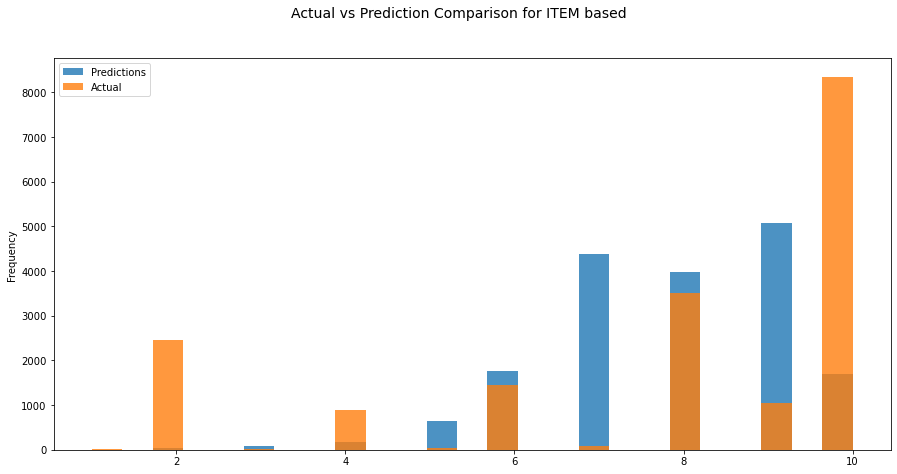

In [86]:
fig, ax = plt.subplots(figsize = (15, 7.2))
fig.suptitle('Actual vs Prediction Comparison for ITEM based', fontsize = 14)
df_item['EstRating'].plot.hist(bins = 25, alpha = 0.8)
df_item['ActualRating'].plot.hist(bins = 25, alpha = 0.8)
ax.legend(['Predictions', 'Actual'])
plt.show()

* ## Item-Based model:
    * The model has not predcitd any rating for actual rating of 1 and 2
    * The distribution of actual rating for 3 almost matches the distribution of predicted rating for 3.
    * The distribution of actual rating for 4 is more than the distribution of predicted rating for 4. The model is not very good at predicting rating 4
    * The distribution of the predicted rating for 5 is greater than the distribution of the actual rating for 5. The model is not very good at predicting rating 5
    * The distribution of the predicted rating for 6 is slightly greater than the distribution of the actual rating for 6. The model is performing good for rating 6
    * The distribution of the predicted rating for 7 is far greater than the distribution of the actual rating for 7. The model performance is not good for rating 7
    * The distribution of the predicted rating for 8 is slightly greater than the distribution of the actual rating of 8. The model performs good for rating 8.
    * The distribution of the predicted rating for 9 is very much greater than the distribution of the actual rating of 9. The model performs bad for rating 9.
    * The distribution of the predicted rating for 10 is very less than the distribution of the actual rating of 10. The model performs poorly for rating 10

In [90]:
# creating a function to display the top 5 recommendation to test users

def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [91]:
# storing the value to a varaible of the top 5 recommendations

top_n_svd = get_top_n(predictions_svd, n=5)

In [93]:
# using for loop to give the recommendations

for uid, user_ratings in top_n_svd.items():
    print('The Recommendation for customer ', uid,'is ',[iid for (iid, _) in user_ratings],'\n')

The Recommendation for customer  einem Kunden is  ['Apple iPhone 6s 4,7" 128 GB', 'Apple iPhone 6s 4,7" 128 GB', 'Apple iPhone 6s 4,7" 128 GB', 'Apple iPhone 6s 4,7" 128 GB', 'Apple iPhone 6s 4,7" 128 GB'] 

The Recommendation for customer  Cliente Amazon is  ['Lenovo Motorola Moto X Play Smartphone, 5.5", Fotocamera 21 MP, 16 GB, RAM 2 GB, Android 5.1.1 Lollipop, BIANCO [Italia]', 'Lenovo Motorola Moto X Play Smartphone, 5.5", Fotocamera 21 MP, 16 GB, RAM 2 GB, Android 5.1.1 Lollipop, BIANCO [Italia]', 'Lenovo Motorola Moto X Play Smartphone, 5.5", Fotocamera 21 MP, 16 GB, RAM 2 GB, Android 5.1.1 Lollipop, BIANCO [Italia]', 'Asus ZenFone 2 Smartphone, 64 GB, Blu Fusion [Italia]', 'Asus ZenFone 2 Smartphone, 64 GB, Blu Fusion [Italia]'] 

The Recommendation for customer  Amazon Customer is  ['Apple iPhone SE Unlocked Phone - 64 GB Retail Packaging - Rose Gold', 'Motorola Moto E 4G 2nd Generation SIM-Free Smartphone - Black', 'Motorola Moto E 4G 2nd Generation SIM-Free Smartphone - Blac

The Recommendation for customer  Brian is  ['APPLE iPhone 6s Plus - 128 GB, Rose Gold', 'Motorola Nexus 6 Unlocked Smartphone, 32 GB, U. S. Warranty - Midnight Blue', 'Kazam Wileyfox Swift UK SIM-Free Smartphone with Swift Hard Case and Screen Protection Card - Sandstone Black', 'MICROSOFT Lumia 650 - 16 GB, Black', 'Huawei P8 Lite goud, wit / 16 GB'] 

The Recommendation for customer  Pedro is  ['Sim Free Motorola Moto G 4th Generation Mobile Phone - Black', 'Motorola Moto G (3ª Generación) + Carcasa Oficial color turquesa - Smartphone libre Android 6 (4G, pantalla 5", cámara 13 Mp, 16 GB, Quad Core 1.4 GHz, 2 GB de RAM), negro', 'Huawei Ascend P1 - Smartphone libre Android (pantalla 4.3", c??mara 8 Mp, 4 GB, 1 GB RAM, 1.5 GHz), rojo [importado]', 'Microsoft Lumia 535 - Smartphone libre (pantalla 5", cámara 5 Mp, 8 GB, 1.2 GHz, 1 GB RAM, Windows), negro (importado)', 'Sony Ericsson C510'] 

The Recommendation for customer  Riccardo is  ['Huawei P8 lite Smartphone, Display 5.0" IPS, Du

The Recommendation for customer  ???????????? is  ['Sony Xperia V (?�????????????)', 'Sony Xperia V (?�????????????)', 'Sony Xperia V (?�????????????)', 'Sony Xperia V (?�????????????)', 'HTC Desire SV T326e Black 4710937389005 UACRF'] 

The Recommendation for customer  George is  ['Samsung Galaxy S7 Edge wit / 32 GB', 'Mi Xiaomi Mi Max Prime (Gold, 128GB)', 'BLU Life Play 2, 1.3GHz Quad Core, Android 4.4 KK, 4G HSPA+ with 8MP Camera - Unlocked (White)', 'Sony Xperia Z5 zwart / 32 GB', 'Pantech Pocket P9060 Unlocked GSM Phone with Android 2.3 OS, Touchscreen, 5MP Camera, Video, GPS, Wi-Fi, SNS integration, MP3/MP4 Player and microSD Slot - Gray'] 

The Recommendation for customer  Jason is  ['LG Nexus 5X Unlocked Smartphone with 5.2-Inch 32GB H790 4G LTE (Carbon Black)', 'Samsung Galaxy Grand Prime Dual Sim Factory Unlocked Phone - Retail Packaging - Gold(International Version)', 'Samsung Galaxy Note 4 N910C Unlocked Cellphone, International Version, 32GB, Black', 'HTC S720E One X 32GB

In [94]:
# storing the value to a varaible of the top 5 recommendations using user based

top_n_user = get_top_n(prediction_user, n=5)

In [95]:
# using for loop to give the recommendations

for uid, user_ratings in top_n_user.items():
    print('The Customer ', uid,'would purchase ',[iid for (iid, _) in user_ratings],'\n')

The Customer  einem Kunden would purchase  ['Apple iPhone 6s 4,7" 128 GB', 'Apple iPhone 6s 4,7" 128 GB', 'Apple iPhone 6s 4,7" 128 GB', 'Apple iPhone 6s 4,7" 128 GB', 'Apple iPhone 6s 4,7" 128 GB'] 

The Customer  Cliente Amazon would purchase  ['Honor 8 Smartphone débloqué 4G (Ecran: 5,2 pouces - 32 Go - Double Nano-SIM - Android 6.0) Blanc Nacré', 'JIAYU G4S - Smartphone libre Android (pantalla 4.7", cámara 13 Mp, 16 GB, 1.7 GHz, 2 GB RAM), blanco', 'Apple iPhone SE', 'Samsung I9060i Galaxy Grand Neo Plus Smartphone, 8 GB, Nero [Italia]', 'Huawei Ascend Y550 Smartphone, 4 GB, Bianco'] 

The Customer  Amazon Customer would purchase  ['Samsung I8160 Galaxy Ace 2 Sim Free Mobile Phone', 'Asus ZenFone 2 Unlocked Cellphone, 16GB, Black', 'HTC MyTouch 4g Android Unlocked Phone (Black)', 'LG Google Nexus 5 D821 Factory Unlocked Phone, 32GB, Black - No 4G in USA - International Version No Warranty', 'Sprint Samsung Galaxy S5 White 16GB (Sprint Prepaid)'] 

The Customer  Владимир would purch

The Customer  zehrabalta would purchase  ['Samsung Omnia (i900) Cep Telefonu', 'Samsung U800 Cep Telefonu', 'Samsung Omnia (i900) Cep Telefonu', 'Samsung innov8 (i8510) Cep Telefonu', 'Nokia N73 Cep Telefonu'] 

The Customer  Marc would purchase  ['Samsung Galaxy mini 2 S6500 Smartphone (8,31 cm (3,27 Zoll) TFT-Touchscreen, 3,0 Megapixel Kamera, Android 2.3) modern-black', 'Samsung \u200bSamsung Galaxy A3 Smartphone (12 cm (4,71 Zoll) HD Super AMOLED Touch-Display, 16 GB, Android 5.1) pink-gold', 'Huawei P8 Champagne / 16 GB - Overzicht', "Lenovo Motorola Moto G4 - Smartphone libre Android 6 (pantalla de 5.5'' Full HD, 4G, cámara de 13 MP, 2 GB de RAM, 16 GB, Qualcomm Snapdragon 1.5 GHz), color negro", 'Huawei P8 Champagne / 16 GB'] 

The Customer  Tim would purchase  ['Sony Ericsson Xperia mini pro Smartphone (7,6 cm (3 Zoll) Display, QWERTZ-Tastatur, Touchscreen, 5 MP Kamera, Android 2.3 OS) schwarz', 'Microsoft Lumia 640 Dual-SIM Smartphone (5 Zoll (12,7 cm) Touch-Display, 8 GB Spei

The Customer  Barbara would purchase  ['Samsung Convoy 3, Gray (Verizon Wireless)', 'Huawei P9 lite Vodafone, Nero [Italia]', 'Asus ZenFone 3 Max Smartphone, Memoria Interna da 32 GB, Dual-SIM, Grigio [Italia]', 'Huawei P8lite zwart / 16 GB', 'Asus ZenFone Max Smartphone, Schermo da 5.5" HD, 16 GB, RAM 2 GB, Dual SIM, Nero [Italia]'] 

The Customer  Мария would purchase  ['Samsung Galaxy J7 (2016)', 'Samsung Galaxy S6', 'Apple iPhone SE 16GB (серый космос)', 'LG K10 (темно-синий)', 'LG K7 (белый)'] 

The Customer  Manu would purchase  ['Samsung Star S5230 Smartphone (Touchscreen, 3MP Kamera, Video, MP3-Player, Bluetooth) black gold', 'Huawei P8 Lite-AM08 - Pack Smartphone Huawei P8 Lite negro con Altavoz portátil AM08 Gold (2 GB de RAM, 16 GB de memoria interna, cámara 13 Mpxs/8Mpx), color negro', 'Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB)', 'Samsung Galaxy S5 mini Smartphone débloqué 4.5 pouces 16 Go Android Blanc (import Allemagne)', 'Microsoft Lumia 640 XL LTE Smartphone débloqu

In [96]:
# storing the value to a varaible of the top 5 recommendations using item based

top_n_item = get_top_n(prediction_item, n=5)

In [97]:
# using for loop to give the recommendations

for uid, user_ratings in top_n_item.items():
    print('The Customer ', uid,'would purchase ',[iid for (iid, _) in user_ratings],'\n')

The Customer  einem Kunden would purchase  ['Apple iPhone 6s 4,7" 128 GB', 'Apple iPhone 6s 4,7" 128 GB', 'Apple iPhone 6s 4,7" 128 GB', 'Apple iPhone 6s 4,7" 128 GB', 'Apple iPhone 6s 4,7" 128 GB'] 

The Customer  Cliente Amazon would purchase  ['Asus ZenFone 2 Smartphone, 64 GB, Blu Fusion [Italia]', 'Asus ZenFone 2 Smartphone, 64 GB, Blu Fusion [Italia]', 'Asus ZenFone 2 Smartphone, 64 GB, Blu Fusion [Italia]', 'Honor 8 Smartphone (13,2 cm (5,2 Zoll) Touchscreen, 32GB interner Speicher, Android OS) weiß', 'Huawei Ascend G700 Smartphone Dual SIM, Nero'] 

The Customer  Amazon Customer would purchase  ['Samsung I8160 Galaxy Ace 2 Sim Free Mobile Phone', 'BlackBerry OEM Z10 Black Leather Swivel Holster', 'Apple iPhone SE Unlocked Phone - 64 GB Retail Packaging - Space Gray', 'Samsung E2550 Strong Black New Sim Free', 'Nokia Lumia 620 Black Factory Unlocked Smartphone'] 

The Customer  Владимир would purchase  ['Samsung Galaxy S7', 'LG K7 (белый)', 'Nokia 5230', 'Samsung N7100 Galaxy No

The Customer  Christian would purchase  ['Samsung Galaxy S7 Smartphone, 32 GB, Nero', 'LG Electronics KP100 Handy schwarz', 'Sony XPERIA Z2 D6503 FACTORY UNLOCKED International Version No Warranty - WHITE', 'Samsung Galaxy S3 i9300i Unlocked 16GB (White)', 'LG Electronics Google Nexus 5X Smartphone (5,2 Zoll (13,2 cm) Touch-Display, 16 GB interner Speicher, Android 6.0) quarz'] 

The Customer  Ryan would purchase  ['APPLE iPhone 7 - Silver, 32 GB', 'Lenovo VIBE P1m (White, 16 GB)', 'LG G2 Verizon VS980 White', 'Samsung Intercept Prepaid Android Phone (Virgin Mobile)', 'Samsung Galaxy S4 Smartphone débloqué 4G (Ecran: 4.99 pouces - 16 Go - Android 4.2 Jelly Bean) Blanc'] 

The Customer  M would purchase  ['Honor 7 Smartphone débloqué 4G (Ecran: 5,2 pouces - 16 Go - Double Nano SIM - Android 5.0 Lollipop) Argent/Blanc', 'Sim Free Motorola Moto G 4th Generation Mobile Phone - Black', 'Sim Free Samsung Galaxy A3 2016 Mobile Phone - Black', 'Microsoft Lumia 950 Smartphone (5,2 Zoll (13,2 cm

# Model-tuning

In [98]:
# using randomized search cv on SVD 

param_grid_SVD = {'n_factors':[100,200],
                  'n_epochs':[100,500],
                  'lr_all':[0.005,0.01],
                  'reg_all':[0.02,0.1]}


gs_SVD = RandomizedSearchCV(SVD, param_distributions=param_grid_SVD,n_iter=5, measures = ['rmse'], cv = 3,random_state=2)
gs_SVD.fit(df_sur)
print(gs_SVD.best_score['rmse'])
print(gs_SVD.best_params['rmse'])

2.7187665058757324
{'n_factors': 100, 'n_epochs': 100, 'lr_all': 0.005, 'reg_all': 0.1}


## Random Search cv is used to find the best parameters for the SVD model. The RMSE value of the fine tuned model has not improved when compared to the RMSE value of the untuned model

In [99]:
# using grid search cv on User based


param_grid_KNNWithMeans = {'k': [10,50,100],
                           'min_k':[3,5,7,10],
                           'sim_options': {'name': ['pearson_baseline', 'cosine'], 
                         'user_based': [True]}, 
                           'verbose': [False]}

gs_KNNWithMeans = GridSearchCV(KNNWithMeans, param_grid_KNNWithMeans, measures = ['rmse'], cv = 3)
gs_KNNWithMeans.fit(df_sur)
print(gs_KNNWithMeans.best_score['rmse'])
print(gs_KNNWithMeans.best_params['rmse'])

2.6448107858176306
{'k': 100, 'min_k': 7, 'sim_options': {'name': 'cosine', 'user_based': True}, 'verbose': False}


## GridSearch CV is used to find the best parameter for the User based model. The RMSE valuee of the fine tuned model has improved when compared to the RMSE value of the untuned model.

In what business scenario you should use popularity based Recommendation Systems ? 

* ### Popularity based recommendation systems are used when a new E-commerce is developed. When developing a new E-commerce website, there might not be enough data on the customers perferences. So instead of having no recommendation system we can use a popularity based recommendation system. 

* ### The popularity based recommendation system can also be used if the user does not have an account in the E-commerce website. Many of the E-commerce websites that are available have features where we can order things without having an account. Popularity based Recommendation system can also be used for new user accounts and for user accounts who haven't rated any products

In what business scenario you should use CF based Recommendation Systems ? 

* ### CF based recommendation systems are used when there is enough information on the users history and the products that they have rated.The benefits of CF based recommendation systems is their ability to continuously calibrate to the preferences of the user. This makes the products more and more personalized to the customer.

* ###  A company with an inventory of thousands and thousands of items would be hard pressed to hard-code product suggestions for all of it’s products, and it’s obvious that such static suggestions would quickly be out-of-date or irrelevant for many customers. By using various means of CF recommendation systems, eCommerce giants can find opportune times to suggest  new products that you’re likely to buy.

What other possible methods can you think of which can further improve the recommendation for diﬀerent users ?

* ### For users having the the top 5 recommendation as the same product, instead of showing the product 5 times we can show the recommended product first and the 4 recommendation can come from popularity based model

* ### Use different recommendation system for users from different coutries

* ### Use hybrid recommendation systems to provide recommendation using a mix of algorithms instead of just relying one algorithm to do the job

* ### Consider the timestamp column for recommendation as only recent products that are availabe and which are discontinued should not be recommended.